# Lesueur Philippe

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("train_master.csv")

In [3]:
"Unnamed: 0" in data.columns

True

In [4]:
data = data.drop("Unnamed: 0",axis=1)

In [5]:
data.head()

,ID,review_content,review_title,review_stars,product,Target
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,2fbb619e3606f9b7c213e858a109cda771aa2c47ce50d5...,0
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,7b56d9d378d9e999d293f301ac43d044cd7b4786d09afb...,1
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,7b37bf5dcb2fafd9229897910318a7dfa11a04ca36893c...,0
3,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,f574512e7d2dd1dd73c7f8f804bf16f14c932c5651a01b...,1
4,5,"Ma fille adore, elle n'en n'était pas sûre à l...",Comme Hermione,5,a1a58f0f3a35a164fa14bff9e2c1ca8c1202c31499faa1...,1


In [125]:
pd.to_numeric(data.review_stars, downcast = 'integer')

ValueError: Unable to parse string "0        3.2
1          5
2          3
3          3
4          5
5          5
6          5
7          5
8          4
9          5
10         5
11         5
12         5
13         5
14         5
15         4
16         5
17         5
18         5
19         5
20         5
21         5
22         4
23         5
24         5
25         1
26         5
27         5
28         3
29         5
30         5
31         5
32         5
33         4
34         2
35         5
36         5
37         4
38         5
39         5
40         5
41         5
42         5
43         5
44         5
45         3
46         3
47         5
48         5
49         5
50         5
51         3
52         3
53         4
54         1
55         5
56         5
57         5
58         5
59         5
60         5
61         5
62         5
63         5
64         4
65         1
66         5
67         5
68         4
69         5
70         5
71         4
72         4
73         5
74         3
75         3
76         5
77         5
78         5
79         5
80         5
81         5
82         5
83         5
84         5
85         5
86         5
87         5
88         5
89         3
90         5
91         5
92         5
93         2
94         5
95         5
96         5
97         5
98         5
99         5
100        5
101        5
102        5
103        4
104        5
105        5
106        5
107        5
108        4
109        5
110        5
111        5
112        4
113        5
114        3
115        5
116        5
117        4
118        5
119        5
120        5
121        5
122        5
123        5
124        5
125        5
126        5
127        5
128        1
129        5
130        1
131        5
132        4
133        4
134        3
135        5
136        3
137        5
138        4
139        5
140        5
141        5
142        4
143        4
144        5
145        5
146        2
147        5
148        5
149        1
150        5
151        5
152        5
153        5
154        5
155        3
156        3
157        5
158        3
159        4
160        5
161        5
162        5
163        4
164        5
165        5
166        1
167        1
168        5
169        5
170        1
171        4
172        5
173        5
174        5
175        1
176        3
177        5
178        5
179        4
180        5
181        5
182        5
183        1
184        5
185        1
186        3
187        5
188        1
189        5
190        4
191        4
192        5
193        5
194        4
195        5
196        3
197        5
198        5
199        5
200        4
201        4
202        2
203        4
204        2
205        1
206        4
207        5
208        4
209        5
210        5
211        5
212        5
213        4
214        5
215        5
216        5
217        5
218        1
219        4
220        5
221        5
222        5
223        5
224        5
225        5
226        2
227        5
228        5
229        5
230        1
231        2
232        5
233        5
234        5
235        1
236        5
237        4
238        5
239        4
240        4
241        4
242        1
243        5
244        5
245        5
246        5
247        1
248        5
249        5
250        5
251        5
252        5
253        5
254        1
255        5
256        2
257        5
258        5
259        5
260        5
261        4
262        4
263        5
264        5
265        5
266        5
267        4
268        5
269        5
270        3
271        5
272        5
273        5
274        4
275        5
276        5
277        5
278        5
279        5
280        1
281        4
282        3
283        2
284        1
285        5
286        4
287        5
288        5
289        5
290        1
291        4
292        3
293        5
294        5
295        5
296        5
297        5
298        5
299        1
300        1
301        4
302        5
303        1
304        5
305        5
306        5
307        5
308        3
309        5
310        5
311        5
312        4
313        5
314        5
315        1
316        5
317        4
318        5
319        4
320        2
321        5
322        4
323        5
324        5
325        5
326        5
327        4
328        5
329        5
330        5
331        5
332        4
333        5
334        5
335        5
336        5
337        4
338        2
339        5
340        3
341        5
342        5
343        5
344        1
345        5
346        5
347        5
348        5
349        5
350        4
351        4
352        5
353        4
354        1
355        5
356        5
357        5
358        5
359        1
360        5
361        5
362        1
363        4
364        5
365        5
366        1
367        5
368        5
369        5
370        5
371        4
372        4
373        4
374        3
375        5
376        5
377        5
378        4
379        5
380        3
381        5
382        5
383        5
384        3
385        5
386        5
387        5
388        5
389        5
390        5
391        4
392        3
393        5
394        5
395        5
396        3
397        5
398        5
399        4
400        5
401        5
402        5
403        3
404        5
405        4
406        5
407        5
408        5
409        5
410        5
411        5
412        5
413        5
414        4
415        5
416        3
417        4
418        5
419        5
420        5
421        1
422        3
423        4
424        4
425        5
426        5
427        5
428        5
429        1
430        5
431        5
432        2
433        4
434        5
435        5
436        1
437        5
438        5
439        3
440        5
441        5
442        5
443        5
444        3
445        5
446        1
447        2
448        5
449        5
450        4
451        5
452        2
453        5
454        4
455        3
456        4
457        5
458        1
459        5
460        5
461        5
462        5
463        5
464        5
465        5
466        5
467        5
468        4
469        5
470        5
471        5
472        5
473        4
474        5
475        5
476        5
477        3
478        5
479        5
480        5
481        4
482        5
483        4
484        5
485        5
486        4
487        1
488        5
489        4
490        5
491        5
492        5
493        3
494        4
495        5
496        1
497        5
498        4
499        5
500        5
501        5
502        1
503        5
504        5
505        5
506        4
507        4
508        3
509        5
510        5
511        5
512        5
513        4
514        5
515        5
516        5
517        5
518        5
519        5
520        4
521        5
522        5
523        4
524        5
525        5
526        4
527        5
528        4
529        4
530        5
531        4
532        5
533        4
534        5
535        5
536        5
537        5
538        5
539        2
540        5
541        4
542        3
543        5
544        5
545        5
546        5
547        3
548        5
549        5
550        5
551        5
552        5
553        5
554        5
555        5
556        5
557        4
558        5
559        5
560        5
561        5
562        5
563        5
564        5
565        5
566        3
567        5
568        5
569        4
570        5
571        5
572        1
573        5
574        5
575        5
576        5
577        5
578        5
579        5
580        5
581        5
582        5
583        5
584        5
585        5
586        1
587        5
588        5
589        4
590        1
591        2
592        1
593        5
594        4
595        5
596        5
597        3
598        5
599        5
600        5
601        3
602        4
603        5
604        5
605        4
606        5
607        1
608        5
609        5
610        1
611        5
612        5
613        5
614        5
615        5
616        5
617        5
618        5
619        5
620        5
621        5
622        5
623        5
624        3
625        5
626        2
627        4
628        1
629        1
630        5
631        5
632        4
633        5
634        4
635        5
636        5
637        3
638        4
639        1
640        5
641        3
642        2
643        2
644        5
645        5
646        5
647        5
648        5
649        5
650        5
651        5
652        4
653        5
654        5
655        5
656        5
657        5
658        1
659        3
660        3
661        4
662        5
663        4
664        5
665        5
666        5
667        5
668        4
669        4
670        1
671        3
672        5
673        5
674        5
675        3
676        4
677        5
678        1
679        3
680        5
681        4
682        5
683        5
684        5
685        5
686        1
687        5
688        5
689        4
690        5
691        5
692        4
693        4
694        4
695        4
696        4
697        5
698        5
699        4
700        5
701        5
702        5
703        5
704        5
705        4
706        5
707        5
708        5
709        5
710        4
711        4
712        5
713        5
714        5
715        5
716        4
717        5
718        5
719        4
720        5
721        4
722        5
723        5
724        5
725        4
726        5
727        5
728        5
729        3
730        5
731        5
732        4
733        2
734        5
735        5
736        5
737        3
738        4
739        5
740        4
741        3
742        5
743        4
744        4
745        4
746        4
747        5
748        5
749        1
750        5
751        5
752        5
753        5
754        5
755        5
756        5
757        5
758        5
759        5
760        5
761        5
762        1
763        5
764        5
765        4
766        5
767        5
768        4
769        4
770        3
771        5
772        4
773        5
774        5
775        5
776        5
777        5
778        5
779        5
780        5
781        5
782        5
783        5
784        4
785        3
786        5
787        5
788        5
789        5
790        4
791        5
792        1
793        5
794        5
795        5
796        5
797        5
798        2
799        5
800        3
801        5
802        5
803        5
804        4
805        5
806        3
807        1
808        5
809        5
810        2
811        5
812        5
813        4
814        5
815        5
816        5
817        5
818        5
819        4
820        5
821        3
822        5
823        5
824        4
825        3
826        5
827        5
828        4
829        4
830        5
831        5
832        5
833        4
834        5
835        3
836        4
837        5
838        5
839        4
840        5
841        5
842        5
843        3
844        5
845        5
846        4
847        4
848        5
849        4
850        5
851        4
852        3
853        3
854        5
855        5
856        5
857        1
858        4
859        3
860        5
861        3
862        5
863        5
864        2
865        1
866        5
867        5
868        4
869        5
870        5
871        4
872        5
873        5
874        5
875        2
876        4
877        3
878        5
879        5
880        5
881        5
882        5
883        4
884        4
885        4
886        2
887        5
888        1
889        5
890        4
891        4
892        5
893        5
894        5
895        5
896        2
897        4
898        4
899        5
900        1
901        5
902        5
903        3
904        5
905        4
906        5
907        5
908        5
909        5
910        5
911        5
912        5
913        4
914        5
915        5
916        5
917        5
918        5
919        5
920        5
921        5
922        5
923        5
924        5
925        4
926        1
927        5
928        5
929        5
930        4
931        3
932        5
933        4
934        4
935        1
936        1
937        1
938        5
939        4
940        5
941        4
942        5
943        5
944        3
945        5
946        4
947        5
948        4
949        5
950        5
951        5
952        4
953        5
954        5
955        5
956        5
957        5
958        5
959        5
960        1
961        4
962        5
963        5
964        3
965        4
966        5
967        5
968        5
969        4
970        5
971        5
972        4
973        5
974        4
975        5
976        5
977        5
978        3
979        1
980        5
981        5
982        5
983        1
984        5
985        4
986        5
987        4
988        5
989        5
990        5
991        5
992        5
993        4
994        3
995        4
996        5
997        4
998        3
999        1
1000       4
1001       2
1002       5
1003       5
1004       5
1005       5
1006       4
1007       4
1008       4
1009       4
1010       1
1011       5
1012       5
1013       1
1014       5
1015       5
1016       5
1017       5
1018       5
1019       4
1020       5
1021       5
1022       5
1023       5
1024       5
1025       5
1026       5
1027       5
1028       5
1029       4
1030       5
1031       1
1032       5
1033       5
1034       5
1035       5
1036       5
1037       4
1038       3
1039       5
1040       5
1041       4
1042       5
1043       5
1044       5
1045       5
1046       5
1047       4
1048       5
1049       5
1050       5
1051       4
1052       5
1053       5
1054       1
1055       5
1056       4
1057       5
1058       5
1059       5
1060       4
1061       5
1062       5
1063       5
1064       5
1065       4
1066       5
1067       4
1068       3
1069       4
1070       5
1071       1
1072       5
1073       5
1074       4
1075       5
1076       5
1077       5
1078       4
1079       5
1080       5
1081       5
1082       5
1083       5
1084       5
1085       5
1086       4
1087       4
1088       5
1089       5
1090       5
1091       1
1092       5
1093       3
1094       4
1095       5
1096       5
1097       2
1098       4
1099       5
1100       5
1101       5
1102       1
1103       5
1104       5
1105       5
1106       5
1107       5
1108       5
1109       5
1110       4
1111       5
1112       5
1113       5
1114       5
1115       1
1116       3
1117       5
1118       5
1119       4
1120       5
1121       2
1122       1
1123       5
1124       5
1125       5
1126       1
1127       2
1128       5
1129       5
1130       5
1131       4
1132       5
1133       5
1134       4
1135       1
1136       5
1137       5
1138       5
1139       5
1140       5
1141       5
1142       1
1143       4
1144       4
1145       1
1146       5
1147       5
1148       5
1149       5
1150       4
1151       1
1152       5
1153       5
1154       5
1155       5
1156       4
1157       4
1158       3
1159       5
1160       2
1161       5
1162       1
1163       5
1164       5
1165       4
1166       5
1167       5
1168       5
1169       5
1170       5
1171       5
1172       5
1173       5
1174       5
1175       3
1176       5
1177       3
1178       5
1179       4
1180       5
1181       4
1182       2
1183       1
1184       5
1185       5
1186       1
1187       4
1188       4
1189       5
1190       5
1191       4
1192       5
1193       5
1194       5
1195       5
1196       3
1197       4
1198       4
1199       4
1200       5
1201       4
1202       3
1203       5
1204       5
1205       4
1206       5
1207       5
1208       3
1209       5
1210       5
1211       5
1212       5
1213       5
1214       5
1215       4
1216       5
1217       5
1218       4
1219       5
1220       5
1221       4
1222       5
1223       5
1224       1
1225       5
1226       5
1227       4
1228       5
1229       5
1230       4
1231       5
1232       4
1233       5
1234       5
1235       1
1236       5
1237       2
1238       5
1239       3
1240       3
1241       5
1242       3
1243       5
1244       5
1245       5
1246       4
1247       3
1248       5
1249       5
1250       1
1251       5
1252       3
1253       4
1254       5
1255       4
1256       3
1257       5
1258       5
1259       3
1260       4
1261       5
1262       5
1263       5
1264       4
1265       5
1266       5
1267       5
1268       5
1269       4
1270       4
1271       5
1272       2
1273       3
1274       5
1275       5
1276       4
1277       2
1278       4
1279       1
1280       1
1281       5
1282       5
1283       5
1284       2
1285       5
1286       5
1287       5
1288       5
1289       5
1290       3
1291       5
1292       5
1293       5
1294       4
1295       5
1296       5
1297       5
1298       5
1299       5
1300       5
1301       5
1302       5
1303       4
1304       5
1305       5
1306       5
1307       5
1308       4
1309       5
1310       5
1311       5
1312       4
1313       1
1314       5
1315       1
1316       3
1317       5
1318       5
1319       5
1320       5
1321       5
1322       5
1323       5
1324       5
1325       5
1326       5
1327       1
1328       3
1329       5
1330       2
1331       2
1332       5
1333       5
1334       5
1335       3
1336       5
1337       5
1338       5
1339       5
1340       4
1341       5
1342       2
1343       3
1344       4
1345       4
1346       5
1347       5
1348       5
1349       5
1350       4
1351       5
1352       3
1353       5
1354       3
1355       4
1356       3
1357       5
1358       5
1359       4
1360       5
1361       5
1362       5
1363       4
1364       5
1365       5
1366       5
1367       1
1368       1
1369       1
1370       2
1371       5
1372       4
1373       4
1374       5
1375       5
1376       5
1377       4
1378       5
1379       5
1380       5
1381       5
1382       5
1383       4
1384       5
1385       4
1386       5
1387       5
1388       3
1389       5
1390       5
1391       4
1392       5
1393       5
1394       5
1395       1
1396       4
1397       5
1398       1
1399       4
1400       5
1401       5
1402       3
1403       5
1404       2
1405       1
1406       5
1407       4
1408       4
1409       5
1410       5
1411       5
1412       3
1413       5
1414       5
1415       3
1416       5
1417       5
1418       4
1419       4
1420       5
1421       5
1422       5
1423       4
1424       4
1425       3
1426       3
1427       2
1428       5
1429       5
1430       5
1431       4
1432       5
1433       5
1434       4
1435       5
1436       5
1437       4
1438       5
1439       5
1440       5
1441       3
1442       5
1443       5
1444       5
1445       5
1446       4
1447       5
1448       5
1449       5
1450       5
1451       5
1452       5
1453       5
1454       5
1455       1
1456       4
1457       5
1458       5
1459       5
1460       5
1461       5
1462       4
1463       4
1464       5
1465       1
1466       4
1467       5
1468       5
1469       5
1470       5
1471       5
1472       2
1473       5
1474       4
1475       5
1476       5
1477       5
1478       5
1479       4
1480       4
1481       3
1482       5
1483       5
1484       3
1485       3
1486       4
1487       5
1488       4
1489       5
1490       5
1491       4
1492       5
1493       5
1494       1
1495       3
1496       5
1497       3
1498       5
1499       4
1500       5
1501       5
1502       5
1503       5
1504       4
1505       5
1506       5
1507       5
1508       2
1509       5
1510       5
1511       5
1512       5
1513       3
1514       5
1515       5
1516       5
1517       4
1518       1
1519       5
1520       5
1521       4
1522       5
1523       5
1524       4
1525       4
1526       5
1527       5
1528       5
1529       4
1530       5
1531       4
1532       5
1533       4
1534       4
1535       5
1536       5
1537       5
1538       5
1539       5
1540       5
1541       1
1542       1
1543       5
1544       4
1545       4
1546       4
1547       5
1548       5
1549       5
1550       5
1551       3
1552       5
1553       5
1554       4
1555       5
1556       4
1557       3
1558       5
1559       5
1560       4
1561       4
1562       5
1563       5
1564       5
1565       5
1566       5
1567       5
1568       5
1569       4
1570       5
1571       1
1572       5
1573       1
1574       5
1575       5
1576       5
1577       4
1578       5
1579       5
1580       5
1581       5
1582       5
1583       5
1584       5
1585       5
1586       4
1587       3
1588       5
1589       4
1590       5
1591       5
1592       3
1593       5
1594       5
1595       4
1596       5
1597       4
1598       5
1599       1
1600       5
1601       4
1602       3
1603       5
1604       4
1605       4
1606       4
1607       5
1608       5
1609       5
1610       1
1611       1
1612       4
1613       5
1614       5
1615       5
1616       5
1617       5
1618       5
1619       4
1620       5
1621       1
1622       1
1623       5
1624       4
1625       5
1626       1
1627       5
1628       4
1629       5
1630       4
1631       5
1632       5
1633       2
1634       5
1635       5
1636       5
1637       4
1638       4
1639       1
1640       4
1641       5
1642       4
1643       4
1644       5
1645       5
1646       5
1647       5
1648       5
1649       5
1650       5
1651       5
1652       5
1653       5
1654       5
1655       4
1656       4
1657       5
1658       5
1659       5
1660       5
1661       5
1662       5
1663       2
1664       1
1665       5
1666       4
1667       4
1668       2
1669       3
1670       4
1671       1
1672       5
1673       3
1674       3
1675       5
1676       5
1677       5
1678       5
1679       5
1680       5
1681       5
1682       3
1683       5
1684       1
1685       5
1686       5
1687       5
1688       5
1689       5
1690       5
1691       5
1692       4
1693       5
1694       5
1695       5
1696       5
1697       5
1698       5
1699       5
1700       3
1701       5
1702       5
1703       4
1704       4
1705       5
1706       5
1707       5
1708       2
1709       5
1710       3
1711       5
1712       3
1713       5
1714       5
1715       5
1716       1
1717       5
1718       4
1719       5
1720       5
1721       3
1722       4
1723       5
1724       5
1725       5
1726       1
1727       5
1728       4
1729       5
1730       3
1731       5
1732       5
1733       1
1734       1
1735       5
1736       5
1737       5
1738       5
1739       5
1740       5
1741       3
1742       5
1743       5
1744       5
1745       3
1746       5
1747       5
1748       5
1749       5
1750       5
1751       3
1752       5
1753       5
1754       5
1755       2
1756       4
1757       5
1758       5
1759       5
1760       4
1761       3
1762       4
1763       5
1764       5
1765       5
1766       4
1767       5
1768       5
1769       5
1770       5
1771       5
1772       5
1773       4
1774       5
1775       5
1776       5
1777       3
1778       5
1779       1
1780       3
1781       4
1782       3
1783       1
1784       4
1785       5
1786       4
1787       3
1788       5
1789       5
1790       4
1791       5
1792       5
1793       4
1794       5
1795       4
1796       3
1797       3
1798       4
1799       5
1800       5
1801       4
1802       5
1803       5
1804       2
1805       3
1806       5
1807       5
1808       4
1809       4
1810       5
1811       5
1812       5
1813       5
1814       5
1815       5
1816       5
1817       5
1818       5
1819       5
1820       5
1821       5
1822       4
1823       5
1824       4
1825       5
1826       5
1827       5
1828       5
1829       5
1830       5
1831       5
1832       5
1833       5
1834       5
1835       3
1836       5
1837       5
1838       3
1839       4
1840       5
1841       2
1842       5
1843       3
1844       5
1845       4
1846       5
1847       3
1848       5
1849       1
1850       5
1851       5
1852       5
1853       4
1854       4
1855       1
1856       5
1857       5
1858       1
1859       3
1860       4
1861       5
1862       3
1863       5
1864       5
1865       5
1866       5
1867       5
1868       3
1869       5
1870       5
1871       1
1872       5
1873       5
1874       5
1875       5
1876       1
1877       5
1878       5
1879       4
1880       5
1881       5
1882       4
1883       1
1884       5
1885       5
1886       3
1887       5
1888       5
1889       5
1890       5
1891       1
1892       4
1893       5
1894       3
1895       4
1896       5
1897       5
1898       4
1899       5
1900       5
1901       4
1902       5
1903       3
1904       4
1905       3
1906       5
1907       3
1908       4
1909       5
1910       1
1911       4
1912       5
1913       5
1914       5
1915       1
1916       2
1917       5
1918       3
1919       5
1920       2
1921       5
1922       5
1923       5
1924       1
1925       2
1926       3
1927       5
1928       5
1929       5
1930       5
1931       4
1932       4
1933       5
1934       4
1935       5
1936       3
1937       5
1938       5
1939       5
1940       5
1941       5
1942       5
1943       5
1944       5
1945       5
1946       4
1947       5
1948       5
1949       5
1950       5
1951       5
1952       5
1953       4
1954       4
1955       1
1956       5
1957       1
1958       5
1959       5
1960       5
1961       4
1962       4
1963       5
1964       5
1965       5
1966       5
1967       5
1968       3
1969       5
1970       5
1971       5
1972       5
1973       4
1974       5
1975       1
1976       5
1977       5
1978       5
1979       5
1980       5
1981       1
1982       5
1983       5
1984       4
1985       5
1986       2
1987       4
1988       3
1989       4
1990       5
1991       5
1992       5
1993       5
1994       5
1995       5
1996       5
1997       5
1998       5
1999       5
2000       5
2001       4
2002       5
2003       5
2004       5
2005       5
2006       5
2007       5
2008       1
2009       1
2010       4
2011       5
2012       5
2013       4
2014       5
2015       4
2016       3
2017       4
2018       4
2019       5
2020       5
2021       5
2022       4
2023       5
2024       5
2025       5
2026       5
2027       5
2028       5
2029       5
2030       5
2031       5
2032       5
2033       5
2034       4
2035       4
2036       5
2037       5
2038       4
2039       4
2040       1
2041       5
2042       1
2043       5
2044       5
2045       4
2046       5
2047       5
2048       3
2049       5
2050       4
2051       5
2052       5
2053       4
2054       5
2055       5
2056       3
2057       1
2058       5
2059       5
2060       5
2061       5
2062       4
2063       4
2064       1
2065       4
2066       5
2067       3
2068       5
2069       5
2070       4
2071       5
2072       3
2073       5
2074       5
2075       3
2076       5
2077       1
2078       1
2079       4
2080       5
2081       5
2082       4
2083       5
2084       1
2085       5
2086       5
2087       5
2088       5
2089       3
2090       4
2091       5
2092       4
2093       5
2094       5
2095       5
2096       5
2097       4
2098       5
2099       5
2100       1
2101       5
2102       1
2103       5
2104       5
2105       1
2106       4
2107       4
2108       5
2109       5
2110       5
2111       5
2112       5
2113       4
2114       5
2115       5
2116       4
2117       5
2118       5
2119       5
2120       5
2121       5
2122       4
2123       1
2124       4
2125       5
2126       5
2127       5
2128       5
2129       5
2130       5
2131       2
2132       4
2133       5
2134       3
2135       5
2136       5
2137       2
2138       3
2139       5
2140       4
2141       5
2142       5
2143       5
2144       5
2145       4
2146       5
2147       1
2148       5
2149       5
2150       4
2151       2
2152       2
2153       4
2154       5
2155       4
2156       4
2157       5
2158       5
2159       5
2160       5
2161       2
2162       4
2163       5
2164       5
2165       5
2166       4
2167       5
2168       4
2169       5
2170       5
2171       5
2172       1
2173       3
2174       4
2175       5
2176       1
2177       5
2178       5
2179       5
2180       4
2181       3
2182       5
2183       5
2184       4
2185       4
2186       4
2187       5
2188       5
2189       5
2190       5
2191       4
2192       4
2193       5
2194       5
2195       5
2196       5
2197       5
2198       5
2199       5
2200       4
2201       4
2202       5
2203       4
2204       1
2205       4
2206       4
2207       3
2208       5
2209       5
2210       4
2211       5
2212       4
2213       1
2214       5
2215       5
2216       3
2217       4
2218       5
2219       1
2220       4
2221       5
2222       5
2223       2
2224       5
2225       5
2226       3
2227       4
2228       5
2229       4
2230       5
2231       4
2232       5
2233       4
2234       5
2235       5
2236       5
2237       5
2238       4
2239       5
2240       5
2241       3
2242       4
2243       5
2244       5
2245       5
2246       5
2247       5
2248       5
2249       5
2250       5
2251       5
2252       5
2253       5
2254       5
2255       5
2256       5
2257       5
2258       1
2259       5
2260       5
2261       5
2262       1
2263       3
2264       5
2265       2
2266       5
2267       3
2268       5
2269       5
2270       5
2271       5
2272       5
2273       5
2274       5
2275       4
2276       5
2277       4
2278       5
2279       1
2280       4
2281       4
2282       1
2283       4
2284       1
2285       3
2286       5
2287       3
2288       5
2289       5
2290       5
2291       5
2292       4
2293       5
2294       4
2295       5
2296       5
2297       5
2298       5
2299       4
2300       5
2301       4
2302       5
2303       5
2304       3
2305       3
2306       5
2307       5
2308       5
2309       5
2310       5
2311       5
2312       5
2313       5
2314       4
2315       4
2316       5
2317       5
2318       4
2319       5
2320       4
2321       4
2322       5
2323       3
2324       5
2325       5
2326       4
2327       3
2328       5
2329       5
2330       5
2331       4
2332       5
2333       5
2334       5
2335       5
2336       5
2337       3
2338       4
2339       5
2340       3
2341       5
2342       5
2343       5
2344       5
2345       5
2346       5
2347       1
2348       5
2349       4
2350       5
2351       4
2352       4
2353       5
2354       5
2355       5
2356       5
2357       5
2358       5
2359       5
2360       5
2361       5
2362       4
2363       5
2364       5
2365       5
2366       5
2367       4
2368       5
2369       1
2370       5
2371       5
2372       5
2373       5
2374       5
2375       5
2376       5
2377       5
2378       5
2379       5
2380       5
2381       5
2382       5
2383       5
2384       5
2385       4
2386       4
2387       5
2388       5
2389       5
2390       5
2391       4
2392       5
2393       5
2394       3
2395       5
2396       5
2397       5
2398       5
2399       4
2400       5
2401       4
2402       5
2403       5
2404       5
2405       5
2406       5
2407       1
2408       4
2409       4
2410       5
2411       5
2412       1
2413       3
2414       4
2415       5
2416       5
2417       5
2418       5
2419       5
2420       5
2421       5
2422       5
2423       5
2424       5
2425       1
2426       5
2427       5
2428       5
2429       5
2430       5
2431       5
2432       5
2433       5
2434       5
2435       4
2436       5
2437       5
2438       5
2439       5
2440       5
2441       5
2442       4
2443       3
2444       4
2445       4
2446       4
2447       5
2448       5
2449       5
2450       5
2451       2
2452       3
2453       4
2454       5
2455       5
2456       4
2457       5
2458       5
2459       5
2460       3
2461       5
2462       5
2463       5
2464       5
2465       5
2466       5
2467       5
2468       5
2469       5
2470       5
2471       5
2472       5
2473       5
2474       5
2475       5
2476       4
2477       5
2478       5
2479       5
2480       4
2481       5
2482       5
2483       5
2484       5
2485       4
2486       4
2487       5
2488       5
2489       5
2490       2
2491       5
2492       5
2493       5
2494       5
2495       5
2496       4
2497       5
2498       5
2499       4
2500       5
2501       3
2502       5
2503       5
2504       3
2505       5
2506       4
2507       5
2508       4
2509       5
2510       4
2511       5
2512       5
2513       5
2514       4
2515       1
2516       5
2517       5
2518       5
2519       4
2520       3
2521       5
2522       5
2523       5
2524       5
2525       4
2526       5
2527       5
2528       5
2529       4
2530       5
2531       5
2532       1
2533       3
2534       5
2535       5
2536       4
2537       4
2538       5
2539       5
2540       1
2541       5
2542       3
2543       5
2544       5
2545       4
2546       5
2547       3
2548       1
2549       5
2550       4
2551       5
2552       4
2553       5
2554       5
2555       5
2556       5
2557       5
2558       4
2559       5
2560       5
2561       5
2562       5
2563       5
2564       4
2565       4
2566       5
2567       5
2568       4
2569       5
2570       5
2571       4
2572       5
2573       4
2574       3
2575       5
2576       4
2577       5
2578       1
2579       5
2580       5
2581       5
2582       4
2583       5
2584       5
2585       5
2586       4
2587       5
2588       4
2589       5
2590       3
2591       5
2592       5
2593       5
2594       5
2595       5
2596       4
2597       5
2598       1
2599       4
2600       5
2601       5
2602       5
2603       1
2604       5
2605       1
2606       5
2607       4
2608       2
2609       5
2610       3
2611       5
2612       5
2613       5
2614       4
2615       3
2616       5
2617       4
2618       5
2619       5
2620       5
2621       5
2622       5
2623       5
2624       4
2625       5
2626       2
2627       2
2628       5
2629       4
2630       5
2631       1
2632       5
2633       1
2634       5
2635       5
2636       5
2637       5
2638       5
2639       4
2640       5
2641       5
2642       5
2643       5
2644       5
2645       4
2646       5
2647       4
2648       5
2649       5
2650       5
2651       2
2652       4
2653       4
2654       5
2655       5
2656       2
2657       5
2658       4
2659       5
2660       5
2661       3
2662       5
2663       5
2664       2
2665       3
2666       4
2667       5
2668       5
2669       5
2670       5
2671       1
2672       4
2673       4
2674       3
2675       1
2676       5
2677       5
2678       5
2679       5
2680       5
2681       3
2682       5
2683       5
2684       4
2685       5
2686       3
2687       5
2688       5
2689       5
2690       3
2691       5
2692       5
2693       5
2694       2
2695       5
2696       4
2697       5
2698       5
2699       5
2700       5
2701       2
2702       3
2703       5
2704       5
2705       5
2706       5
2707       5
2708       5
2709       5
2710       5
2711       4
2712       4
2713       5
2714       5
2715       4
2716       5
2717       4
2718       4
2719       1
2720       5
2721       4
2722       5
2723       5
2724       5
2725       5
2726       5
2727       5
2728       5
2729       5
2730       4
2731       4
2732       4
2733       5
2734       5
2735       4
2736       5
2737       5
2738       4
2739       4
2740       5
2741       4
2742       2
2743       5
2744       5
2745       5
2746       5
2747       5
2748       1
2749       5
2750       4
2751       5
2752       3
2753       4
2754       1
2755       5
2756       5
2757       5
2758       5
2759       1
2760       1
2761       5
2762       5
2763       5
2764       5
2765       5
2766       4
2767       4
2768       5
2769       5
2770       5
2771       5
2772       5
2773       5
2774       5
2775       5
2776       4
2777       5
2778       5
2779       5
2780       4
2781       5
2782       5
2783       5
2784       5
2785       5
2786       5
2787       5
2788       3
2789       5
2790       3
2791       5
2792       1
2793       5
2794       5
2795       5
2796       4
2797       5
2798       5
2799       5
2800       5
2801       5
2802       5
2803       4
2804       4
2805       4
2806       1
2807       5
2808       5
2809       5
2810       3
2811       4
2812       4
2813       5
2814       5
2815       5
2816       5
2817       5
2818       5
2819       4
2820       5
2821       5
2822       5
2823       5
2824       4
2825       3
2826       4
2827       5
2828       4
2829       5
2830       4
2831       5
2832       5
2833       5
2834       5
2835       5
2836       5
2837       2
2838       5
2839       5
2840       5
2841       5
2842       3
2843       4
2844       5
2845       5
2846       5
2847       4
2848       5
2849       4
2850       5
2851       5
2852       5
2853       5
2854       5
2855       5
2856       4
2857       5
2858       1
2859       4
2860       1
2861       5
2862       3
2863       5
2864       5
2865       5
2866       5
2867       5
2868       1
2869       3
2870       5
2871       5
2872       5
2873       5
2874       5
2875       5
2876       4
2877       5
2878       5
2879       4
2880       5
2881       3
2882       5
2883       4
2884       5
2885       5
2886       5
2887       3
2888       5
2889       4
2890       3
2891       2
2892       1
2893       5
2894       5
2895       5
2896       3
2897       4
2898       1
2899       1
2900       5
2901       5
2902       5
2903       5
2904       2
2905       5
2906       5
2907       3
2908       4
2909       5
2910       5
2911       4
2912       4
2913       5
2914       5
2915       5
2916       5
2917       5
2918       1
2919       5
2920       1
2921       5
2922       2
2923       4
2924       5
2925       4
2926       5
2927       5
2928       5
2929       5
2930       3
2931       5
2932       5
2933       4
2934       5
2935       1
2936       5
2937       5
2938       5
2939       4
2940       4
2941       4
2942       4
2943       5
2944       5
2945       5
2946       2
2947       4
2948       4
2949       5
2950       5
2951       1
2952       1
2953       5
2954       4
2955       5
2956       5
2957       5
2958       4
2959       5
2960       5
2961       3
2962       4
2963       4
2964       4
2965       5
2966       5
2967       5
2968       5
2969       5
2970       5
2971       5
2972       5
2973       4
2974       5
2975       5
2976       4
2977       5
2978       4
2979       5
2980       1
2981       5
2982       5
2983       5
2984       4
2985       3
2986       2
2987       4
2988       5
2989       4
2990       4
2991       5
2992       4
2993       5
2994       5
2995       5
2996       5
2997       5
2998       5
2999       5
3000       5
3001       3
3002       5
3003       5
3004       5
3005       5
3006       5
3007       4
3008       5
3009       5
3010       4
3011       5
3012       5
3013       5
3014       5
3015       5
3016       5
3017       5
3018       5
3019       5
3020       5
3021       5
3022       4
3023       5
3024       1
3025       3
3026       1
3027       4
3028       4
3029       4
3030       5
3031       5
3032       4
3033       5
3034       2
3035       5
3036       4
3037       5
3038       5
3039       5
3040       5
3041       4
3042       5
3043       4
3044       5
3045       5
3046       5
3047       4
3048       5
3049       5
3050       5
3051       5
3052       5
3053       5
3054       5
3055       5
3056       5
3057       5
3058       5
3059       4
3060       4
3061       4
3062       5
3063       1
3064       1
3065       5
3066       5
3067       3
3068       5
3069       4
3070       5
3071       5
3072       2
3073       5
3074       5
3075       5
3076       5
3077       5
3078       5
3079       5
3080       4
3081       1
3082       5
3083       4
3084       1
3085       5
3086       5
3087       5
3088       5
3089       5
3090       5
3091       5
3092       5
3093       3
3094       5
3095       5
3096       5
3097       3
3098       5
3099       5
3100       4
3101       5
3102       5
3103       1
3104       5
3105       3
3106       4
3107       5
3108       5
3109       4
3110       1
3111       3
3112       5
3113       5
3114       5
3115       5
3116       4
3117       5
3118       3
3119       5
3120       5
3121       1
3122       4
3123       5
3124       4
3125       4
3126       5
3127       5
3128       4
3129       1
3130       1
3131       5
3132       5
3133       4
3134       4
3135       4
3136       4
3137       5
3138       4
3139       5
3140       4
3141       3
3142       4
3143       5
3144       1
3145       4
3146       3
3147       5
3148       5
3149       5
3150       5
3151       4
3152       4
3153       1
3154       4
3155       5
3156       5
3157       5
3158       4
3159       4
3160       5
3161       5
3162       4
3163       5
3164       5
3165       5
3166       4
3167       4
3168       5
3169       2
3170       5
3171       5
3172       5
3173       5
3174       5
3175       5
3176       3
3177       5
3178       5
3179       2
3180       5
3181       5
3182       4
3183       5
3184       5
3185       4
3186       3
3187       1
3188       4
3189       1
3190       5
3191       5
3192       4
3193       4
3194       5
3195       5
3196       5
3197       5
3198       5
3199       5
3200       3
3201       5
3202       5
3203       4
3204       5
3205       5
3206       1
3207       4
3208       1
3209       4
3210       3
3211       5
3212       5
3213       5
3214       5
3215       5
3216       5
3217       5
3218       1
3219       2
3220       2
3221       2
3222       5
3223       4
3224       5
3225       5
3226       5
3227       4
3228       5
3229       5
3230       2
3231       4
3232       5
3233       4
3234       1
3235       4
3236       5
3237       5
3238       4
3239       5
3240       1
3241       5
3242       1
3243       5
3244       5
3245       5
3246       5
3247       4
3248       5
3249       2
3250       5
3251       5
3252       4
3253       1
3254       5
3255       5
3256       5
3257       5
3258       5
3259       5
3260       1
3261       5
3262       4
3263       5
3264       5
3265       1
3266       5
3267       4
3268       5
3269       4
3270       5
3271       3
3272       5
3273       1
3274       5
3275       5
3276       5
3277       5
3278       5
3279       5
3280       5
3281       4
3282       5
3283       5
3284       5
3285       3
3286       5
3287       4
3288       5
3289       5
3290       4
3291       3
3292       5
3293       2
3294       3
3295       4
3296       4
3297       4
3298       5
3299       3
3300       5
3301       5
3302       5
3303       4
3304       5
3305       5
3306       3
3307       3
3308       5
3309       5
3310       5
3311       3
3312       4
3313       2
3314       5
3315       4
3316       5
3317       3
3318       5
3319       5
3320       4
3321       5
3322       5
3323       4
3324       2
3325       5
3326       5
3327       4
3328       4
3329       5
3330       5
3331       4
3332       5
3333       1
3334       5
3335       5
3336       5
3337       5
3338       1
3339       5
3340       4
3341       5
3342       1
3343       4
3344       5
3345       5
3346       1
3347       5
3348       5
3349       4
3350       1
3351       1
3352       5
3353       5
3354       5
3355       5
3356       5
3357       5
3358       5
3359       5
3360       5
3361       5
3362       4
3363       5
3364       5
3365       4
3366       5
3367       1
3368       4
3369       4
3370       5
3371       4
3372       5
3373       5
3374       5
3375       5
3376       4
3377       2
3378       1
3379       5
3380       5
3381       3
3382       4
3383       5
3384       4
3385       4
3386       5
3387       2
3388       5
3389       5
3390       3
3391       5
3392       5
3393       5
3394       5
3395       2
3396       5
3397       5
3398       5
3399       5
3400       5
3401       5
3402       5
3403       4
3404       5
3405       5
3406       4
3407       3
3408       5
3409       5
3410       5
3411       5
3412       5
3413       5
3414       4
3415       4
3416       4
3417       5
3418       5
3419       4
3420       4
3421       5
3422       4
3423       4
3424       1
3425       5
3426       1
3427       5
3428       4
3429       5
3430       5
3431       5
3432       5
3433       5
3434       5
3435       5
3436       4
3437       5
3438       3
3439       5
3440       5
3441       5
3442       5
3443       5
3444       4
3445       5
3446       5
3447       5
3448       5
3449       4
3450       4
3451       5
3452       5
3453       3
3454       5
3455       5
3456       5
3457       4
3458       5
3459       5
3460       5
3461       5
3462       5
3463       5
3464       1
3465       3
3466       4
3467       4
3468       4
3469       5
3470       5
3471       5
3472       5
3473       5
3474       5
3475       4
3476       4
3477       5
3478       5
3479       5
3480       4
3481       5
3482       4
3483       3
3484       5
3485       5
3486       3
3487       5
3488       5
3489       4
3490       5
3491       5
3492       5
3493       5
3494       3
3495       5
3496       4
3497       3
3498       4
3499       5
3500       5
3501       5
3502       5
3503       5
3504       5
3505       5
3506       4
3507       4
3508       5
3509       5
3510       5
3511       1
3512       5
3513       5
3514       5
3515       5
3516       5
3517       4
3518       5
3519       5
3520       1
3521       1
3522       5
3523       5
3524       4
3525       5
3526       1
3527       5
3528       5
3529       3
3530       5
3531       5
3532       5
3533       5
3534       1
3535       5
3536       4
3537       5
3538       3
3539       5
3540       2
3541       4
3542       5
3543       5
3544       5
3545       5
3546       5
3547       5
3548       5
3549       4
3550       1
3551       5
3552       5
3553       3
3554       5
3555       4
3556       5
3557       5
3558       5
3559       5
3560       5
3561       5
3562       1
3563       5
3564       5
3565       5
3566       4
3567       5
3568       5
3569       2
3570       4
3571       5
3572       3
3573       5
3574       5
3575       5
3576       5
3577       3
3578       5
3579       1
3580       5
3581       4
3582       5
3583       5
3584       2
3585       5
3586       3
3587       1
3588       5
3589       5
3590       1
3591       5
3592       4
3593       5
3594       5
3595       5
3596       5
3597       2
3598       5
3599       4
3600       5
3601       5
3602       5
3603       1
3604       4
3605       5
3606       4
3607       5
3608       5
3609       5
3610       4
3611       3
3612       5
3613       5
3614       5
3615       5
3616       5
3617       5
3618       5
3619       1
3620       4
3621       2
3622       5
3623       5
3624       5
3625       4
3626       5
3627       5
3628       5
3629       4
3630       5
3631       5
3632       5
3633       5
3634       4
3635       3
3636       4
3637       5
3638       5
3639       3
3640       5
3641       4
3642       5
3643       4
3644       5
3645       2
3646       3
3647       5
3648       2
3649       5
3650       4
3651       5
3652       5
3653       5
3654       5
3655       3
3656       5
3657       5
3658       3
3659       4
3660       5
3661       1
3662       5
3663       5
3664       5
3665       3
3666       3
3667       5
3668       5
3669       4
3670       5
3671       4
3672       5
3673       3
3674       5
3675       3
3676       5
3677       3
3678       5
3679       5
3680       5
3681       5
3682       5
3683       5
3684       5
3685       5
3686       5
3687       5
3688       5
3689       4
3690       5
3691       5
3692       5
3693       5
3694       2
3695       5
3696       5
3697       5
3698       5
3699       5
3700       5
3701       4
3702       3
3703       5
3704       5
3705       4
3706       4
3707       5
3708       5
3709       5
3710       4
3711       5
3712       4
3713       5
3714       5
3715       5
3716       1
3717       4
3718       3
3719       5
3720       5
3721       5
3722       5
3723       1
3724       5
3725       5
3726       4
3727       5
3728       4
3729       5
3730       4
3731       5
3732       3
3733       1
3734       5
3735       5
3736       5
3737       5
3738       5
3739       5
3740       5
3741       5
3742       5
3743       5
3744       5
3745       5
3746       4
3747       5
3748       5
3749       3
3750       5
3751       5
3752       5
3753       3
3754       5
3755       5
3756       5
3757       5
3758       5
3759       5
3760       3
3761       4
3762       5
3763       4
3764       5
3765       5
3766       5
3767       3
3768       5
3769       5
3770       5
3771       5
3772       1
3773       2
3774       4
3775       4
3776       4
3777       3
3778       5
3779       5
3780       5
3781       5
3782       3
3783       5
3784       5
3785       5
3786       4
3787       4
3788       5
3789       5
3790       5
3791       5
3792       5
3793       5
3794       3
3795       2
3796       5
3797       4
3798       4
3799       5
3800       4
3801       5
3802       5
3803       5
3804       5
3805       4
3806       4
3807       4
3808       5
3809       5
3810       5
3811       1
3812       5
3813       5
3814       5
3815       5
3816       1
3817       5
3818       1
3819       5
3820       4
3821       5
3822       5
3823       5
3824       5
3825       5
3826       4
3827       4
3828       5
3829       1
3830       4
3831       4
3832       5
3833       5
3834       5
3835       1
3836       5
3837       4
3838       5
3839       5
3840       5
3841       5
3842       5
3843       5
3844       3
3845       5
3846       3
3847       4
3848       5
3849       5
3850       5
3851       5
3852       4
3853       5
3854       1
3855       5
3856       4
3857       5
3858       4
3859       4
3860       3
3861       4
3862       3
3863       5
3864       5
3865       4
3866       5
3867       5
3868       4
3869       5
3870       5
3871       5
3872       4
3873       5
3874       5
3875       5
3876       4
3877       5
3878       5
3879       5
3880       5
3881       5
3882       5
3883       5
3884       5
3885       3
3886       5
3887       5
3888       5
3889       5
3890       4
3891       5
3892       5
3893       5
3894       5
3895       5
3896       4
3897       5
3898       1
3899       5
3900       5
3901       4
3902       5
3903       4
3904       5
3905       5
3906       5
3907       5
3908       5
3909       4
3910       3
3911       1
3912       5
3913       5
3914       5
3915       5
3916       5
3917       5
3918       5
3919       5
3920       5
3921       5
3922       3
3923       3
3924       5
3925       5
3926       5
3927       5
3928       5
3929       4
3930       5
3931       5
3932       5
3933       5
3934       4
3935       5
3936       5
3937       5
3938       5
3939       4
3940       2
3941       5
3942       5
3943       5
3944       5
3945       2
3946       4
3947       5
3948       4
3949       5
3950       5
3951       5
3952       5
3953       3
3954       5
3955       5
3956       5
3957       5
3958       5
3959       5
3960       5
3961       5
3962       5
3963       5
3964       5
3965       5
3966       3
3967       5
3968       4
3969       4
3970       2
3971       2
3972       5
3973       5
3974       1
3975       5
3976       4
3977       5
3978       5
3979       5
3980       5
3981       1
3982       5
3983       4
3984       5
3985       4
3986       5
3987       5
3988       5
3989       5
3990       2
3991       4
3992       5
3993       5
3994       5
3995       5
3996       1
3997       4
3998       5
3999       5
4000       3
4001       4
4002       4
4003       5
4004       5
4005       5
4006       4
4007       4
4008       1
4009       1
4010       2
4011       5
4012       5
4013       5
4014       5
4015       5
4016       5
4017       5
4018       5
4019       3
4020       5
4021       5
4022       4
4023       5
4024       5
4025       5
4026       5
4027       5
4028       3
4029       5
4030       5
4031       5
4032       5
4033       3
4034       4
4035       4
4036       1
4037       4
4038       5
4039       5
4040       5
4041       5
4042       5
4043       5
4044       5
4045       4
4046       5
4047       5
4048       5
4049       5
4050       4
4051       5
4052       3
4053       5
4054       5
4055       4
4056       5
4057       5
4058       5
4059       3
4060       4
4061       5
4062       5
4063       5
4064       5
4065       5
4066       5
4067       5
4068       5
4069       3
4070       4
4071       3
4072       5
4073       4
4074       5
4075       5
4076       4
4077       5
4078       5
4079       3
4080       5
4081       5
4082       4
4083       5
4084       2
4085       1
4086       4
4087       5
4088       1
4089       4
4090       4
4091       4
4092       3
4093       5
4094       4
4095       4
4096       5
4097       5
4098       3
4099       5
4100       5
4101       3
4102       5
4103       5
4104       5
4105       5
4106       5
4107       5
4108       5
4109       3
4110       5
4111       5
4112       4
4113       5
4114       4
4115       5
4116       5
4117       4
4118       5
4119       5
4120       5
4121       4
4122       4
4123       5
4124       5
4125       5
4126       5
4127       5
4128       1
4129       3
4130       1
4131       5
4132       5
4133       4
4134       5
4135       5
4136       5
4137       4
4138       5
4139       4
4140       4
4141       5
4142       5
4143       5
4144       4
4145       5
4146       5
4147       2
4148       5
4149       5
4150       5
4151       5
4152       5
4153       4
4154       5
4155       5
4156       5
4157       5
4158       4
4159       5
4160       5
4161       5
4162       5
4163       5
4164       5
4165       5
4166       5
4167       5
4168       5
4169       4
4170       4
4171       5
4172       3
4173       5
4174       1
4175       5
4176       5
4177       4
4178       5
4179       5
4180       5
4181       5
4182       2
4183       5
4184       4
4185       3
4186       5
4187       1
4188       4
4189       1
4190       5
4191       5
4192       4
4193       5
4194       5
4195       5
4196       1
4197       3
4198       5
4199       5
4200       5
4201       5
4202       5
4203       5
4204       1
4205       4
4206       3
4207       5
4208       2
4209       4
4210       5
4211       5
4212       5
4213       4
4214       5
4215       5
4216       5
4217       5
4218       4
4219       3
4220       5
4221       5
4222       2
4223       5
4224       5
4225       5
4226       5
4227       5
4228       5
4229       4
4230       5
4231       4
4232       5
4233       5
4234       5
4235       5
4236       5
4237       3
4238       5
4239       5
4240       5
4241       3
4242       5
4243       5
4244       5
4245       5
4246       5
4247       4
4248       4
4249       3
4250       5
4251       5
4252       5
4253       4
4254       5
4255       3
4256       5
4257       5
4258       3
4259       5
4260       5
4261       5
4262       3
4263       5
4264       5
4265       5
4266       5
4267       5
4268       5
4269       5
4270       5
4271       5
4272       2
4273       5
4274       2
4275       5
4276       4
4277       5
4278       5
4279       5
4280       5
4281       5
4282       5
4283       5
4284       3
4285       4
4286       4
4287       5
4288       5
4289       5
4290       5
4291       4
4292       5
4293       5
4294       5
4295       4
4296       5
4297       5
4298       4
4299       4
4300       4
4301       5
4302       4
4303       5
4304       5
4305       2
4306       5
4307       5
4308       2
4309       5
4310       5
4311       5
4312       5
4313       5
4314       5
4315       5
4316       4
4317       5
4318       4
4319       5
4320       5
4321       1
4322       5
4323       5
4324       4
4325       3
4326       5
4327       3
4328       5
4329       5
4330       3
4331       4
4332       3
4333       5
4334       5
4335       5
4336       1
4337       5
4338       1
4339       1
4340       2
4341       5
4342       5
4343       5
4344       5
4345       5
4346       4
4347       3
4348       4
4349       5
4350       5
4351       5
4352       4
4353       4
4354       4
4355       5
4356       5
4357       4
4358       4
4359       5
4360       5
4361       1
4362       2
4363       3
4364       5
4365       4
4366       1
4367       4
4368       3
4369       5
4370       4
4371       5
4372       3
4373       5
4374       4
4375       5
4376       5
4377       3
4378       4
4379       5
4380       5
4381       1
4382       4
4383       4
4384       5
4385       5
4386       5
4387       5
4388       3
4389       5
4390       1
4391       5
4392       4
4393       5
4394       5
4395       3
4396       5
4397       4
4398       5
4399       4
4400       5
4401       5
4402       4
4403       4
4404       5
4405       5
4406       3
4407       5
4408       5
4409       5
4410       5
4411       3
4412       5
4413       5
4414       5
4415       5
4416       5
4417       4
4418       5
4419       3
4420       5
4421       5
4422       5
4423       4
4424       5
4425       5
4426       5
4427       5
4428       1
4429       4
4430       3
4431       5
4432       2
4433       5
4434       5
4435       5
4436       5
4437       5
4438       5
4439       5
4440       1
4441       5
4442       3
4443       5
4444       3
4445       5
4446       5
4447       5
4448       5
4449       4
4450       5
4451       4
4452       4
4453       2
4454       5
4455       5
4456       5
4457       5
4458       5
4459       4
4460       1
4461       3
4462       2
4463       1
4464       3
4465       4
4466       1
4467       5
4468       5
4469       5
4470       5
4471       4
4472       4
4473       5
4474       3
4475       5
4476       5
4477       5
4478       4
4479       5
4480       4
4481       4
4482       1
4483       4
4484       3
4485       3
4486       5
4487       4
4488       5
4489       5
4490       5
4491       1
4492       4
4493       5
4494       5
4495       1
4496       1
4497       5
4498       5
4499       5
4500       5
4501       4
4502       2
4503       5
4504       5
4505       5
4506       4
4507       5
4508       5
4509       5
4510       5
4511       4
4512       5
4513       5
4514       5
4515       4
4516       1
4517       5
4518       5
4519       5
4520       5
4521       4
4522       5
4523       3
4524       5
4525       4
4526       5
4527       5
4528       5
4529       1
4530       4
4531       5
4532       5
4533       1
4534       4
4535       5
4536       5
4537       5
4538       5
4539       5
4540       3
4541       5
4542       5
4543       4
4544       5
4545       3
4546       4
4547       5
4548       5
4549       3
4550       3
4551       5
4552       5
4553       5
4554       2
4555       5
4556       1
4557       5
4558       5
4559       4
4560       1
4561       5
4562       5
4563       5
4564       1
4565       5
4566       5
4567       1
4568       3
4569       4
4570       5
4571       5
4572       5
4573       5
4574       4
4575       3
4576       5
4577       5
4578       5
4579       5
4580       4
4581       4
4582       5
4583       5
4584       4
4585       5
4586       5
4587       5
4588       5
4589       5
4590       5
4591       5
4592       5
4593       3
4594       5
4595       4
4596       5
4597       5
4598       5
4599       5
4600       5
4601       1
4602       4
4603       5
4604       5
4605       5
4606       5
4607       3
4608       5
4609       5
4610       5
4611       1
4612       3
4613       5
4614       5
4615       1
4616       5
4617       5
4618       5
4619       4
4620       5
4621       4
4622       5
4623       5
4624       5
4625       5
4626       4
4627       3
4628       4
4629       4
4630       5
4631       4
4632       5
4633       5
4634       1
4635       5
4636       5
4637       5
4638       5
4639       4
4640       4
4641       5
4642       5
4643       5
4644       5
4645       4
4646       5
4647       3
4648       5
4649       4
4650       5
4651       4
4652       5
4653       4
4654       4
4655       5
4656       5
4657       5
4658       4
4659       4
4660       5
4661       5
4662       2
4663       5
4664       5
4665       5
4666       4
4667       5
4668       4
4669       1
4670       3
4671       5
4672       5
4673       2
4674       1
4675       5
4676       5
4677       1
4678       5
4679       5
4680       5
4681       3
4682       5
4683       5
4684       5
4685       3
4686       5
4687       5
4688       3
4689       5
4690       5
4691       4
4692       1
4693       5
4694       5
4695       5
4696       1
4697       5
4698       4
4699       4
4700       4
4701       5
4702       5
4703       4
4704       3
4705       5
4706       5
4707       5
4708       5
4709       5
4710       5
4711       4
4712       5
4713       1
4714       5
4715       5
4716       5
4717       5
4718       4
4719       3
4720       5
4721       4
4722       5
4723       4
4724       5
4725       5
4726       5
4727       5
4728       5
4729       5
4730       5
4731       5
4732       5
4733       5
4734       5
4735       4
4736       5
4737       4
4738       4
4739       5
4740       4
4741       4
4742       5
4743       5
4744       5
4745       5
4746       3
4747       5
4748       4
4749       5
4750       4
4751       5
4752       5
4753       5
4754       5
4755       5
4756       5
4757       1
4758       5
4759       5
4760       5
4761       5
4762       5
4763       5
4764       5
4765       3
4766       4
4767       3
4768       4
4769       5
4770       5
4771       3
4772       5
4773       4
4774       5
4775       1
4776       5
4777       5
4778       4
4779       5
4780       5
4781       1
4782       5
4783       1
4784       5
4785       3
4786       5
4787       5
4788       5
4789       5
4790       5
4791       5
4792       5
4793       3
4794       5
4795       1
4796       5
4797       5
4798       2
4799       5
4800       5
4801       1
4802       5
4803       2
4804       5
4805       5
4806       5
4807       2
4808       5
4809       5
4810       5
4811       5
4812       2
4813       5
4814       5
4815       2
4816       4
4817       5
4818       5
4819       4
4820       5
4821       5
4822       5
4823       5
4824       4
4825       3
4826       5
4827       5
4828       1
4829       3
4830       5
4831       5
4832       5
4833       5
4834       5
4835       5
4836       4
4837       5
4838       5
4839       5
4840       1
4841       3
4842       1
4843       4
4844       5
4845       5
4846       5
4847       5
4848       4
4849       5
4850       4
4851       5
4852       5
4853       4
4854       3
4855       4
4856       5
4857       5
4858       5
4859       3
4860       5
4861       2
4862       5
4863       5
4864       4
4865       5
4866       4
4867       5
4868       5
4869       5
4870       1
4871       5
4872       5
4873       2
4874       5
4875       5
4876       5
4877       5
4878       5
4879       5
4880       5
4881       1
4882       5
4883       5
4884       1
4885       4
4886       5
4887       5
4888       5
4889       5
4890       4
4891       5
4892       1
4893       4
4894       5
4895       4
4896       3
4897       5
4898       3
4899       5
4900       5
4901       5
4902       4
4903       4
4904       5
4905       2
4906       5
4907       5
4908       5
4909       5
4910       5
4911       5
4912       5
4913       4
4914       5
4915       5
4916       4
4917       1
4918       4
4919       5
4920       5
4921       5
4922       4
4923       5
4924       5
4925       5
4926       5
4927       5
4928       5
4929       5
4930       5
4931       5
4932       4
4933       5
4934       4
4935       5
4936       3
4937       4
4938       5
4939       5
4940       5
4941       5
4942       4
4943       5
4944       5
4945       5
4946       5
4947       4
4948       5
4949       5
4950       5
4951       4
4952       5
4953       1
4954       5
4955       4
4956       5
4957       5
4958       5
4959       4
4960       4
4961       5
4962       5
4963       1
4964       5
4965       5
4966       3
4967       4
4968       5
4969       5
4970       4
4971       5
4972       5
4973       5
4974       5
4975       2
4976       4
4977       5
4978       4
4979       5
4980       3
4981       3
4982       5
4983       1
4984       5
4985       4
4986       5
4987       5
4988       5
4989       4
4990       5
4991       5
4992       1
4993       3
4994       1
4995       4
4996       5
4997       5
4998       2
4999       5
5000       4
5001       5
5002       5
5003       5
5004       4
5005       5
5006       4
5007       5
5008       4
5009       5
5010       1
5011       5
5012       5
5013       5
5014       4
5015       1
5016       5
5017       3
5018       5
5019       1
5020       3
5021       5
5022       3
5023       5
5024       5
5025       5
5026       5
5027       5
5028       5
5029       4
5030       4
5031       5
5032       5
5033       5
5034       5
5035       5
5036       2
5037       4
5038       5
5039       5
5040       5
5041       5
5042       5
5043       5
5044       5
5045       1
5046       5
5047       4
5048       5
5049       5
5050       4
5051       1
5052       5
5053       5
5054       5
5055       4
5056       5
5057       5
5058       4
5059       3
5060       5
5061       4
5062       2
5063       5
5064       5
5065       5
5066       5
5067       4
5068       4
5069       1
5070       5
5071       5
5072       4
5073       5
5074       5
5075       2
5076       5
5077       5
5078       5
5079       4
5080       5
5081       3
5082       5
5083       4
5084       5
5085       5
5086       1
5087       5
5088       5
5089       3
5090       5
5091       5
5092       5
5093       4
5094       5
5095       5
5096       5
5097       4
5098       5
5099       4
5100       4
5101       3
5102       5
5103       3
5104       5
5105       5
5106       5
5107       5
5108       1
5109       5
5110       4
5111       5
5112       5
5113       5
5114       5
5115       5
5116       5
5117       5
5118       3
5119       5
5120       5
5121       5
5122       3
5123       5
5124       2
5125       5
5126       1
5127       5
5128       5
5129       5
5130       4
5131       5
5132       5
5133       5
5134       5
5135       5
5136       3
5137       5
5138       5
5139       5
5140       5
5141       5
5142       5
5143       5
5144       3
5145       1
5146       5
5147       5
5148       5
5149       5
5150       5
5151       4
5152       5
5153       5
5154       5
5155       4
5156       4
5157       1
5158       2
5159       2
5160       5
5161       5
5162       5
5163       5
5164       4
5165       5
5166       5
5167       5
5168       5
5169       5
5170       5
5171       5
5172       5
5173       5
5174       4
5175       1
5176       1
5177       5
5178       5
5179       3
5180       5
5181       5
5182       5
5183       3
5184       1
5185       5
5186       3
5187       5
5188       5
5189       5
5190       5
5191       5
5192       5
5193       5
5194       1
5195       5
5196       5
5197       4
5198       5
5199       4
5200       5
5201       1
5202       4
5203       4
5204       1
5205       5
5206       5
5207       4
5208       5
5209       5
5210       5
5211       5
5212       5
5213       1
5214       5
5215       5
5216       5
5217       5
5218       5
5219       4
5220       5
5221       5
5222       5
5223       5
5224       1
5225       5
5226       5
5227       5
5228       5
5229       5
5230       4
5231       5
5232       5
5233       5
5234       5
5235       4
5236       5
5237       5
5238       4
5239       5
5240       5
5241       5
5242       5
5243       5
5244       5
5245       4
5246       5
5247       5
5248       3
5249       5
5250       5
5251       5
5252       5
5253       4
5254       4
5255       4
5256       2
5257       5
5258       1
5259       4
5260       5
5261       4
5262       5
5263       3
5264       4
5265       5
5266       5
5267       4
5268       5
5269       4
5270       3
5271       5
5272       5
5273       5
5274       1
5275       4
5276       5
5277       5
5278       5
5279       1
5280       5
5281       3
5282       3
5283       5
5284       5
5285       5
5286       5
5287       5
5288       4
5289       5
5290       5
5291       2
5292       5
5293       5
5294       3
5295       5
5296       5
5297       5
5298       4
5299       5
5300       2
5301       4
5302       5
5303       5
5304       5
5305       5
5306       5
5307       5
5308       5
5309       5
5310       5
5311       5
5312       5
5313       5
5314       3
5315       5
5316       1
5317       5
5318       4
5319       5
5320       5
5321       3
5322       4
5323       5
5324       5
5325       5
5326       5
5327       4
5328       4
5329       5
5330       5
5331       2
5332       5
5333       5
5334       5
5335       4
5336       5
5337       5
5338       1
5339       5
5340       5
5341       5
5342       5
5343       5
5344       5
5345       5
5346       5
5347       4
5348       5
5349       2
5350       5
5351       5
5352       4
5353       5
5354       3
5355       5
5356       5
5357       5
5358       3
5359       5
5360       5
5361       1
5362       2
5363       3
5364       4
5365       5
5366       5
5367       4
5368       5
5369       5
5370       4
5371       5
5372       5
5373       4
5374       3
5375       1
5376       4
5377       5
5378       5
5379       5
5380       5
5381       4
5382       5
5383       5
5384       4
5385       1
5386       5
5387       5
5388       5
5389       5
5390       1
5391       5
5392       4
5393       5
5394       5
5395       5
5396       1
5397       5
5398       4
5399       4
5400       1
5401       4
5402       4
5403       3
5404       5
5405       5
5406       5
5407       5
5408       4
5409       4
5410       5
5411       5
5412       5
5413       5
5414       5
5415       5
5416       5
5417       5
5418       4
5419       5
5420       5
5421       5
5422       4
5423       4
5424       4
5425       5
5426       5
5427       5
5428       5
5429       5
5430       5
5431       5
5432       4
5433       4
5434       1
5435       5
5436       5
5437       5
5438       1
5439       5
5440       5
5441       5
5442       5
5443       3
5444       3
5445       5
5446       5
5447       5
5448       2
5449       5
5450       5
5451       5
5452       5
5453       5
5454       5
5455       5
5456       1
5457       4
5458       3
5459       3
5460       5
5461       1
5462       4
5463       5
5464       5
5465       5
5466       5
5467       5
5468       5
5469       5
5470       2
5471       5
5472       5
5473       3
5474       5
5475       4
5476       4
5477       4
5478       5
5479       5
5480       1
5481       1
5482       5
5483       5
5484       4
5485       1
5486       5
5487       4
5488       5
5489       5
5490       1
5491       5
5492       4
5493       5
5494       5
5495       3
5496       5
5497       2
5498       5
5499       5
5500       5
5501       4
5502       5
5503       5
5504       5
5505       2
5506       5
5507       5
5508       5
5509       5
5510       5
5511       5
5512       1
5513       5
5514       5
5515       4
5516       1
5517       3
5518       2
5519       5
5520       4
5521       5
5522       4
5523       5
5524       5
5525       5
5526       5
5527       5
5528       1
5529       5
5530       4
5531       5
5532       5
5533       5
5534       5
5535       5
5536       2
5537       5
5538       3
5539       4
5540       5
5541       5
5542       5
5543       4
5544       5
5545       1
5546       3
5547       5
5548       1
5549       5
5550       5
5551       4
5552       5
5553       4
5554       5
5555       4
5556       4
5557       5
5558       5
5559       4
5560       5
5561       5
5562       5
5563       4
5564       4
5565       5
5566       3
5567       5
5568       5
5569       4
5570       5
5571       3
5572       5
5573       5
5574       3
5575       5
5576       5
5577       1
5578       4
5579       5
5580       5
5581       5
5582       4
5583       4
5584       1
5585       5
5586       4
5587       1
5588       5
5589       5
5590       5
5591       5
5592       5
5593       5
5594       3
5595       5
5596       5
5597       5
5598       4
5599       5
5600       5
5601       4
5602       3
5603       5
5604       5
5605       3
5606       4
5607       4
5608       4
5609       5
5610       4
5611       2
5612       5
5613       5
5614       5
5615       5
5616       5
5617       5
5618       5
5619       5
5620       5
5621       5
5622       4
5623       1
5624       1
5625       4
5626       4
5627       5
5628       5
5629       4
5630       1
5631       4
5632       5
5633       5
5634       1
5635       5
5636       5
5637       3
5638       5
5639       5
5640       5
5641       4
5642       4
5643       5
5644       4
5645       5
5646       5
5647       5
5648       3
5649       5
5650       5
5651       5
5652       5
5653       5
5654       5
5655       1
5656       5
5657       5
5658       2
5659       5
5660       5
5661       5
5662       5
5663       5
5664       5
5665       5
5666       1
5667       5
5668       4
5669       5
5670       5
5671       5
5672       1
5673       5
5674       5
5675       3
5676       5
5677       5
5678       4
5679       4
5680       3
5681       5
5682       4
5683       4
5684       5
5685       1
5686       4
5687       5
5688       4
5689       5
5690       5
5691       2
5692       5
5693       5
5694       4
5695       1
5696       5
5697       5
5698       5
5699       5
5700       5
5701       5
5702       5
5703       1
5704       1
5705       4
5706       5
5707       3
5708       5
5709       5
5710       5
5711       5
5712       4
5713       5
5714       5
5715       4
5716       5
5717       5
5718       5
5719       1
5720       5
5721       5
5722       3
5723       5
5724       4
5725       5
5726       5
5727       5
5728       5
5729       5
5730       4
5731       5
5732       5
5733       4
5734       4
5735       5
5736       4
5737       5
5738       5
5739       5
5740       5
5741       5
5742       3
5743       5
5744       5
5745       5
5746       1
5747       5
5748       4
5749       5
5750       5
5751       5
5752       4
5753       5
5754       1
5755       5
5756       2
5757       2
5758       3
5759       5
5760       5
5761       5
5762       5
5763       5
5764       5
5765       5
5766       2
5767       2
5768       5
5769       5
5770       5
5771       1
5772       5
5773       5
5774       5
5775       3
5776       5
5777       5
5778       5
5779       5
5780       5
5781       5
5782       2
5783       5
5784       5
5785       5
5786       5
5787       5
5788       5
5789       5
5790       5
5791       4
5792       5
5793       5
5794       5
5795       3
5796       5
5797       4
5798       5
5799       1
5800       5
5801       5
5802       5
5803       5
5804       5
5805       3
5806       5
5807       5
5808       5
5809       4
5810       5
5811       5
5812       5
5813       5
5814       4
5815       5
5816       5
5817       5
5818       3
5819       5
5820       5
5821       5
5822       2
5823       5
5824       4
5825       1
5826       4
5827       5
5828       5
5829       4
5830       5
5831       5
5832       5
5833       4
5834       5
5835       4
5836       5
5837       5
5838       5
5839       5
5840       4
5841       3
5842       5
5843       5
5844       5
5845       5
5846       5
5847       5
5848       5
5849       5
5850       5
5851       4
5852       4
5853       5
5854       5
5855       5
5856       4
5857       2
5858       5
5859       5
5860       3
5861       5
5862       1
5863       5
5864       1
5865       1
5866       4
5867       4
5868       5
5869       5
5870       5
5871       5
5872       4
5873       5
5874       5
5875       5
5876       5
5877       4
5878       3
5879       5
5880       4
5881       5
5882       4
5883       5
5884       3
5885       5
5886       5
5887       2
5888       5
5889       4
5890       5
5891       4
5892       5
5893       5
5894       4
5895       2
5896       4
5897       5
5898       5
5899       5
5900       4
5901       4
5902       4
5903       5
5904       4
5905       5
5906       5
5907       5
5908       5
5909       5
5910       5
5911       5
5912       5
5913       5
5914       5
5915       3
5916       5
5917       5
5918       4
5919       5
5920       5
5921       3
5922       2
5923       5
5924       5
5925       1
5926       4
5927       2
5928       4
5929       1
5930       4
5931       4
5932       5
5933       5
5934       4
5935       4
5936       5
5937       5
5938       5
5939       5
5940       5
5941       5
5942       5
5943       5
5944       5
5945       5
5946       5
5947       5
5948       4
5949       4
5950       5
5951       5
5952       5
5953       5
5954       5
5955       3
5956       5
5957       5
5958       5
5959       4
5960       4
5961       5
5962       5
5963       1
5964       5
5965       4
5966       3
5967       5
5968       5
5969       4
5970       5
5971       4
5972       5
5973       5
5974       2
5975       5
5976       5
5977       5
5978       5
5979       5
5980       5
5981       5
5982       5
5983       5
5984       4
5985       5
5986       5
5987       5
5988       5
5989       3
5990       5
5991       5
5992       5
5993       4
5994       2
5995       5
5996       5
5997       5
5998       2
5999       1
6000       5
6001       3
6002       5
6003       5
6004       5
6005       5
6006       4
6007       5
6008       3
6009       5
6010       5
6011       2
6012       5
6013       5
6014       5
6015       5
6016       5
6017       5
6018       5
6019       5
6020       5
6021       5
6022       5
6023       5
6024       5
6025       4
6026       5
6027       5
6028       5
6029       4
6030       4
6031       5
6032       5
6033       5
6034       5
6035       1
6036       2
6037       5
6038       5
6039       5
6040       5
6041       5
6042       4
6043       2
6044       5
6045       5
6046       4
6047       5
6048       4
6049       5
6050       4
6051       4
6052       4
6053       4
6054       5
6055       5
6056       4
6057       5
6058       5
6059       4
6060       5
6061       5
6062       4
6063       5
6064       4
6065       5
6066       4
6067       5
6068       5
6069       1
6070       4
6071       5
6072       5
6073       5
6074       5
6075       5
6076       4
6077       5
6078       3
6079       5
6080       1
6081       5
6082       2
6083       5
6084       1
6085       5
6086       5
6087       5
6088       1
6089       5
6090       5
6091       4
6092       4
6093       4
6094       5
6095       5
6096       3
6097       4
6098       4
6099       5
6100       3
6101       5
6102       5
6103       5
6104       5
6105       5
6106       5
6107       1
6108       5
6109       2
6110       4
6111       5
6112       5
6113       5
6114       5
6115       4
6116       5
6117       5
6118       5
6119       4
6120       5
6121       5
6122       5
6123       5
6124       5
6125       4
6126       5
6127       5
6128       5
6129       5
6130       5
6131       5
6132       2
6133       5
6134       5
6135       5
6136       5
6137       5
6138       1
6139       5
6140       5
6141       5
6142       4
6143       5
6144       5
6145       4
6146       4
6147       5
6148       5
6149       5
6150       5
6151       5
6152       4
6153       5
6154       5
6155       2
6156       5
6157       5
6158       5
6159       1
6160       1
6161       4
6162       4
6163       5
6164       5
6165       2
6166       1
6167       5
6168       5
6169       1
6170       5
6171       5
6172       4
6173       5
6174       5
6175       1
6176       3
6177       5
6178       5
6179       5
6180       5
6181       5
6182       5
6183       4
6184       5
6185       5
6186       3
6187       5
6188       5
6189       4
6190       5
6191       4
6192       5
6193       5
6194       1
6195       5
6196       4
6197       5
6198       1
6199       5
6200       5
6201       4
6202       5
6203       4
6204       5
6205       2
6206       5
6207       5
6208       1
6209       4
6210       4
6211       5
6212       5
6213       4
6214       5
6215       3
6216       5
6217       5
6218       4
6219       5
6220       5
6221       5
6222       5
6223       4
6224       4
6225       2
6226       5
6227       5
6228       5
6229       5
6230       5
6231       5
6232       1
6233       2
6234       5
6235       5
6236       5
6237       5
6238       1
6239       5
6240       5
6241       5
6242       5
6243       4
6244       5
6245       5
6246       5
6247       3
6248       1
6249       5
6250       5
6251       5
6252       5
6253       5
6254       4
6255       5
6256       5
6257       4
6258       1
6259       5
6260       1
6261       3
6262       3
6263       5
6264       4
6265       4
6266       5
6267       5
6268       3
6269       3
6270       1
6271       4
6272       5
6273       3
6274       5
6275       5
6276       5
6277       2
6278       4
6279       1
6280       5
6281       5
6282       4
6283       5
6284       5
6285       4
6286       5
6287       5
6288       5
6289       5
6290       5
6291       5
6292       2
6293       5
6294       5
6295       5
6296       5
6297       3
6298       5
6299       5
6300       1
6301       5
6302       5
6303       5
6304       4
6305       1
6306       5
6307       5
6308       5
6309       5
6310       5
6311       4
6312       4
6313       4
6314       5
6315       5
6316       5
6317       5
6318       1
6319       1
6320       5
6321       4
6322       5
6323       5
6324       5
6325       1
6326       4
6327       5
6328       5
6329       4
6330       4
6331       5
6332       5
6333       5
6334       5
6335       1
6336       4
6337       1
6338       5
6339       5
6340       1
6341       1
6342       3
6343       3
6344       5
6345       1
6346       5
6347       3
6348       5
6349       5
6350       5
6351       1
6352       5
6353       5
6354       5
6355       4
6356       5
6357       5
6358       5
6359       5
6360       5
6361       4
6362       5
6363       5
6364       5
6365       5
6366       5
6367       5
6368       5
6369       3
6370       5
6371       5
6372       5
6373       5
6374       4
6375       5
6376       3
6377       2
6378       5
6379       5
6380       1
6381       5
6382       4
6383       5
6384       5
6385       3
6386       2
6387       5
6388       5
6389       4
6390       5
6391       1
6392       5
6393       5
6394       5
6395       5
6396       5
6397       4
6398       5
6399       3
6400       4
6401       3
6402       5
6403       5
6404       5
6405       5
6406       5
6407       1
6408       4
6409       4
6410       5
6411       5
6412       4
6413       4
6414       4
6415       5
6416       4
6417       4
6418       5
6419       3
6420       2
6421       5
6422       5
6423       5
6424       5
6425       5
6426       3
6427       5
6428       4
6429       5
6430       5
6431       1
6432       5
6433       5
6434       5
6435       1
6436       5
6437       5
6438       5
6439       5
6440       5
6441       5
6442       5
6443       4
6444       5
6445       5
6446       3
6447       5
6448       1
6449       5
6450       5
6451       5
6452       3
6453       5
6454       5
6455       5
6456       5
6457       3
6458       5
6459       4
6460       5
6461       4
6462       4
6463       5
6464       4
6465       5
6466       4
6467       5
6468       1
6469       1
6470       3
6471       5
6472       5
6473       3
6474       5
6475       2
6476       5
6477       2
6478       1
6479       5
6480       5
6481       4
6482       5
6483       5
6484       5
6485       5
6486       5
6487       5
6488       1
6489       3
6490       5
6491       4
6492       5
6493       3
6494       3
6495       5
6496       5
6497       5
6498       5
6499       5
6500       5
6501       5
6502       5
6503       5
6504       5
6505       5
6506       3
6507       5
6508       5
6509       5
6510       5
6511       2
6512       4
6513       5
6514       5
6515       4
6516       5
6517       4
6518       5
6519       5
6520       1
6521       4
6522       5
6523       5
6524       5
6525       5
6526       1
6527       5
6528       5
6529       5
6530       5
6531       5
6532       5
6533       5
6534       5
6535       3
6536       4
6537       2
6538       5
6539       5
6540       5
6541       5
6542       5
6543       5
6544       5
6545       5
6546       5
6547       5
6548       5
6549       5
6550       5
6551       4
6552       5
6553       5
6554       5
6555       5
6556       5
6557       4
6558       5
6559       5
6560       5
6561       5
6562       4
6563       5
6564       3
6565       5
6566       3
6567       2
6568       1
6569       5
6570       4
6571       5
6572       3
6573       5
6574       4
6575       5
6576       5
6577       4
6578       5
6579       5
6580       4
6581       5
6582       5
6583       5
6584       5
6585       5
6586       4
6587       5
6588       5
6589       5
6590       4
6591       4
6592       5
6593       1
6594       5
6595       2
6596       4
6597       4
6598       5
6599       5
6600       5
6601       5
6602       5
6603       5
6604       5
6605       5
6606       5
6607       1
6608       2
6609       4
6610       5
6611       5
6612       5
6613       4
6614       4
6615       4
6616       5
6617       5
6618       5
6619       5
6620       3
6621       3
6622       5
6623       5
6624       3
6625       5
6626       5
6627       5
6628       5
6629       1
6630       5
6631       4
6632       5
6633       5
6634       1
6635       5
6636       5
6637       5
6638       5
6639       3
6640       5
6641       5
6642       5
6643       5
6644       5
6645       4
6646       5
6647       4
6648       3
6649       5
6650       4
6651       5
6652       5
6653       5
6654       3
6655       5
6656       5
6657       2
6658       5
6659       4
6660       5
6661       3
6662       5
6663       4
6664       3
6665       5
6666       5
6667       4
6668       4
6669       5
6670       5
6671       5
6672       5
6673       5
6674       2
6675       3
6676       5
6677       5
6678       5
6679       5
6680       4
6681       5
6682       4
6683       3
6684       5
6685       4
6686       4
6687       1
6688       5
6689       5
6690       5
6691       4
6692       5
6693       1
6694       5
6695       5
6696       2
6697       5
6698       5
6699       5
6700       4
6701       5
6702       5
6703       5
6704       5
6705       1
6706       5
6707       3
6708       5
6709       5
6710       5
6711       1
6712       5
6713       5
6714       1
6715       5
6716       5
6717       5
6718       4
6719       1
6720       5
6721       3
6722       5
6723       5
6724       5
6725       5
6726       5
6727       5
6728       5
6729       5
6730       3
6731       5
6732       4
6733       1
6734       5
6735       4
6736       5
6737       5
6738       2
6739       1
6740       4
6741       5
6742       5
6743       4
6744       4
6745       5
6746       5
6747       4
6748       4
6749       5
6750       5
6751       5
6752       3
6753       5
6754       5
6755       1
6756       4
6757       5
6758       5
6759       5
6760       5
6761       5
6762       5
6763       4
6764       4
6765       5
6766       5
6767       5
6768       3
6769       5
6770       5
6771       5
6772       5
6773       5
6774       5
6775       5
6776       5
6777       1
6778       5
6779       5
6780       5
6781       5
6782       5
6783       5
6784       5
6785       3
6786       5
6787       5
6788       1
6789       5
6790       4
6791       2
6792       4
6793       5
6794       3
6795       4
6796       5
6797       2
6798       4
6799       5
6800       4
6801       5
6802       5
6803       5
6804       5
6805       5
6806       4
6807       4
6808       3
6809       5
6810       5
6811       5
6812       5
6813       5
6814       5
6815       3
6816       5
6817       5
6818       5
6819       5
6820       3
6821       4
6822       5
6823       5
6824       5
6825       4
6826       5
6827       5
6828       5
6829       5
6830       5
6831       2
6832       5
6833       5
6834       2
6835       4
6836       1
6837       5
6838       5
6839       5
6840       1
6841       4
6842       5
6843       5
6844       5
6845       5
6846       4
6847       5
6848       5
6849       5
6850       5
6851       4
6852       4
6853       5
6854       4
6855       5
6856       4
6857       5
6858       5
6859       4
6860       5
6861       4
6862       3
6863       5
6864       5
6865       4
6866       5
6867       4
6868       5
6869       4
6870       5
6871       5
6872       5
6873       5
6874       4
6875       5
6876       4
6877       5
6878       5
6879       5
6880       4
6881       5
6882       5
6883       3
6884       5
6885       3
6886       5
6887       5
6888       5
6889       4
6890       4
6891       5
6892       4
6893       3
6894       5
6895       2
6896       4
6897       5
6898       5
6899       5
6900       5
6901       5
6902       4
6903       5
6904       3
6905       5
6906       5
6907       4
6908       5
6909       5
6910       5
6911       3
6912       5
6913       3
6914       5
6915       4
6916       5
6917       5
6918       4
6919       5
6920       3
6921       4
6922       5
6923       5
6924       5
6925       2
6926       5
6927       5
6928       5
6929       1
6930       5
6931       5
6932       1
6933       5
6934       5
6935       5
6936       5
6937       5
6938       4
6939       5
6940       5
6941       5
6942       5
6943       5
6944       5
6945       1
6946       4
6947       5
6948       5
6949       5
6950       5
6951       3
6952       5
6953       2
6954       5
6955       5
6956       5
6957       1
6958       5
6959       4
6960       5
6961       5
6962       5
6963       5
6964       5
6965       5
6966       5
6967       5
6968       5
6969       1
6970       5
6971       5
6972       4
6973       5
6974       5
6975       5
6976       5
6977       5
6978       5
6979       5
6980       1
6981       5
6982       4
6983       4
6984       5
6985       5
6986       5
6987       5
6988       1
6989       5
6990       3
6991       5
6992       5
6993       3
6994       5
6995       2
6996       5
6997       3
6998       3
6999       3
7000       4
7001       1
7002       5
7003       5
7004       5
7005       4
7006       5
7007       5
7008       5
7009       5
7010       4
7011       4
7012       5
7013       5
7014       1
7015       5
7016       5
7017       3
7018       5
7019       5
7020       5
7021       5
7022       5
7023       4
7024       5
7025       5
7026       5
7027       5
7028       5
7029       5
7030       5
7031       1
7032       5
7033       5
7034       5
7035       1
7036       5
7037       5
7038       5
7039       5
7040       5
7041       1
7042       5
7043       4
7044       5
7045       1
7046       5
7047       5
7048       5
7049       5
7050       5
7051       5
7052       5
7053       4
7054       1
7055       5
7056       4
7057       3
7058       5
7059       5
7060       1
7061       4
7062       5
7063       5
7064       1
7065       4
7066       3
7067       5
7068       5
7069       5
7070       3
7071       5
7072       5
7073       5
7074       4
7075       5
7076       3
7077       5
7078       4
7079       1
7080       5
7081       5
7082       2
7083       5
7084       4
7085       3
7086       5
7087       5
7088       5
7089       1
7090       5
7091       5
7092       3
7093       5
7094       5
7095       5
7096       5
7097       3
7098       1
7099       3
7100       5
7101       5
7102       5
7103       5
7104       4
7105       5
7106       4
7107       4
7108       5
7109       5
7110       5
7111       3
7112       5
7113       1
7114       4
7115       4
7116       5
7117       5
7118       5
7119       5
7120       5
7121       5
7122       5
7123       4
7124       4
7125       5
7126       2
7127       4
7128       5
7129       5
7130       4
7131       3
7132       5
7133       5
7134       4
7135       5
7136       5
7137       4
7138       5
7139       1
7140       5
7141       5
7142       4
7143       1
7144       5
7145       5
7146       5
7147       5
7148       5
7149       1
7150       5
7151       5
7152       5
7153       5
7154       3
7155       5
7156       5
7157       5
7158       1
7159       5
7160       5
7161       1
7162       5
7163       1
7164       5
7165       4
7166       1
7167       3
7168       4
7169       4
7170       5
7171       1
7172       4
7173       5
7174       5
7175       5
7176       5
7177       5
7178       5
7179       5
7180       5
7181       5
7182       1
7183       4
7184       5
7185       5
7186       5
7187       5
7188       5
7189       3
7190       5
7191       4
7192       3
7193       3
7194       4
7195       4
7196       5
7197       5
7198       5
7199       5
7200       4
7201       5
7202       4
7203       5
7204       5
7205       4
7206       2
7207       5
7208       4
7209       2
7210       5
7211       4
7212       3
7213       1
7214       5
7215       4
7216       5
7217       5
7218       3
7219       3
7220       5
7221       5
7222       5
7223       5
7224       3
7225       4
7226       2
7227       5
7228       4
7229       1
7230       4
7231       5
7232       5
7233       5
7234       4
7235       5
7236       3
7237       5
7238       5
7239       5
7240       5
7241       4
7242       4
7243       3
7244       2
7245       5
7246       3
7247       5
7248       4
7249       5
7250       4
7251       5
7252       5
7253       5
7254       3
7255       1
7256       4
7257       5
7258       5
7259       4
7260       5
7261       3
7262       5
7263       5
7264       5
7265       5
7266       5
7267       5
7268       5
7269       5
7270       1
7271       5
7272       5
7273       4
7274       4
7275       5
7276       5
7277       4
7278       5
7279       3
7280       5
7281       1
7282       5
7283       5
7284       5
7285       1
7286       3
7287       5
7288       4
7289       5
7290       5
7291       5
7292       1
7293       3
7294       5
7295       4
7296       5
7297       4
7298       4
7299       5
7300       5
7301       5
7302       5
7303       5
7304       5
7305       5
7306       4
7307       5
7308       4
7309       5
7310       3
7311       5
7312       4
7313       4
7314       5
7315       5
7316       1
7317       5
7318       5
7319       5
7320       3
7321       3
7322       4
7323       3
7324       5
7325       5
7326       5
7327       5
7328       3
7329       5
7330       5
7331       5
7332       4
7333       5
7334       5
7335       4
7336       5
7337       5
7338       5
7339       4
7340       5
7341       3
7342       5
7343       5
7344       4
7345       5
7346       5
7347       4
7348       5
7349       5
7350       4
7351       1
7352       5
7353       4
7354       5
7355       4
7356       3
7357       5
7358       5
7359       5
7360       5
7361       4
7362       5
7363       1
7364       5
7365       4
7366       5
7367       5
7368       3
7369       5
7370       5
7371       3
7372       5
7373       5
7374       5
7375       1
7376       4
7377       5
7378       5
7379       5
7380       5
7381       5
7382       4
7383       1
7384       4
7385       5
7386       5
7387       3
7388       3
7389       4
7390       4
7391       5
7392       5
7393       5
7394       5
7395       5
7396       5
7397       5
7398       3
7399       5
7400       5
7401       4
7402       5
7403       5
7404       5
7405       4
7406       5
7407       4
7408       5
7409       5
7410       3
7411       5
7412       5
7413       5
7414       5
7415       5
7416       5
7417       2
7418       4
7419       5
7420       5
7421       5
7422       1
7423       4
7424       4
7425       4
7426       5
7427       5
7428       5
7429       5
7430       5
7431       1
7432       3
7433       3
7434       5
7435       5
7436       1
7437       5
7438       5
7439       1
7440       5
7441       5
7442       4
7443       2
7444       2
7445       4
7446       2
7447       5
7448       1
7449       4
7450       5
7451       5
7452       5
7453       3
7454       2
7455       4
7456       5
7457       5
7458       5
7459       5
7460       5
7461       5
7462       5
7463       3
7464       5
7465       5
7466       1
7467       1
7468       5
7469       5
7470       5
7471       5
7472       5
7473       5
7474       5
7475       5
7476       2
7477       5
7478       5
7479       4
7480       5
7481       4
7482       5
7483       5
7484       4
7485       5
7486       4
7487       5
7488       2
7489       3
7490       5
7491       5
7492       5
7493       5
7494       5
7495       5
7496       5
7497       5
7498       5
7499       5
7500       5
7501       4
7502       5
7503       3
7504       5
7505       4
7506       5
7507       1
7508       4
7509       5
7510       5
7511       5
7512       4
7513       5
7514       5
7515       4
7516       5
7517       5
7518       5
7519       5
7520       4
7521       5
7522       5
7523       5
7524       5
7525       5
7526       5
7527       5
7528       5
7529       5
7530       5
7531       5
7532       5
7533       4
7534       5
7535       4
7536       5
7537       5
7538       5
7539       4
7540       5
7541       5
7542       5
7543       5
7544       2
7545       5
7546       5
7547       4
7548       5
7549       5
7550       4
7551       1
7552       2
7553       1
7554       1
7555       5
7556       1
7557       5
7558       5
7559       4
7560       4
7561       5
7562       1
7563       5
7564       2
7565       3
7566       1
7567       1
7568       5
7569       5
7570       1
7571       4
7572       5
7573       5
7574       5
7575       4
7576       5
7577       4
7578       3
7579       5
7580       4
7581       5
7582       5
7583       5
7584       3
7585       5
7586       1
7587       4
7588       4
7589       2
7590       5
7591       5
7592       5
7593       4
7594       3
7595       5
7596       5
7597       4
7598       5
7599       5
7600       4
7601       5
7602       5
7603       5
7604       5
7605       4
7606       5
7607       3
7608       5
7609       5
7610       3
7611       5
7612       5
7613       5
7614       5
7615       4
7616       5
7617       5
7618       4
7619       5
7620       5
7621       5
7622       4
7623       5
7624       5
7625       5
7626       4
7627       1
7628       5
7629       5
7630       3
7631       5
7632       5
7633       5
7634       5
7635       5
7636       5
7637       5
7638       1
7639       5
7640       4
7641       4
7642       5
7643       5
7644       5
7645       5
7646       5
7647       5
7648       5
7649       5
7650       2
7651       4
7652       5
7653       1
7654       4
7655       5
7656       5
7657       5
7658       5
7659       5
7660       5
7661       4
7662       5
7663       4
7664       5
7665       5
7666       5
7667       5
7668       5
7669       4
7670       5
7671       1
7672       3
7673       1
7674       5
7675       4
7676       5
7677       5
7678       4
7679       4
7680       4
7681       5
7682       5
7683       4
7684       3
7685       3
7686       5
7687       4
7688       5
7689       5
7690       5
7691       5
7692       5
7693       5
7694       5
7695       5
7696       5
7697       5
7698       5
7699       3
7700       3
7701       5
7702       5
7703       5
7704       4
7705       3
7706       4
7707       5
7708       1
7709       5
7710       5
7711       5
7712       4
7713       5
7714       4
7715       5
7716       5
7717       4
7718       5
7719       4
7720       3
7721       4
7722       4
7723       5
7724       3
7725       5
7726       5
7727       5
7728       2
7729       5
7730       5
7731       5
7732       1
7733       4
7734       5
7735       5
7736       5
7737       4
7738       5
7739       4
7740       4
7741       1
7742       2
7743       3
7744       3
7745       5
7746       5
7747       5
7748       5
7749       5
7750       1
7751       1
7752       1
7753       4
7754       5
7755       5
7756       3
7757       5
7758       5
7759       5
7760       5
7761       3
7762       5
7763       5
7764       1
7765       5
7766       5
7767       4
7768       4
7769       5
7770       4
7771       5
7772       5
7773       5
7774       5
7775       5
7776       5
7777       5
7778       4
7779       5
7780       5
7781       5
7782       5
7783       5
7784       1
7785       5
7786       1
7787       4
7788       5
7789       5
7790       5
7791       1
7792       5
7793       5
7794       5
7795       5
7796       5
7797       5
7798       2
7799       3
7800       4
7801       5
7802       5
7803       5
7804       4
7805       5
7806       5
7807       1
7808       5
7809       5
7810       5
7811       5
7812       4
7813       1
7814       2
7815       4
7816       3
7817       3
7818       5
7819       4
7820       4
7821       5
7822       5
7823       3
7824       5
7825       5
7826       1
7827       5
7828       4
7829       4
7830       5
7831       5
7832       5
7833       5
7834       5
7835       5
7836       5
7837       5
7838       5
7839       5
7840       5
7841       5
7842       3
7843       4
7844       1
7845       4
7846       3
7847       5
7848       4
7849       1
7850       5
7851       1
7852       5
7853       5
7854       5
7855       5
7856       4
7857       5
7858       5
7859       1
7860       4
7861       5
7862       4
7863       5
7864       3
7865       4
7866       4
7867       5
7868       5
7869       5
7870       5
7871       5
7872       5
7873       5
7874       3
7875       5
7876       5
7877       5
7878       3
7879       5
7880       5
7881       3
7882       5
7883       4
7884       1
7885       5
7886       5
7887       5
7888       5
7889       5
7890       5
7891       5
7892       5
7893       5
7894       5
7895       5
7896       4
7897       3
7898       1
7899       5
7900       5
7901       4
7902       5
7903       5
7904       5
7905       5
7906       4
7907       5
7908       4
7909       1
7910       5
7911       5
7912       5
7913       5
7914       5
7915       5
7916       5
7917       5
7918       1
7919       4
7920       3
7921       5
7922       4
7923       5
7924       5
7925       5
7926       5
7927       5
7928       5
7929       2
7930       5
7931       4
7932       5
7933       5
7934       3
7935       5
7936       5
7937       5
7938       5
7939       5
7940       5
7941       5
7942       5
7943       5
7944       5
7945       4
7946       5
7947       5
7948       5
7949       4
7950       5
7951       3
7952       4
7953       5
7954       5
7955       3
7956       5
7957       5
7958       4
7959       4
7960       4
7961       2
7962       1
7963       5
7964       5
7965       4
7966       5
7967       5
7968       5
7969       5
7970       4
7971       4
7972       3
7973       4
7974       5
7975       5
7976       5
7977       4
7978       5
7979       5
7980       5
7981       4
7982       4
7983       4
7984       4
7985       4
7986       5
7987       4
7988       5
7989       5
7990       5
7991       4
7992       5
7993       5
7994       5
7995       5
7996       2
7997       5
7998       5
7999       5
8000       5
8001       5
8002       4
8003       5
8004       5
8005       4
8006       5
8007       4
8008       5
8009       3
8010       4
8011       2
8012       5
8013       5
8014       1
8015       5
8016       2
8017       5
8018       5
8019       3
8020       5
8021       4
8022       4
8023       1
8024       3
8025       5
8026       5
8027       3
8028       4
8029       3
8030       3
8031       3
8032       3
8033       5
8034       5
8035       5
8036       5
8037       4
8038       2
8039       4
8040       5
8041       4
8042       4
8043       5
8044       5
8045       5
8046       5
8047       5
8048       5
8049       5
8050       5
8051       5
8052       5
8053       5
8054       4
8055       5
8056       5
8057       5
8058       4
8059       5
8060       4
8061       5
8062       4
8063       4
8064       5
8065       5
8066       1
8067       5
8068       5
8069       5
8070       5
8071       5
8072       4
8073       5
8074       5
8075       5
8076       5
8077       5
8078       5
8079       5
8080       5
8081       5
8082       5
8083       3
8084       5
8085       5
8086       5
8087       2
8088       5
8089       3
8090       2
8091       5
8092       5
8093       4
8094       1
8095       4
8096       5
8097       5
8098       5
8099       5
8100       5
8101       5
8102       5
8103       5
8104       5
8105       5
8106       4
8107       1
8108       5
8109       5
8110       5
8111       5
8112       5
8113       3
8114       4
8115       5
8116       3
8117       5
8118       5
8119       4
8120       5
8121       2
8122       5
8123       5
8124       1
8125       5
8126       5
8127       4
8128       5
8129       5
8130       5
8131       5
8132       5
8133       1
8134       5
8135       5
8136       5
8137       5
8138       5
8139       5
8140       5
8141       4
8142       5
8143       5
8144       5
8145       5
8146       3
8147       3
8148       5
8149       5
8150       5
8151       5
8152       5
8153       4
8154       1
8155       4
8156       3
8157       5
8158       5
8159       5
8160       2
8161       5
8162       4
8163       5
8164       5
8165       4
8166       4
8167       5
8168       5
8169       4
8170       4
8171       5
8172       5
8173       5
8174       5
8175       5
8176       5
8177       5
8178       5
8179       5
8180       5
8181       1
8182       1
8183       5
8184       5
8185       5
8186       5
8187       4
8188       3
8189       5
8190       4
8191       5
8192       5
8193       5
8194       5
8195       1
8196       5
8197       5
8198       5
8199       4
8200       5
8201       5
8202       5
8203       5
8204       1
8205       5
8206       5
8207       4
8208       5
8209       5
8210       5
8211       5
8212       5
8213       5
8214       5
8215       3
8216       5
8217       4
8218       5
8219       5
8220       1
8221       4
8222       5
8223       5
8224       5
8225       4
8226       2
8227       5
8228       5
8229       1
8230       5
8231       5
8232       5
8233       5
8234       5
8235       5
8236       5
8237       5
8238       5
8239       5
8240       5
8241       3
8242       5
8243       1
8244       5
8245       3
8246       5
8247       5
8248       5
8249       5
8250       5
8251       5
8252       4
8253       4
8254       4
8255       3
8256       5
8257       5
8258       5
8259       5
8260       4
8261       5
8262       5
8263       3
8264       5
8265       5
8266       5
8267       4
8268       5
8269       3
8270       5
8271       3
8272       4
8273       4
8274       5
8275       5
8276       4
8277       4
8278       3
8279       5
8280       5
8281       4
8282       2
8283       4
8284       3
8285       3
8286       1
8287       5
8288       3
8289       5
8290       4
8291       2
8292       5
8293       5
8294       5
8295       5
8296       4
8297       5
8298       5
8299       4
8300       5
8301       5
8302       5
8303       4
8304       1
8305       5
8306       4
8307       5
8308       5
8309       5
8310       5
8311       5
8312       5
8313       4
8314       4
8315       5
8316       5
8317       5
8318       5
8319       4
8320       5
8321       5
8322       5
8323       5
8324       5
8325       5
8326       5
8327       5
8328       3
8329       5
8330       3
8331       5
8332       4
8333       5
8334       5
8335       5
8336       4
8337       5
8338       5
8339       5
8340       5
8341       5
8342       4
8343       5
8344       5
8345       1
8346       3
8347       4
8348       4
8349       4
8350       5
8351       1
8352       5
8353       4
8354       5
8355       4
8356       5
8357       4
8358       5
8359       5
8360       1
8361       4
8362       5
8363       5
8364       4
8365       5
8366       5
8367       4
8368       4
8369       4
8370       5
8371       4
8372       5
8373       1
8374       4
8375       3
8376       4
8377       4
8378       5
8379       5
8380       4
8381       5
8382       5
8383       5
8384       5
8385       5
8386       4
8387       4
8388       5
8389       5
8390       5
8391       1
8392       5
8393       5
8394       5
8395       4
8396       5
8397       5
8398       4
8399       2
8400       5
8401       1
8402       5
8403       5
8404       1
8405       1
8406       5
8407       5
8408       2
8409       2
8410       4
8411       5
8412       4
8413       4
8414       5
8415       5
8416       5
8417       5
8418       5
8419       5
8420       5
8421       5
8422       5
8423       5
8424       1
8425       5
8426       5
8427       2
8428       5
8429       4
8430       5
8431       5
8432       5
8433       4
8434       4
8435       4
8436       2
8437       5
8438       4
8439       5
8440       5
8441       5
8442       5
8443       5
8444       5
8445       4
8446       5
8447       3
8448       3
8449       5
8450       4
8451       5
8452       5
8453       5
8454       5
8455       5
8456       1
8457       5
8458       4
8459       5
8460       3
8461       5
8462       5
8463       5
8464       4
8465       5
8466       2
8467       4
8468       5
8469       1
8470       5
8471       2
8472       1
8473       5
8474       2
8475       5
8476       5
8477       1
8478       3
8479       5
8480       1
8481       5
8482       4
8483       4
8484       5
8485       5
8486       5
8487       1
8488       5
8489       5
8490       5
8491       5
8492       5
8493       5
8494       5
8495       5
8496       5
8497       5
8498       5
8499       3
8500       5
8501       5
8502       5
8503       5
8504       5
8505       5
8506       2
8507       5
8508       5
8509       1
8510       3
8511       5
8512       4
8513       3
8514       5
8515       4
8516       5
8517       5
8518       3
8519       5
8520       1
8521       5
8522       4
8523       5
8524       5
8525       4
8526       5
8527       5
8528       5
8529       5
8530       5
8531       5
8532       5
8533       5
8534       5
8535       3
8536       4
8537       5
8538       5
8539       5
8540       4
8541       5
8542       5
8543       4
8544       5
8545       5
8546       5
8547       4
8548       5
8549       5
8550       4
8551       3
8552       5
8553       5
8554       5
8555       4
8556       5
8557       5
8558       5
8559       5
8560       5
8561       5
8562       5
8563       1
8564       5
8565       5
8566       4
8567       5
8568       5
8569       4
8570       3
8571       5
8572       5
8573       4
8574       1
8575       5
8576       5
8577       5
8578       2
8579       5
8580       4
8581       5
8582       3
8583       5
8584       5
8585       5
8586       5
8587       4
8588       5
8589       5
8590       5
8591       5
8592       5
8593       3
8594       5
8595       4
8596       4
8597       5
8598       5
8599       5
8600       1
8601       4
8602       3
8603       5
8604       5
8605       4
8606       5
8607       1
8608       4
8609       5
8610       5
8611       5
8612       5
8613       4
8614       5
8615       4
8616       1
8617       5
8618       4
8619       5
8620       5
8621       5
8622       5
8623       5
8624       5
8625       5
8626       4
8627       4
8628       5
8629       5
8630       3
8631       3
8632       5
8633       5
8634       5
8635       5
8636       5
8637       1
8638       5
8639       4
8640       5
8641       3
8642       5
8643       5
8644       5
8645       3
8646       5
8647       5
8648       5
8649       3
8650       5
8651       2
8652       5
8653       5
8654       5
8655       3
8656       1
8657       3
8658       1
8659       2
8660       5
8661       5
8662       5
8663       5
8664       4
8665       5
8666       5
8667       5
8668       5
8669       4
8670       4
8671       5
8672       5
8673       5
8674       4
8675       5
8676       5
8677       5
8678       5
8679       5
8680       5
8681       4
8682       1
8683       1
8684       5
8685       5
8686       3
8687       5
8688       5
8689       5
8690       5
8691       5
8692       5
8693       2
8694       5
8695       5
8696       5
8697       5
8698       5
8699       5
8700       5
8701       5
8702       3
8703       5
8704       5
8705       5
8706       3
8707       5
8708       4
8709       4
8710       5
8711       5
8712       5
8713       5
8714       5
8715       5
8716       5
8717       5
8718       5
8719       5
8720       5
8721       5
8722       5
8723       5
8724       5
8725       5
8726       4
8727       4
8728       3
8729       5
8730       5
8731       5
8732       5
8733       5
8734       5
8735       4
8736       3
8737       5
8738       4
8739       4
8740       4
8741       4
8742       5
8743       4
8744       4
8745       5
8746       5
8747       5
8748       4
8749       5
8750       4
8751       5
8752       5
8753       5
8754       5
8755       5
8756       5
8757       4
8758       5
8759       4
8760       5
8761       5
8762       5
8763       5
8764       5
8765       5
8766       5
8767       5
8768       5
8769       5
8770       5
8771       3
8772       4
8773       5
8774       5
8775       5
8776       5
8777       5
8778       5
8779       5
8780       2
8781       4
8782       5
8783       5
8784       5
8785       3
8786       5
8787       4
8788       1
8789       5
8790       2
8791       4
8792       5
8793       5
8794       5
8795       5
8796       5
8797       1
8798       5
8799       5
8800       5
8801       3
8802       5
8803       5
8804       5
8805       5
8806       4
8807       4
8808       4
8809       5
8810       4
8811       5
8812       4
8813       5
8814       4
8815       5
8816       5
8817       4
8818       4
8819       5
8820       5
8821       4
8822       5
8823       5
8824       4
8825       3
8826       5
8827       2
8828       5
8829       1
8830       4
8831       5
8832       5
8833       1
8834       5
8835       1
8836       3
8837       5
8838       5
8839       5
8840       3
8841       4
8842       5
8843       5
8844       5
8845       4
8846       3
8847       4
8848       5
8849       3
8850       5
8851       4
8852       5
8853       5
8854       4
8855       4
8856       5
8857       5
8858       4
8859       5
8860       1
8861       1
8862       5
8863       5
8864       3
8865       5
8866       5
8867       5
8868       4
8869       5
8870       5
8871       5
8872       5
8873       5
8874       5
8875       5
8876       5
8877       2
8878       5
8879       1
8880       5
8881       5
8882       5
8883       5
8884       1
8885       4
8886       3
8887       5
8888       5
8889       4
8890       5
8891       4
8892       5
8893       5
8894       5
8895       5
8896       5
8897       5
8898       5
8899       5
8900       5
8901       2
8902       5
8903       1
8904       5
8905       4
8906       5
8907       4
8908       3
8909       4
8910       5
8911       5
8912       5
8913       5
8914       5
8915       5
8916       4
8917       4
8918       4
8919       5
8920       5
8921       3
8922       5
8923       5
8924       5
8925       5
8926       5
8927       4
8928       5
8929       5
8930       5
8931       5
8932       5
8933       5
8934       3
8935       5
8936       5
8937       5
8938       5
8939       1
8940       5
8941       5
8942       5
8943       5
8944       5
8945       5
8946       5
8947       4
8948       4
8949       4
8950       5
8951       4
8952       4
8953       5
8954       5
8955       3
8956       4
8957       4
8958       5
8959       5
8960       5
8961       2
8962       5
8963       5
8964       5
8965       4
8966       5
8967       5
8968       5
8969       5
8970       5
8971       5
8972       2
8973       5
8974       5
8975       5
8976       1
8977       4
8978       5
8979       1
8980       4
8981       5
8982       5
8983       3
8984       5
8985       5
8986       5
8987       5
8988       5
8989       2
8990       5
8991       2
8992       5
8993       5
8994       5
8995       5
8996       5
8997       2
8998       5
8999       5
9000       4
9001       1
9002       4
9003       5
9004       1
9005       3
9006       5
9007       4
9008       1
9009       5
9010       5
9011       5
9012       5
9013       4
9014       5
9015       3
9016       4
9017       5
9018       4
9019       5
9020       5
9021       5
9022       1
9023       5
9024       1
9025       5
9026       5
9027       5
9028       4
9029       5
9030       5
9031       5
9032       5
9033       5
9034       5
9035       5
9036       1
9037       5
9038       5
9039       1
9040       4
9041       5
9042       4
9043       1
9044       4
9045       5
9046       5
9047       4
9048       5
9049       1
9050       5
9051       5
9052       5
9053       5
9054       5
9055       5
9056       5
9057       5
9058       5
9059       5
9060       5
9061       5
9062       5
9063       4
9064       5
9065       4
9066       1
9067       5
9068       1
9069       4
9070       5
9071       5
9072       1
9073       5
9074       4
9075       5
9076       5
9077       5
9078       3
9079       4
9080       5
9081       5
9082       5
9083       5
9084       5
9085       3
9086       5
9087       5
9088       5
9089       5
9090       5
9091       5
9092       4
9093       5
9094       5
9095       3
9096       5
9097       1
9098       5
9099       4
9100       5
9101       5
9102       4
9103       5
9104       5
9105       3
9106       4
9107       5
9108       4
9109       5
9110       5
9111       5
9112       1
9113       1
9114       5
9115       4
9116       5
9117       5
9118       4
9119       5
9120       5
9121       5
9122       5
9123       5
9124       5
9125       3
9126       4
9127       5
9128       5
9129       5
9130       5
9131       3
9132       5
9133       3
9134       3
9135       4
9136       2
9137       5
9138       5
9139       5
9140       3
9141       3
9142       5
9143       5
9144       1
9145       5
9146       4
9147       5
9148       2
9149       5
9150       5
9151       1
9152       4
9153       5
9154       5
9155       5
9156       2
9157       5
9158       4
9159       5
9160       5
9161       5
9162       5
9163       5
9164       5
9165       4
9166       1
9167       5
9168       5
9169       5
9170       4
9171       4
9172       5
9173       5
9174       5
9175       5
9176       4
9177       4
9178       5
9179       3
9180       5
9181       3
9182       5
9183       5
9184       5
9185       5
9186       5
9187       5
9188       5
9189       5
9190       4
9191       5
9192       4
9193       5
9194       3
9195       3
9196       5
9197       5
9198       5
9199       5
9200       3
9201       4
9202       5
9203       5
9204       4
9205       4
9206       5
9207       3
9208       5
9209       3
9210       1
9211       5
9212       2
9213       5
9214       4
9215       5
9216       5
9217       2
9218       3
9219       5
9220       4
9221       5
9222       5
9223       5
9224       2
9225       4
9226       4
9227       3
9228       5
9229       5
9230       5
9231       5
9232       5
9233       5
9234       5
9235       4
9236       5
9237       5
9238       5
9239       3
9240       5
9241       1
9242       4
9243       5
9244       5
9245       5
9246       3
9247       5
9248       4
9249       4
9250       5
9251       5
9252       5
9253       4
9254       5
9255       5
9256       3
9257       5
9258       1
9259       5
9260       5
9261       5
9262       5
9263       2
9264       5
9265       4
9266       4
9267       5
9268       5
9269       5
9270       5
9271       5
9272       5
9273       4
9274       4
9275       4
9276       5
9277       5
9278       5
9279       5
9280       5
9281       5
9282       5
9283       2
9284       4
9285       2
9286       5
9287       3
9288       5
9289       3
9290       5
9291       5
9292       4
9293       1
9294       4
9295       5
9296       3
9297       5
9298       1
9299       5
9300       1
9301       4
9302       5
9303       5
9304       5
9305       5
9306       5
9307       5
9308       1
9309       5
9310       5
9311       2
9312       5
9313       2
9314       5
9315       4
9316       4
9317       5
9318       5
9319       5
9320       4
9321       2
9322       4
9323       5
9324       5
9325       4
9326       5
9327       5
9328       5
9329       2
9330       5
9331       5
9332       5
9333       5
9334       2
9335       1
9336       5
9337       5
9338       4
9339       5
9340       5
9341       5
9342       5
9343       4
9344       5
9345       3
9346       1
9347       4
9348       4
9349       4
9350       5
9351       5
9352       1
9353       4
9354       3
9355       5
9356       4
9357       5
9358       5
9359       4
9360       5
9361       5
9362       5
9363       5
9364       5
9365       3
9366       4
9367       3
9368       5
9369       5
9370       2
9371       5
9372       4
9373       3
9374       5
9375       1
9376       5
9377       3
9378       5
9379       3
9380       5
9381       5
9382       5
9383       5
9384       5
9385       4
9386       5
9387       2
9388       5
9389       5
9390       1
9391       4
9392       5
9393       5
9394       5
9395       5
9396       1
9397       4
9398       5
9399       5
9400       5
9401       5
9402       3
9403       5
9404       4
9405       5
9406       4
9407       5
9408       4
9409       2
9410       5
9411       4
9412       5
9413       5
9414       3
9415       5
9416       5
9417       5
9418       3
9419       5
9420       5
9421       5
9422       3
9423       5
9424       5
9425       5
9426       5
9427       3
9428       5
9429       5
9430       3
9431       5
9432       5
9433       2
9434       5
9435       5
9436       4
9437       2
9438       4
9439       1
9440       5
9441       5
9442       5
9443       5
9444       1
9445       4
9446       5
9447       5
9448       1
9449       4
9450       1
9451       5
9452       5
9453       5
9454       5
9455       5
9456       5
9457       5
9458       2
9459       4
9460       5
9461       5
9462       5
9463       4
9464       5
9465       4
9466       1
9467       5
9468       4
9469       5
9470       4
9471       5
9472       5
9473       5
9474       5
9475       3
9476       5
9477       4
9478       4
9479       5
9480       5
9481       5
9482       3
9483       5
9484       5
9485       5
9486       5
9487       1
9488       5
9489       5
9490       5
9491       5
9492       5
9493       5
9494       5
9495       5
9496       5
9497       4
9498       5
9499       5
9500       3
9501       1
9502       5
9503       4
9504       5
9505       5
9506       2
9507       2
9508       5
9509       5
9510       5
9511       5
9512       5
9513       5
9514       5
9515       1
9516       1
9517       5
9518       5
9519       4
9520       5
9521       5
9522       5
9523       1
9524       5
9525       4
9526       5
9527       5
9528       5
9529       5
9530       5
9531       5
9532       5
9533       5
9534       5
9535       3
9536       5
9537       5
9538       5
9539       1
9540       3
9541       5
9542       5
9543       5
9544       5
9545       1
9546       5
9547       5
9548       4
9549       4
9550       5
9551       5
9552       5
9553       5
9554       5
9555       5
9556       5
9557       4
9558       5
9559       5
9560       5
9561       3
9562       5
9563       5
9564       5
9565       5
9566       5
9567       5
9568       4
9569       4
9570       4
9571       4
9572       3
9573       3
9574       5
9575       5
9576       5
9577       5
9578       5
9579       5
9580       5
9581       5
9582       5
9583       5
9584       5
9585       5
9586       5
9587       3
9588       5
9589       5
9590       4
9591       3
9592       5
9593       3
9594       5
9595       3
9596       5
9597       5
9598       5
9599       5
9600       5
9601       5
9602       5
9603       5
9604       5
9605       5
9606       5
9607       5
9608       1
9609       4
9610       5
9611       4
9612       5
9613       5
9614       5
9615       5
9616       5
9617       5
9618       5
9619       1
9620       5
9621       4
9622       5
9623       5
9624       4
9625       5
9626       5
9627       2
9628       5
9629       5
9630       5
9631       5
9632       3
9633       4
9634       5
9635       2
9636       5
9637       4
9638       3
9639       1
9640       1
9641       5
9642       2
9643       3
9644       4
9645       5
9646       5
9647       1
9648       5
9649       1
9650       5
9651       5
9652       5
9653       5
9654       5
9655       4
9656       5
9657       3
9658       1
9659       5
9660       2
9661       5
9662       3
9663       5
9664       5
9665       5
9666       4
9667       5
9668       5
9669       5
9670       3
9671       2
9672       4
9673       5
9674       5
9675       5
9676       5
9677       4
9678       5
9679       5
9680       5
9681       3
9682       5
9683       5
9684       5
9685       5
9686       5
9687       5
9688       1
9689       4
9690       5
9691       5
9692       5
9693       5
9694       5
9695       1
9696       4
9697       5
9698       5
9699       4
9700       4
9701       5
9702       5
9703       5
9704       5
9705       5
9706       5
9707       5
9708       5
9709       3
9710       3
9711       4
9712       5
9713       3
9714       2
9715       4
9716       5
9717       5
9718       5
9719       4
9720       5
9721       5
9722       5
9723       3
9724       4
9725       5
9726       5
9727       5
9728       5
9729       5
9730       5
9731       5
9732       4
9733       3
9734       5
9735       5
9736       2
9737       3
9738       5
9739       4
9740       5
9741       5
9742       3
9743       4
9744       5
9745       1
9746       3
9747       5
9748       5
9749       5
9750       5
9751       4
9752       5
9753       3
9754       2
9755       4
9756       1
9757       5
9758       4
9759       5
9760       1
9761       5
9762       5
9763       5
9764       5
9765       5
9766       5
9767       5
9768       5
9769       5
9770       5
9771       5
9772       5
9773       5
9774       3
9775       1
9776       5
9777       5
9778       5
9779       3
9780       5
9781       5
9782       5
9783       4
9784       5
9785       5
9786       5
9787       4
9788       5
9789       5
9790       3
9791       2
9792       5
9793       4
9794       5
9795       4
9796       5
9797       5
9798       5
9799       3
9800       3
9801       5
9802       5
9803       4
9804       4
9805       5
9806       5
9807       3
9808       5
9809       3
9810       5
9811       3
9812       5
9813       5
9814       4
9815       5
9816       5
9817       4
9818       4
9819       5
9820       5
9821       5
9822       5
9823       4
9824       5
9825       4
9826       3
9827       5
9828       5
9829       5
9830       5
9831       4
9832       5
9833       5
9834       5
9835       3
9836       5
9837       5
9838       5
9839       5
9840       5
9841       5
9842       4
9843       5
9844       4
9845       5
9846       1
9847       5
9848       5
9849       5
9850       4
9851       5
9852       3
9853       3
9854       1
9855       5
9856       3
9857       5
9858       5
9859       5
9860       5
9861       5
9862       4
9863       4
9864       2
9865       4
9866       1
9867       3
9868       5
9869       5
9870       5
9871       3
9872       5
9873       5
9874       4
9875       5
9876       5
9877       5
9878       1
9879       1
9880       5
9881       3
9882       3
9883       5
9884       5
9885       5
9886       5
9887       2
9888       5
9889       5
9890       5
9891       2
9892       3
9893       5
9894       5
9895       5
9896       5
9897       5
9898       5
9899       4
9900       3
9901       5
9902       3
9903       4
9904       4
9905       5
9906       5
9907       5
9908       5
9909       5
9910       1
9911       4
9912       5
9913       5
9914       1
9915       5
9916       4
9917       4
9918       3
9919       5
9920       3
9921       5
9922       5
9923       4
9924       5
9925       5
9926       5
9927       5
9928       5
9929       5
9930       1
9931       5
9932       5
9933       4
9934       2
9935       4
9936       5
9937       5
9938       5
9939       3
9940       1
9941       5
9942       5
9943       5
9944       5
9945       5
9946       5
9947       4
9948       5
9949       5
9950       5
9951       5
9952       1
9953       4
9954       5
9955       5
9956       3
9957       5
9958       5
9959       4
9960       5
9961       5
9962       3
9963       5
9964       2
9965       5
9966       1
9967       5
9968       5
9969       5
9970       5
9971       5
9972       5
9973       5
9974       5
9975       5
9976       2
9977       5
9978       3
9979       5
9980       5
9981       5
9982       5
9983       4
9984       5
9985       4
9986       5
9987       3
9988       5
9989       5
9990       2
9991       5
9992       5
9993       4
9994       5
9995       2
9996       5
9997       5
9998       1
9999       4
10000      5
10001      5
10002      3
10003      5
10004      5
10005      5
10006      4
10007      1
10008      5
10009      5
10010      5
10011      5
10012      4
10013      5
10014      5
10015      5
10016      5
10017      5
10018      5
10019      5
10020      4
10021      5
10022      4
10023      5
10024      5
10025      5
10026      4
10027      5
10028      5
10029      5
10030      5
10031      3
10032      5
10033      5
10034      5
10035      5
10036      1
10037      5
10038      4
10039      4
10040      5
10041      5
10042      3
10043      5
10044      5
10045      2
10046      5
10047      4
10048      1
10049      2
10050      5
10051      5
10052      4
10053      5
10054      4
10055      5
10056      5
10057      1
10058      5
10059      5
10060      5
10061      4
10062      5
10063      4
10064      5
10065      3
10066      5
10067      3
10068      5
10069      3
10070      3
10071      1
10072      5
10073      5
10074      1
10075      1
10076      5
10077      5
10078      4
10079      3
10080      5
10081      5
10082      4
10083      4
10084      5
10085      1
10086      5
10087      5
10088      4
10089      5
10090      4
10091      1
10092      5
10093      5
10094      5
10095      5
10096      5
10097      5
10098      3
10099      2
10100      4
10101      2
10102      3
10103      5
10104      5
10105      5
10106      5
10107      5
10108      5
10109      5
10110      2
10111      5
10112      5
10113      5
10114      5
10115      5
10116      5
10117      4
10118      5
10119      5
10120      3
10121      4
10122      5
10123      5
10124      5
10125      5
10126      2
10127      5
10128      5
10129      5
10130      5
10131      3
10132      5
10133      5
10134      5
10135      5
10136      4
10137      5
10138      5
10139      5
10140      1
10141      5
10142      5
10143      4
10144      5
10145      4
10146      1
10147      5
10148      5
10149      4
10150      5
10151      5
10152      3
10153      5
10154      5
10155      5
10156      5
10157      5
10158      5
10159      5
10160      3
10161      4
10162      5
10163      5
10164      1
10165      1
10166      5
10167      1
10168      1
10169      4
10170      5
10171      4
10172      5
10173      4
10174      3
10175      5
10176      3
10177      4
10178      1
10179      5
10180      3
10181      2
10182      4
10183      5
10184      5
10185      2
10186      4
10187      4
10188      5
10189      4
10190      4
10191      5
10192      4
10193      5
10194      5
10195      5
10196      1
10197      4
10198      5
10199      5
10200      5
10201      4
10202      4
10203      5
10204      5
10205      4
10206      5
10207      5
10208      5
10209      5
10210      4
10211      5
10212      4
10213      5
10214      4
10215      5
10216      5
10217      4
10218      1
10219      5
10220      2
10221      5
10222      5
10223      5
10224      5
10225      5
10226      5
10227      5
10228      5
10229      5
10230      4
10231      3
10232      5
10233      5
10234      4
10235      5
10236      1
10237      5
10238      3
10239      4
10240      4
10241      5
10242      3
10243      3
10244      4
10245      4
10246      5
10247      5
10248      4
10249      1
10250      5
10251      5
10252      5
10253      4
10254      1
10255      5
10256      5
10257      5
10258      5
10259      5
10260      5
10261      2
10262      5
10263      4
10264      5
10265      5
10266      5
10267      4
10268      5
10269      5
10270      5
10271      5
10272      5
10273      5
10274      5
10275      5
10276      5
10277      4
10278      5
10279      5
10280      5
10281      5
10282      5
10283      5
10284      5
10285      5
10286      5
10287      5
10288      5
10289      5
10290      5
10291      5
10292      5
10293      5
10294      5
10295      5
10296      5
10297      5
10298      5
10299      5
10300      5
10301      5
10302      5
10303      3
10304      5
10305      5
10306      2
10307      4
10308      5
10309      4
10310      5
10311      5
10312      5
10313      1
10314      5
10315      5
10316      5
10317      5
10318      5
10319      5
10320      4
10321      4
10322      3
10323      5
10324      5
10325      5
10326      5
10327      5
10328      5
10329      3
10330      5
10331      5
10332      1
10333      5
10334      5
10335      3
10336      5
10337      5
10338      5
10339      4
10340      5
10341      5
10342      5
10343      5
10344      5
10345      5
10346      5
10347      5
10348      5
10349      4
10350      5
10351      5
10352      5
10353      1
10354      5
10355      4
10356      5
10357      5
10358      4
10359      5
10360      4
10361      4
10362      2
10363      5
10364      3
10365      5
10366      5
10367      4
10368      5
10369      5
10370      5
10371      5
10372      4
10373      4
10374      5
10375      2
10376      5
10377      5
10378      3
10379      3
10380      3
10381      5
10382      5
10383      4
10384      2
10385      4
10386      5
10387      5
10388      5
10389      4
10390      5
10391      2
10392      5
10393      4
10394      4
10395      5
10396      5
10397      5
10398      4
10399      5
10400      5
10401      5
10402      2
10403      5
10404      5
10405      4
10406      4
10407      5
10408      5
10409      4
10410      3
10411      5
10412      5
10413      5
10414      5
10415      5
10416      4
10417      5
10418      3
10419      5
10420      5
10421      4
10422      4
10423      5
10424      5
10425      2
10426      5
10427      3
10428      3
10429      4
10430      5
10431      5
10432      4
10433      5
10434      5
10435      5
10436      3
10437      5
10438      5
10439      5
10440      5
10441      5
10442      5
10443      5
10444      5
10445      4
10446      5
10447      5
10448      5
10449      4
10450      5
10451      3
10452      4
10453      5
10454      5
10455      4
10456      1
10457      5
10458      5
10459      3
10460      5
10461      4
10462      5
10463      4
10464      4
10465      4
10466      5
10467      5
10468      4
10469      3
10470      5
10471      4
10472      5
10473      4
10474      1
10475      5
10476      3
10477      1
10478      5
10479      3
10480      5
10481      4
10482      2
10483      5
10484      5
10485      1
10486      5
10487      4
10488      4
10489      5
10490      5
10491      5
10492      5
10493      5
10494      5
10495      5
10496      5
10497      4
10498      5
10499      5
10500      5
10501      2
10502      4
10503      5
10504      5
10505      5
10506      4
10507      3
10508      5
10509      4
10510      5
10511      5
10512      4
10513      5
10514      5
10515      4
10516      5
10517      5
10518      3
10519      5
10520      5
10521      5
10522      3
10523      5
10524      5
10525      4
10526      3
10527      5
10528      5
10529      4
10530      5
10531      5
10532      5
10533      3
10534      5
10535      5
10536      5
10537      4
10538      5
10539      5
10540      5
10541      2
10542      5
10543      5
10544      3
10545      5
10546      5
10547      5
10548      5
10549      5
10550      5
10551      4
10552      5
10553      5
10554      5
10555      5
10556      4
10557      4
10558      1
10559      4
10560      5
10561      1
10562      5
10563      4
10564      5
10565      4
10566      4
10567      5
10568      5
10569      4
10570      5
10571      5
10572      5
10573      5
10574      5
10575      5
10576      2
10577      5
10578      5
10579      5
10580      5
10581      5
10582      5
10583      3
10584      5
10585      5
10586      5
10587      4
10588      5
10589      1
10590      5
10591      4
10592      5
10593      5
10594      5
10595      4
10596      5
10597      5
10598      5
10599      4
10600      5
10601      5
10602      5
10603      5
10604      2
10605      5
10606      5
10607      4
10608      4
10609      1
10610      5
10611      4
10612      4
10613      5
10614      5
10615      4
10616      5
10617      3
10618      1
10619      5
10620      5
10621      5
10622      5
10623      5
10624      4
10625      5
10626      5
10627      5
10628      4
10629      1
10630      4
10631      5
10632      2
10633      5
10634      5
10635      2
10636      5
10637      5
10638      4
10639      5
10640      5
10641      5
10642      1
10643      1
10644      5
10645      5
10646      5
10647      5
10648      5
10649      5
10650      5
10651      5
10652      3
10653      1
10654      5
10655      5
10656      5
10657      4
10658      4
10659      5
10660      5
10661      5
10662      5
10663      5
10664      5
10665      4
10666      5
10667      1
10668      5
10669      3
10670      4
10671      5
10672      5
10673      5
10674      5
10675      5
10676      3
10677      5
10678      3
10679      4
10680      5
10681      4
10682      5
10683      5
10684      5
10685      4
10686      4
10687      1
10688      5
10689      5
10690      4
10691      1
10692      5
10693      5
10694      5
10695      5
10696      4
10697      5
10698      5
10699      5
10700      4
10701      2
10702      2
10703      5
10704      1
10705      5
10706      5
10707      4
10708      5
10709      5
10710      4
10711      5
10712      5
10713      5
10714      5
10715      5
10716      5
10717      5
10718      5
10719      5
10720      5
10721      5
10722      5
10723      5
10724      5
10725      4
10726      4
10727      5
10728      1
10729      3
10730      4
10731      4
10732      4
10733      4
10734      5
10735      5
10736      5
10737      5
10738      5
10739      5
10740      3
10741      5
10742      4
10743      5
10744      5
10745      5
10746      5
10747      5
10748      5
10749      5
10750      4
10751      5
10752      5
10753      5
10754      5
10755      5
10756      4
10757      5
10758      4
10759      5
10760      5
10761      5
10762      4
10763      5
10764      5
10765      5
10766      5
10767      5
10768      4
10769      5
10770      5
10771      5
10772      1
10773      4
10774      5
10775      5
10776      4
10777      4
10778      5
10779      5
10780      5
10781      5
10782      5
10783      5
10784      5
10785      5
10786      4
10787      5
10788      5
10789      5
10790      5
10791      5
10792      3
10793      4
10794      5
10795      5
10796      5
10797      3
10798      5
10799      5
10800      4
10801      5
10802      5
10803      1
10804      4
10805      5
10806      3
10807      5
10808      4
10809      5
10810      1
10811      5
10812      4
10813      5
10814      5
10815      5
10816      5
10817      5
10818      3
10819      5
10820      4
10821      5
10822      5
10823      5
10824      5
10825      5
10826      5
10827      2
10828      4
10829      5
10830      4
10831      5
10832      1
10833      5
10834      5
10835      4
10836      5
10837      5
10838      5
10839      5
10840      1
10841      4
10842      5
10843      5
10844      5
10845      1
10846      3
10847      4
10848      4
10849      5
10850      5
10851      5
10852      5
10853      3
10854      3
10855      4
10856      3
10857      4
10858      5
10859      5
10860      5
10861      1
10862      5
10863      5
10864      5
10865      5
10866      1
10867      5
10868      1
10869      5
10870      5
10871      5
10872      4
10873      5
10874      5
10875      1
10876      5
10877      5
10878      1
10879      1
10880      5
10881      5
10882      1
10883      5
10884      5
10885      4
10886      5
10887      1
10888      5
10889      5
10890      5
10891      4
10892      4
10893      4
10894      5
10895      5
10896      2
10897      4
10898      5
10899      1
10900      4
10901      4
10902      3
10903      4
10904      4
10905      4
10906      4
10907      4
10908      2
10909      1
10910      2
10911      5
10912      5
10913      5
10914      5
10915      5
10916      4
10917      1
10918      4
10919      4
10920      5
10921      4
10922      5
10923      5
10924      3
10925      5
10926      5
10927      5
10928      5
10929      1
10930      4
10931      4
10932      5
10933      5
10934      4
10935      5
10936      4
10937      5
10938      4
10939      5
10940      5
10941      4
10942      5
10943      1
10944      5
10945      5
10946      5
10947      3
10948      3
10949      5
10950      4
10951      4
10952      5
10953      4
10954      5
10955      5
10956      5
10957      4
10958      5
10959      5
10960      3
10961      4
10962      5
10963      5
10964      4
10965      4
10966      5
10967      5
10968      4
10969      5
10970      4
10971      5
10972      5
10973      3
10974      4
10975      5
10976      5
10977      4
10978      4
10979      5
10980      5
10981      5
10982      5
10983      4
10984      5
10985      3
10986      5
10987      1
10988      5
10989      5
10990      5
10991      4
10992      5
10993      5
10994      1
10995      5
10996      5
10997      4
10998      5
10999      4
11000      5
11001      5
11002      3
11003      5
11004      5
11005      5
11006      5
11007      3
11008      5
11009      5
11010      5
11011      5
11012      5
11013      5
11014      2
11015      5
11016      5
11017      4
11018      5
11019      5
11020      1
11021      5
11022      5
11023      5
11024      2
11025      5
11026      3
11027      5
11028      5
11029      5
11030      5
11031      4
11032      5
11033      5
11034      5
11035      4
11036      5
11037      5
11038      4
11039      4
11040      4
11041      5
11042      5
11043      1
11044      5
11045      2
11046      3
11047      5
11048      5
11049      5
11050      5
11051      5
11052      3
11053      4
11054      5
11055      5
11056      5
11057      5
11058      5
11059      1
11060      4
11061      2
11062      5
11063      4
11064      5
11065      5
11066      5
11067      3
11068      5
11069      5
11070      5
11071      5
11072      5
11073      4
11074      3
11075      5
11076      4
11077      4
11078      4
11079      4
11080      4
11081      5
11082      5
11083      1
11084      5
11085      4
11086      5
11087      3
11088      5
11089      4
11090      5
11091      1
11092      5
11093      5
11094      5
11095      3
11096      5
11097      5
11098      5
11099      5
11100      5
11101      5
11102      5
11103      5
11104      3
11105      5
11106      5
11107      2
11108      5
11109      5
11110      5
11111      5
11112      5
11113      5
11114      4
11115      5
11116      5
11117      5
11118      3
11119      5
11120      5
11121      4
11122      5
11123      4
11124      5
11125      5
11126      5
11127      3
11128      4
11129      5
11130      5
11131      5
11132      5
11133      5
11134      5
11135      5
11136      1
11137      5
11138      5
11139      5
11140      1
11141      5
11142      1
11143      5
11144      5
11145      5
11146      5
11147      5
11148      5
11149      4
11150      4
11151      5
11152      4
11153      5
11154      4
11155      4
11156      5
11157      1
11158      4
11159      5
11160      3
11161      4
11162      4
11163      4
11164      5
11165      5
11166      5
11167      5
11168      5
11169      3
11170      4
11171      5
11172      5
11173      4
11174      1
11175      5
11176      4
11177      5
11178      3
11179      5
11180      4
11181      5
11182      3
11183      4
11184      1
11185      5
11186      5
11187      5
11188      5
11189      1
11190      5
11191      5
11192      4
11193      5
11194      4
11195      5
11196      3
11197      5
11198      5
11199      5
11200      5
11201      5
11202      4
11203      5
11204      5
11205      5
11206      4
11207      5
11208      4
11209      5
11210      5
11211      5
11212      5
11213      5
11214      5
11215      5
11216      5
11217      4
11218      5
11219      5
11220      1
11221      5
11222      5
11223      4
11224      5
11225      4
11226      5
11227      5
11228      5
11229      5
11230      5
11231      3
11232      5
11233      5
11234      4
11235      2
11236      5
11237      5
11238      5
11239      5
11240      5
11241      5
11242      5
11243      5
11244      5
11245      5
11246      5
11247      5
11248      5
11249      5
11250      5
11251      1
11252      3
11253      4
11254      5
11255      4
11256      5
11257      5
11258      4
11259      4
11260      3
11261      5
11262      5
11263      4
11264      5
11265      5
11266      4
11267      4
11268      3
11269      5
11270      5
11271      4
11272      5
11273      5
11274      5
11275      5
11276      4
11277      5
11278      3
11279      4
11280      5
11281      4
11282      5
11283      5
11284      4
11285      3
11286      5
11287      5
11288      1
11289      5
11290      4
11291      5
11292      1
11293      5
11294      5
11295      5
11296      2
11297      5
11298      5
11299      4
11300      5
11301      5
11302      4
11303      4
11304      5
11305      5
11306      5
11307      4
11308      3
11309      5
11310      5
11311      5
11312      5
11313      5
11314      5
11315      5
11316      5
11317      4
11318      5
11319      4
11320      4
11321      5
11322      5
11323      5
11324      5
11325      5
11326      5
11327      1
11328      5
11329      5
11330      5
11331      5
11332      5
11333      3
11334      4
11335      5
11336      5
11337      5
11338      4
11339      5
11340      5
11341      3
11342      5
11343      5
11344      4
11345      5
11346      5
11347      5
11348      5
11349      5
11350      5
11351      5
11352      5
11353      5
11354      5
11355      5
11356      5
11357      5
11358      3
11359      5
11360      3
11361      5
11362      3
11363      4
11364      5
11365      5
11366      5
11367      1
11368      5
11369      4
11370      3
11371      5
11372      4
11373      5
11374      4
11375      5
11376      5
11377      1
11378      4
11379      1
11380      4
11381      5
11382      5
11383      3
11384      5
11385      5
11386      5
11387      5
11388      3
11389      5
11390      5
11391      3
11392      1
11393      1
11394      5
11395      5
11396      5
11397      4
11398      4
11399      5
11400      5
11401      4
11402      3
11403      5
11404      4
11405      3
11406      5
11407      4
11408      1
11409      3
11410      5
11411      5
11412      3
11413      5
11414      5
11415      4
11416      5
11417      5
11418      5
11419      5
11420      4
11421      5
11422      4
11423      3
11424      5
11425      5
11426      4
11427      5
11428      1
11429      5
11430      5
11431      4
11432      5
11433      5
11434      3
11435      5
11436      4
11437      5
11438      5
11439      5
11440      1
11441      5
11442      5
11443      5
11444      5
11445      5
11446      4
11447      3
11448      1
11449      4
11450      5
11451      5
11452      1
11453      4
11454      5
11455      1
11456      4
11457      5
11458      3
11459      1
11460      5
11461      4
11462      5
11463      4
11464      5
11465      5
11466      5
11467      5
11468      5
11469      5
11470      4
11471      5
11472      2
11473      5
11474      5
11475      5
11476      4
11477      5
11478      5
11479      5
11480      5
11481      4
11482      4
11483      5
11484      5
11485      1
11486      5
11487      5
11488      5
11489      3
11490      4
11491      5
11492      3
11493      5
11494      5
11495      5
11496      5
11497      4
11498      4
11499      5
11500      1
11501      5
11502      4
11503      5
11504      2
11505      5
11506      5
11507      3
11508      5
11509      1
11510      5
11511      1
11512      4
11513      1
11514      5
11515      5
11516      5
11517      3
11518      5
11519      5
11520      4
11521      5
11522      5
11523      4
11524      5
11525      1
11526      4
11527      3
11528      5
11529      5
11530      5
11531      5
11532      5
11533      5
11534      2
11535      5
11536      4
11537      5
11538      4
11539      4
11540      3
11541      5
11542      5
11543      5
11544      3
11545      5
11546      5
11547      5
11548      4
11549      5
11550      2
11551      5
11552      5
11553      4
11554      1
11555      5
11556      5
11557      4
11558      1
11559      4
11560      4
11561      4
11562      5
11563      5
11564      4
11565      4
11566      5
11567      5
11568      5
11569      5
11570      4
11571      5
11572      5
11573      2
11574      5
11575      5
11576      4
11577      5
11578      5
11579      5
11580      5
11581      5
11582      5
11583      1
11584      4
11585      5
11586      5
11587      1
11588      5
11589      5
11590      4
11591      5
11592      3
11593      5
11594      5
11595      1
11596      5
11597      5
11598      5
11599      5
11600      5
11601      3
11602      5
11603      4
11604      5
11605      5
11606      5
11607      5
11608      5
11609      5
11610      4
11611      5
11612      3
11613      3
11614      4
11615      4
11616      5
11617      1
11618      5
11619      3
11620      5
11621      4
11622      5
11623      5
11624      5
11625      5
11626      1
11627      1
11628      2
11629      4
11630      5
11631      5
11632      4
11633      1
11634      5
11635      5
11636      5
11637      5
11638      5
11639      4
11640      4
11641      5
11642      3
11643      4
11644      5
11645      2
11646      5
11647      5
11648      4
11649      4
11650      1
11651      1
11652      5
11653      4
11654      5
11655      5
11656      5
11657      5
11658      1
11659      1
11660      5
11661      5
11662      5
11663      5
11664      5
11665      5
11666      5
11667      5
11668      5
11669      5
11670      1
11671      4
11672      3
11673      5
11674      5
11675      3
11676      4
11677      1
11678      5
11679      5
11680      1
11681      4
11682      3
11683      5
11684      5
11685      5
11686      4
11687      5
11688      5
11689      5
11690      2
11691      5
11692      5
11693      5
11694      4
11695      3
11696      5
11697      5
11698      5
11699      5
11700      5
11701      5
11702      1
11703      5
11704      5
11705      5
11706      5
11707      4
11708      5
11709      4
11710      5
11711      5
11712      4
11713      5
11714      5
11715      5
11716      5
11717      5
11718      5
11719      5
11720      5
11721      4
11722      5
11723      5
11724      5
11725      5
11726      2
11727      5
11728      4
11729      5
11730      5
11731      4
11732      4
11733      4
11734      4
11735      5
11736      5
11737      3
11738      1
11739      5
11740      5
11741      5
11742      5
11743      5
11744      5
11745      5
11746      5
11747      5
11748      1
11749      5
11750      5
11751      4
11752      5
11753      4
11754      2
11755      5
11756      5
11757      1
11758      5
11759      5
11760      5
11761      5
11762      4
11763      5
11764      3
11765      5
11766      5
11767      5
11768      5
11769      5
11770      5
11771      5
11772      5
11773      1
11774      5
11775      5
11776      4
11777      4
11778      5
11779      5
11780      1
11781      4
11782      5
11783      5
11784      5
11785      5
11786      5
11787      4
11788      4
11789      5
11790      5
11791      5
11792      5
11793      5
11794      5
11795      5
11796      4
11797      5
11798      5
11799      4
11800      4
11801      3
11802      5
11803      5
11804      4
11805      4
11806      5
11807      5
11808      5
11809      3
11810      5
11811      5
11812      4
11813      4
11814      5
11815      1
11816      1
11817      5
11818      4
11819      4
11820      5
11821      5
11822      5
11823      5
11824      5
11825      5
11826      4
11827      5
11828      1
11829      5
11830      5
11831      3
11832      5
11833      5
11834      2
11835      5
11836      5
11837      4
11838      5
11839      5
11840      4
11841      5
11842      5
11843      5
11844      5
11845      4
11846      5
11847      5
11848      3
11849      4
11850      5
11851      5
11852      4
11853      4
11854      5
11855      5
11856      3
11857      5
11858      5
11859      5
11860      5
11861      5
11862      3
11863      5
11864      1
11865      5
11866      4
11867      4
11868      1
11869      5
11870      5
11871      2
11872      5
11873      5
11874      4
11875      4
11876      5
11877      5
11878      5
11879      5
11880      4
11881      4
11882      1
11883      5
11884      5
11885      5
11886      5
11887      5
11888      4
11889      5
11890      5
11891      5
11892      4
11893      5
11894      4
11895      4
11896      5
11897      4
11898      5
11899      5
11900      5
11901      5
11902      2
11903      5
11904      5
11905      5
11906      5
11907      5
11908      4
11909      5
11910      5
11911      5
11912      5
11913      5
11914      5
11915      4
11916      4
11917      5
11918      5
11919      5
11920      5
11921      5
11922      5
11923      5
11924      5
11925      5
11926      5
11927      4
11928      5
11929      5
11930      4
11931      5
11932      5
11933      5
11934      1
11935      5
11936      4
11937      5
11938      5
11939      2
11940      5
11941      5
11942      5
11943      5
11944      3
11945      5
11946      5
11947      5
11948      5
11949      5
11950      5
11951      4
11952      1
11953      1
11954      5
11955      5
11956      1
11957      5
11958      5
11959      1
11960      2
11961      5
11962      5
11963      5
11964      5
11965      1
11966      5
11967      5
11968      3
11969      5
11970      5
11971      1
11972      5
11973      5
11974      2
11975      5
11976      1
11977      5
11978      5
11979      5
11980      1
11981      5
11982      5
11983      5
11984      5
11985      4
11986      4
11987      3
11988      4
11989      3
11990      5
11991      5
11992      4
11993      4
11994      2
11995      5
11996      4
11997      4
11998      5
11999      5
12000      3
12001      5
12002      3
12003      4
12004      5
12005      5
12006      2
12007      1
12008      5
12009      5
12010      5
12011      5
12012      3
12013      5
12014      4
12015      4
12016      4
12017      1
12018      5
12019      2
12020      5
12021      5
12022      5
12023      5
12024      4
12025      5
12026      5
12027      4
12028      5
12029      4
12030      5
12031      5
12032      5
12033      5
12034      4
12035      2
12036      4
12037      5
12038      5
12039      4
12040      5
12041      4
12042      5
12043      4
12044      4
12045      5
12046      3
12047      5
12048      5
12049      5
12050      5
12051      3
12052      3
12053      5
12054      5
12055      2
12056      4
12057      5
12058      5
12059      5
12060      5
12061      4
12062      4
12063      4
12064      5
12065      5
12066      5
12067      5
12068      5
12069      4
12070      5
12071      5
12072      4
12073      3
12074      5
12075      5
12076      5
12077      3
12078      5
12079      2
12080      2
12081      4
12082      5
12083      5
12084      5
12085      5
12086      5
12087      5
12088      5
12089      5
12090      5
12091      5
12092      5
12093      4
12094      4
12095      1
12096      5
12097      1
12098      5
12099      5
12100      4
12101      1
12102      5
12103      3
12104      5
12105      5
12106      5
12107      5
12108      5
12109      4
12110      4
12111      5
12112      5
12113      5
12114      4
12115      5
12116      5
12117      5
12118      4
12119      4
12120      5
12121      5
12122      5
12123      1
12124      5
12125      1
12126      4
12127      5
12128      4
12129      5
12130      5
12131      5
12132      1
12133      5
12134      5
12135      5
12136      5
12137      5
12138      5
12139      5
12140      1
12141      5
12142      5
12143      5
12144      1
12145      5
12146      5
12147      1
12148      4
12149      5
12150      4
12151      4
12152      5
12153      4
12154      3
12155      5
12156      5
12157      4
12158      5
12159      5
12160      4
12161      4
12162      4
12163      5
12164      5
12165      4
12166      5
12167      5
12168      5
12169      4
12170      5
12171      5
12172      5
12173      5
12174      1
12175      5
12176      3
12177      5
12178      2
12179      5
12180      3
12181      4
12182      5
12183      5
12184      3
12185      5
12186      4
12187      5
12188      5
12189      5
12190      4
12191      3
12192      5
12193      5
12194      5
12195      5
12196      3
12197      5
12198      5
12199      5
12200      1
12201      5
12202      3
12203      4
12204      5
12205      5
12206      5
12207      4
12208      1
12209      5
12210      5
12211      5
12212      5
12213      4
12214      2
12215      5
12216      5
12217      1
12218      5
12219      3
12220      5
12221      5
12222      5
12223      5
12224      2
12225      3
12226      5
12227      5
12228      5
12229      3
12230      5
12231      5
12232      5
12233      5
12234      5
12235      4
12236      5
12237      1
12238      5
12239      5
12240      4
12241      5
12242      5
12243      5
12244      5
12245      5
12246      1
12247      5
12248      3
12249      2
12250      5
12251      4
12252      5
12253      4
12254      5
12255      5
12256      5
12257      5
12258      5
12259      5
12260      5
12261      3
12262      5
12263      5
12264      5
12265      5
12266      5
12267      1
12268      5
12269      5
12270      5
12271      4
12272      5
12273      5
12274      5
12275      4
12276      5
12277      4
12278      3
12279      4
12280      4
12281      5
12282      4
12283      5
12284      1
12285      5
12286      5
12287      5
12288      4
12289      5
12290      5
12291      5
12292      2
12293      5
12294      3
12295      5
12296      1
12297      3
12298      5
12299      3
12300      1
12301      5
12302      3
12303      5
12304      5
12305      5
12306      5
12307      4
12308      5
12309      5
12310      5
12311      5
12312      5
12313      5
12314      1
12315      3
12316      3
12317      5
12318      5
12319      5
12320      5
12321      5
12322      5
12323      5
12324      5
12325      5
12326      5
12327      4
12328      5
12329      4
12330      4
12331      5
12332      5
12333      5
12334      5
12335      3
12336      4
12337      5
12338      3
12339      5
12340      2
12341      4
12342      5
12343      5
12344      3
12345      1
12346      5
12347      5
12348      3
12349      5
12350      3
12351      5
12352      5
12353      5
12354      4
12355      4
12356      4
12357      5
12358      5
12359      3
12360      4
12361      5
12362      4
12363      4
12364      5
12365      5
12366      5
12367      5
12368      5
12369      5
12370      5
12371      5
12372      5
12373      5
12374      5
12375      5
12376      5
12377      5
12378      5
12379      4
12380      5
12381      4
12382      3
12383      3
12384      5
12385      4
12386      5
12387      1
12388      1
12389      4
12390      1
12391      5
12392      5
12393      4
12394      5
12395      5
12396      5
12397      5
12398      4
12399      4
12400      5
12401      3
12402      5
12403      5
12404      1
12405      5
12406      5
12407      5
12408      5
12409      5
12410      5
12411      5
12412      4
12413      4
12414      5
12415      5
12416      5
12417      5
12418      4
12419      4
12420      5
12421      5
12422      2
12423      4
12424      5
12425      4
12426      4
12427      5
12428      5
12429      4
12430      5
12431      3
12432      4
12433      3
12434      5
12435      5
12436      3
12437      5
12438      4
12439      5
12440      5
12441      5
12442      5
12443      5
12444      5
12445      1
12446      5
12447      3
12448      5
12449      4
12450      5
12451      5
12452      5
12453      4
12454      5
12455      5
12456      1
12457      4
12458      3
12459      5
12460      5
12461      5
12462      5
12463      4
12464      5
12465      5
12466      5
12467      4
12468      4
12469      3
12470      3
12471      5
12472      5
12473      5
12474      5
12475      5
12476      1
12477      5
12478      5
12479      5
12480      5
12481      5
12482      4
12483      5
12484      5
12485      5
12486      5
12487      4
12488      5
12489      4
12490      5
12491      5
12492      4
12493      4
12494      5
12495      5
12496      5
12497      5
12498      1
12499      4
12500      5
12501      4
12502      5
12503      1
12504      5
12505      5
12506      5
12507      1
12508      5
12509      1
12510      5
12511      5
12512      5
12513      2
12514      5
12515      5
12516      5
12517      5
12518      5
12519      5
12520      5
12521      4
12522      5
12523      5
12524      5
12525      5
12526      5
12527      3
12528      5
12529      4
12530      5
12531      5
12532      5
12533      4
12534      2
12535      5
12536      5
12537      5
12538      4
12539      5
12540      5
12541      5
12542      3
12543      3
12544      5
12545      5
12546      3
12547      4
12548      5
12549      5
12550      1
12551      5
12552      5
12553      5
12554      5
12555      2
12556      1
12557      1
12558      4
12559      5
12560      5
12561      5
12562      5
12563      4
12564      5
12565      3
12566      5
12567      5
12568      5
12569      3
12570      4
12571      5
12572      5
12573      4
12574      5
12575      4
12576      1
12577      5
12578      5
12579      4
12580      5
12581      5
12582      5
12583      5
12584      3
12585      4
12586      5
12587      5
12588      3
12589      4
12590      3
12591      4
12592      5
12593      5
12594      3
12595      4
12596      5
12597      5
12598      5
12599      5
12600      5
12601      5
12602      5
12603      4
12604      5
12605      4
12606      5
12607      5
12608      1
12609      5
12610      4
12611      4
12612      4
12613      5
12614      5
12615      5
12616      5
12617      5
12618      5
12619      5
12620      5
12621      4
12622      1
12623      5
12624      4
12625      4
12626      5
12627      5
12628      1
12629      5
12630      5
12631      1
12632      5
12633      4
12634      5
12635      5
12636      4
12637      4
12638      4
12639      1
12640      5
12641      5
12642      4
12643      5
12644      1
12645      5
12646      5
12647      5
12648      5
12649      5
12650      4
12651      5
12652      5
12653      5
12654      5
12655      5
12656      4
12657      5
12658      4
12659      3
12660      5
12661      5
12662      4
12663      5
12664      5
12665      5
12666      5
12667      5
12668      5
12669      5
12670      5
12671      2
12672      5
12673      4
12674      4
12675      2
12676      5
12677      5
12678      5
12679      5
12680      4
12681      5
12682      5
12683      5
12684      5
12685      2
12686      5
12687      5
12688      5
12689      5
12690      5
12691      5
12692      5
12693      5
12694      5
12695      5
12696      4
12697      5
12698      4
12699      5
12700      5
12701      5
12702      3
12703      5
12704      5
12705      4
12706      4
12707      5
12708      4
12709      5
12710      4
12711      4
12712      5
12713      2
12714      4
12715      5
12716      4
12717      5
12718      5
12719      5
12720      5
12721      2
12722      3
12723      4
12724      2
12725      5
12726      5
12727      4
12728      5
12729      5
12730      3
12731      5
12732      5
12733      5
12734      5
12735      5
12736      5
12737      4
12738      5
12739      5
12740      3
12741      5
12742      5
12743      4
12744      5
12745      5
12746      3
12747      5
12748      5
12749      5
12750      5
12751      5
12752      5
12753      4
12754      4
12755      5
12756      5
12757      5
12758      5
12759      5
12760      4
12761      5
12762      5
12763      5
12764      5
12765      1
12766      5
12767      3
12768      5
12769      5
12770      3
12771      5
12772      5
12773      5
12774      5
12775      5
12776      5
12777      5
12778      4
12779      5
12780      5
12781      5
12782      1
12783      4
12784      5
12785      5
12786      1
12787      5
12788      5
12789      5
12790      5
12791      5
12792      5
12793      3
12794      4
12795      5
12796      5
12797      4
12798      5
12799      5
12800      5
12801      4
12802      5
12803      5
12804      5
12805      4
12806      4
12807      4
12808      5
12809      5
12810      5
12811      3
12812      5
12813      4
12814      5
12815      2
12816      5
12817      5
12818      4
12819      5
12820      4
12821      5
12822      5
12823      5
12824      5
12825      5
12826      2
12827      4
12828      5
12829      5
12830      3
12831      5
12832      5
12833      5
12834      4
12835      4
12836      5
12837      4
12838      5
12839      5
12840      5
12841      3
12842      4
12843      4
12844      4
12845      4
12846      5
12847      5
12848      5
12849      5
12850      1
12851      4
12852      5
12853      4
12854      5
12855      5
12856      5
12857      3
12858      5
12859      5
12860      5
12861      4
12862      5
12863      5
12864      5
12865      4
12866      5
12867      1
12868      5
12869      5
12870      4
12871      4
12872      5
12873      5
12874      4
12875      5
12876      4
12877      4
12878      3
12879      5
12880      5
12881      4
12882      5
12883      5
12884      5
12885      5
12886      5
12887      5
12888      5
12889      5
12890      4
12891      4
12892      5
12893      2
12894      4
12895      5
12896      2
12897      4
12898      4
12899      5
12900      4
12901      5
12902      4
12903      4
12904      2
12905      5
12906      4
12907      5
12908      4
12909      4
12910      5
12911      5
12912      5
12913      5
12914      5
12915      5
12916      5
12917      4
12918      3
12919      3
12920      5
12921      5
12922      5
12923      5
12924      5
12925      5
12926      5
12927      4
12928      4
12929      5
12930      5
12931      4
12932      5
12933      3
12934      3
12935      4
12936      2
12937      3
12938      5
12939      5
12940      3
12941      5
12942      5
12943      1
12944      1
12945      2
12946      1
12947      3
12948      5
12949      4
12950      5
12951      5
12952      5
12953      5
12954      1
12955      4
12956      5
12957      5
12958      4
12959      5
12960      5
12961      5
12962      5
12963      3
12964      5
12965      5
12966      4
12967      4
12968      5
12969      5
12970      4
12971      3
12972      5
12973      5
12974      5
12975      5
12976      5
12977      5
12978      5
12979      5
12980      1
12981      3
12982      5
12983      5
12984      4
12985      4
12986      5
12987      5
12988      5
12989      5
12990      5
12991      5
12992      5
12993      5
12994      5
12995      5
12996      5
12997      5
12998      5
12999      4
13000      5
13001      4
13002      5
13003      5
13004      5
13005      1
13006      5
13007      4
13008      5
13009      5
13010      5
13011      5
13012      5
13013      5
13014      5
13015      5
13016      5
13017      5
13018      5
13019      5
13020      5
13021      5
13022      5
13023      5
13024      5
13025      5
13026      3
13027      5
13028      4
13029      5
13030      5
13031      5
13032      4
13033      5
13034      5
13035      2
13036      5
13037      5
13038      4
13039      5
13040      5
13041      4
13042      4
13043      5
13044      3
13045      4
13046      5
13047      4
13048      5
13049      5
13050      5
13051      5
13052      5
13053      3
13054      4
13055      5
13056      3
13057      5
13058      1
13059      5
13060      4
13061      3
13062      3
13063      3
13064      5
13065      5
13066      5
13067      5
13068      5
13069      2
13070      5
13071      5
13072      5
13073      5
13074      3
13075      5
13076      5
13077      4
13078      5
13079      4
13080      1
13081      2
13082      3
13083      5
13084      5
13085      4
13086      4
13087      3
13088      5
13089      5
13090      5
13091      5
13092      5
13093      4
13094      1
13095      5
13096      5
13097      5
13098      5
13099      5
13100      5
13101      5
13102      5
13103      1
13104      4
13105      5
13106      5
13107      5
13108      5
13109      2
13110      5
13111      5
13112      5
13113      5
13114      3
13115      5
13116      2
13117      4
13118      5
13119      4
13120      1
13121      5
13122      1
13123      5
13124      5
13125      5
13126      5
13127      1
13128      5
13129      1
13130      1
13131      5
13132      5
13133      4
13134      4
13135      4
13136      1
13137      5
13138      5
13139      5
13140      4
13141      5
13142      5
13143      1
13144      5
13145      5
13146      5
13147      5
13148      5
13149      5
13150      5
13151      5
13152      5
13153      1
13154      5
13155      4
13156      4
13157      5
13158      5
13159      4
13160      5
13161      5
13162      5
13163      5
13164      3
13165      1
13166      5
13167      2
13168      5
13169      5
13170      5
13171      5
13172      5
13173      3
13174      1
13175      5
13176      5
13177      5
13178      5
13179      5
13180      1
13181      5
13182      5
13183      1
13184      5
13185      5
13186      5
13187      5
13188      5
13189      5
13190      3
13191      4
13192      5
13193      4
13194      4
13195      5
13196      5
13197      5
13198      4
13199      5
13200      5
13201      1
13202      5
13203      3
13204      5
13205      5
13206      3
13207      5
13208      5
13209      5
13210      4
13211      2
13212      5
13213      5
13214      5
13215      5
13216      3
13217      1
13218      4
13219      5
13220      5
13221      4
13222      2
13223      4
13224      5
13225      4
13226      3
13227      5
13228      5
13229      5
13230      1
13231      5
13232      5
13233      1
13234      5
13235      4
13236      4
13237      5
13238      5
13239      5
13240      5
13241      5
13242      3
13243      4
13244      5
13245      3
13246      5
13247      1
13248      5
13249      5
13250      5
13251      5
13252      4
13253      3
13254      5
13255      4
13256      1
13257      5
13258      4
13259      3
13260      4
13261      5
13262      4
13263      5
13264      5
13265      5
13266      4
13267      3
13268      5
13269      5
13270      5
13271      5
13272      3
13273      5
13274      5
13275      1
13276      3
13277      5
13278      5
13279      5
13280      4
13281      4
13282      5
13283      5
13284      5
13285      3
13286      4
13287      4
13288      4
13289      3
13290      2
13291      4
13292      5
13293      3
13294      5
13295      5
13296      4
13297      5
13298      4
13299      5
13300      5
13301      5
13302      4
13303      5
13304      5
13305      5
13306      5
13307      4
13308      3
13309      5
13310      5
13311      4
13312      3
13313      2
13314      4
13315      5
13316      5
13317      5
13318      5
13319      5
13320      5
13321      5
13322      5
13323      5
13324      1
13325      5
13326      5
13327      5
13328      4
13329      1
13330      2
13331      5
13332      5
13333      4
13334      3
13335      5
13336      5
13337      5
13338      5
13339      5
13340      4
13341      5
13342      5
13343      5
13344      5
13345      4
13346      1
13347      5
13348      4
13349      3
13350      5
13351      3
13352      5
13353      5
13354      3
13355      5
13356      5
13357      5
13358      5
13359      5
13360      5
13361      1
13362      5
13363      4
13364      1
13365      5
13366      4
13367      4
13368      5
13369      5
13370      5
13371      5
13372      3
13373      5
13374      5
13375      3
13376      5
13377      5
13378      4
13379      4
13380      4
13381      5
13382      5
13383      3
13384      3
13385      5
13386      2
13387      5
13388      4
13389      5
13390      5
13391      5
13392      5
13393      5
13394      5
13395      4
13396      5
13397      1
13398      5
13399      4
13400      5
13401      4
13402      5
13403      5
13404      3
13405      5
13406      4
13407      5
13408      5
13409      5
13410      5
13411      1
13412      2
13413      1
13414      5
13415      5
13416      5
13417      5
13418      5
13419      4
13420      5
13421      4
13422      5
13423      5
13424      4
13425      5
13426      2
13427      5
13428      5
13429      5
13430      5
13431      5
13432      4
13433      1
13434      5
13435      4
13436      5
13437      5
13438      4
13439      4
13440      5
13441      3
13442      5
13443      5
13444      5
13445      5
13446      5
13447      1
13448      5
13449      5
13450      5
13451      5
13452      5
13453      5
13454      4
13455      5
13456      3
13457      5
13458      5
13459      5
13460      3
13461      5
13462      5
13463      5
13464      3
13465      5
13466      5
13467      1
13468      3
13469      1
13470      4
13471      5
13472      4
13473      5
13474      4
13475      4
13476      5
13477      5
13478      5
13479      5
13480      1
13481      4
13482      1
13483      5
13484      5
13485      5
13486      5
13487      5
13488      5
13489      5
13490      5
13491      5
13492      5
13493      5
13494      5
13495      5
13496      1
13497      5
13498      1
13499      5
13500      3
13501      4
13502      1
13503      5
13504      4
13505      5
13506      5
13507      5
13508      5
13509      4
13510      5
13511      3
13512      5
13513      5
13514      4
13515      5
13516      4
13517      5
13518      5
13519      5
13520      5
13521      5
13522      5
13523      5
13524      5
13525      5
13526      4
13527      1
13528      4
13529      5
13530      2
13531      1
13532      5
13533      2
13534      5
13535      5
13536      5
13537      5
13538      4
13539      5
13540      5
13541      5
13542      5
13543      5
13544      3
13545      5
13546      5
13547      5
13548      3
13549      4
13550      5
13551      5
13552      5
13553      5
13554      5
13555      5
13556      4
13557      3
13558      1
13559      5
13560      5
13561      5
13562      4
13563      5
13564      5
13565      5
13566      3
13567      5
13568      1
13569      5
13570      4
13571      1
13572      4
13573      3
13574      5
13575      5
13576      2
13577      4
13578      4
13579      5
13580      1
13581      2
13582      5
13583      5
13584      5
13585      5
13586      5
13587      1
13588      5
13589      5
13590      4
13591      4
13592      5
13593      4
13594      5
13595      5
13596      5
13597      3
13598      5
13599      5
13600      5
13601      5
13602      3
13603      5
13604      5
13605      5
13606      4
13607      5
13608      5
13609      5
13610      4
13611      2
13612      5
13613      3
13614      1
13615      3
13616      4
13617      5
13618      2
13619      2
13620      3
13621      1
13622      4
13623      3
13624      4
13625      4
13626      5
13627      5
13628      5
13629      4
13630      4
13631      5
13632      4
13633      5
13634      4
13635      5
13636      5
13637      5
13638      5
13639      5
13640      3
13641      5
13642      5
13643      5
13644      5
13645      4
13646      5
13647      4
13648      4
13649      5
13650      5
13651      5
13652      4
13653      5
13654      1
13655      5
13656      5
13657      5
13658      5
13659      5
13660      1
13661      5
13662      5
13663      5
13664      5
13665      2
13666      5
13667      4
13668      3
13669      5
13670      5
13671      5
13672      5
13673      3
13674      4
13675      5
13676      1
13677      4
13678      5
13679      4
13680      5
13681      4
13682      5
13683      5
13684      4
13685      1
13686      5
13687      5
13688      4
13689      4
13690      1
13691      5
13692      5
13693      5
13694      5
13695      5
13696      5
13697      5
13698      5
13699      5
13700      5
13701      5
13702      5
13703      5
13704      4
13705      4
13706      5
13707      4
13708      5
13709      5
13710      4
13711      5
13712      5
13713      5
13714      5
13715      5
13716      5
13717      5
13718      5
13719      1
13720      5
13721      5
13722      5
13723      5
13724      3
13725      5
13726      2
13727      5
13728      3
13729      2
13730      5
13731      5
13732      5
13733      4
13734      5
13735      5
13736      5
13737      4
13738      3
13739      5
13740      5
13741      5
13742      5
13743      5
13744      5
13745      5
13746      5
13747      5
13748      3
13749      4
13750      5
13751      4
13752      5
13753      5
13754      5
13755      5
13756      4
13757      5
13758      5
13759      1
13760      5
13761      5
13762      5
13763      5
13764      4
13765      4
13766      4
13767      5
13768      2
13769      5
13770      5
13771      5
13772      4
13773      5
13774      5
13775      5
13776      5
13777      4
13778      5
13779      4
13780      4
13781      4
13782      5
13783      5
13784      5
13785      4
13786      4
13787      3
13788      4
13789      5
13790      5
13791      5
13792      5
13793      5
13794      4
13795      4
13796      5
13797      4
13798      5
13799      4
13800      1
13801      3
13802      5
13803      3
13804      5
13805      5
13806      5
13807      1
13808      5
13809      4
13810      5
13811      5
13812      5
13813      5
13814      5
13815      1
13816      5
13817      5
13818      5
13819      5
13820      1
13821      5
13822      1
13823      4
13824      5
13825      5
13826      5
13827      3
13828      4
13829      1
13830      5
13831      2
13832      5
13833      3
13834      5
13835      5
13836      1
13837      4
13838      5
13839      5
13840      5
13841      4
13842      5
13843      4
13844      5
13845      4
13846      5
13847      5
13848      5
13849      2
13850      3
13851      5
13852      5
13853      2
13854      5
13855      5
13856      5
13857      1
13858      5
13859      5
13860      1
13861      5
13862      5
13863      5
13864      5
13865      5
13866      1
13867      5
13868      5
13869      4
13870      5
13871      5
13872      3
13873      5
13874      5
13875      4
13876      5
13877      5
13878      4
13879      5
13880      5
13881      1
13882      1
13883      1
13884      4
13885      3
13886      5
13887      5
13888      4
13889      4
13890      5
13891      5
13892      5
13893      4
13894      4
13895      4
13896      1
13897      5
13898      5
13899      3
13900      5
13901      5
13902      5
13903      5
13904      5
13905      4
13906      3
13907      5
13908      5
13909      4
13910      5
13911      5
13912      3
13913      5
13914      2
13915      5
13916      5
13917      4
13918      4
13919      5
13920      5
13921      5
13922      5
13923      5
13924      4
13925      5
13926      3
13927      5
13928      5
13929      5
13930      2
13931      5
13932      5
13933      4
13934      5
13935      5
13936      4
13937      5
13938      4
13939      5
13940      3
13941      5
13942      5
13943      5
13944      5
13945      5
13946      5
13947      4
13948      4
13949      4
13950      1
13951      3
13952      2
13953      4
13954      3
13955      5
13956      5
13957      5
13958      1
13959      5
13960      3
13961      5
13962      5
13963      5
13964      5
13965      5
13966      4
13967      5
13968      4
13969      4
13970      5
13971      4
13972      5
13973      5
13974      5
13975      5
13976      1
13977      5
13978      5
13979      5
13980      4
13981      5
13982      5
13983      3
13984      5
13985      5
13986      4
13987      3
13988      3
13989      1
13990      5
13991      4
13992      5
13993      5
13994      4
13995      5
13996      5
13997      4
13998      3
13999      1
14000      5
14001      5
14002      5
14003      5
14004      1
14005      5
14006      3
14007      5
14008      5
14009      5
14010      5
14011      5
14012      5
14013      5
14014      3
14015      1
14016      5
14017      5
14018      4
14019      2
14020      5
14021      5
14022      5
14023      5
14024      3
14025      4
14026      5
14027      3
14028      4
14029      3
14030      5
14031      5
14032      3
14033      5
14034      4
14035      1
14036      1
14037      4
14038      5
14039      3
14040      5
14041      4
14042      5
14043      5
14044      5
14045      5
14046      5
14047      4
14048      5
14049      5
14050      5
14051      5
14052      5
14053      5
14054      5
14055      5
14056      5
14057      3
14058      5
14059      4
14060      5
14061      5
14062      4
14063      3
14064      5
14065      5
14066      5
14067      5
14068      5
14069      4
14070      5
14071      5
14072      5
14073      5
14074      5
14075      4
14076      5
14077      5
14078      4
14079      5
14080      5
14081      4
14082      5
14083      5
14084      5
14085      3
14086      5
14087      5
14088      4
14089      5
14090      4
14091      5
14092      5
14093      3
14094      4
14095      5
14096      3
14097      5
14098      4
14099      2
14100      5
14101      5
14102      5
14103      3
14104      5
14105      5
14106      5
14107      4
14108      5
14109      5
14110      5
14111      5
14112      1
14113      5
14114      2
14115      4
14116      5
14117      5
14118      4
14119      5
14120      2
14121      4
14122      2
14123      5
14124      3
14125      5
14126      5
14127      4
14128      1
14129      5
14130      5
14131      3
14132      2
14133      4
14134      1
14135      5
14136      5
14137      4
14138      5
14139      5
14140      5
14141      4
14142      5
14143      5
14144      5
14145      5
14146      5
14147      5
14148      5
14149      3
14150      5
14151      3
14152      5
14153      5
14154      4
14155      5
14156      3
14157      3
14158      5
14159      3
14160      4
14161      1
14162      5
14163      5
14164      1
14165      5
14166      1
14167      5
14168      5
14169      5
14170      5
14171      5
14172      5
14173      3
14174      5
14175      5
14176      5
14177      5
14178      5
14179      4
14180      3
14181      5
14182      5
14183      4
14184      5
14185      5
14186      5
14187      4
14188      5
14189      3
14190      5
14191      5
14192      1
14193      5
14194      5
14195      4
14196      4
14197      5
14198      5
14199      3
14200      5
14201      5
14202      5
14203      5
14204      2
14205      5
14206      5
14207      5
14208      5
14209      5
14210      5
14211      4
14212      5
14213      5
14214      5
14215      5
14216      5
14217      5
14218      3
14219      5
14220      5
14221      5
14222      5
14223      3
14224      5
14225      5
14226      3
14227      4
14228      4
14229      5
14230      5
14231      5
14232      5
14233      5
14234      5
14235      5
14236      5
14237      1
14238      4
14239      5
14240      4
14241      4
14242      5
14243      5
14244      5
14245      4
14246      5
14247      5
14248      4
14249      5
14250      5
14251      5
14252      1
14253      4
14254      5
14255      5
14256      4
14257      3
14258      5
14259      3
14260      5
14261      5
14262      5
14263      5
14264      5
14265      5
14266      4
14267      5
14268      5
14269      5
14270      1
14271      5
14272      5
14273      5
14274      5
14275      5
14276      5
14277      4
14278      5
14279      5
14280      5
14281      5
14282      5
14283      5
14284      5
14285      3
14286      5
14287      5
14288      5
14289      4
14290      3
14291      1
14292      5
14293      5
14294      5
14295      5
14296      5
14297      5
14298      3
14299      5
14300      5
14301      2
14302      5
14303      5
14304      5
14305      2
14306      5
14307      4
14308      5
14309      5
14310      5
14311      5
14312      4
14313      5
14314      1
14315      5
14316      3
14317      1
14318      3
14319      5
14320      5
14321      5
14322      5
14323      4
14324      5
14325      1
14326      5
14327      5
14328      5
14329      5
14330      4
14331      5
14332      5
14333      5
14334      5
14335      1
14336      4
14337      3
14338      3
14339      5
14340      5
14341      4
14342      5
14343      5
14344      5
14345      5
14346      4
14347      4
14348      4
14349      5
14350      5
14351      5
14352      5
14353      1
14354      2
14355      5
14356      5
14357      5
14358      4
14359      5
14360      5
14361      5
14362      5
14363      5
14364      3
14365      3
14366      5
14367      5
14368      4
14369      2
14370      3
14371      5
14372      5
14373      5
14374      5
14375      5
14376      5
14377      5
14378      5
14379      5
14380      5
14381      5
14382      3
14383      5
14384      1
14385      5
14386      4
14387      4
14388      5
14389      5
14390      5
14391      5
14392      5
14393      5
14394      5
14395      5
14396      5
14397      4
14398      3
14399      5
14400      5
14401      3
14402      5
14403      5
14404      5
14405      5
14406      5
14407      4
14408      5
14409      5
14410      5
14411      5
14412      5
14413      5
14414      4
14415      5
14416      5
14417      4
14418      5
14419      5
14420      1
14421      5
14422      5
14423      5
14424      5
14425      3
14426      1
14427      5
14428      5
14429      5
14430      5
14431      5
14432      4
14433      5
14434      5
14435      5
14436      1
14437      5
14438      5
14439      5
14440      5
14441      3
14442      5
14443      5
14444      5
14445      3
14446      3
14447      5
14448      2
14449      4
14450      5
14451      5
14452      5
14453      5
14454      5
14455      5
14456      5
14457      5
14458      5
14459      4
14460      4
14461      5
14462      5
14463      5
14464      5
14465      5
14466      1
14467      5
14468      5
14469      5
14470      5
14471      5
14472      5
14473      3
14474      4
14475      5
14476      2
14477      1
14478      5
14479      5
14480      5
14481      5
14482      5
14483      5
14484      5
14485      5
14486      2
14487      5
14488      5
14489      3
14490      5
14491      5
14492      5
14493      4
14494      3
14495      3
14496      4
14497      5
14498      4
14499      5
14500      5
14501      5
14502      5
14503      5
14504      5
14505      2
14506      5
14507      5
14508      5
14509      5
14510      5
14511      5
14512      4
14513      5
14514      5
14515      5
14516      4
14517      5
14518      4
14519      4
14520      4
14521      5
14522      5
14523      3
14524      5
14525      5
14526      5
14527      5
14528      5
14529      1
14530      4
14531      4
14532      5
14533      4
14534      5
14535      5
14536      5
14537      5
14538      5
14539      5
14540      3
14541      5
14542      3
14543      4
14544      5
14545      3
14546      4
14547      5
14548      5
14549      5
14550      5
14551      4
14552      5
14553      5
14554      5
14555      5
14556      5
14557      5
14558      1
14559      4
14560      4
14561      4
14562      5
14563      5
14564      2
14565      4
14566      5
14567      4
14568      5
14569      1
14570      1
14571      5
14572      5
14573      5
14574      1
14575      5
14576      4
14577      5
14578      5
14579      5
14580      5
14581      5
14582      5
14583      5
14584      5
14585      5
14586      3
14587      5
14588      5
14589      5
14590      5
14591      4
14592      5
14593      4
14594      1
14595      4
14596      5
14597      3
14598      5
14599      5
14600      5
14601      5
14602      5
14603      5
14604      5
14605      5
14606      5
14607      2
14608      5
14609      3
14610      5
14611      5
14612      5
14613      5
14614      5
14615      5
14616      4
14617      5
14618      5
14619      5
14620      5
14621      3
14622      3
14623      4
14624      5
14625      5
14626      4
14627      5
14628      5
14629      5
14630      5
14631      4
14632      5
14633      5
14634      5
14635      5
14636      1
14637      3
14638      5
14639      4
14640      5
14641      4
14642      2
14643      5
14644      5
14645      5
14646      4
14647      4
14648      4
14649      5
14650      5
14651      5
14652      5
14653      1
14654      1
14655      5
14656      5
14657      5
14658      3
14659      4
14660      5
14661      5
14662      5
14663      5
14664      5
14665      4
14666      4
14667      5
14668      5
14669      1
14670      5
14671      5
14672      3
14673      4
14674      5
14675      5
14676      5
14677      4
14678      3
14679      5
14680      1
14681      2
14682      5
14683      5
14684      5
14685      1
14686      1
14687      5
14688      5
14689      3
14690      4
14691      5
14692      3
14693      5
14694      5
14695      5
14696      5
14697      5
14698      5
14699      5
14700      5
14701      5
14702      1
14703      4
14704      5
14705      1
14706      5
14707      4
14708      5
14709      4
14710      4
14711      5
14712      5
14713      5
14714      3
14715      5
14716      3
14717      4
14718      5
14719      5
14720      4
14721      5
14722      5
14723      4
14724      5
14725      4
14726      5
14727      5
14728      5
14729      5
14730      5
14731      5
14732      5
14733      3
14734      1
14735      5
14736      5
14737      5
14738      5
14739      5
14740      5
14741      5
14742      4
14743      5
14744      5
14745      5
14746      1
14747      5
14748      3
14749      5
14750      5
14751      5
14752      5
14753      5
14754      4
14755      5
14756      5
14757      4
14758      4
14759      5
14760      5
14761      5
14762      5
14763      5
14764      4
14765      5
14766      5
14767      5
14768      5
14769      4
14770      5
14771      3
14772      4
14773      5
14774      5
14775      5
14776      5
14777      5
14778      5
14779      5
14780      5
14781      5
14782      4
14783      5
14784      5
14785      5
14786      5
14787      5
14788      5
14789      5
14790      5
14791      2
14792      5
14793      5
14794      3
14795      5
14796      5
14797      5
14798      5
14799      5
14800      5
14801      5
14802      5
14803      5
14804      5
14805      5
14806      5
14807      5
14808      5
14809      5
14810      5
14811      5
14812      1
14813      5
14814      4
14815      3
14816      5
14817      5
14818      4
14819      5
14820      5
14821      4
14822      5
14823      5
14824      5
14825      5
14826      5
14827      4
14828      3
14829      5
14830      4
14831      4
14832      5
14833      4
14834      5
14835      5
14836      5
14837      3
14838      5
14839      4
14840      5
14841      4
14842      5
14843      5
14844      5
14845      5
14846      5
14847      5
14848      5
14849      2
14850      5
14851      5
14852      4
14853      5
14854      5
14855      3
14856      5
14857      5
14858      5
14859      5
14860      5
14861      4
14862      5
14863      1
14864      5
14865      5
14866      5
14867      5
14868      5
14869      5
14870      5
14871      5
14872      5
14873      5
14874      4
14875      4
14876      3
14877      4
14878      5
14879      5
14880      4
14881      5
14882      5
14883      5
14884      5
14885      4
14886      5
14887      4
14888      4
14889      2
14890      5
14891      1
14892      4
14893      5
14894      3
14895      5
14896      5
14897      5
14898      4
14899      4
14900      5
14901      4
14902      5
14903      5
14904      5
14905      1
14906      4
14907      3
14908      1
14909      5
14910      4
14911      1
14912      3
14913      5
14914      5
14915      4
14916      5
14917      5
14918      4
14919      5
14920      5
14921      5
14922      5
14923      5
14924      5
14925      5
14926      1
14927      5
14928      3
14929      5
14930      5
14931      2
14932      5
14933      5
14934      5
14935      5
14936      4
14937      4
14938      5
14939      4
14940      5
14941      5
14942      5
14943      5
14944      3
14945      1
14946      4
14947      5
14948      4
14949      3
14950      5
14951      5
14952      5
14953      5
14954      5
14955      4
14956      4
14957      5
14958      5
14959      4
14960      4
14961      5
14962      5
14963      4
14964      1
14965      4
14966      5
14967      5
14968      1
14969      5
14970      2
14971      5
14972      5
14973      5
14974      5
14975      5
14976      5
14977      5
14978      2
14979      5
14980      4
14981      2
14982      4
14983      1
14984      5
14985      5
14986      5
14987      4
14988      3
14989      5
14990      4
14991      5
14992      2
14993      5
14994      4
14995      5
14996      5
14997      5
14998      5
14999      5
15000      5
15001      5
15002      1
15003      5
15004      5
15005      5
15006      1
15007      5
15008      5
15009      5
15010      5
15011      5
15012      5
15013      3
15014      5
15015      3
15016      5
15017      5
15018      5
15019      5
15020      3
15021      4
15022      5
15023      4
15024      5
15025      5
15026      5
15027      5
15028      5
15029      5
15030      5
15031      3
15032      5
15033      4
15034      4
15035      4
15036      4
15037      4
15038      3
15039      1
15040      5
15041      5
15042      5
15043      5
15044      5
15045      4
15046      5
15047      5
15048      5
15049      5
15050      3
15051      5
15052      5
15053      2
15054      3
15055      5
15056      4
15057      5
15058      5
15059      5
15060      5
15061      5
15062      4
15063      5
15064      4
15065      2
15066      5
15067      4
15068      5
15069      5
15070      5
15071      4
15072      5
15073      5
15074      1
15075      5
15076      5
15077      5
15078      5
15079      5
15080      5
15081      4
15082      1
15083      5
15084      5
15085      4
15086      5
15087      4
15088      5
15089      4
15090      5
15091      5
15092      3
15093      1
15094      5
15095      5
15096      4
15097      4
15098      5
15099      5
15100      4
15101      5
15102      2
15103      5
15104      2
15105      5
15106      5
15107      5
15108      5
15109      5
15110      5
15111      5
15112      1
15113      5
15114      5
15115      5
15116      5
15117      4
15118      5
15119      5
15120      5
15121      4
15122      3
15123      5
15124      4
15125      5
15126      5
15127      5
15128      4
15129      5
15130      5
15131      4
15132      3
15133      5
15134      5
15135      4
15136      5
15137      3
15138      5
15139      5
15140      4
15141      5
15142      5
15143      5
15144      5
15145      4
15146      5
15147      5
15148      5
15149      1
15150      5
15151      4
15152      4
15153      5
15154      5
15155      3
15156      4
15157      5
15158      5
15159      5
15160      5
15161      4
15162      5
15163      5
15164      4
15165      5
15166      5
15167      5
15168      4
15169      5
15170      5
15171      5
15172      4
15173      5
15174      3
15175      5
15176      5
15177      5
15178      4
15179      5
15180      5
15181      5
15182      3
15183      5
15184      5
15185      5
15186      4
15187      5
15188      5
15189      1
15190      3
15191      5
15192      5
15193      4
15194      5
15195      4
15196      1
15197      3
15198      5
15199      3
15200      3
15201      5
15202      2
15203      5
15204      1
15205      5
15206      5
15207      3
15208      5
15209      1
15210      5
15211      5
15212      1
15213      1
15214      5
15215      5
15216      5
15217      5
15218      4
15219      5
15220      1
15221      4
15222      3
15223      3
15224      5
15225      5
15226      5
15227      4
15228      5
15229      5
15230      5
15231      5
15232      5
15233      5
15234      2
15235      4
15236      5
15237      5
15238      5
15239      4
15240      4
15241      5
15242      5
15243      5
15244      4
15245      3
15246      5
15247      1
15248      5
15249      5
15250      5
15251      4
15252      5
15253      1
15254      5
15255      4
15256      3
15257      5
15258      4
15259      4
15260      4
15261      5
15262      5
15263      1
15264      1
15265      5
15266      4
15267      5
15268      5
15269      2
15270      5
15271      5
15272      1
15273      5
15274      5
15275      5
15276      3
15277      5
15278      1
15279      5
15280      5
15281      5
15282      5
15283      5
15284      5
15285      5
15286      1
15287      5
15288      5
15289      5
15290      3
15291      5
15292      5
15293      3
15294      5
15295      5
15296      3
15297      4
15298      5
15299      5
15300      4
15301      5
15302      5
15303      5
15304      4
15305      4
15306      5
15307      5
15308      5
15309      5
15310      5
15311      1
15312      4
15313      5
15314      5
15315      5
15316      5
15317      5
15318      5
15319      1
15320      5
15321      2
15322      5
15323      5
15324      4
15325      5
15326      3
15327      3
15328      4
15329      5
15330      5
15331      5
15332      5
15333      5
15334      5
15335      5
15336      1
15337      5
15338      3
15339      5
15340      4
15341      5
15342      5
15343      5
15344      5
15345      5
15346      3
15347      5
15348      5
15349      5
15350      5
15351      5
15352      4
15353      4
15354      5
15355      5
15356      5
15357      5
15358      5
15359      5
15360      5
15361      5
15362      5
15363      4
15364      5
15365      4
15366      4
15367      5
15368      4
15369      5
15370      5
15371      5
15372      5
15373      5
15374      5
15375      4
15376      5
15377      5
15378      5
15379      3
15380      5
15381      1
15382      5
15383      5
15384      4
15385      5
15386      5
15387      5
15388      4
15389      5
15390      5
15391      2
15392      2
15393      5
15394      5
15395      4
15396      5
15397      5
15398      5
15399      3
15400      1
15401      4
15402      4
15403      5
15404      4
15405      5
15406      3
15407      5
15408      4
15409      2
15410      5
15411      5
15412      5
15413      4
15414      5
15415      5
15416      4
15417      4
15418      5
15419      3
15420      5
15421      5
15422      5
15423      2
15424      5
15425      5
15426      4
15427      5
15428      5
15429      3
15430      5
15431      5
15432      5
15433      5
15434      5
15435      5
15436      5
15437      5
15438      5
15439      5
15440      4
15441      5
15442      5
15443      5
15444      4
15445      5
15446      5
15447      4
15448      5
15449      5
15450      5
15451      5
15452      5
15453      5
15454      5
15455      5
15456      2
15457      1
15458      5
15459      4
15460      5
15461      5
15462      3
15463      5
15464      4
15465      4
15466      5
15467      5
15468      1
15469      5
15470      5
15471      4
15472      5
15473      5
15474      5
15475      4
15476      3
15477      4
15478      5
15479      5
15480      5
15481      5
15482      3
15483      5
15484      3
15485      5
15486      4
15487      4
15488      5
15489      5
15490      5
15491      1
15492      4
15493      5
15494      5
15495      5
15496      1
15497      4
15498      3
15499      3
15500      5
15501      1
15502      5
15503      5
15504      5
15505      5
15506      5
15507      5
15508      5
15509      3
15510      5
15511      5
15512      4
15513      5
15514      5
15515      5
15516      4
15517      1
15518      5
15519      5
15520      5
15521      5
15522      5
15523      5
15524      5
15525      5
15526      5
15527      5
15528      5
15529      5
15530      5
15531      4
15532      1
15533      5
15534      5
15535      4
15536      5
15537      5
15538      5
15539      4
15540      4
15541      5
15542      3
15543      5
15544      5
15545      5
15546      4
15547      4
15548      5
15549      4
15550      5
15551      4
15552      5
15553      5
15554      5
15555      5
15556      5
15557      5
15558      3
15559      5
15560      3
15561      4
15562      1
15563      5
15564      4
15565      5
15566      5
15567      5
15568      4
15569      5
15570      5
15571      4
15572      4
15573      5
15574      5
15575      4
15576      5
15577      5
15578      4
15579      5
15580      5
15581      5
15582      5
15583      5
15584      5
15585      5
15586      5
15587      5
15588      5
15589      5
15590      5
15591      4
15592      5
15593      5
15594      2
15595      4
15596      5
15597      3
15598      5
15599      1
15600      5
15601      5
15602      5
15603      4
15604      5
15605      5
15606      4
15607      5
15608      5
15609      4
15610      5
15611      1
15612      3
15613      5
15614      5
15615      4
15616      5
15617      5
15618      2
15619      5
15620      5
15621      5
15622      5
15623      3
15624      3
15625      5
15626      5
15627      5
15628      5
15629      1
15630      1
15631      5
15632      5
15633      4
15634      5
15635      5
15636      3
15637      5
15638      5
15639      5
15640      5
15641      5
15642      5
15643      1
15644      5
15645      5
15646      5
15647      1
15648      5
15649      5
15650      5
15651      1
15652      5
15653      5
15654      5
15655      5
15656      4
15657      5
15658      5
15659      1
15660      4
15661      5
15662      3
15663      5
15664      5
15665      5
15666      5
15667      5
15668      5
15669      5
15670      5
15671      5
15672      3
15673      5
15674      5
15675      5
15676      5
15677      3
15678      5
15679      5
15680      5
15681      5
15682      3
15683      4
15684      3
15685      5
15686      5
15687      5
15688      5
15689      3
15690      5
15691      2
15692      5
15693      5
15694      4
15695      4
15696      5
15697      5
15698      5
15699      3
15700      5
15701      5
15702      4
15703      5
15704      5
15705      4
15706      5
15707      1
15708      4
15709      5
15710      5
15711      2
15712      5
15713      5
15714      1
15715      5
15716      3
15717      5
15718      4
15719      5
15720      4
15721      5
15722      3
15723      5
15724      5
15725      4
15726      5
15727      5
15728      5
15729      5
15730      4
15731      5
15732      5
15733      4
15734      5
15735      4
15736      5
15737      4
15738      5
15739      5
15740      5
15741      3
15742      4
15743      1
15744      5
15745      5
15746      5
15747      4
15748      3
15749      1
15750      1
15751      4
15752      4
15753      5
15754      5
15755      5
15756      4
15757      4
15758      5
15759      5
15760      5
15761      2
15762      4
15763      5
15764      4
15765      5
15766      5
15767      3
15768      5
15769      5
15770      3
15771      5
15772      1
15773      5
15774      5
15775      4
15776      4
15777      5
15778      5
15779      5
15780      1
15781      5
15782      5
15783      5
15784      4
15785      5
15786      5
15787      5
15788      2
15789      5
15790      5
15791      5
15792      5
15793      3
15794      2
15795      5
15796      5
15797      5
15798      5
15799      4
15800      5
15801      5
15802      5
15803      5
15804      5
15805      5
15806      4
15807      3
15808      5
15809      5
15810      4
15811      5
15812      5
15813      5
15814      5
15815      3
15816      4
15817      5
15818      5
15819      5
15820      5
15821      4
15822      5
15823      1
15824      5
15825      5
15826      5
15827      5
15828      5
15829      4
15830      1
15831      5
15832      4
15833      5
15834      5
15835      2
15836      5
15837      5
15838      5
15839      5
15840      1
15841      5
15842      5
15843      5
15844      4
15845      5
15846      4
15847      4
15848      3
15849      5
15850      4
15851      5
15852      5
15853      5
15854      5
15855      5
15856      5
15857      3
15858      5
15859      5
15860      5
15861      5
15862      1
15863      4
15864      5
15865      4
15866      5
15867      5
15868      5
15869      5
15870      5
15871      5
15872      5
15873      3
15874      5
15875      5
15876      5
15877      5
15878      4
15879      4
15880      1
15881      5
15882      3
15883      5
15884      5
15885      5
15886      5
15887      4
15888      4
15889      5
15890      5
15891      1
15892      5
15893      5
15894      3
15895      4
15896      4
15897      2
15898      4
15899      3
15900      5
15901      5
15902      4
15903      5
15904      4
15905      2
15906      5
15907      4
15908      5
15909      5
15910      5
15911      5
15912      1
15913      4
15914      5
15915      5
15916      5
15917      5
15918      5
15919      5
15920      3
15921      5
15922      5
15923      5
15924      1
15925      5
15926      5
15927      5
15928      3
15929      4
15930      5
15931      2
15932      1
15933      5
15934      3
15935      5
15936      5
15937      1
15938      4
15939      1
15940      5
15941      5
15942      3
15943      5
15944      5
15945      5
15946      5
15947      1
15948      5
15949      5
15950      5
15951      5
15952      5
15953      5
15954      5
15955      4
15956      5
15957      5
15958      4
15959      5
15960      4
15961      5
15962      5
15963      5
15964      5
15965      5
15966      5
15967      3
15968      3
15969      5
15970      3
15971      5
15972      5
15973      4
15974      5
15975      4
15976      5
15977      5
15978      5
15979      4
15980      5
15981      5
15982      4
15983      5
15984      5
15985      5
15986      5
15987      4
15988      4
15989      3
15990      3
15991      5
15992      1
15993      5
15994      5
15995      5
15996      1
15997      5
15998      5
15999      1
16000      5
16001      5
16002      5
16003      5
16004      5
16005      5
16006      5
16007      2
16008      5
16009      4
16010      5
16011      4
16012      5
16013      5
16014      5
16015      5
16016      3
16017      5
16018      5
16019      5
16020      5
16021      5
16022      4
16023      2
16024      4
16025      5
16026      4
16027      4
16028      5
16029      1
16030      5
16031      5
16032      4
16033      5
16034      5
16035      5
16036      4
16037      4
16038      5
16039      5
16040      4
16041      5
16042      5
16043      5
16044      1
16045      5
16046      5
16047      4
16048      5
16049      5
16050      5
16051      1
16052      3
16053      5
16054      5
16055      5
16056      5
16057      5
16058      5
16059      5
16060      3
16061      4
16062      5
16063      5
16064      4
16065      5
16066      5
16067      5
16068      3
16069      5
16070      5
16071      5
16072      3
16073      1
16074      5
16075      4
16076      5
16077      5
16078      5
16079      5
16080      5
16081      5
16082      5
16083      3
16084      4
16085      5
16086      5
16087      5
16088      1
16089      5
16090      5
16091      5
16092      4
16093      5
16094      1
16095      5
16096      3
16097      5
16098      5
16099      5
16100      5
16101      1
16102      5
16103      5
16104      3
16105      5
16106      5
16107      1
16108      5
16109      5
16110      3
16111      4
16112      4
16113      4
16114      4
16115      5
16116      4
16117      5
16118      1
16119      4
16120      5
16121      5
16122      4
16123      4
16124      5
16125      5
16126      3
16127      5
16128      5
16129      5
16130      2
16131      4
16132      5
16133      2
16134      5
16135      4
16136      5
16137      5
16138      2
16139      5
16140      5
16141      5
16142      5
16143      3
16144      2
16145      3
16146      5
16147      5
16148      4
16149      5
16150      4
16151      5
16152      5
16153      4
16154      1
16155      5
16156      5
16157      1
16158      5
16159      5
16160      1
16161      5
16162      5
16163      5
16164      4
16165      5
16166      5
16167      5
16168      5
16169      4
16170      5
16171      4
16172      5
16173      5
16174      5
16175      5
16176      4
16177      5
16178      4
16179      5
16180      5
16181      5
16182      5
16183      5
16184      5
16185      5
16186      4
16187      3
16188      4
16189      5
16190      4
16191      4
16192      5
16193      5
16194      5
16195      2
16196      5
16197      5
16198      5
16199      5
16200      2
16201      4
16202      5
16203      5
16204      5
16205      4
16206      5
16207      4
16208      4
16209      5
16210      5
16211      4
16212      5
16213      5
16214      1
16215      5
16216      5
16217      5
16218      5
16219      4
16220      5
16221      5
16222      1
16223      5
16224      5
16225      1
16226      5
16227      4
16228      5
16229      5
16230      5
16231      5
16232      5
16233      5
16234      5
16235      5
16236      5
16237      5
16238      4
16239      5
16240      5
16241      4
16242      5
16243      4
16244      5
16245      5
16246      5
16247      5
16248      5
16249      5
16250      3
16251      5
16252      4
16253      5
16254      5
16255      4
16256      5
16257      2
16258      5
16259      5
16260      4
16261      4
16262      5
16263      5
16264      5
16265      5
16266      4
16267      4
16268      5
16269      5
16270      5
16271      2
16272      4
16273      5
16274      4
16275      5
16276      5
16277      4
16278      5
16279      3
16280      5
16281      5
16282      1
16283      5
16284      3
16285      5
16286      5
16287      5
16288      2
16289      4
16290      5
16291      3
16292      5
16293      5
16294      2
16295      4
16296      4
16297      3
16298      3
16299      5
16300      5
16301      5
16302      2
16303      4
16304      5
16305      3
16306      5
16307      5
16308      5
16309      5
16310      1
16311      2
16312      5
16313      5
16314      5
16315      5
16316      5
16317      4
16318      3
16319      3
16320      4
16321      5
16322      5
16323      5
16324      4
16325      5
16326      4
16327      4
16328      4
16329      5
16330      5
16331      5
16332      5
16333      4
16334      5
16335      3
16336      5
16337      3
16338      5
16339      5
16340      5
16341      5
16342      1
16343      3
16344      4
16345      5
16346      5
16347      5
16348      5
16349      3
16350      5
16351      5
16352      1
16353      5
16354      5
16355      5
16356      3
16357      3
16358      4
16359      5
16360      1
16361      5
16362      5
16363      5
16364      4
16365      5
16366      5
16367      5
16368      5
16369      5
16370      3
16371      3
16372      5
16373      1
16374      1
16375      5
16376      5
16377      5
16378      5
16379      5
16380      4
16381      4
16382      5
16383      5
16384      5
16385      5
16386      5
16387      4
16388      4
16389      5
16390      5
16391      5
16392      5
16393      4
16394      5
16395      5
16396      5
16397      5
16398      5
16399      5
16400      5
16401      5
16402      5
16403      5
16404      3
16405      2
16406      5
16407      4
16408      5
16409      2
16410      5
16411      5
16412      4
16413      4
16414      5
16415      5
16416      5
16417      5
16418      5
16419      4
16420      1
16421      4
16422      3
16423      4
16424      4
16425      5
16426      5
16427      5
16428      3
16429      5
16430      1
16431      4
16432      5
16433      5
16434      5
16435      5
16436      5
16437      4
16438      5
16439      5
16440      5
16441      5
16442      5
16443      4
16444      4
16445      5
16446      5
16447      5
16448      4
16449      4
16450      4
16451      5
16452      1
16453      5
16454      4
16455      5
16456      5
16457      5
16458      5
16459      4
16460      5
16461      3
16462      1
16463      3
16464      5
16465      5
16466      5
16467      1
16468      4
16469      5
16470      5
16471      5
16472      5
16473      5
16474      5
16475      5
16476      5
16477      5
16478      1
16479      5
16480      4
16481      5
16482      5
16483      5
16484      5
16485      5
16486      2
16487      5
16488      5
16489      5
16490      5
16491      3
16492      5
16493      5
16494      5
16495      5
16496      5
16497      5
16498      5
16499      4
16500      5
16501      4
16502      5
16503      5
16504      5
16505      4
16506      4
16507      5
16508      4
16509      5
16510      5
16511      5
16512      5
16513      5
16514      3
16515      3
16516      3
16517      4
16518      5
16519      5
16520      1
16521      5
16522      5
16523      5
16524      5
16525      5
16526      5
16527      5
16528      5
16529      5
16530      4
16531      3
16532      5
16533      4
16534      4
16535      4
16536      5
16537      5
16538      5
16539      5
16540      5
16541      5
16542      5
16543      4
16544      5
16545      5
16546      5
16547      1
16548      5
16549      5
16550      4
16551      5
16552      5
16553      5
16554      5
16555      5
16556      5
16557      5
16558      5
16559      5
16560      5
16561      5
16562      5
16563      5
16564      5
16565      5
16566      5
16567      3
16568      4
16569      5
16570      5
16571      5
16572      1
16573      5
16574      5
16575      5
16576      5
16577      5
16578      4
16579      5
16580      5
16581      4
16582      5
16583      5
16584      5
16585      5
16586      5
16587      5
16588      5
16589      5
16590      5
16591      3
16592      5
16593      5
16594      5
16595      5
16596      5
16597      4
16598      5
16599      5
16600      5
16601      5
16602      4
16603      3
16604      4
16605      4
16606      5
16607      2
16608      4
16609      5
16610      5
16611      4
16612      1
16613      1
16614      2
16615      5
16616      4
16617      5
16618      5
16619      5
16620      5
16621      5
16622      5
16623      5
16624      4
16625      4
16626      5
16627      4
16628      5
16629      5
16630      5
16631      4
16632      5
16633      5
16634      5
16635      5
16636      1
16637      5
16638      5
16639      1
16640      5
16641      4
16642      4
16643      5
16644      5
16645      4
16646      5
16647      4
16648      2
16649      5
16650      3
16651      1
16652      5
16653      5
16654      5
16655      4
16656      5
16657      5
16658      5
16659      1
16660      1
16661      5
16662      4
16663      5
16664      4
16665      5
16666      5
16667      5
16668      3
16669      5
16670      5
16671      5
16672      3
16673      5
16674      5
16675      5
16676      5
16677      5
16678      5
16679      5
16680      5
16681      5
16682      5
16683      4
16684      5
16685      5
16686      5
16687      1
16688      1
16689      5
16690      5
16691      3
16692      2
16693      4
16694      4
16695      4
16696      5
16697      1
16698      5
16699      5
16700      4
16701      5
16702      3
16703      3
16704      5
16705      5
16706      5
16707      5
16708      4
16709      5
16710      3
16711      4
16712      4
16713      2
16714      5
16715      5
16716      5
16717      5
16718      2
16719      5
16720      5
16721      5
16722      5
16723      3
16724      1
16725      5
16726      2
16727      4
16728      4
16729      4
16730      5
16731      3
16732      5
16733      5
16734      4
16735      4
16736      5
16737      4
16738      4
16739      1
16740      4
16741      5
16742      5
16743      5
16744      5
16745      5
16746      5
16747      4
16748      4
16749      5
16750      5
16751      2
16752      4
16753      5
16754      5
16755      4
16756      5
16757      5
16758      3
16759      5
16760      5
16761      5
16762      5
16763      5
16764      1
16765      5
16766      2
16767      4
16768      5
16769      5
16770      5
16771      5
16772      5
16773      5
16774      5
16775      5
16776      3
16777      3
16778      3
16779      5
16780      4
16781      5
16782      5
16783      5
16784      4
16785      5
16786      1
16787      5
16788      4
16789      2
16790      5
16791      4
16792      5
16793      3
16794      5
16795      5
16796      5
16797      1
16798      1
16799      5
16800      5
16801      5
16802      5
16803      4
16804      4
16805      3
16806      5
16807      5
16808      5
16809      5
16810      4
16811      5
16812      5
16813      5
16814      4
16815      5
16816      3
16817      4
16818      5
16819      5
16820      5
16821      3
16822      1
16823      5
16824      5
16825      5
16826      5
16827      5
16828      5
16829      4
16830      5
16831      3
16832      5
16833      4
16834      5
16835      5
16836      5
16837      4
16838      3
16839      5
16840      5
16841      4
16842      1
16843      4
16844      5
16845      4
16846      5
16847      4
16848      5
16849      4
16850      4
16851      5
16852      4
16853      5
16854      5
16855      5
16856      5
16857      5
16858      5
16859      4
16860      5
16861      5
16862      5
16863      5
16864      5
16865      4
16866      5
16867      5
16868      5
16869      5
16870      4
16871      3
16872      5
16873      5
16874      5
16875      5
16876      5
16877      5
16878      4
16879      1
16880      5
16881      5
16882      5
16883      5
16884      5
16885      4
16886      5
16887      4
16888      5
16889      5
16890      3
16891      2
16892      2
16893      1
16894      4
16895      4
16896      5
16897      5
16898      3
16899      5
16900      5
16901      4
16902      5
16903      5
16904      5
16905      5
16906      1
16907      5
16908      5
16909      5
16910      3
16911      3
16912      4
16913      5
16914      2
16915      5
16916      4
16917      5
16918      5
16919      5
16920      3
16921      5
16922      2
16923      5
16924      1
16925      5
16926      4
16927      5
16928      5
16929      5
16930      4
16931      4
16932      5
16933      5
16934      5
16935      3
16936      5
16937      4
16938      5
16939      5
16940      1
16941      4
16942      5
16943      5
16944      5
16945      5
16946      5
16947      4
16948      5
16949      5
16950      3
16951      3
16952      5
16953      5
16954      1
16955      4
16956      1
16957      3
16958      5
16959      5
16960      4
16961      5
16962      5
16963      3
16964      2
16965      2
16966      5
16967      4
16968      2
16969      5
16970      5
16971      4
16972      4
16973      5
16974      5
16975      5
16976      5
16977      1
16978      5
16979      5
16980      5
16981      5
16982      4
16983      3
16984      5
16985      2
16986      4
16987      4
16988      5
16989      1
16990      5
16991      5
16992      5
16993      5
16994      5
16995      5
16996      5
16997      5
16998      5
16999      3
17000      5
17001      5
17002      2
17003      5
17004      5
17005      5
17006      3
17007      5
17008      5
17009      4
17010      1
17011      5
17012      5
17013      5
17014      5
17015      3
17016      5
17017      5
17018      5
17019      1
17020      4
17021      5
17022      1
17023      5
17024      4
17025      5
17026      5
17027      5
17028      3
17029      5
17030      4
17031      1
17032      5
17033      4
17034      5
17035      3
17036      5
17037      5
17038      5
17039      3
17040      5
17041      4
17042      5
17043      5
17044      5
17045      5
17046      3
17047      5
17048      5
17049      5
17050      5
17051      4
17052      5
17053      4
17054      5
17055      1
17056      5
17057      5
17058      5
17059      5
17060      3
17061      4
17062      5
17063      1
17064      1
17065      5
17066      3
17067      4
17068      5
17069      1
17070      5
17071      4
17072      5
17073      5
17074      1
17075      3
17076      3
17077      3
17078      4
17079      4
17080      1
17081      5
17082      5
17083      3
17084      5
17085      5
17086      5
17087      4
17088      3
17089      5
17090      5
17091      3
17092      5
17093      4
17094      5
17095      5
17096      2
17097      3
17098      5
17099      5
17100      5
17101      5
17102      4
17103      5
17104      5
17105      4
17106      5
17107      4
17108      5
17109      5
17110      4
17111      4
17112      4
17113      5
17114      5
17115      5
17116      5
17117      4
17118      5
17119      5
17120      4
17121      1
17122      5
17123      4
17124      3
17125      5
17126      4
17127      1
17128      5
17129      5
17130      5
17131      5
17132      4
17133      5
17134      5
17135      2
17136      5
17137      1
17138      5
17139      4
17140      5
17141      5
17142      5
17143      5
17144      5
17145      2
17146      5
17147      5
17148      3
17149      4
17150      5
17151      5
17152      4
17153      3
17154      5
17155      5
17156      5
17157      5
17158      3
17159      5
17160      5
17161      5
17162      5
17163      3
17164      5
17165      4
17166      5
17167      5
17168      3
17169      3
17170      5
17171      4
17172      1
17173      2
17174      5
17175      5
17176      5
17177      5
17178      5
17179      4
17180      5
17181      5
17182      2
17183      2
17184      1
17185      5
17186      4
17187      5
17188      5
17189      1
17190      5
17191      5
17192      5
17193      5
17194      4
17195      5
17196      1
17197      4
17198      4
17199      5
17200      5
17201      5
17202      4
17203      3
17204      5
17205      5
17206      5
17207      5
17208      5
17209      5
17210      5
17211      3
17212      4
17213      5
17214      5
17215      5
17216      5
17217      5
17218      5
17219      5
17220      5
17221      5
17222      5
17223      4
17224      5
17225      5
17226      5
17227      5
17228      5
17229      5
17230      5
17231      5
17232      5
17233      5
17234      5
17235      4
17236      5
17237      4
17238      5
17239      5
17240      3
17241      3
17242      4
17243      5
17244      5
17245      5
17246      4
17247      3
17248      5
17249      4
17250      5
17251      5
17252      5
17253      5
17254      5
17255      5
17256      4
17257      5
17258      5
17259      5
17260      4
17261      5
17262      4
17263      5
17264      5
17265      4
17266      5
17267      4
17268      5
17269      5
17270      5
17271      5
17272      5
17273      4
17274      5
17275      1
17276      3
17277      3
17278      5
17279      1
17280      5
17281      1
17282      5
17283      5
17284      5
17285      5
17286      5
17287      1
17288      5
17289      4
17290      3
17291      5
17292      4
17293      5
17294      5
17295      4
17296      5
17297      5
17298      5
17299      4
17300      5
17301      4
17302      5
17303      5
17304      4
17305      4
17306      5
17307      4
17308      1
17309      1
17310      5
17311      5
17312      5
17313      1
17314      5
17315      5
17316      5
17317      4
17318      5
17319      5
17320      5
17321      5
17322      4
17323      5
17324      1
17325      5
17326      5
17327      5
17328      4
17329      4
17330      5
17331      3
17332      5
17333      1
17334      5
17335      3
17336      5
17337      5
17338      4
17339      5
17340      5
17341      5
17342      5
17343      5
17344      5
17345      5
17346      4
17347      5
17348      5
17349      3
17350      5
17351      5
17352      4
17353      5
17354      5
17355      3
17356      4
17357      5
17358      5
17359      4
17360      5
17361      4
17362      5
17363      5
17364      5
17365      1
17366      5
17367      4
17368      5
17369      4
17370      4
17371      5
17372      4
17373      5
17374      2
17375      5
17376      5
17377      5
17378      5
17379      5
17380      5
17381      5
17382      5
17383      5
17384      5
17385      5
17386      5
17387      3
17388      1
17389      5
17390      1
17391      5
17392      5
17393      5
17394      5
17395      1
17396      5
17397      4
17398      5
17399      5
17400      3
17401      2
17402      5
17403      5
17404      4
17405      5
17406      3
17407      4
17408      5
17409      1
17410      1
17411      5
17412      4
17413      4
17414      5
17415      5
17416      5
17417      5
17418      5
17419      1
17420      4
17421      3
17422      5
17423      3
17424      5
17425      5
17426      5
17427      5
17428      4
17429      5
17430      5
17431      5
17432      4
17433      1
17434      5
17435      5
17436      5
17437      4
17438      1
17439      5
17440      5
17441      4
17442      4
17443      5
17444      4
17445      4
17446      4
17447      5
17448      1
17449      4
17450      5
17451      3
17452      5
17453      5
17454      5
17455      5
17456      5
17457      2
17458      2
17459      5
17460      5
17461      5
17462      5
17463      5
17464      5
17465      4
17466      5
17467      4
17468      5
17469      5
17470      5
17471      4
17472      5
17473      5
17474      5
17475      5
17476      5
17477      5
17478      4
17479      5
17480      1
17481      5
17482      3
17483      5
17484      5
17485      5
17486      5
17487      5
17488      5
17489      4
17490      4
17491      4
17492      4
17493      5
17494      5
17495      3
17496      5
17497      4
17498      4
17499      5
17500      5
17501      5
17502      3
17503      5
17504      4
17505      5
17506      4
17507      5
17508      3
17509      5
17510      4
17511      4
17512      5
17513      5
17514      4
17515      5
17516      3
17517      3
17518      5
17519      5
17520      5
17521      5
17522      5
17523      5
17524      5
17525      5
17526      1
17527      5
17528      4
17529      5
17530      5
17531      5
17532      5
17533      5
17534      5
17535      5
17536      5
17537      3
17538      1
17539      3
17540      4
17541      5
17542      5
17543      5
17544      3
17545      5
17546      5
17547      3
17548      4
17549      5
17550      1
17551      5
17552      1
17553      4
17554      5
17555      5
17556      5
17557      5
17558      5
17559      1
17560      5
17561      4
17562      5
17563      5
17564      5
17565      4
17566      3
17567      5
17568      4
17569      5
17570      5
17571      4
17572      5
17573      4
17574      4
17575      5
17576      5
17577      3
17578      5
17579      5
17580      4
17581      3
17582      5
17583      2
17584      4
17585      3
17586      1
17587      1
17588      5
17589      1
17590      2
17591      1
17592      5
17593      5
17594      1
17595      5
17596      5
17597      5
17598      5
17599      1
17600      5
17601      5
17602      3
17603      4
17604      5
17605      5
17606      5
17607      5
17608      5
17609      5
17610      5
17611      5
17612      5
17613      5
17614      5
17615      5
17616      5
17617      5
17618      4
17619      4
17620      4
17621      1
17622      4
17623      4
17624      5
17625      3
17626      5
17627      5
17628      5
17629      5
17630      3
17631      4
17632      3
17633      5
17634      5
17635      3
17636      2
17637      4
17638      4
17639      5
17640      1
17641      4
17642      3
17643      5
17644      5
17645      1
17646      5
17647      2
17648      1
17649      5
17650      5
17651      5
17652      5
17653      3
17654      5
17655      5
17656      4
17657      5
17658      3
17659      4
17660      5
17661      5
17662      5
17663      5
17664      5
17665      4
17666      5
17667      5
17668      5
17669      4
17670      4
17671      4
17672      5
17673      5
17674      5
17675      4
17676      5
17677      4
17678      3
17679      4
17680      2
17681      3
17682      5
17683      5
17684      5
17685      5
17686      3
17687      5
17688      5
17689      5
17690      4
17691      2
17692      2
17693      4
17694      2
17695      4
17696      5
17697      5
17698      5
17699      5
17700      3
17701      3
17702      5
17703      5
17704      5
17705      5
17706      5
17707      5
17708      5
17709      2
17710      3
17711      5
17712      5
17713      1
17714      1
17715      5
17716      5
17717      5
17718      5
17719      2
17720      5
17721      5
17722      5
17723      3
17724      5
17725      5
17726      5
17727      4
17728      5
17729      4
17730      4
17731      2
17732      4
17733      5
17734      4
17735      5
17736      3
17737      3
17738      4
17739      1
17740      3
17741      5
17742      5
17743      4
17744      5
17745      5
17746      3
17747      5
17748      5
17749      1
17750      1
17751      5
17752      2
17753      4
17754      5
17755      5
17756      5
17757      4
17758      5
17759      5
17760      5
17761      5
17762      5
17763      5
17764      5
17765      5
17766      5
17767      1
17768      5
17769      1
17770      3
17771      5
17772      5
17773      4
17774      5
17775      2
17776      4
17777      5
17778      4
17779      5
17780      5
17781      4
17782      5
17783      4
17784      1
17785      3
17786      5
17787      4
17788      4
17789      5
17790      5
17791      5
17792      5
17793      5
17794      5
17795      4
17796      4
17797      4
17798      4
17799      3
17800      5
17801      5
17802      5
17803      5
17804      5
17805      3
17806      5
17807      3
17808      5
17809      4
17810      5
17811      5
17812      5
17813      5
17814      4
17815      5
17816      5
17817      5
17818      4
17819      5
17820      4
17821      2
17822      5
17823      5
17824      4
17825      5
17826      4
17827      1
17828      5
17829      4
17830      1
17831      5
17832      5
17833      5
17834      5
17835      3
17836      5
17837      5
17838      3
17839      5
17840      1
17841      5
17842      5
17843      1
17844      5
17845      5
17846      5
17847      2
17848      5
17849      4
17850      5
17851      5
17852      4
17853      5
17854      5
17855      5
17856      5
17857      5
17858      5
17859      5
17860      3
17861      5
17862      2
17863      5
17864      5
17865      5
17866      5
17867      3
17868      5
17869      5
17870      5
17871      5
17872      1
17873      5
17874      5
17875      5
17876      5
17877      5
17878      5
17879      5
17880      1
17881      5
17882      5
17883      1
17884      5
17885      5
17886      5
17887      5
17888      4
17889      5
17890      4
17891      5
17892      5
17893      3
17894      1
17895      5
17896      5
17897      2
17898      5
17899      5
17900      4
17901      1
17902      4
17903      1
17904      3
17905      5
17906      5
17907      4
17908      5
17909      5
17910      4
17911      4
17912      5
17913      4
17914      5
17915      4
17916      3
17917      5
17918      5
17919      3
17920      5
17921      3
17922      5
17923      5
17924      5
17925      5
17926      4
17927      5
17928      5
17929      5
17930      5
17931      5
17932      4
17933      5
17934      5
17935      5
17936      1
17937      4
17938      5
17939      5
17940      5
17941      5
17942      4
17943      5
17944      4
17945      4
17946      4
17947      5
17948      5
17949      4
17950      5
17951      2
17952      5
17953      4
17954      5
17955      4
17956      5
17957      2
17958      4
17959      5
17960      5
17961      5
17962      5
17963      5
17964      5
17965      2
17966      1
17967      5
17968      5
17969      5
17970      5
17971      4
17972      5
17973      5
17974      5
17975      4
17976      5
17977      5
17978      5
17979      1
17980      4
17981      3
17982      5
17983      3
17984      1
17985      5
17986      5
17987      1
17988      4
17989      5
17990      2
17991      3
17992      2
17993      5
17994      4
17995      5
17996      1
17997      5
17998      4
17999      5
18000      5
18001      5
18002      4
18003      5
18004      5
18005      1
18006      3
18007      5
18008      5
18009      5
18010      5
18011      3
18012      5
18013      4
18014      5
18015      5
18016      5
18017      5
18018      4
18019      4
18020      2
18021      5
18022      5
18023      5
18024      5
18025      1
18026      4
18027      5
18028      5
18029      5
18030      5
18031      5
18032      5
18033      5
18034      4
18035      4
18036      5
18037      4
18038      5
18039      5
18040      3
18041      5
18042      4
18043      5
18044      1
18045      5
18046      5
18047      5
18048      5
18049      3
18050      4
18051      5
18052      4
18053      1
18054      5
18055      5
18056      5
18057      5
18058      4
18059      5
18060      5
18061      5
18062      3
18063      5
18064      5
18065      1
18066      4
18067      5
18068      5
18069      5
18070      4
18071      4
18072      4
18073      4
18074      5
18075      5
18076      4
18077      4
18078      5
18079      4
18080      3
18081      4
18082      5
18083      5
18084      4
18085      1
18086      1
18087      5
18088      5
18089      1
18090      5
18091      5
18092      5
18093      1
18094      1
18095      5
18096      5
18097      5
18098      5
18099      3
18100      5
18101      5
18102      3
18103      5
18104      1
18105      5
18106      2
18107      5
18108      5
18109      5
18110      5
18111      5
18112      5
18113      5
18114      4
18115      5
18116      3
18117      4
18118      5
18119      3
18120      5
18121      5
18122      1
18123      5
18124      4
18125      5
18126      5
18127      5
18128      5
18129      5
18130      4
18131      3
18132      5
18133      5
18134      5
18135      2
18136      5
18137      5
18138      5
18139      5
18140      3
18141      5
18142      3
18143      5
18144      4
18145      4
18146      5
18147      5
18148      5
18149      5
18150      5
18151      4
18152      1
18153      5
18154      5
18155      5
18156      1
18157      4
18158      5
18159      4
18160      5
18161      4
18162      5
18163      5
18164      5
18165      5
18166      2
18167      5
18168      1
18169      5
18170      4
18171      5
18172      5
18173      5
18174      4
18175      5
18176      5
18177      5
18178      5
18179      5
18180      5
18181      5
18182      5
18183      5
18184      3
18185      5
18186      5
18187      5
18188      5
18189      5
18190      5
18191      4
18192      5
18193      3
18194      3
18195      5
18196      5
18197      5
18198      5
18199      5
18200      1
18201      5
18202      4
18203      5
18204      5
18205      5
18206      5
18207      5
18208      5
18209      5
18210      5
18211      4
18212      1
18213      5
18214      5
18215      5
18216      4
18217      1
18218      5
18219      5
18220      5
18221      5
18222      5
18223      5
18224      5
18225      1
18226      5
18227      1
18228      5
18229      5
18230      4
18231      5
18232      5
18233      1
18234      5
18235      5
18236      5
18237      5
18238      5
18239      5
18240      4
18241      5
18242      4
18243      5
18244      5
18245      5
18246      5
18247      5
18248      3
18249      3
18250      5
18251      5
18252      3
18253      5
18254      4
18255      5
18256      5
18257      3
18258      4
18259      2
18260      4
18261      5
18262      1
18263      5
18264      5
18265      5
18266      4
18267      4
18268      2
18269      4
18270      4
18271      1
18272      5
18273      4
18274      5
18275      5
18276      2
18277      3
18278      4
18279      5
18280      5
18281      5
18282      5
18283      5
18284      5
18285      5
18286      4
18287      5
18288      2
18289      5
18290      4
18291      5
18292      5
18293      4
18294      4
18295      5
18296      4
18297      5
18298      5
18299      5
18300      5
18301      5
18302      5
18303      5
18304      5
18305      5
18306      5
18307      5
18308      2
18309      5
18310      4
18311      5
18312      1
18313      2
18314      5
18315      5
18316      5
18317      5
18318      5
18319      5
18320      5
18321      3
18322      4
18323      5
18324      4
18325      5
18326      5
18327      5
18328      5
18329      5
18330      5
18331      5
18332      1
18333      5
18334      5
18335      4
18336      4
18337      5
18338      5
18339      4
18340      3
18341      5
18342      5
18343      5
18344      5
18345      5
18346      5
18347      4
18348      5
18349      1
18350      5
18351      1
18352      1
18353      5
18354      5
18355      5
18356      5
18357      4
18358      4
18359      5
18360      5
18361      5
18362      2
18363      5
18364      3
18365      5
18366      4
18367      5
18368      5
18369      5
18370      4
18371      5
18372      4
18373      5
18374      5
18375      5
18376      4
18377      2
18378      4
18379      4
18380      3
18381      5
18382      5
18383      1
18384      4
18385      5
18386      5
18387      5
18388      5
18389      2
18390      5
18391      5
18392      5
18393      3
18394      5
18395      5
18396      5
18397      5
18398      3
18399      5
18400      5
18401      5
18402      4
18403      3
18404      5
18405      4
18406      5
18407      5
18408      4
18409      4
18410      3
18411      5
18412      5
18413      4
18414      3
18415      5
18416      5
18417      5
18418      5
18419      5
18420      5
18421      4
18422      5
18423      5
18424      1
18425      5
18426      5
18427      4
18428      5
18429      5
18430      5
18431      5
18432      3
18433      5
18434      5
18435      4
18436      5
18437      5
18438      5
18439      5
18440      5
18441      5
18442      5
18443      3
18444      4
18445      5
18446      5
18447      5
18448      5
18449      5
18450      5
18451      5
18452      5
18453      4
18454      5
18455      5
18456      5
18457      5
18458      5
18459      1
18460      5
18461      5
18462      3
18463      5
18464      5
18465      3
18466      2
18467      5
18468      4
18469      5
18470      5
18471      5
18472      5
18473      5
18474      2
18475      5
18476      5
18477      5
18478      5
18479      5
18480      4
18481      4
18482      5
18483      5
18484      1
18485      5
18486      4
18487      5
18488      4
18489      2
18490      5
18491      5
18492      4
18493      4
18494      4
18495      5
18496      5
18497      5
18498      5
18499      5
18500      5
18501      1
18502      5
18503      5
18504      5
18505      4
18506      5
18507      5
18508      5
18509      5
18510      5
18511      5
18512      5
18513      5
18514      3
18515      3
18516      3
18517      5
18518      5
18519      3
18520      5
18521      5
18522      5
18523      5
18524      5
18525      5
18526      4
18527      3
18528      5
18529      4
18530      5
18531      3
18532      5
18533      4
18534      5
18535      4
18536      5
18537      5
18538      5
18539      5
18540      5
18541      5
18542      4
18543      4
18544      5
18545      5
18546      5
18547      1
18548      4
18549      5
18550      3
18551      5
18552      5
18553      5
18554      4
18555      5
18556      5
18557      5
18558      5
18559      2
18560      5
18561      4
18562      5
18563      5
18564      5
18565      4
18566      5
18567      5
18568      5
18569      5
18570      5
18571      1
18572      3
18573      5
18574      1
18575      5
18576      5
18577      5
18578      5
18579      5
18580      5
18581      5
18582      5
18583      1
18584      5
18585      5
18586      5
18587      2
18588      5
18589      3
18590      5
18591      4
18592      5
18593      5
18594      3
18595      4
18596      5
18597      4
18598      5
18599      5
18600      5
18601      5
18602      5
18603      5
18604      2
18605      5
18606      5
18607      3
18608      5
18609      1
18610      4
18611      1
18612      5
18613      5
18614      5
18615      5
18616      4
18617      3
18618      5
18619      4
18620      1
18621      5
18622      5
18623      4
18624      5
18625      5
18626      3
18627      4
18628      5
18629      5
18630      5
18631      5
18632      5
18633      1
18634      5
18635      1
18636      5
18637      4
18638      5
18639      5
18640      5
18641      5
18642      5
18643      1
18644      5
18645      5
18646      5
18647      5
18648      1
18649      5
18650      5
18651      5
18652      4
18653      2
18654      4
18655      1
18656      5
18657      5
18658      5
18659      5
18660      2
18661      3
18662      5
18663      5
18664      5
18665      5
18666      5
18667      5
18668      4
18669      5
18670      5
18671      4
18672      4
18673      5
18674      5
18675      5
18676      5
18677      1
18678      5
18679      3
18680      5
18681      4
18682      4
18683      4
18684      1
18685      5
18686      2
18687      5
18688      1
18689      4
18690      5
18691      3
18692      5
18693      5
18694      5
18695      5
18696      5
18697      1
18698      5
18699      5
18700      5
18701      5
18702      4
18703      1
18704      5
18705      5
18706      1
18707      5
18708      5
18709      5
18710      5
18711      5
18712      3
18713      5
18714      3
18715      5
18716      5
18717      4
18718      5
18719      5
18720      5
18721      5
18722      5
18723      5
18724      1
18725      5
18726      3
18727      5
18728      3
18729      1
18730      4
18731      5
18732      3
18733      4
18734      4
18735      3
18736      5
18737      5
18738      5
18739      1
18740      5
18741      5
18742      4
18743      1
18744      5
18745      5
18746      5
18747      1
18748      1
18749      5
18750      5
18751      5
18752      5
18753      5
18754      5
18755      5
18756      4
18757      5
18758      5
18759      4
18760      5
18761      1
18762      5
18763      5
18764      5
18765      1
18766      1
18767      3
18768      5
18769      5
18770      5
18771      4
18772      5
18773      5
18774      5
18775      4
18776      1
18777      5
18778      5
18779      5
18780      4
18781      5
18782      5
18783      1
18784      3
18785      1
18786      4
18787      5
18788      4
18789      5
18790      5
18791      5
18792      5
18793      3
18794      5
18795      5
18796      2
18797      5
18798      4
18799      3
18800      5
18801      5
18802      5
18803      2
18804      5
18805      3
18806      5
18807      5
18808      4
18809      5
18810      5
18811      5
18812      4
18813      4
18814      5
18815      3
18816      5
18817      5
18818      5
18819      5
18820      3
18821      4
18822      5
18823      5
18824      5
18825      4
18826      5
18827      5
18828      5
18829      5
18830      3
18831      5
18832      4
18833      5
18834      4
18835      5
18836      4
18837      1
18838      3
18839      5
18840      5
18841      2
18842      5
18843      5
18844      5
18845      4
18846      5
18847      4
18848      2
18849      4
18850      3
18851      5
18852      2
18853      4
18854      4
18855      5
18856      1
18857      4
18858      3
18859      5
18860      5
18861      4
18862      4
18863      1
18864      5
18865      5
18866      4
18867      5
18868      5
18869      3
18870      5
18871      4
18872      5
18873      5
18874      5
18875      5
18876      5
18877      5
18878      4
18879      5
18880      5
18881      5
18882      5
18883      5
18884      5
18885      1
18886      5
18887      5
18888      5
18889      5
18890      4
18891      5
18892      5
18893      5
18894      4
18895      5
18896      1
18897      5
18898      4
18899      5
18900      2
18901      5
18902      5
18903      5
18904      5
18905      5
18906      5
18907      2
18908      4
18909      1
18910      5
18911      2
18912      5
18913      5
18914      3
18915      4
18916      5
18917      5
18918      5
18919      5
18920      5
18921      4
18922      5
18923      5
18924      5
18925      5
18926      5
18927      5
18928      4
18929      5
18930      5
18931      4
18932      5
18933      5
18934      5
18935      5
18936      5
18937      4
18938      5
18939      5
18940      5
18941      4
18942      4
18943      4
18944      2
18945      5
18946      5
18947      4
18948      5
18949      5
18950      4
18951      5
18952      5
18953      5
18954      5
18955      5
18956      4
18957      3
18958      4
18959      5
18960      5
18961      5
18962      4
18963      5
18964      5
18965      5
18966      5
18967      4
18968      5
18969      5
18970      4
18971      4
18972      5
18973      5
18974      5
18975      4
18976      5
18977      2
18978      5
18979      3
18980      5
18981      4
18982      5
18983      4
18984      5
18985      5
18986      5
18987      5
18988      5
18989      5
18990      5
18991      5
18992      5
18993      4
18994      1
18995      5
18996      1
18997      5
18998      5
18999      4
19000      5
19001      5
19002      5
19003      5
19004      5
19005      5
19006      5
19007      5
19008      5
19009      3
19010      5
19011      5
19012      5
19013      5
19014      5
19015      5
19016      4
19017      5
19018      5
19019      4
19020      5
19021      5
19022      5
19023      4
19024      5
19025      5
19026      4
19027      5
19028      3
19029      5
19030      5
19031      5
19032      5
19033      3
19034      5
19035      5
19036      3
19037      2
19038      5
19039      5
19040      5
19041      5
19042      5
19043      4
19044      4
19045      5
19046      4
19047      1
19048      4
19049      5
19050      5
19051      5
19052      5
19053      4
19054      5
19055      4
19056      4
19057      5
19058      5
19059      4
19060      2
19061      5
19062      5
19063      5
19064      4
19065      5
19066      5
19067      5
19068      5
19069      5
19070      5
19071      5
19072      5
19073      4
19074      5
19075      3
19076      5
19077      4
19078      4
19079      5
19080      5
19081      1
19082      5
19083      5
19084      5
19085      5
19086      1
19087      5
19088      1
19089      5
19090      3
19091      5
19092      4
19093      5
19094      5
19095      5
19096      4
19097      5
19098      4
19099      3
19100      5
19101      5
19102      5
19103      5
19104      5
19105      5
19106      5
19107      2
19108      5
19109      5
19110      5
19111      5
19112      5
19113      5
19114      4
19115      2
19116      5
19117      3
19118      5
19119      4
19120      5
19121      4
19122      2
19123      5
19124      5
19125      4
19126      1
19127      5
19128      5
19129      5
19130      5
19131      5
19132      5
19133      5
19134      5
19135      4
19136      5
19137      3
19138      4
19139      4
19140      1
19141      5
19142      5
19143      4
19144      5
19145      4
19146      5
19147      5
19148      5
19149      5
19150      4
19151      5
19152      1
19153      5
19154      5
19155      5
19156      4
19157      5
19158      5
19159      2
19160      5
19161      5
19162      5
19163      5
19164      5
19165      4
19166      4
19167      5
19168      5
19169      2
19170      5
19171      3
19172      5
19173      5
19174      5
19175      5
19176      5
19177      1
19178      5
19179      5
19180      5
19181      3
19182      3
19183      5
19184      5
19185      1
19186      5
19187      2
19188      5
19189      4
19190      5
19191      4
19192      5
19193      3
19194      3
19195      5
19196      5
19197      4
19198      5
19199      5
19200      5
19201      5
19202      4
19203      4
19204      4
19205      5
19206      5
19207      5
19208      5
19209      5
19210      3
19211      4
19212      5
19213      4
19214      5
19215      5
19216      1
19217      5
19218      4
19219      3
19220      3
19221      5
19222      5
19223      3
19224      1
19225      3
19226      3
19227      5
19228      5
19229      5
19230      5
19231      5
19232      5
19233      5
19234      5
19235      5
19236      4
19237      3
19238      5
19239      4
19240      5
19241      5
19242      2
19243      4
19244      5
19245      4
19246      5
19247      5
19248      5
19249      5
19250      5
19251      3
19252      4
19253      5
19254      5
19255      3
19256      5
19257      5
19258      4
19259      5
19260      5
19261      1
19262      1
19263      5
19264      3
19265      5
19266      4
19267      5
19268      3
19269      4
19270      5
19271      2
19272      5
19273      3
19274      5
19275      5
19276      3
19277      5
19278      1
19279      5
19280      5
19281      4
19282      4
19283      5
19284      1
19285      5
19286      1
19287      5
19288      5
19289      5
19290      5
19291      5
19292      5
19293      5
19294      1
19295      4
19296      5
19297      4
19298      4
19299      5
19300      5
19301      5
19302      4
19303      5
19304      5
19305      4
19306      5
19307      5
19308      5
19309      3
19310      5
19311      5
19312      1
19313      1
19314      5
19315      5
19316      5
19317      5
19318      5
19319      4
19320      5
19321      5
19322      4
19323      4
19324      5
19325      5
19326      5
19327      4
19328      3
19329      5
19330      4
19331      1
19332      5
19333      5
19334      5
19335      5
19336      5
19337      3
19338      3
19339      5
19340      1
19341      5
19342      5
19343      5
19344      5
19345      5
19346      5
19347      4
19348      4
19349      5
19350      3
19351      5
19352      5
19353      4
19354      3
19355      5
19356      5
19357      5
19358      5
19359      5
19360      4
19361      4
19362      5
19363      5
19364      5
19365      5
19366      5
19367      4
19368      5
19369      2
19370      5
19371      5
19372      5
19373      1
19374      5
19375      5
19376      4
19377      4
19378      1
19379      5
19380      4
19381      5
19382      5
19383      5
19384      5
19385      5
19386      4
19387      5
19388      5
19389      5
19390      3
19391      5
19392      4
19393      5
19394      3
19395      3
19396      2
19397      5
19398      5
19399      4
19400      5
19401      5
19402      4
19403      5
19404      3
19405      5
19406      5
19407      5
19408      5
19409      5
19410      5
19411      4
19412      4
19413      5
19414      5
19415      5
19416      4
19417      5
19418      5
19419      5
19420      5
19421      5
19422      4
19423      5
19424      5
19425      5
19426      2
19427      5
19428      2
19429      5
19430      5
19431      2
19432      5
19433      5
19434      5
19435      1
19436      4
19437      5
19438      3
19439      4
19440      4
19441      3
19442      5
19443      5
19444      4
19445      5
19446      4
19447      5
19448      5
19449      3
19450      2
19451      5
19452      5
19453      5
19454      5
19455      5
19456      3
19457      3
19458      4
19459      5
19460      1
19461      5
19462      3
19463      5
19464      4
19465      5
19466      5
19467      1
19468      5
19469      5
19470      5
19471      5
19472      5
19473      4
19474      5
19475      5
19476      5
19477      2
19478      5
19479      1
19480      5
19481      5
19482      5
19483      1
19484      5
19485      4
19486      5
19487      4
19488      5
19489      2
19490      5
19491      5
19492      4
19493      4
19494      5
19495      5
19496      5
19497      5
19498      5
19499      5
19500      4
19501      5
19502      4
19503      1
19504      5
19505      5
19506      4
19507      5
19508      4
19509      5
19510      5
19511      1
19512      4
19513      5
19514      1
19515      5
19516      5
19517      1
19518      4
19519      5
19520      1
19521      5
19522      5
19523      5
19524      4
19525      5
19526      5
19527      5
19528      4
19529      5
19530      5
19531      4
19532      5
19533      3
19534      3
19535      1
19536      1
19537      2
19538      5
19539      4
19540      5
19541      2
19542      4
19543      5
19544      2
19545      3
19546      5
19547      5
19548      3
19549      5
19550      5
19551      4
19552      5
19553      5
19554      4
19555      5
19556      4
19557      5
19558      5
19559      4
19560      3
19561      5
19562      5
19563      4
19564      5
19565      3
19566      5
19567      5
19568      4
19569      5
19570      5
19571      4
19572      5
19573      2
19574      4
19575      4
19576      3
19577      5
19578      5
19579      5
19580      4
19581      5
19582      5
19583      3
19584      5
19585      3
19586      5
19587      5
19588      4
19589      5
19590      5
19591      4
19592      5
19593      5
19594      4
19595      5
19596      1
19597      4
19598      5
19599      1
19600      5
19601      3
19602      5
19603      4
19604      5
19605      4
19606      4
19607      4
19608      5
19609      4
19610      4
19611      5
19612      5
19613      4
19614      4
19615      5
19616      5
19617      3
19618      5
19619      5
19620      5
19621      5
19622      4
19623      5
19624      1
19625      5
19626      5
19627      4
19628      4
19629      5
19630      4
19631      5
19632      5
19633      5
19634      5
19635      4
19636      5
19637      5
19638      4
19639      3
19640      5
19641      1
19642      5
19643      3
19644      1
19645      5
19646      5
19647      5
19648      4
19649      5
19650      4
19651      5
19652      5
19653      5
19654      3
19655      3
19656      5
19657      5
19658      4
19659      5
19660      5
19661      5
19662      5
19663      5
19664      5
19665      5
19666      5
19667      5
19668      2
19669      5
19670      5
19671      4
19672      5
19673      5
19674      5
19675      3
19676      5
19677      1
19678      5
19679      4
19680      5
19681      5
19682      4
19683      4
19684      5
19685      3
19686      5
19687      5
19688      1
19689      5
19690      3
19691      5
19692      5
19693      4
19694      5
19695      3
19696      5
19697      1
19698      4
19699      5
19700      5
19701      5
19702      5
19703      5
19704      5
19705      5
19706      5
19707      5
19708      3
19709      5
19710      5
19711      4
19712      4
19713      5
19714      3
19715      5
19716      5
19717      5
19718      5
19719      5
19720      5
19721      1
19722      5
19723      5
19724      5
19725      5
19726      5
19727      5
19728      5
19729      5
19730      3
19731      5
19732      5
19733      5
19734      5
19735      4
19736      5
19737      5
19738      5
19739      2
19740      5
19741      5
19742      5
19743      5
19744      5
19745      5
19746      5
19747      5
19748      4
19749      5
19750      5
19751      5
19752      5
19753      5
19754      3
19755      5
19756      5
19757      5
19758      5
19759      3
19760      3
19761      4
19762      5
19763      5
19764      5
19765      5
19766      3
19767      3
19768      5
19769      5
19770      5
19771      5
19772      4
19773      1
19774      1
19775      5
19776      5
19777      5
19778      5
19779      4
19780      2
19781      5
19782      4
19783      5
19784      2
19785      5
19786      4
19787      5
19788      4
19789      5
19790      5
19791      4
19792      5
19793      5
19794      1
19795      4
19796      5
19797      5
19798      5
19799      4
19800      5
19801      1
19802      5
19803      4
19804      3
19805      5
19806      4
19807      4
19808      5
19809      4
19810      4
19811      5
19812      5
19813      4
19814      4
19815      5
19816      5
19817      5
19818      5
19819      5
19820      5
19821      5
19822      5
19823      5
19824      5
19825      5
19826      4
19827      5
19828      4
19829      5
19830      5
19831      5
19832      5
19833      5
19834      5
19835      5
19836      2
19837      5
19838      5
19839      5
19840      5
19841      5
19842      4
19843      5
19844      2
19845      5
19846      5
19847      5
19848      5
19849      5
19850      5
19851      4
19852      4
19853      4
19854      1
19855      5
19856      3
19857      5
19858      5
19859      5
19860      4
19861      3
19862      5
19863      5
19864      5
19865      5
19866      5
19867      5
19868      4
19869      4
19870      5
19871      4
19872      3
19873      4
19874      5
19875      2
19876      2
19877      4
19878      4
19879      1
19880      1
19881      3
19882      5
19883      5
19884      5
19885      5
19886      3
19887      5
19888      5
19889      5
19890      5
19891      5
19892      4
19893      5
19894      5
19895      5
19896      5
19897      4
19898      5
19899      3
19900      2
19901      4
19902      5
19903      5
19904      5
19905      4
19906      4
19907      5
19908      5
19909      5
19910      5
19911      1
19912      5
19913      4
19914      5
19915      5
19916      4
19917      3
19918      4
19919      5
19920      5
19921      4
19922      5
19923      5
19924      5
19925      5
19926      5
19927      4
19928      5
19929      4
19930      5
19931      5
19932      5
19933      4
19934      4
19935      5
19936      5
19937      4
19938      5
19939      5
19940      4
19941      4
19942      5
19943      3
19944      4
19945      5
19946      5
19947      5
19948      5
19949      5
19950      5
19951      5
19952      5
19953      4
19954      5
19955      5
19956      5
19957      2
19958      4
19959      4
19960      5
19961      5
19962      5
19963      2
19964      3
19965      2
19966      5
19967      3
19968      5
19969      5
19970      5
19971      5
19972      4
19973      5
19974      5
19975      5
19976      5
19977      5
19978      3
19979      3
19980      5
19981      4
19982      5
19983      5
19984      4
19985      5
19986      5
19987      5
19988      5
19989      5
19990      5
19991      3
19992      5
19993      5
19994      4
19995      5
19996      1
19997      5
19998      5
19999      5
20000      5
20001      1
20002      5
20003      5
20004      5
20005      5
20006      5
20007      5
20008      5
20009      5
20010      4
20011      5
20012      4
20013      4
20014      4
20015      5
20016      1
20017      5
20018      5
20019      4
20020      5
20021      5
20022      5
20023      5
20024      5
20025      5
20026      5
20027      5
20028      5
20029      5
20030      5
20031      5
20032      5
20033      2
20034      5
20035      4
20036      5
20037      5
20038      5
20039      4
20040      4
20041      5
20042      5
20043      5
20044      5
20045      5
20046      5
20047      5
20048      5
20049      3
20050      5
20051      4
20052      5
20053      5
20054      5
20055      5
20056      5
20057      5
20058      5
20059      4
20060      5
20061      4
20062      4
20063      5
20064      5
20065      4
20066      4
20067      5
20068      5
20069      4
20070      2
20071      5
20072      5
20073      5
20074      4
20075      5
20076      5
20077      3
20078      4
20079      4
20080      5
20081      1
20082      3
20083      5
20084      1
20085      4
20086      5
20087      1
20088      4
20089      5
20090      4
20091      1
20092      5
20093      2
20094      5
20095      5
20096      5
20097      5
20098      1
20099      5
20100      4
20101      5
20102      5
20103      5
20104      1
20105      4
20106      4
20107      5
20108      5
20109      5
20110      2
20111      5
20112      5
20113      4
20114      3
20115      5
20116      5
20117      3
20118      3
20119      5
20120      5
20121      5
20122      5
20123      5
20124      4
20125      3
20126      5
20127      5
20128      3
20129      5
20130      4
20131      4
20132      5
20133      5
20134      3
20135      4
20136      5
20137      5
20138      4
20139      5
20140      1
20141      5
20142      4
20143      2
20144      5
20145      2
20146      2
20147      5
20148      5
20149      4
20150      4
20151      4
20152      5
20153      4
20154      5
20155      5
20156      5
20157      5
20158      1
20159      5
20160      5
20161      5
20162      5
20163      4
20164      5
20165      5
20166      3
20167      5
20168      4
20169      5
20170      5
20171      5
20172      5
20173      5
20174      5
20175      5
20176      5
20177      1
20178      5
20179      3
20180      5
20181      5
20182      4
20183      5
20184      5
20185      5
20186      5
20187      5
20188      5
20189      5
20190      5
20191      5
20192      5
20193      5
20194      5
20195      4
20196      5
20197      5
20198      5
20199      5
20200      5
20201      5
20202      1
20203      1
20204      4
20205      4
20206      5
20207      2
20208      1
20209      3
20210      5
20211      4
20212      4
20213      5
20214      4
20215      5
20216      5
20217      2
20218      4
20219      5
20220      5
20221      4
20222      4
20223      5
20224      4
20225      1
20226      5
20227      5
20228      4
20229      5
20230      4
20231      5
20232      5
20233      5
20234      3
20235      3
20236      5
20237      5
20238      5
20239      5
20240      5
20241      5
20242      5
20243      4
20244      5
20245      5
20246      1
20247      3
20248      5
20249      5
20250      5
20251      4
20252      1
20253      5
20254      4
20255      3
20256      2
20257      5
20258      4
20259      5
20260      5
20261      5
20262      4
20263      5
20264      5
20265      5
20266      5
20267      3
20268      5
20269      5
20270      5
20271      2
20272      1
20273      1
20274      5
20275      4
20276      5
20277      5
20278      4
20279      5
20280      1
20281      5
20282      5
20283      5
20284      3
20285      4
20286      5
20287      5
20288      5
20289      5
20290      1
20291      2
20292      5
20293      5
20294      5
20295      5
20296      5
20297      5
20298      3
20299      3
20300      4
20301      5
20302      5
20303      5
20304      5
20305      5
20306      5
20307      5
20308      4
20309      5
20310      4
20311      5
20312      5
20313      4
20314      5
20315      5
20316      4
20317      3
20318      2
20319      5
20320      5
20321      5
20322      5
20323      2
20324      5
20325      3
20326      5
20327      3
20328      3
20329      5
20330      5
20331      4
20332      5
20333      1
20334      3
20335      2
20336      5
20337      5
20338      5
20339      1
20340      3
20341      5
20342      4
20343      5
20344      4
20345      5
20346      4
20347      1
20348      5
20349      3
20350      3
20351      5
20352      5
20353      5
20354      5
20355      5
20356      5
20357      5
20358      1
20359      5
20360      5
20361      5
20362      4
20363      5
20364      5
20365      5
20366      3
20367      5
20368      5
20369      5
20370      5
20371      5
20372      4
20373      5
20374      5
20375      5
20376      4
20377      5
20378      5
20379      4
20380      5
20381      5
20382      5
20383      4
20384      4
20385      5
20386      5
20387      4
20388      5
20389      5
20390      5
20391      5
20392      5
20393      5
20394      5
20395      5
20396      5
20397      5
20398      5
20399      5
20400      5
20401      5
20402      3
20403      2
20404      5
20405      5
20406      3
20407      5
20408      4
20409      5
20410      5
20411      3
20412      3
20413      4
20414      4
20415      5
20416      5
20417      5
20418      3
20419      4
20420      5
20421      4
20422      5
20423      5
20424      2
20425      4
20426      5
20427      5
20428      5
20429      5
20430      5
20431      4
20432      4
20433      5
20434      5
20435      5
20436      4
20437      5
20438      4
20439      5
20440      5
20441      5
20442      4
20443      5
20444      5
20445      5
20446      5
20447      5
20448      5
20449      5
20450      4
20451      5
20452      5
20453      4
20454      4
20455      5
20456      5
20457      5
20458      4
20459      5
20460      5
20461      3
20462      3
20463      4
20464      5
20465      2
20466      5
20467      5
20468      5
20469      5
20470      5
20471      3
20472      5
20473      5
20474      1
20475      5
20476      5
20477      5
20478      1
20479      5
20480      5
20481      5
20482      1
20483      4
20484      5
20485      1
20486      5
20487      4
20488      3
20489      3
20490      5
20491      5
20492      5
20493      1
20494      5
20495      5
20496      2
20497      5
20498      5
20499      5
20500      3
20501      5
20502      5
20503      4
20504      4
20505      4
20506      2
20507      5
20508      5
20509      4
20510      4
20511      4
20512      2
20513      5
20514      4
20515      5
20516      5
20517      5
20518      5
20519      5
20520      4
20521      4
20522      5
20523      4
20524      3
20525      5
20526      5
20527      5
20528      3
20529      5
20530      5
20531      5
20532      5
20533      5
20534      3
20535      1
20536      4
20537      5
20538      2
20539      4
20540      5
20541      5
20542      5
20543      5
20544      5
20545      4
20546      5
20547      4
20548      5
20549      5
20550      5
20551      5
20552      5
20553      4
20554      4
20555      5
20556      5
20557      5
20558      1
20559      5
20560      5
20561      5
20562      5
20563      5
20564      3
20565      2
20566      5
20567      5
20568      5
20569      5
20570      5
20571      5
20572      5
20573      4
20574      5
20575      5
20576      2
20577      5
20578      5
20579      3
20580      5
20581      5
20582      5
20583      4
20584      5
20585      5
20586      5
20587      4
20588      5
20589      4
20590      5
20591      3
20592      5
20593      4
20594      5
20595      5
20596      5
20597      5
20598      5
20599      5
20600      2
20601      5
20602      5
20603      4
20604      5
20605      2
20606      5
20607      4
20608      5
20609      1
20610      4
20611      4
20612      5
20613      5
20614      5
20615      5
20616      5
20617      4
20618      5
20619      3
20620      5
20621      1
20622      1
20623      4
20624      5
20625      5
20626      4
20627      5
20628      5
20629      5
20630      5
20631      3
20632      4
20633      5
20634      5
20635      1
20636      5
20637      5
20638      5
20639      5
20640      5
20641      4
20642      5
20643      5
20644      5
20645      5
20646      3
20647      3
20648      4
20649      5
20650      5
20651      5
20652      4
20653      5
20654      3
20655      5
20656      5
20657      4
20658      5
20659      5
20660      3
20661      4
20662      1
20663      5
20664      2
20665      5
20666      5
20667      5
20668      5
20669      3
20670      5
20671      4
20672      5
20673      4
20674      5
20675      4
20676      5
20677      5
20678      5
20679      4
20680      3
20681      5
20682      5
20683      5
20684      1
20685      5
20686      5
20687      5
20688      5
20689      5
20690      5
20691      3
20692      5
20693      3
20694      5
20695      5
20696      5
20697      5
20698      5
20699      3
20700      5
20701      3
20702      5
20703      5
20704      5
20705      4
20706      5
20707      5
20708      4
20709      5
20710      5
20711      3
20712      4
20713      5
20714      3
20715      4
20716      5
20717      5
20718      5
20719      5
20720      4
20721      5
20722      5
20723      5
20724      5
20725      5
20726      4
20727      5
20728      5
20729      4
20730      4
20731      5
20732      1
20733      5
20734      5
20735      2
20736      2
20737      5
20738      4
20739      5
20740      4
20741      3
20742      5
20743      2
20744      5
20745      4
20746      5
20747      4
20748      5
20749      5
20750      5
20751      4
20752      1
20753      5
20754      5
20755      5
20756      5
20757      4
20758      3
20759      4
20760      5
20761      4
20762      4
20763      5
20764      5
20765      5
20766      3
20767      1
20768      5
20769      5
20770      5
20771      4
20772      2
20773      1
20774      4
20775      5
20776      5
20777      5
20778      5
20779      4
20780      5
20781      5
20782      5
20783      4
20784      5
20785      5
20786      5
20787      5
20788      4
20789      1
20790      5
20791      5
20792      5
20793      3
20794      5
20795      3
20796      5
20797      5
20798      5
20799      5
20800      5
20801      5
20802      5
20803      3
20804      1
20805      4
20806      5
20807      5
20808      4
20809      4
20810      2
20811      5
20812      4
20813      5
20814      1
20815      5
20816      1
20817      4
20818      5
20819      4
20820      5
20821      1
20822      5
20823      3
20824      5
20825      4
20826      5
20827      4
20828      4
20829      4
20830      4
20831      5
20832      1
20833      4
20834      5
20835      4
20836      5
20837      5
20838      5
20839      5
20840      5
20841      5
20842      3
20843      1
20844      5
20845      4
20846      5
20847      5
20848      4
20849      5
20850      3
20851      5
20852      4
20853      4
20854      4
20855      4
20856      4
20857      5
20858      5
20859      1
20860      5
20861      5
20862      5
20863      5
20864      5
20865      5
20866      5
20867      5
20868      5
20869      1
20870      5
20871      5
20872      4
20873      5
20874      5
20875      4
20876      5
20877      1
20878      5
20879      3
20880      4
20881      3
20882      5
20883      4
20884      5
20885      4
20886      5
20887      5
20888      2
20889      5
20890      5
20891      4
20892      5
20893      5
20894      5
20895      5
20896      5
20897      4
20898      4
20899      5
20900      5
20901      5
20902      3
20903      5
20904      4
20905      2
20906      5
20907      5
20908      5
20909      5
20910      5
20911      3
20912      3
20913      5
20914      5
20915      4
20916      5
20917      3
20918      5
20919      5
20920      5
20921      4
20922      5
20923      4
20924      4
20925      4
20926      1
20927      5
20928      5
20929      1
20930      5
20931      5
20932      5
20933      5
20934      5
20935      5
20936      4
20937      5
20938      5
20939      5
20940      4
20941      5
20942      5
20943      5
20944      5
20945      5
20946      5
20947      5
20948      4
20949      3
20950      5
20951      5
20952      5
20953      5
20954      5
20955      4
20956      5
20957      5
20958      5
20959      4
20960      5
20961      5
20962      5
20963      5
20964      5
20965      1
20966      5
20967      5
20968      4
20969      5
20970      5
20971      4
20972      5
20973      5
20974      5
20975      5
20976      3
20977      4
20978      5
20979      5
20980      2
20981      5
20982      4
20983      4
20984      5
20985      5
20986      5
20987      5
20988      4
20989      4
20990      5
20991      5
20992      5
20993      5
20994      5
20995      5
20996      5
20997      5
20998      4
20999      5
21000      5
21001      3
21002      5
21003      3
21004      5
21005      3
21006      5
21007      1
21008      5
21009      5
21010      5
21011      1
21012      5
21013      3
21014      5
21015      5
21016      5
21017      5
21018      5
21019      5
21020      5
21021      1
21022      5
21023      4
21024      4
21025      5
21026      5
21027      1
21028      5
21029      3
21030      4
21031      2
21032      5
21033      5
21034      5
21035      5
21036      5
21037      5
21038      2
21039      5
21040      3
21041      5
21042      5
21043      5
21044      5
21045      4
21046      1
21047      3
21048      2
21049      5
21050      5
21051      5
21052      5
21053      4
21054      5
21055      4
21056      5
21057      5
21058      4
21059      1
21060      5
21061      5
21062      5
21063      5
21064      5
21065      5
21066      5
21067      5
21068      4
21069      4
21070      5
21071      3
21072      5
21073      4
21074      3
21075      5
21076      5
21077      5
21078      4
21079      5
21080      4
21081      3
21082      4
21083      5
21084      5
21085      5
21086      4
21087      4
21088      3
21089      5
21090      4
21091      5
21092      4
21093      4
21094      4
21095      5
21096      5
21097      5
21098      3
21099      4
21100      5
21101      1
21102      5
21103      3
21104      1
21105      5
21106      4
21107      5
21108      5
21109      5
21110      5
21111      5
21112      5
21113      3
21114      5
21115      4
21116      5
21117      3
21118      5
21119      4
21120      4
21121      5
21122      5
21123      5
21124      4
21125      5
21126      5
21127      5
21128      5
21129      5
21130      5
21131      5
21132      5
21133      4
21134      5
21135      5
21136      4
21137      4
21138      1
21139      5
21140      4
21141      5
21142      5
21143      5
21144      4
21145      4
21146      4
21147      4
21148      4
21149      4
21150      4
21151      5
21152      5
21153      5
21154      5
21155      5
21156      5
21157      4
21158      1
21159      5
21160      3
21161      4
21162      5
21163      5
21164      5
21165      5
21166      5
21167      5
21168      5
21169      5
21170      5
21171      5
21172      5
21173      4
21174      5
21175      3
21176      1
21177      1
21178      5
21179      5
21180      5
21181      5
21182      5
21183      4
21184      5
21185      5
21186      5
21187      5
21188      3
21189      5
21190      5
21191      5
21192      5
21193      5
21194      5
21195      5
21196      5
21197      5
21198      4
21199      5
21200      3
21201      5
21202      3
21203      5
21204      4
21205      5
21206      4
21207      5
21208      4
21209      5
21210      5
21211      2
21212      1
21213      4
21214      4
21215      5
21216      5
21217      5
21218      5
21219      5
21220      5
21221      4
21222      3
21223      5
21224      3
21225      5
21226      5
21227      2
21228      5
21229      5
21230      5
21231      5
21232      4
21233      2
21234      5
21235      5
21236      5
21237      5
21238      4
21239      4
21240      4
21241      4
21242      5
21243      5
21244      4
21245      5
21246      1
21247      5
21248      3
21249      5
21250      4
21251      1
21252      1
21253      5
21254      4
21255      4
21256      2
21257      4
21258      5
21259      5
21260      4
21261      5
21262      5
21263      4
21264      5
21265      5
21266      5
21267      4
21268      5
21269      5
21270      3
21271      1
21272      5
21273      5
21274      5
21275      5
21276      3
21277      5
21278      5
21279      1
21280      1
21281      3
21282      3
21283      5
21284      5
21285      4
21286      5
21287      5
21288      4
21289      3
21290      2
21291      5
21292      4
21293      5
21294      1
21295      5
21296      5
21297      5
21298      5
21299      3
21300      5
21301      5
21302      4
21303      4
21304      5
21305      5
21306      5
21307      5
21308      5
21309      5
21310      1
21311      5
21312      5
21313      5
21314      5
21315      5
21316      4
21317      5
21318      4
21319      4
21320      1
21321      3
21322      3
21323      3
21324      5
21325      5
21326      5
21327      5
21328      5
21329      5
21330      1
21331      4
21332      5
21333      5
21334      5
21335      3
21336      5
21337      5
21338      5
21339      5
21340      1
21341      5
21342      3
21343      5
21344      1
21345      5
21346      5
21347      5
21348      4
21349      5
21350      5
21351      5
21352      5
21353      4
21354      5
21355      4
21356      5
21357      4
21358      4
21359      5
21360      1
21361      5
21362      5
21363      1
21364      5
21365      5
21366      5
21367      5
21368      4
21369      5
21370      5
21371      5
21372      5
21373      5
21374      5
21375      5
21376      5
21377      4
21378      5
21379      5
21380      4
21381      5
21382      5
21383      5
21384      5
21385      5
21386      1
21387      5
21388      5
21389      5
21390      5
21391      5
21392      1
21393      5
21394      1
21395      4
21396      4
21397      2
21398      1
21399      5
21400      5
21401      1
21402      1
21403      5
21404      2
21405      5
21406      1
21407      3
21408      5
21409      5
21410      5
21411      3
21412      5
21413      4
21414      5
21415      4
21416      4
21417      4
21418      3
21419      5
21420      1
21421      5
21422      1
21423      2
21424      5
21425      3
21426      5
21427      5
21428      1
21429      4
21430      3
21431      4
21432      5
21433      5
21434      4
21435      5
21436      5
21437      1
21438      5
21439      4
21440      5
21441      2
21442      4
21443      5
21444      5
21445      5
21446      1
21447      5
21448      4
21449      5
21450      4
21451      5
21452      3
21453      5
21454      5
21455      4
21456      5
21457      2
21458      5
21459      5
21460      5
21461      5
21462      5
21463      4
21464      5
21465      5
21466      5
21467      5
21468      5
21469      1
21470      5
21471      5
21472      5
21473      5
21474      5
21475      1
21476      5
21477      5
21478      5
21479      1
21480      5
21481      5
21482      5
21483      4
21484      4
21485      5
21486      5
21487      5
21488      4
21489      1
21490      5
21491      5
21492      3
21493      5
21494      5
21495      5
21496      3
21497      5
21498      4
21499      2
21500      3
21501      5
21502      5
21503      5
21504      5
21505      5
21506      5
21507      5
21508      5
21509      5
21510      5
21511      4
21512      1
21513      5
21514      5
21515      5
21516      4
21517      5
21518      4
21519      5
21520      1
21521      4
21522      5
21523      5
21524      5
21525      5
21526      5
21527      5
21528      5
21529      5
21530      4
21531      5
21532      5
21533      5
21534      4
21535      1
21536      5
21537      1
21538      4
21539      5
21540      5
21541      2
21542      5
21543      5
21544      5
21545      4
21546      5
21547      4
21548      5
21549      5
21550      5
21551      5
21552      1
21553      1
21554      5
21555      5
21556      5
21557      5
21558      5
21559      4
21560      4
21561      5
21562      5
21563      5
21564      5
21565      4
21566      5
21567      5
21568      5
21569      4
21570      5
21571      5
21572      4
21573      5
21574      5
21575      1
21576      1
21577      4
21578      5
21579      5
21580      4
21581      1
21582      4
21583      5
21584      4
21585      5
21586      4
21587      5
21588      5
21589      5
21590      1
21591      3
21592      3
21593      5
21594      3
21595      4
21596      5
21597      5
21598      4
21599      5
21600      5
21601      5
21602      1
21603      5
21604      4
21605      4
21606      4
21607      5
21608      2
21609      5
21610      5
21611      4
21612      3
21613      4
21614      5
21615      4
21616      5
21617      5
21618      4
21619      5
21620      4
21621      4
21622      4
21623      5
21624      5
21625      5
21626      5
21627      4
21628      4
21629      4
21630      5
21631      5
21632      5
21633      4
21634      5
21635      5
21636      4
21637      5
21638      5
21639      4
21640      5
21641      4
21642      5
21643      5
21644      5
21645      5
21646      4
21647      5
21648      2
21649      5
21650      5
21651      5
21652      5
21653      4
21654      5
21655      5
21656      5
21657      5
21658      1
21659      3
21660      5
21661      4
21662      5
21663      5
21664      5
21665      1
21666      3
21667      5
21668      4
21669      1
21670      5
21671      5
21672      5
21673      5
21674      5
21675      5
21676      5
21677      5
21678      4
21679      4
21680      5
21681      1
21682      5
21683      3
21684      5
21685      5
21686      1
21687      5
21688      4
21689      5
21690      5
21691      5
21692      5
21693      5
21694      5
21695      4
21696      5
21697      5
21698      5
21699      5
21700      4
21701      5
21702      5
21703      5
21704      5
21705      5
21706      5
21707      4
21708      5
21709      2
21710      5
21711      4
21712      5
21713      5
21714      5
21715      5
21716      4
21717      5
21718      5
21719      4
21720      4
21721      3
21722      4
21723      5
21724      5
21725      3
21726      5
21727      5
21728      4
21729      5
21730      3
21731      5
21732      1
21733      5
21734      5
21735      5
21736      5
21737      5
21738      5
21739      5
21740      5
21741      5
21742      5
21743      5
21744      5
21745      3
21746      5
21747      5
21748      2
21749      4
21750      5
21751      1
21752      3
21753      4
21754      5
21755      5
21756      5
21757      5
21758      5
21759      2
21760      5
21761      4
21762      5
21763      5
21764      5
21765      5
21766      5
21767      5
21768      5
21769      5
21770      5
21771      5
21772      5
21773      3
21774      5
21775      5
21776      5
21777      1
21778      3
21779      5
21780      3
21781      5
21782      5
21783      3
21784      5
21785      1
21786      5
21787      5
21788      5
21789      4
21790      5
21791      4
21792      3
21793      4
21794      4
21795      2
21796      4
21797      5
21798      1
21799      5
21800      5
21801      5
21802      5
21803      4
21804      5
21805      1
21806      5
21807      5
21808      5
21809      5
21810      5
21811      5
21812      5
21813      3
21814      5
21815      1
21816      4
21817      4
21818      5
21819      1
21820      5
21821      5
21822      4
21823      5
21824      5
21825      5
21826      5
21827      1
21828      4
21829      3
21830      5
21831      3
21832      5
21833      5
21834      4
21835      5
21836      5
21837      1
21838      5
21839      5
21840      1
21841      5
21842      5
21843      4
21844      5
21845      5
21846      5
21847      5
21848      5
21849      5
21850      5
21851      5
21852      5
21853      5
21854      1
21855      5
21856      5
21857      5
21858      5
21859      5
21860      5
21861      1
21862      1
21863      1
21864      4
21865      4
21866      2
21867      5
21868      1
21869      5
21870      1
21871      5
21872      4
21873      5
21874      5
21875      4
21876      5
21877      1
21878      5
21879      4
21880      5
21881      2
21882      5
21883      5
21884      3
21885      5
21886      5
21887      5
21888      5
21889      5
21890      2
21891      5
21892      3
21893      5
21894      3
21895      4
21896      5
21897      2
21898      5
21899      4
21900      5
21901      5
21902      5
21903      5
21904      5
21905      4
21906      5
21907      5
21908      4
21909      5
21910      5
21911      5
21912      5
21913      4
21914      3
21915      5
21916      3
21917      4
21918      1
21919      5
21920      5
21921      4
21922      1
21923      4
21924      5
21925      4
21926      5
21927      4
21928      5
21929      4
21930      5
21931      5
21932      5
21933      3
21934      5
21935      5
21936      4
21937      5
21938      5
21939      5
21940      2
21941      5
21942      2
21943      5
21944      5
21945      5
21946      3
21947      1
21948      5
21949      5
21950      5
21951      5
21952      5
21953      1
21954      5
21955      1
21956      1
21957      3
21958      5
21959      5
21960      3
21961      5
21962      2
21963      4
21964      3
21965      5
21966      5
21967      4
21968      5
21969      5
21970      4
21971      5
21972      4
21973      5
21974      5
21975      5
21976      2
21977      1
21978      4
21979      5
21980      1
21981      5
21982      5
21983      5
21984      5
21985      1
21986      5
21987      5
21988      4
21989      5
21990      5
21991      5
21992      5
21993      3
21994      5
21995      4
21996      4
21997      5
21998      5
21999      5
22000      4
22001      5
22002      4
22003      1
22004      5
22005      5
22006      5
22007      5
22008      5
22009      4
22010      5
22011      5
22012      5
22013      5
22014      5
22015      5
22016      5
22017      5
22018      3
22019      5
22020      4
22021      5
22022      5
22023      5
22024      3
22025      5
22026      5
22027      4
22028      5
22029      5
22030      4
22031      1
22032      4
22033      4
22034      3
22035      5
22036      5
22037      4
22038      5
22039      4
22040      5
22041      4
22042      4
22043      2
22044      5
22045      5
22046      5
22047      1
22048      2
22049      5
22050      5
22051      5
22052      5
22053      3
22054      3
22055      4
22056      5
22057      1
22058      5
22059      3
22060      5
22061      5
22062      5
22063      5
22064      3
22065      4
22066      5
22067      4
22068      4
22069      5
22070      1
22071      5
22072      5
22073      5
22074      5
22075      5
22076      5
22077      5
22078      5
22079      3
22080      5
22081      5
22082      3
22083      5
22084      4
22085      5
22086      5
22087      5
22088      3
22089      5
22090      5
22091      5
22092      4
22093      5
22094      1
22095      5
22096      1
22097      5
22098      5
22099      4
22100      5
22101      5
22102      2
22103      5
22104      5
22105      5
22106      5
22107      5
22108      4
22109      5
22110      2
22111      5
22112      3
22113      2
22114      5
22115      4
22116      4
22117      5
22118      5
22119      5
22120      5
22121      4
22122      1
22123      2
22124      5
22125      2
22126      5
22127      5
22128      3
22129      5
22130      5
22131      5
22132      5
22133      4
22134      3
22135      1
22136      3
22137      3
22138      5
22139      5
22140      1
22141      4
22142      5
22143      5
22144      4
22145      5
22146      5
22147      5
22148      5
22149      5
22150      4
22151      5
22152      5
22153      1
22154      4
22155      5
22156      4
22157      5
22158      5
22159      4
22160      5
22161      5
22162      5
22163      5
22164      5
22165      3
22166      5
22167      4
22168      5
22169      5
22170      5
22171      5
22172      5
22173      4
22174      3
22175      5
22176      1
22177      5
22178      5
22179      5
22180      5
22181      3
22182      5
22183      5
22184      5
22185      1
22186      5
22187      5
22188      5
22189      5
22190      5
22191      4
22192      5
22193      5
22194      5
22195      4
22196      4
22197      1
22198      5
22199      1
22200      5
22201      5
22202      3
22203      3
22204      1
22205      5
22206      4
22207      5
22208      5
22209      5
22210      4
22211      5
22212      4
22213      5
22214      4
22215      5
22216      5
22217      5
22218      5
22219      4
22220      5
22221      5
22222      5
22223      5
22224      1
22225      5
22226      5
22227      3
22228      3
22229      5
22230      5
22231      2
22232      5
22233      5
22234      2
22235      5
22236      5
22237      1
22238      5
22239      5
22240      5
22241      5
22242      5
22243      5
22244      5
22245      2
22246      5
22247      5
22248      4
22249      5
22250      4
22251      5
22252      5
22253      5
22254      5
22255      5
22256      2
22257      5
22258      2
22259      5
22260      1
22261      5
22262      5
22263      5
22264      5
22265      4
22266      4
22267      5
22268      4
22269      5
22270      5
22271      3
22272      5
22273      5
22274      4
22275      5
22276      5
22277      5
22278      4
22279      5
22280      3
22281      5
22282      5
22283      5
22284      5
22285      1
22286      5
22287      1
22288      5
22289      3
22290      5
22291      5
22292      5
22293      5
22294      5
22295      5
22296      4
22297      5
22298      5
22299      5
22300      4
22301      5
22302      5
22303      5
22304      4
22305      5
22306      5
22307      3
22308      5
22309      5
22310      5
22311      4
22312      4
22313      4
22314      5
22315      4
22316      5
22317      5
22318      5
22319      5
22320      4
22321      5
22322      4
22323      4
22324      3
22325      5
22326      5
22327      5
22328      2
22329      4
22330      5
22331      5
22332      5
22333      5
22334      5
22335      4
22336      5
22337      4
22338      5
22339      4
22340      5
22341      5
22342      5
22343      1
22344      1
22345      5
22346      5
22347      5
22348      5
22349      5
22350      5
22351      5
22352      5
22353      4
22354      5
22355      5
22356      5
22357      4
22358      5
22359      5
22360      4
22361      3
22362      5
22363      5
22364      5
22365      5
22366      5
22367      3
22368      5
22369      5
22370      5
22371      5
22372      5
22373      5
22374      5
22375      5
22376      5
22377      3
22378      4
22379      5
22380      1
22381      5
22382      5
22383      5
22384      5
22385      5
22386      5
22387      5
22388      5
22389      1
22390      5
22391      5
22392      5
22393      4
22394      1
22395      4
22396      2
22397      4
22398      5
22399      5
22400      3
22401      5
22402      2
22403      5
22404      5
22405      5
22406      1
22407      5
22408      5
22409      5
22410      5
22411      4
22412      5
22413      5
22414      5
22415      2
22416      5
22417      3
22418      4
22419      5
22420      5
22421      5
22422      1
22423      5
22424      5
22425      4
22426      5
22427      3
22428      5
22429      5
22430      1
22431      4
22432      1
22433      5
22434      3
22435      3
22436      1
22437      5
22438      3
22439      5
22440      5
22441      4
22442      4
22443      5
22444      5
22445      5
22446      5
22447      5
22448      5
22449      5
22450      4
22451      5
22452      5
22453      3
22454      5
22455      3
22456      5
22457      2
22458      3
22459      5
22460      5
22461      5
22462      3
22463      4
22464      5
22465      5
22466      5
22467      5
22468      5
22469      5
22470      4
22471      5
22472      5
22473      4
22474      5
22475      5
22477      5
22478      4
22479      5
22480      4
22481      5
22482      5
22483      3
22484      2
22485      1
22486      4
22487      5
22488      5
22489      5
22490      5
22491      5
22492      4
22493      5
22494      5
22495      5
22496      5
22497      5
22498      5
22499      5
22500      4
22501      2
22502      5
22503      4
22504      4
22505      5
22506      1
22507      4
22508      1
22509      5
22510      4
22511      1
22512      5
22513      5
22514      5
22515      5
22516      5
22517      4
22518      4
22519      5
22520      5
22521      1
22522      5
22523      5
22524      4
22525      5
22526      3
22527      5
22528      5
22529      5
22530      4
22531      5
22532      3
22533      4
22534      5
22535      5
22536      5
22537      5
22538      5
22539      5
22540      5
22541      5
22542      5
22543      4
22544      5
22545      5
22546      5
22547      4
22548      4
22549      5
22550      2
22551      5
22552      4
22553      3
22554      5
22555      5
22556      4
22557      5
22558      3
22559      5
22560      1
22561      5
22562      4
22563      5
22564      4
22565      5
22566      5
22567      5
22568      5
22569      5
22570      4
22571      5
22572      5
22573      5
22574      5
22575      4
22576      5
22577      5
22578      4
22579      4
22580      5
22581      5
22582      5
22583      5
22584      5
22585      4
22586      4
22587      4
22588      1
22589      5
22590      5
22591      4
22592      5
22593      5
22594      4
22595      5
22596      5
22597      5
22598      5
22599      2
22600      1
22601      5
22602      4
22603      5
22604      5
22605      5
22606      3
22607      4
22608      5
22609      4
22610      5
22611      3
22612      5
22613      5
22614      5
22615      5
22616      5
22617      4
22618      5
22619      5
22620      5
22621      5
22622      5
22623      5
22624      5
22625      5
22626      5
22627      3
22628      5
22629      5
22630      5
22631      1
22632      5
22633      3
22634      5
22635      4
22636      5
22637      5
22638      4
22639      5
22640      5
22641      4
22642      5
22643      5
22644      1
22645      5
22646      5
22647      5
22648      2
22649      5
22650      4
22651      5
22652      1
22653      3
22654      4
22655      4
22656      5
22657      5
22658      2
22659      5
22660      5
22661      5
22662      5
22663      4
22664      5
22665      5
22666      5
22667      5
22668      5
22669      5
22670      5
22671      5
22672      5
22673      5
22674      5
22675      5
22676      5
22677      4
22678      5
22679      5
22680      1
22681      5
22682      4
22683      5
22684      5
22685      1
22686      5
22687      4
22688      4
22689      5
22690      3
22691      4
22692      1
22693      5
22694      2
22695      5
22696      4
22697      4
22698      4
22699      5
22700      5
22701      5
22702      5
22703      5
22704      5
22705      5
22706      3
22707      5
22708      5
22709      3
22710      4
22711      5
22712      5
22713      5
22714      5
22715      5
22716      5
22717      5
22718      5
22719      5
22720      3
22721      4
22722      4
22723      4
22724      4
22725      5
22726      5
22727      3
22728      5
22729      5
22730      5
22731      5
22732      5
22733      1
22734      4
22735      5
22736      3
22737      2
22738      5
22739      5
22740      3
22741      5
22742      5
22743      3
22744      5
22745      5
22746      4
22747      5
22748      5
22749      5
22750      4
22751      4
22752      3
22753      2
22754      5
22755      5
22756      5
22757      4
22758      5
22759      5
22760      3
22761      5
22762      5
22763      5
22764      3
22765      5
22766      4
22767      5
22768      4
22769      5
22770      5
22771      5
22772      2
22773      5
22774      5
22775      5
22776      5
22777      5
22778      4
22779      5
22780      5
22781      5
22782      3
22783      5
22784      5
22785      5
22786      4
22787      5
22788      5
22789      5
22790      5
22791      5
22792      3
22793      1
22794      5
22795      5
22796      5
22797      5
22798      5
22799      5
22800      5
22801      5
22802      5
22803      4
22804      4
22805      1
22806      5
22807      5
22808      5
22809      4
22810      4
22811      5
22812      5
22813      5
22814      4
22815      4
22816      5
22817      5
22818      5
22819      4
22820      2
22821      1
22822      4
22823      5
22824      5
22825      3
22826      5
22827      5
22828      5
22829      5
22830      5
22831      5
22832      4
22833      5
22834      4
22835      5
22836      4
22837      3
22838      4
22839      5
22840      4
22841      5
22842      5
22843      5
22844      5
22845      5
22846      1
22847      5
22848      4
22849      3
22850      5
22851      4
22852      5
22853      4
22854      1
22855      4
22856      5
22857      5
22858      2
22859      5
22860      3
22861      5
22862      3
22863      5
22864      5
22865      5
22866      5
22867      5
22868      5
22869      5
22870      4
22871      5
22872      3
22873      5
22874      4
22875      5
22876      4
22877      4
22878      5
22879      5
22880      5
22881      3
22882      1
22883      5
22884      4
22885      5
22886      4
22887      5
22888      5
22889      4
22890      4
22891      5
22892      5
22893      5
22894      4
22895      5
22896      5
22897      5
22898      5
22899      5
22900      5
22901      3
22902      5
22903      5
22904      1
22905      5
22906      5
22907      4
22908      4
22909      5
22910      5
22911      1
22912      3
22913      3
22914      5
22915      5
22916      5
22917      5
22918      5
22919      5
22920      2
22921      4
22922      4
22923      5
22924      5
22925      5
22926      4
22927      4
22928      2
22929      1
22930      5
22931      4
22932      5
22933      5
22934      4
22935      5
22936      5
22937      4
22938      5
22939      5
22940      5
22941      5
22942      4
22943      5
22944      5
22945      1
22946      4
22947      4
22948      5
22949      4
22950      4
22951      5
22952      5
22953      5
22954      5
22955      5
22956      5
22957      5
22958      5
22959      5
22960      1
22961      4
22962      1
22963      5
22964      5
22965      4
22966      5
22967      5
22968      5
22969      5
22970      5
22971      1
22972      4
22973      5
22974      4
22975      5
22976      5
22977      5
22978      4
22979      5
22980      5
22981      5
22982      5
22983      5
22984      5
22985      5
22986      5
22987      3
22988      4
22989      5
22990      5
22991      5
22992      5
22993      5
22994      5
22995      3
22996      4
22997      5
22998      5
22999      3
23000      5
23001      5
23002      5
23003      5
23004      4
23005      4
23006      4
23007      5
23008      5
23009      5
23010      5
23011      4
23012      5
23013      1
23014      2
23015      2
23016      4
23017      4
23018      5
23019      5
23020      5
23021      2
23022      5
23023      5
23024      5
23025      5
23026      5
23027      5
23028      3
23029      5
23030      5
23031      5
23032      1
23033      5
23034      4
23035      4
23036      5
23037      5
23038      5
23039      1
23040      5
23041      5
23042      5
23043      1
23044      5
23045      4
23046      4
23047      5
23048      5
23049      1
23050      1
23051      5
23052      5
23053      5
23054      5
23055      4
23056      1
23057      4
23058      5
23059      5
23060      5
23061      5
23062      2
23063      5
23064      5
23065      4
23066      5
23067      5
23068      5
23069      5
23070      1
23071      5
23072      5
23073      1
23074      5
23075      5
23076      5
23077      5
23078      5
23079      5
23080      2
23081      5
23082      5
23083      4
23084      2
23085      5
23086      5
23087      5
23088      2
23089      5
23090      1
23091      5
23092      5
23093      5
23094      5
23095      4
23096      5
23097      5
23098      3
23099      5
23100      5
23101      5
23102      4
23103      5
23104      4
23105      5
23106      4
23107      1
23108      5
23109      5
23110      4
23111      5
23112      5
23113      5
23114      4
23115      5
23116      1
23117      5
23118      5
23119      1
23120      5
23121      5
23122      5
23123      5
23124      5
23125      5
23126      2
23127      5
23128      5
23129      5
23130      5
23131      4
23132      4
23133      5
23134      5
23135      5
23136      5
23137      5
23138      5
23139      4
23140      2
23141      4
23142      5
23143      5
23144      5
23145      5
23146      4
23147      5
23148      5
23149      5
23150      4
23151      5
23152      5
23153      5
23154      4
23155      1
23156      3
23157      3
23158      4
23159      5
23160      2
23161      5
23162      3
23163      5
23164      5
23165      1
23166      1
23167      1
23168      5
23169      5
23170      5
23171      5
23172      4
23173      4
23174      5
23175      4
23176      5
23177      1
23178      4
23179      5
23180      2
23181      4
23182      5
23183      5
23184      5
23185      4
23186      5
23187      2
23188      5
23189      5
23190      5
23191      1
23192      1
23193      5
23194      5
23195      5
23196      5
23197      5
23198      4
23199      5
23200      4
23201      5
23202      5
23203      5
23204      5
23205      5
23206      5
23207      5
23208      5
23209      5
23210      5
23211      5
23212      4
23213      5
23214      5
23215      4
23216      5
23217      5
23218      1
23219      5
23220      4
23221      4
23222      5
23223      5
23224      5
23225      5
23226      5
23227      1
23228      4
23229      1
23230      5
23231      5
23232      5
23233      4
23234      2
23235      5
23236      4
23237      5
23238      5
23239      5
23240      4
23241      4
23242      1
23243      5
23244      5
23245      5
23246      5
23247      5
23248      4
23249      5
23250      5
23251      5
23252      5
23253      5
23254      3
23255      3
23256      5
23257      5
23258      4
23259      4
23260      1
23261      4
23262      5
23263      1
23264      5
23265      5
23266      5
23267      5
23268      5
23269      5
23270      5
23271      5
23272      2
23273      5
23274      4
23275      5
23276      4
23277      5
23278      5
23279      5
23280      5
23281      4
23282      5
23283      5
23284      5
23285      5
23286      3
23287      2
23288      4
23289      4
23290      5
23291      4
23292      4
23293      1
23294      5
23295      5
23296      1
23297      4
23298      5
23299      4
23300      4
23301      5
23302      3
23303      5
23304      4
23305      1
23306      5
23307      5
23308      5
23309      5
23310      5
23311      5
23312      5
23313      5
23314      5
23315      5
23316      5
23317      5
23318      5
23319      5
23320      5
23321      4
23322      5
23323      5
23324      4
23325      3
23326      5
23327      5
23328      3
23329      4
23330      4
23331      5
23332      1
23333      5
23334      5
23335      4
23336      4
23337      2
23338      5
23339      4
23340      5
23341      5
23342      5
23343      2
23344      4
23345      5
23346      5
23347      3
23348      5
23349      5
23350      4
23351      5
23352      5
23353      5
23354      5
23355      4
23356      1
23357      5
23358      5
23359      5
23360      5
23361      4
23362      4
23363      1
23364      5
23365      3
23366      5
23367      1
23368      4
23369      4
23370      5
23371      5
23372      5
23373      5
23374      5
23375      3
23376      5
23377      5
23378      5
23379      1
23380      5
23381      5
23382      4
23383      5
23384      5
23385      5
23386      5
23387      5
23388      4
23389      5
23390      4
23391      3
23392      2
23393      5
23394      5
23395      5
23396      2
23397      1
23398      5
23399      5
23400      2
23401      5
23402      5
23403      5
23404      5
23405      1
23406      5
23407      5
23408      5
23409      4
23410      4
23411      5
23412      4
23413      1
23414      4
23415      4
23416      5
23417      4
23418      5
23419      3
23420      4
23421      5
23422      5
23423      1
23424      5
23425      3
23426      5
23427      5
23428      5
23429      4
23430      4
23431      5
23432      5
23433      3
23434      4
23435      5
23436      5
23437      4
23438      5
23439      5
23440      5
23441      5
23442      3
23443      5
23444      5
23445      4
23446      5
23447      5
23448      5
23449      5
23450      5
23451      5
23452      1
23453      5
23454      5
23455      5
23456      5
23457      5
23458      5
23459      5
23460      5
23461      5
23462      3
23463      3
23464      4
23465      1
23466      4
23467      5
23468      4
23469      4
23470      5
23471      5
23472      5
23473      4
23474      5
23475      5
23476      1
23477      4
23478      5
23479      5
23480      5
23481      3
23482      4
23483      5
23484      5
23485      5
23486      5
23487      5
23488      4
23489      5
23490      5
23491      5
23492      5
23493      5
23494      5
23495      5
23496      3
23497      5
23498      5
23499      3
23500      5
23501      1
23502      4
23503      2
23504      2
23505      5
23506      4
23507      5
23508      5
23509      3
23510      4
23511      5
23512      5
23513      4
23514      5
23515      3
23516      5
23517      3
23518      5
23519      5
23520      5
23521      3
23522      3
23523      5
23524      3
23525      4
23526      1
23527      5
23528      5
23529      5
23530      5
23531      5
23532      5
23533      5
23534      5
23535      5
23536      1
23537      5
23538      5
23539      3
23540      5
23541      5
23542      3
23543      5
23544      5
23545      4
23546      4
23547      5
23548      4
23549      3
23550      4
23551      1
23552      5
23553      4
23554      4
23555      4
23556      5
23557      5
23558      3
23559      5
23560      5
23561      4
23562      5
23563      5
23564      3
23565      5
23566      5
23567      5
23568      5
23569      1
23570      3
23571      5
23572      4
23573      5
23574      5
23575      5
23576      5
23577      4
23578      5
23579      3
23580      1
23581      5
23582      5
23583      5
23584      5
23585      5
23586      4
23587      2
23588      5
23589      1
23590      2
23591      1
23592      5
23593      1
23594      3
23595      5
23596      5
23597      5
23598      3
23599      1
23600      5
23601      5
23602      5
23603      5
23604      5
23605      5
23606      5
23607      4
23608      5
23609      4
23610      5
23611      5
23612      4
23613      5
23614      5
23615      4
23616      5
23617      5
23618      5
23619      1
23620      4
23621      5
23622      1
23623      1
23624      5
23625      5
23626      1
23627      5
23628      5
23629      5
23630      5
23631      5
23632      5
23633      5
23634      5
23635      5
23636      5
23637      5
23638      5
23639      4
23640      5
23641      5
23642      5
23643      5
23644      1
23645      3
23646      3
23647      1
23648      3
23649      3
23650      4
23651      5
23652      5
23653      5
23654      5
23655      4
23656      5
23657      5
23658      5
23659      5
23660      5
23661      4
23662      5
23663      3
23664      2
23665      5
23666      5
23667      5
23668      5
23669      5
23670      5
23671      5
23672      4
23673      5
23674      1
23675      5
23676      5
23677      4
23678      5
23679      4
23680      5
23681      4
23682      5
23683      1
23684      5
23685      5
23686      4
23687      5
23688      5
23689      5
23690      4
23691      5
23692      2
23693      5
23694      5
23695      5
23696      5
23697      5
23698      5
23699      5
23700      5
23701      5
23702      5
23703      5
23704      5
23705      5
23706      3
23707      5
23708      3
23709      3
23710      2
23711      5
23712      5
23713      5
23714      5
23715      5
23716      5
23717      2
23718      5
23719      3
23720      2
23721      3
23722      5
23723      4
23724      3
23725      5
23726      5
23727      5
23728      5
23729      4
23730      5
23731      3
23732      3
23733      2
23734      5
23735      5
23736      5
23737      5
23738      4
23739      5
23740      5
23741      5
23742      4
23743      5
23744      5
23745      5
23746      5
23747      5
23748      5
23749      5
23750      5
23751      5
23752      5
23753      4
23754      5
23755      5
23756      5
23757      5
23758      3
23759      5
23760      5
23761      5
23762      5
23763      2
23764      5
23765      4
23766      5
23767      4
23768      5
23769      5
23770      5
23771      5
23772      5
23773      5
23774      5
23775      5
23776      3
23777      5
23778      5
23779      5
23780      5
23781      5
23782      5
23783      5
23784      5
23785      5
23786      5
23787      5
23788      5
23789      4
23790      2
23791      3
23792      5
23793      5
23794      5
23795      5
23796      5
23797      5
23798      5
23799      4
23800      1
23801      4
23802      5
23803      5
23804      5
23805      4
23806      4
23807      4
23808      5
23809      3
23810      5
23811      5
23812      4
23813      3
23814      1
23815      5
23816      4
23817      1
23818      5
23819      4
23820      5
23821      1
23822      5
23823      5
23824      5
23825      4
23826      5
23827      5
23828      3
23829      5
23830      4
23831      5
23832      4
23833      4
23834      4
23835      5
23836      4
23837      4
23838      5
23839      5
23840      5
23841      5
23842      5
23843      5
23844      5
23845      1
23846      4
23847      5
23848      5
23849      5
23850      4
23851      5
23852      5
23853      5
23854      4
23855      5
23856      4
23857      4
23858      4
23859      5
23860      3
23861      4
23862      5
23863      3
23864      5
23865      5
23866      5
23867      1
23868      4
23869      3
23870      5
23871      5
23872      5
23873      5
23874      5
23875      4
23876      1
23877      5
23878      1
23879      3
23880      5
23881      3
23882      5
23883      3
23884      5
23885      5
23886      2
23887      4
23888      5
23889      5
23890      5
23891      5
23892      5
23893      5
23894      5
23895      5
23896      5
23897      1
23898      5
23899      5
23900      5
23901      5
23902      5
23903      4
23904      5
23905      5
23906      3
23907      3
23908      5
23909      5
23910      5
23911      4
23912      5
23913      5
23914      1
23915      2
23916      5
23917      5
23918      4
23919      4
23920      5
23921      5
23922      4
23923      4
23924      5
23925      5
23926      5
23927      5
23928      5
23929      5
23930      5
23931      5
23932      4
23933      5
23934      5
23935      5
23936      4
23937      5
23938      5
23939      5
23940      4
23941      5
23942      3
23943      5
23944      1
23945      5
23946      4
23947      5
23948      5
23949      5
23950      1
23951      5
23952      3
23953      5
23954      4
23955      5
23956      5
23957      3
23958      2
23959      5
23960      3
23961      4
23962      4
23963      5
23964      5
23965      5
23966      5
23967      5
23968      5
23969      5
23970      3
23971      5
23972      5
23973      5
23974      5
23975      5
23976      5
23977      3
23978      5
23979      4
23980      5
23981      5
23982      5
23983      5
23984      5
23985      5
23986      1
23987      5
23988      5
23989      4
23990      5
23991      5
23992      1
23993      5
23994      5
23995      5
23996      5
23997      3
23998      5
23999      4
24000      5
24001      5
24002      5
24003      4
24004      4
24005      5
24006      4
24007      5
24008      5
24009      5
24010      5
24011      4
24012      5
24013      5
24014      5
24015      5
24016      4
24017      5
24018      4
24019      4
24020      4
24021      1
24022      5
24023      2
24024      2
24025      5
24026      1
24027      5
24028      5
24029      3
24030      5
24031      2
24032      5
24033      5
24034      5
24035      5
24036      5
24037      5
24038      4
24039      5
24040      5
24041      5
24042      3
24043      5
24044      5
24045      5
24046      4
24047      4
24048      1
24049      2
24050      5
24051      5
24052      5
24053      5
24054      5
24055      5
24056      5
24057      5
24058      5
24059      5
24060      5
24061      4
24062      5
24063      5
24064      1
24065      4
24066      2
24067      2
24068      5
24069      5
24070      5
24071      5
24072      1
24073      5
24074      5
24075      5
24076      3
24077      4
24078      5
24079      5
24080      5
24081      3
24082      5
24083      5
24084      5
24085      5
24086      5
24087      5
24088      5
24089      5
24090      4
24091      3
24092      4
24093      5
24094      3
24095      5
24096      2
24097      4
24098      5
24099      5
24100      5
24101      4
24102      4
24103      5
24104      5
24105      5
24106      3
24107      4
24108      5
24109      4
24110      1
24111      4
24112      4
24113      5
24114      5
24115      3
24116      5
24117      5
24118      4
24119      5
24120      4
24121      5
24122      5
24123      1
24124      5
24125      5
24126      5
24127      5
24128      5
24129      5
24130      5
24131      5
24132      5
24133      5
24134      4
24135      5
24136      5
24137      5
24138      5
24139      4
24140      4
24141      3
24142      5
24143      5
24144      5
24145      4
24146      4
24147      5
24148      3
24149      5
24150      4
24151      5
24152      5
24153      5
24154      5
24155      4
24156      5
24157      5
24158      4
24159      5
24160      4
24161      5
24162      5
24163      5
24164      1
24165      5
24166      5
24167      5
24168      5
24169      5
24170      5
24171      1
24172      4
24173      5
24174      4
24175      5
24176      4
24177      5
24178      5
24179      1
24180      5
24181      1
24182      5
24183      4
24184      5
24185      4
24186      1
24187      5
24188      4
24189      5
24190      5
24191      1
24192      5
24193      5
24194      5
24195      4
24196      5
24197      5
24198      5
24199      4
24200      4
24201      3
24202      5
24203      5
24204      5
24205      5
24206      5
24207      5
24208      5
24209      5
24210      5
24211      5
24212      5
24213      5
24214      5
24215      5
24216      4
24217      4
24218      5
24219      5
24220      5
24221      4
24222      4
24223      5
24224      4
24225      5
24226      3
24227      5
24228      5
24229      5
24230      3
24231      5
24232      3
24233      5
24234      5
24235      5
24236      4
24237      5
24238      5
24239      5
24240      4
24241      5
24242      4
24243      4
24244      5
24245      5
24246      3
24247      5
24248      5
24249      4
24250      5
24251      4
24252      5
24253      1
24254      5
24255      5
24256      5
24257      5
24258      5
24259      3
24260      4
24261      5
24262      5
24263      5
24264      4
24265      4
24266      1
24267      5
24268      1
24269      5
24270      2
24271      5
24272      5
24273      5
24274      4
24275      4
24276      5
24277      5
24278      5
24279      5
24280      5
24281      4
24282      5
24283      5
24284      5
24285      5
24286      5
24287      3
24288      5
24289      5
24290      5
24291      5
24292      4
24293      3
24294      1
24295      5
24296      5
24297      3
24298      2
24299      5
24300      5
24301      4
24302      5
24303      5
24304      5
24305      5
24306      5
24307      5
24308      4
24309      4
24310      4
24311      5
24312      5
24313      5
24314      5
24315      5
24316      5
24317      3
24318      4
24319      1
24320      5
24321      4
24322      5
24323      5
24324      5
24325      5
24326      5
24327      5
24328      5
24329      5
24330      5
24331      5
24332      1
24333      4
24334      5
24335      5
24336      1
24337      1
24338      4
24339      5
24340      5
24341      4
24342      4
24343      4
24344      5
24345      4
24346      1
24347      5
24348      5
24349      5
24350      5
24351      5
24352      5
24353      5
24354      3
24355      5
24356      5
24357      5
24358      5
24359      5
24360      5
24361      5
24362      5
24363      5
24364      4
24365      5
24366      4
24367      5
24368      5
24369      4
24370      5
24371      5
24372      5
24373      5
24374      5
24375      2
24376      5
24377      5
24378      1
24379      2
24380      5
24381      4
24382      4
24383      3
24384      3
24385      5
24386      5
24387      5
24388      1
24389      5
24390      5
24391      5
24392      5
24393      5
24394      2
24395      5
24396      5
24397      5
24398      4
24399      4
24400      5
24401      5
24402      5
24403      1
24404      5
24405      4
24406      5
24407      5
24408      4
24409      5
24410      5
24411      5
24412      4
24413      4
24414      5
24415      4
24416      3
24417      5
24418      5
24419      3
24420      4
24421      1
24422      4
24423      5
24424      5
24425      5
24426      5
24427      4
24428      3
24429      5
24430      4
24431      5
24432      5
24433      5
24434      5
24435      4
24436      1
24437      5
24438      2
24439      3
24440      1
24441      5
24442      4
24443      5
24444      1
24445      5
24446      4
24447      5
24448      5
24449      5
24450      5
24451      5
24452      5
24453      5
24454      5
24455      4
24456      3
24457      4
24458      5
24459      4
24460      5
24461      2
24462      4
24463      3
24464      4
24465      4
24466      4
24467      4
24468      5
24469      5
24470      3
24471      5
24472      5
24473      1
24474      4
24475      5
24476      5
24477      4
24478      3
24479      3
24480      4
24481      4
24482      3
24483      5
24484      5
24485      5
24486      5
24487      5
24488      5
24489      5
24490      4
24491      4
24492      3
24493      3
24494      5
24495      5
24496      5
24497      4
24498      5
24499      1
24500      5
24501      5
24502      4
24503      4
24504      5
24505      5
24506      5
24507      4
24508      5
24509      4
24510      4
24511      2
24512      4
24513      5
24514      5
24515      4
24516      5
24517      5
24518      5
24519      5
24520      5
24521      4
24522      5
24523      5
24524      4
24525      5
24526      5
24527      4
24528      5
24529      5
24530      5
24531      5
24532      5
24533      5
24534      4
24535      3
24536      5
24537      5
24538      5
24539      4
24540      5
24541      4
24542      5
24543      5
24544      5
24545      5
24546      5
24547      5
24548      4
24549      5
24550      4
24551      5
24552      5
24553      4
24554      5
24555      5
24556      3
24557      3
24558      5
24559      5
24560      4
24561      4
24562      5
24563      5
24564      5
24565      4
24566      5
24567      5
24568      5
24569      2
24570      4
24571      5
24572      2
24573      5
24574      5
24575      5
24576      4
24577      4
24578      5
24579      5
24580      5
24581      5
24582      2
24583      5
24584      5
24585      4
24586      5
24587      5
24588      4
24589      5
24590      5
24591      3
24592      5
24593      3
24594      4
24595      5
24596      5
24597      1
24598      4
24599      5
24600      5
24601      1
24602      4
24603      5
24604      4
24605      5
24606      5
24607      5
24608      4
24609      4
24610      5
24611      5
24612      5
24613      5
24614      5
24615      4
24616      5
24617      5
24618      5
24619      5
24620      5
24621      5
24622      5
24623      5
24624      5
24625      1
24626      5
24627      5
24628      5
24629      5
24630      5
24631      5
24632      2
24633      5
24634      1
24635      4
24636      2
24637      5
24638      4
24639      5
24640      4
24641      5
24642      1
24643      5
24644      4
24645      5
24646      5
24647      5
24648      5
24649      5
24650      3
24651      5
24652      4
24653      5
24654      5
24655      5
24656      4
24657      4
24658      4
24659      5
24660      1
24661      5
24662      5
24663      5
24664      5
24665      3
24666      3
24667      5
24668      5
24669      1
24670      5
24671      5
24672      4
24673      5
24674      5
24675      3
24676      1
24677      4
24678      3
24679      5
24680      5
24681      4
24682      5
24683      5
24684      5
24685      5
24686      3
24687      1
24688      5
24689      5
24690      4
24691      5
24692      5
24693      5
24694      5
24695      5
24696      5
24697      5
24698      2
24699      4
24700      3
24701      5
24702      5
24703      5
24704      5
24705      3
24706      5
24707      5
24708      3
24709      5
24710      4
24711      4
24712      4
24713      5
24714      5
24715      5
24716      3
24717      5
24718      5
24719      5
24720      5
24721      5
24722      3
24723      5
24724      5
24725      5
24726      5
24727      5
24728      5
24729      5
24730      5
24731      5
24732      5
24733      4
24734      4
24735      5
24736      5
24737      5
24738      5
24739      5
24740      5
24741      5
24742      5
24743      5
24744      5
24745      4
24746      4
24747      5
24748      5
24749      4
24750      4
24751      4
24752      5
24753      5
24754      4
24755      5
24756      3
24757      3
24758      5
24759      5
24760      5
24761      5
24762      5
24763      1
24764      5
24765      4
24766      5
24767      5
24768      5
24769      4
24770      5
24771      5
24772      5
24773      3
24774      5
24775      5
24776      5
24777      5
24778      5
24779      5
24780      5
24781      5
24782      4
24783      5
24784      5
24785      3
24786      5
24787      5
24788      3
24789      5
24790      4
24791      5
24792      4
24793      5
24794      5
24795      5
24796      5
24797      5
24798      5
24799      3
24800      5
24801      5
24802      4
24803      5
24804      4
24805      5
24806      5
24807      5
24808      3
24809      5
24810      2
24811      3
24812      5
24813      3
24814      1
24815      5
24816      3
24817      5
24818      4
24819      5
24820      5
24821      1
24822      5
24823      5
24824      3
24825      5
24826      4
24827      5
24828      5
24829      4
24830      5
24831      4
24832      4
24833      5
24834      5
24835      5
24836      5
24837      1
24838      4
24839      5
24840      5
24841      3
24842      5
24843      5
24844      5
24845      5
24846      5
24847      5
24848      1
24849      5
24850      5
24851      4
24852      5
24853      5
24854      5
24855      5
24856      1
24857      4
24858      5
24859      5
24860      5
24861      3
24862      5
24863      4
24864      4
24865      5
24866      5
24867      4
24868      5
24869      5
24870      1
24871      5
24872      1
24873      1
24874      3
24875      4
24876      5
24877      5
24878      5
24879      5
24880      5
24881      5
24882      5
24883      5
24884      5
24885      5
24886      3
24887      4
24888      3
24889      5
24890      5
24891      5
24892      4
24893      1
24894      2
24895      5
24896      5
24897      5
24898      5
24899      5
24900      5
24901      5
24902      1
24903      4
24904      5
24905      5
24906      4
24907      5
24908      5
24909      5
24910      5
24911      5
24912      5
24913      5
24914      5
24915      5
24916      5
24917      3
24918      5
24919      5
24920      2
24921      5
24922      5
24923      5
24924      4
24925      5
24926      5
24927      3
24928      5
24929      3
24930      4
24931      5
24932      5
24933      4
24934      4
24935      5
24936      5
24937      3
24938      4
24939      5
24940      5
24941      5
24942      1
24943      5
24944      4
24945      5
24946      5
24947      5
24948      5
24949      5
24950      5
24951      5
24952      1
24953      5
24954      5
24955      5
24956      4
24957      5
24958      5
24959      4
24960      5
24961      5
24962      5
24963      3
24964      3
24965      4
24966      4
24967      5
24968      5
24969      5
24970      5
24971      5
24972      5
24973      5
24974      4
24975      1
24976      5
24977      4
24978      4
24979      4
24980      5
24981      4
24982      4
24983      5
24984      1
24985      4
24986      5
24987      5
24988      5
24989      5
24990      1
24991      4
24992      5
24993      4
24994      5
24995      5
24996      5
24997      5
24998      3
24999      1
25000      5
25001      5
25002      3
25003      5
25004      5
25005      5
25006      5
25007      4
25008      5
25009      5
25010      5
25011      5
25012      5
25013      5
25014      3
25015      5
25016      4
25017      5
25018      5
25019      5
25020      5
25021      5
25022      4
25023      4
25024      4
25025      4
25026      5
25027      5
25028      5
25029      5
25030      5
25031      5
25032      1
25033      2
25034      4
25035      2
25036      5
25037      4
25038      4
25039      5
25040      3
25041      3
25042      5
25043      5
25044      2
25045      5
25046      5
25047      5
25048      5
25049      5
25050      1
25051      4
25052      5
25053      5
25054      5
25055      5
25056      5
25057      5
25058      5
25059      1
25060      5
25061      5
25062      1
25063      5
25064      5
25065      3
25066      5
25067      4
25068      5
25069      5
25070      4
25071      4
25072      5
25073      2
25074      4
25075      5
25076      4
25077      5
25078      4
25079      4
25080      4
25081      5
25082      5
25083      5
25084      5
25085      2
25086      5
25087      5
25088      4
25089      4
25090      5
25091      5
25092      5
25093      5
25094      5
25095      5
25096      5
25097      5
25098      5
25099      5
25100      5
25101      5
25102      2
25103      5
25104      5
25105      3
25106      4
25107      1
25108      5
25109      5
25110      1
25111      5
25112      1
25113      4
25114      5
25115      4
25116      4
25117      5
25118      5
25119      5
25120      5
25121      5
25122      5
25123      5
25124      5
25125      4
25126      5
25127      3
25128      5
25129      5
25130      4
25131      5
25132      4
25133      5
25134      4
25135      5
25136      5
25137      4
25138      5
25139      5
25140      5
25141      5
25142      5
25143      5
25144      5
25145      5
25146      4
25147      5
25148      5
25149      4
25150      5
25151      3
25152      1
25153      4
25154      5
25155      5
25156      5
25157      5
25158      5
25159      3
25160      5
25161      5
25162      5
25163      5
25164      5
25165      1
25166      5
25167      5
25168      5
25169      5
25170      4
25171      5
25172      5
25173      4
25174      5
25175      3
25176      5
25177      5
25178      1
25179      3
25180      4
25181      3
25182      4
25183      4
25184      5
25185      5
25186      5
25187      5
25188      5
25189      5
25190      5
25191      5
25192      5
25193      4
25194      5
25195      5
25196      5
25197      5
25198      5
25199      4
25200      5
25201      5
25202      5
25203      5
25204      3
25205      1
25206      5
25207      5
25208      5
25209      5
25210      5
25211      1
25212      5
25213      5
25214      5
25215      5
25216      5
25217      5
25218      5
25219      5
25220      3
25221      5
25222      5
25223      5
25224      4
25225      3
25226      2
25227      5
25228      3
25229      5
25230      4
25231      1
25232      5
25233      5
25234      5
25235      5
25236      5
25237      5
25238      4
25239      5
25240      4
25241      4
25242      5
25243      5
25244      4
25245      4
25246      5
25247      5
25248      5
25249      4
25250      4
25251      5
25252      5
25253      5
25254      4
25255      5
25256      5
25257      5
25258      4
25259      5
25260      5
25261      4
25262      5
25263      5
25264      4
25265      1
25266      4
25267      5
25268      3
25269      3
25270      5
25271      4
25272      1
25273      5
25274      5
25275      5
25276      5
25277      5
25278      4
25279      5
25280      5
25281      5
25282      5
25283      5
25284      4
25285      5
25286      4
25287      1
25288      5
25289      5
25290      5
25291      5
25292      5
25293      5
25294      1
25295      5
25296      2
25297      4
25298      5
25299      4
25300      5
25301      5
25302      3
25303      3
25304      5
25305      5
25306      5
25307      5
25308      5
25309      5
25310      4
25311      4
25312      5
25313      5
25314      5
25315      5
25316      5
25317      5
25318      5
25319      1
25320      5
25321      5
25322      5
25323      5
25324      4
25325      5
25326      5
25327      5
25328      3
25329      5
25330      4
25331      3
25332      3
25333      1
25334      5
25335      5
25336      4
25337      5
25338      5
25339      4
25340      5
25341      5
25342      5
25343      5
25344      5
25345      4
25346      2
25347      4
25348      5
25349      4
25350      5
25351      5
25352      4
25353      3
25354      5
25355      5
25356      5
25357      3
25358      5
25359      5
25360      5
25361      5
25362      4
25363      5
25364      5
25365      5
25366      5
25367      5
25368      2
25369      5
25370      5
25371      3
25372      5
25373      5
25374      1
25375      5
25376      4
25377      5
25378      5
25379      4
25380      5
25381      1
25382      5
25383      5
25384      5
25385      5
25386      5
25387      5
25388      5
25389      5
25390      3
25391      5
25392      4
25393      5
25394      5
25395      5
25396      2
25397      4
25398      5
25399      5
25400      5
25401      4
25402      4
25403      4
25404      3
25405      2
25406      5
25407      5
25408      5
25409      5
25410      5
25411      4
25412      5
25413      5
25414      5
25415      5
25416      5
25417      5
25418      4
25419      3
25420      5
25421      5
25422      5
25423      5
25424      5
25425      5
25426      5
25427      5
25428      5
25429      4
25430      4
25431      5
25432      2
25433      5
25434      3
25435      5
25436      5
25437      3
25438      5
25439      5
25440      5
25441      5
25442      5
25443      5
25444      5
25445      5
25446      5
25447      4
25448      5
25449      5
25450      5
25451      5
25452      4
25453      5
25454      5
25455      5
25456      5
25457      5
25458      5
25459      2
25460      5
25461      5
25462      4
25463      5
25464      5
25465      5
25466      5
25467      5
25468      5
25469      5
25470      4
25471      1
25472      5
25473      5
25474      5
25475      5
25476      5
25477      3
25478      5
25479      5
25480      4
25481      5
25482      2
25483      4
25484      4
25485      3
25486      5
25487      5
25488      4
25489      5
25490      5
25491      4
25492      5
25493      5
25494      5
25495      5
25496      4
25497      5
25498      1
25499      5
25500      4
25501      5
25502      5
25503      5
25504      5
25505      5
25506      5
25507      2
25508      4
25509      5
25510      5
25511      5
25512      3
25513      5
25514      4
25515      1
25516      5
25517      4
25518      5
25519      5
25520      5
25521      2
25522      5
25523      5
25524      3
25525      5
25526      5
25527      5
25528      5
25529      5
25530      5
25531      4
25532      2
25533      4
25534      5
25535      4
25536      4
25537      2
25538      5
25539      5
25540      5
25541      5
25542      5
25543      5
25544      1
25545      5
25546      5
25547      5
25548      5
25549      5
25550      5
25551      1
25552      4
25553      5
25554      1
25555      5
25556      5
25557      5
25558      5
25559      5
25560      4
25561      1
25562      5
25563      1
25564      5
25565      5
25566      5
25567      2
25568      5
25569      2
25570      5
25571      5
25572      3
25573      5
25574      5
25575      5
25576      4
25577      5
25578      5
25579      5
25580      5
25581      5
25582      5
25583      5
25584      3
25585      5
25586      5
25587      4
25588      4
25589      5
25590      3
25591      5
25592      5
25593      5
25594      5
25595      4
25596      5
25597      4
25598      5
25599      5
25600      5
25601      5
25602      1
25603      5
25604      1
25605      1
25606      5
25607      5
25608      5
25609      5
25610      5
25611      4
25612      3
25613      2
25614      3
25615      5
25616      5
25617      4
25618      5
25619      5
25620      5
25621      5
25622      5
25623      5
25624      5
25625      5
25626      5
25627      5
25628      3
25629      3
25630      1
25631      5
25632      1
25633      5
25634      1
25635      5
25636      5
25637      5
25638      4
25639      5
25640      5
25641      2
25642      4
25643      2
25644      5
25645      4
25646      5
25647      5
25648      5
25649      4
25650      5
25651      5
25652      5
25653      4
25654      3
25655      4
25656      5
25657      4
25658      5
25659      3
25660      1
25661      5
25662      5
25663      4
25664      2
25665      5
25666      5
25667      5
25668      1
25669      5
25670      5
25671      5
25672      5
25673      5
25674      5
25675      5
25676      5
25677      5
25678      4
25679      5
25680      5
25681      4
25682      5
25683      4
25684      5
25685      5
25686      5
25687      5
25688      5
25689      5
25690      5
25691      1
25692      5
25693      5
25694      5
25695      3
25696      5
25697      5
25698      5
25699      4
25700      5
25701      5
25702      4
25703      2
25704      5
25705      5
25706      4
25707      5
25708      5
25709      5
25710      5
25711      5
25712      5
25713      5
25714      1
25715      2
25716      5
25717      5
25718      5
25719      2
25720      4
25721      1
25722      5
25723      5
25724      3
25725      5
25726      5
25727      3
25728      5
25729      4
25730      5
25731      5
25732      5
25733      1
25734      5
25735      5
25736      5
25737      5
25738      4
25739      5
25740      1
25741      3
25742      5
25743      4
25744      1
25745      5
25746      4
25747      1
25748      5
25749      5
25750      3
25751      5
25752      5
25753      5
25754      5
25755      4
25756      5
25757      2
25758      5
25759      3
25760      3
25761      5
25762      5
25763      5
25764      4
25765      4
25766      4
25767      5
25768      5
25769      5
25770      5
25771      4
25772      5
25773      5
25774      4
25775      5
25776      5
25777      5
25778      5
25779      5
25780      5
25781      5
25782      5
25783      3
25784      4
25785      4
25786      5
25787      5
25788      5
25789      5
25790      5
25791      5
25792      5
25793      4
25794      4
25795      3
25796      5
25797      5
25798      5
25799      4
25800      5
25801      5
25802      4
25803      1
25804      5
25805      5
25806      5
25807      4
25808      3
25809      5
25810      5
25811      1
25812      5
25813      3
25814      4
25815      4
25816      4
25817      4
25818      3
25819      5
25820      5
25821      4
25822      5
25823      3
25824      5
25825      5
25826      5
25827      4
25828      5
25829      5
25830      5
25831      5
25832      5
25833      5
25834      2
25835      5
25836      5
25837      5
25838      5
25839      3
25840      4
25841      5
25842      5
25843      5
25844      5
25845      1
25846      5
25847      5
25848      5
25849      5
25850      3
25851      5
25852      5
25853      2
25854      5
25855      4
25856      5
25857      4
25858      5
25859      5
25860      5
25861      4
25862      5
25863      5
25864      4
25865      5
25866      5
25867      5
25868      5
25869      5
25870      5
25871      5
25872      5
25873      5
25874      5
25875      3
25876      3
25877      4
25878      3
25879      5
25880      5
25881      5
25882      5
25883      5
25884      5
25885      2
25886      4
25887      1
25888      5
25889      4
25890      5
25891      3
25892      5
25893      4
25894      5
25895      1
25896      5
25897      5
25898      5
25899      5
25900      5
25901      1
25902      5
25903      5
25904      5
25905      5
25906      3
25907      3
25908      4
25909      5
25910      4
25911      4
25912      1
25913      5
25914      5
25915      3
25916      5
25917      4
25918      5
25919      4
25920      4
25921      1
25922      1
25923      4
25924      5
25925      5
25926      4
25927      4
25928      5
25929      5
25930      5
25931      5
25932      5
25933      5
25934      4
25935      5
25936      5
25937      5
25938      4
25939      5
25940      5
25941      5
25942      5
25943      5
25944      5
25945      3
25946      2
25947      5
25948      5
25949      5
25950      3
25951      4
25952      5
25953      1
25954      5
25955      4
25956      5
25957      5
25958      5
25959      5
25960      5
25961      5
25962      5
25963      5
25964      5
25965      1
25966      5
25967      5
25968      5
25969      4
25970      5
25971      3
25972      4
25973      5
25974      1
25975      5
25976      5
25977      5
25978      5
25979      5
25980      4
25981      5
25982      5
25983      5
25984      5
25985      1
25986      5
25987      3
25988      5
25989      5
25990      5
25991      5
25992      4
25993      5
25994      5
25995      4
25996      5
25997      3
25998      4
25999      1
26000      5
26001      5
26002      5
26003      5
26004      4
26005      5
26006      2
26007      1
26008      1
26009      3
26010      4
26011      5
26012      1
26013      4
26014      5
26015      2
26016      5
26017      5
26018      5
26019      5
26020      5
26021      5
26022      5
26023      5
26024      5
26025      5
26026      2
26027      4
26028      4
26029      3
26030      1
26031      5
26032      5
26033      3
26034      4
26035      5
26036      5
26037      5
26038      3
26039      3
26040      5
26041      4
26042      5
26043      5
26044      1
26045      5
26046      5
26047      4
26048      5
26049      3
26050      4
26051      4
26052      5
26053      5
26054      4
26055      5
26056      5
26057      5
26058      5
26059      5
26060      4
26061      5
26062      5
26063      5
26064      5
26065      5
26066      3
26067      3
26068      4
26069      5
26070      5
26071      5
26072      2
26073      2
26074      5
26075      5
26076      2
26077      2
26078      5
26079      5
26080      3
26081      2
26082      5
26083      5
26084      5
26085      5
26086      5
26087      5
26088      5
26089      5
26090      5
26091      1
26092      5
26093      5
26094      5
26095      5
26096      5
26097      5
26098      5
26099      5
26100      5
26101      5
26102      5
26103      4
26104      5
26105      5
26106      5
26107      5
26108      4
26109      5
26110      5
26111      4
26112      4
26113      5
26114      5
26115      5
26116      4
26117      5
26118      3
26119      5
26120      5
26121      5
26122      4
26123      1
26124      1
26125      5
26126      5
26127      4
26128      4
26129      5
26130      4
26131      5
26132      4
26133      4
26134      5
26135      5
26136      3
26137      1
26138      4
26139      5
26140      3
26141      5
26142      5
26143      5
26144      5
26145      5
26146      3
26147      4
26148      5
26149      5
26150      4
26151      4
26152      4
26153      5
26154      4
26155      1
26156      5
26157      2
26158      4
26159      4
26160      4
26161      5
26162      5
26163      4
26164      5
26165      5
26166      5
26167      5
26168      4
26169      4
26170      5
26171      5
26172      3
26173      5
26174      4
26175      5
26176      4
26177      4
26178      4
26179      3
26180      5
26181      5
26182      5
26183      5
26184      1
26185      2
26186      4
26187      5
26188      5
26189      5
26190      4
26191      5
26192      5
26193      4
26194      5
26195      5
26196      5
26197      5
26198      5
26199      4
26200      3
26201      5
26202      5
26203      5
26204      1
26205      5
26206      5
26207      5
26208      1
26209      1
26210      4
26211      1
26212      5
26213      4
26214      5
26215      2
26216      5
26217      4
26218      4
26219      5
26220      2
26221      4
26222      5
26223      5
26224      4
26225      4
26226      1
26227      3
26228      5
26229      5
26230      2
26231      3
26232      5
26233      5
26234      5
26235      5
26236      4
26237      5
26238      5
26239      4
26240      2
26241      3
26242      2
26243      4
26244      3
26245      1
26246      2
26247      5
26248      5
26249      4
26250      1
26251      4
26252      4
26253      5
26254      3
26255      5
26256      2
26257      2
26258      5
26259      5
26260      1
26261      2
26262      5
26263      5
26264      5
26265      1
26266      5
26267      5
26268      3
26269      5
26270      1
26271      5
26272      3
26273      4
26274      4
26275      4
26276      5
26277      5
26278      1
26279      5
26280      5
26281      3
26282      5
26283      5
26284      5
26285      5
26286      5
26287      5
26288      3
26289      5
26290      5
26291      4
26292      5
26293      4
26294      5
26295      4
26296      5
26297      5
26298      4
26299      4
26300      4
26301      5
26302      5
26303      3
26304      3
26305      5
26306      5
26307      5
26308      5
26309      5
26310      5
26311      4
26312      5
26313      5
26314      5
26315      5
26316      5
26317      3
26318      5
26319      1
26320      4
26321      3
26322      4
26323      5
26324      3
26325      5
26326      5
26327      4
26328      5
26329      5
26330      4
26331      1
26332      3
26333      5
26334      5
26335      1
26336      4
26337      5
26338      4
26339      5
26340      5
26341      3
26342      3
26343      1
26344      5
26345      5
26346      4
26347      4
26348      5
26349      5
26350      5
26351      1
26352      4
26353      5
26354      4
26355      5
26356      5
26357      5
26358      3
26359      1
26360      5
26361      4
26362      5
26363      5
26364      5
26365      4
26366      5
26367      3
26368      5
26369      4
26370      5
26371      5
26372      3
26373      5
26374      5
26375      5
26376      4
26377      5
26378      5
26379      5
26380      5
26381      4
26382      3
26383      1
26384      5
26385      5
26386      5
26387      5
26388      4
26389      5
26390      5
26391      5
26392      2
26393      5
26394      5
26395      5
26396      4
26397      3
26398      4
26399      5
26400      4
26401      5
26402      5
26403      5
26404      5
26405      5
26406      4
26407      5
26408      4
26409      5
26410      5
26411      5
26412      5
26413      4
26414      5
26415      5
26416      5
26417      5
26418      5
26419      5
26420      5
26421      1
26422      5
26423      5
26424      5
26425      5
26426      5
26427      5
26428      5
26429      5
26430      4
26431      5
26432      5
26433      5
26434      5
26435      4
26436      5
26437      5
26438      5
26439      4
26440      5
26441      5
26442      5
26443      5
26444      5
26445      5
26446      5
26447      4
26448      5
26449      5
26450      4
26451      5
26452      5
26453      4
26454      5
26455      5
26456      5
26457      5
26458      5
26459      4
26460      5
26461      3
26462      5
26463      5
26464      5
26465      5
26466      5
26467      1
26468      5
26469      3
26470      3
26471      5
26472      1
26473      5
26474      5
26475      5
26476      5
26477      5
26478      3
26479      5
26480      5
26481      5
26482      1
26483      4
26484      1
26485      4
26486      5
26487      4
26488      5
26489      1
26490      4
26491      5
26492      5
26493      5
26494      5
26495      3
26496      5
26497      3
26498      4
26499      5
26500      4
26501      5
26502      5
26503      5
26504      5
26505      5
26506      5
26507      5
26508      5
26509      5
26510      4
26511      5
26512      5
26513      5
26514      5
26515      3
26516      5
26517      5
26518      3
26519      5
26520      5
26521      5
26522      5
26523      5
26524      2
26525      5
26526      4
26527      5
26528      4
26529      5
26530      4
26531      5
26532      4
26533      5
26534      5
26535      4
26536      4
26537      4
26538      4
26539      5
26540      5
26541      5
26542      5
26543      5
26544      5
26545      5
26546      5
26547      3
26548      2
26549      2
26550      5
26551      5
26552      3
26553      5
26554      4
26555      5
26556      5
26557      5
26558      5
26559      3
26560      4
26561      2
26562      5
26563      4
26564      5
26565      4
26566      4
26567      5
26568      5
26569      5
26570      5
26571      5
26572      5
26573      5
26574      3
26575      5
26576      5
26577      3
26578      4
26579      5
26580      4
26581      1
26582      5
26583      5
26584      5
26585      5
26586      5
26587      4
26588      5
26589      5
26590      5
26591      5
26592      5
26593      4
26594      5
26595      5
26596      4
26597      5
26598      5
26599      5
26600      4
26601      5
26602      1
26603      5
26604      4
26605      5
26606      5
26607      3
26608      5
26609      5
26610      5
26611      5
26612      5
26613      4
26614      5
26615      5
26616      4
26617      5
26618      5
26619      5
26620      5
26621      5
26622      2
26623      5
26624      5
26625      3
26626      5
26627      5
26628      5
26629      5
26630      5
26631      5
26632      5
26633      5
26634      5
26635      5
26636      5
26637      2
26638      2
26639      4
26640      4
26641      5
26642      5
26643      5
26644      4
26645      1
26646      2
26647      5
26648      5
26649      5
26650      4
26651      3
26652      5
26653      4
26654      3
26655      5
26656      5
26657      5
26658      5
26659      5
26660      5
26661      3
26662      5
26663      3
26664      2
26665      2
26666      5
26667      3
26668      5
26669      5
26670      5
26671      5
26672      5
26673      5
26674      5
26675      5
26676      5
26677      4
26678      5
26679      1
26680      5
26681      5
26682      5
26683      5
26684      5
26685      5
26686      4
26687      5
26688      5
26689      5
26690      4
26691      5
26692      4
26693      5
26694      5
26695      5
26696      5
26697      5
26698      5
26699      4
26700      4
26701      5
26702      5
26703      2
26704      5
26705      5
26706      4
26707      4
26708      3
26709      5
26710      5
26711      3
26712      5
26713      5
26714      5
26715      5
26716      5
26717      5
26718      5
26719      4
26720      5
26721      5
26722      5
26723      5
26724      5
26725      5
26726      5
26727      5
26728      3
26729      5
26730      5
26731      5
26732      5
26733      1
26734      3
26735      5
26736      5
26737      5
26738      1
26739      5
26740      5
26741      5
26742      5
26743      4
26744      5
26745      5
26746      1
26747      5
26748      4
26749      4
26750      5
26751      5
26752      4
26753      4
26754      5
26755      5
26756      3
26757      5
26758      4
26759      5
26760      4
26761      5
26762      2
26763      5
26764      5
26765      1
26766      5
26767      5
26768      5
26769      5
26770      5
26771      5
26772      5
26773      5
26774      5
26775      5
26776      5
26777      5
26778      5
26779      3
26780      3
26781      5
26782      5
26783      1
26784      5
26785      5
26786      2
26787      2
26788      5
26789      4
26790      5
26791      5
26792      3
26793      5
26794      5
26795      5
26796      5
26797      2
26798      5
26799      3
26800      5
26801      4
26802      5
26803      5
26804      5
26805      5
26806      4
26807      4
26808      5
26809      5
26810      4
26811      5
26812      5
26813      3
26814      4
26815      4
26816      5
26817      5
26818      5
26819      4
26820      4
26821      4
26822      5
26823      5
26824      5
26825      2
26826      5
26827      4
26828      3
26829      4
26830      4
26831      4
26832      5
26833      4
26834      5
26835      4
26836      5
26837      4
26838      5
26839      2
26840      5
26841      5
26842      2
26843      5
26844      5
26845      5
26846      3
26847      4
26848      5
26849      5
26850      5
26851      5
26852      4
26853      5
26854      5
26855      4
26856      5
26857      4
26858      4
26859      5
26860      5
26861      4
26862      5
26863      4
26864      4
26865      5
26866      5
26867      1
26868      4
26869      5
26870      3
26871      5
26872      5
26873      5
26874      5
26875      1
26876      1
26877      4
26878      5
26879      4
26880      5
26881      5
26882      5
26883      5
26884      4
26885      4
26886      5
26887      5
26888      5
26889      4
26890      3
26891      5
26892      3
26893      5
26894      1
26895      5
26896      5
26897      5
26898      5
26899      5
26900      2
26901      4
26902      5
26903      5
26904      5
26905      5
26906      4
26907      3
26908      3
26909      4
26910      5
26911      5
26912      3
26913      2
26914      5
26915      5
26916      5
26917      4
26918      5
26919      5
26920      5
26921      5
26922      5
26923      5
26924      4
26925      5
26926      5
26927      1
26928      3
26929      1
26930      5
26931      4
26932      5
26933      5
26934      5
26935      5
26936      4
26937      5
26938      5
26939      5
26940      3
26941      1
26942      5
26943      5
26944      5
26945      5
26946      4
26947      5
26948      5
26949      5
26950      5
26951      5
26952      4
26953      4
26954      1
26955      5
26956      5
26957      5
26958      1
26959      5
26960      5
26961      1
26962      5
26963      5
26964      5
26965      5
26966      5
26967      5
26968      5
26969      5
26970      5
26971      5
26972      5
26973      3
26974      5
26975      4
26976      4
26977      5
26978      5
26979      5
26980      5
26981      4
26982      5
26983      5
26984      4
26985      5
26986      1
26987      5
26988      5
26989      5
26990      4
26991      5
26992      2
26993      5
26994      5
26995      5
26996      5
26997      5
26998      5
26999      5
27000      4
27001      5
27002      5
27003      1
27004      3
27005      5
27006      5
27007      5
27008      5
27009      2
27010      5
27011      5
27012      4
27013      5
27014      5
27015      4
27016      5
27017      5
27018      5
27019      4
27020      5
27021      3
27022      5
27023      5
27024      4
27025      4
27026      5
27027      5
27028      5
27029      5
27030      5
27031      4
27032      5
27033      4
27034      5
27035      5
27036      5
27037      5
27038      1
27039      5
27040      5
27041      5
27042      5
27043      5
27044      4
27045      5
27046      1
27047      5
27048      5
27049      4
27050      5
27051      5
27052      5
27053      5
27054      5
27055      5
27056      5
27057      3
27058      5
27059      5
27060      4
27061      4
27062      5
27063      5
27064      3
27065      5
27066      5
27067      5
27068      4
27069      5
27070      5
27071      5
27072      5
27073      5
27074      5
27075      5
27076      5
27077      5
27078      1
27079      5
27080      5
27081      1
27082      5
27083      4
27084      4
27085      5
27086      5
27087      4
27088      5
27089      4
27090      5
27091      5
27092      4
27093      4
27094      5
27095      5
27096      5
27097      1
27098      5
27099      5
27100      5
27101      5
27102      5
27103      5
27104      5
27105      3
27106      5
27107      5
27108      5
27109      5
27110      5
27111      5
27112      3
27113      1
27114      1
27115      2
27116      5
27117      2
27118      1
27119      5
27120      5
27121      3
27122      5
27123      3
27124      5
27125      4
27126      5
27127      3
27128      5
27129      4
27130      3
27131      1
27132      5
27133      5
27134      4
27135      5
27136      4
27137      5
27138      5
27139      4
27140      5
27141      5
27142      4
27143      5
27144      5
27145      5
27146      5
27147      5
27148      5
27149      5
27150      5
27151      5
27152      5
27153      5
27154      4
27155      5
27156      5
27157      5
27158      5
27159      5
27160      5
27161      5
27162      5
27163      4
27164      5
27165      3
27166      5
27167      1
27168      5
27169      5
27170      5
27171      1
27172      5
27173      5
27174      5
27175      5
27176      4
27177      5
27178      2
27179      5
27180      5
27181      4
27182      5
27183      4
27184      5
27185      4
27186      4
27187      1
27188      5
27189      5
27190      5
27191      5
27192      4
27193      4
27194      5
27195      5
27196      5
27197      5
27198      5
27199      4
27200      5
27201      5
27202      1
27203      5
27204      1
27205      3
27206      5
27207      1
27208      5
27209      5
27210      5
27211      5
27212      5
27213      5
27214      5
27215      5
27216      4
27217      5
27218      5
27219      5
27220      5
27221      3
27222      5
27223      4
27224      5
27225      3
27226      5
27227      5
27228      5
27229      1
27230      3
27231      5
27232      5
27233      5
27234      1
27235      4
27236      5
27237      4
27238      5
27239      5
27240      5
27241      4
27242      5
27243      5
27244      5
27245      1
27246      5
27247      5
27248      2
27249      3
27250      5
27251      5
27252      5
27253      5
27254      5
27255      5
27256      5
27257      5
27258      5
27259      2
27260      2
27261      5
27262      5
27263      5
27264      4
27265      5
27266      5
27267      4
27268      4
27269      3
27270      4
27271      5
27272      3
27273      1
27274      5
27275      5
27276      5
27277      1
27278      2
27279      4
27280      3
27281      1
27282      5
27283      5
27284      5
27285      5
27286      5
27287      5
27288      4
27289      5
27290      4
27291      4
27292      5
27293      5
27294      5
27295      5
27296      5
27297      5
27298      5
27299      4
27300      5
27301      3
27302      4
27303      3
27304      4
27305      4
27306      5
27307      5
27308      5
27309      1
27310      5
27311      5
27312      5
27313      5
27314      1
27315      4
27316      5
27317      1
27318      5
27319      4
27320      4
27321      5
27322      5
27323      5
27324      5
27325      4
27326      5
27327      2
27328      4
27329      5
27330      4
27331      5
27332      4
27333      5
27334      4
27335      5
27336      3
27337      5
27338      5
27339      5
27340      5
27341      5
27342      5
27343      5
27344      5
27345      5
27346      4
27347      4
27348      5
27349      5
27350      5
27351      5
27352      5
27353      5
27354      5
27355      5
27356      2
27357      5
27358      5
27359      4
27360      4
27361      5
27362      5
27363      3
27364      5
27365      5
27366      4
27367      4
27368      5
27369      4
27370      5
27371      4
27372      5
27373      5
27374      5
27375      5
27376      5
27377      4
27378      5
27379      5
27380      5
27381      5
27382      5
27383      5
27384      1
27385      4
27386      5
27387      5
27388      3
27389      2
27390      2
27391      4
27392      4
27393      4
27394      5
27395      5
27396      5
27397      5
27398      1
27399      4
27400      4
27401      5
27402      5
27403      5
27404      4
27405      4
27406      5
27407      4
27408      5
27409      4
27410      1
27411      4
27412      4
27413      4
27414      5
27415      5
27416      5
27417      4
27418      2
27419      5
27420      5
27421      5
27422      5
27423      5
27424      5
27425      5
27426      4
27427      5
27428      5
27429      5
27430      1
27431      5
27432      5
27433      5
27434      5
27435      5
27436      5
27437      5
27438      5
27439      4
27440      5
27441      5
27442      1
27443      4
27444      5
27445      5
27446      5
27447      5
27448      1
27449      5
27450      5
27451      5
27452      5
27453      5
27454      5
27455      5
27456      5
27457      1
27458      5
27459      2
27460      5
27461      4
27462      1
27463      5
27464      5
27465      4
27466      5
27467      1
27468      2
27469      5
27470      5
27471      2
27472      5
27473      5
27474      5
27475      4
27476      5
27477      5
27478      5
27479      5
27480      4
27481      5
27482      5
27483      1
27484      5
27485      5
27486      5
27487      3
27488      5
27489      1
27490      5
27491      5
27492      5
27493      3
27494      5
27495      4
27496      5
27497      1
27498      5
27499      3
27500      2
27501      5
27502      5
27503      4
27504      5
27505      2
27506      4
27507      1
27508      5
27509      5
27510      5
27511      1
27512      5
27513      5
27514      5
27515      3
27516      5
27517      5
27518      3
27519      1
27520      5
27521      4
27522      4
27523      5
27524      5
27525      5
27526      5
27527      3
27528      4
27529      4
27530      5
27531      3
27532      5
27533      4
27534      5
27535      4
27536      5
27537      5
27538      5
27539      5
27540      3
27541      5
27542      5
27543      1
27544      1
27545      4
27546      5
27547      5
27548      5
27549      5
27550      5
27551      5
27552      3
27553      5
27554      4
27555      5
27556      4
27557      5
27558      4
27559      1
27560      5
27561      5
27562      3
27563      5
27564      2
27565      5
27566      1
27567      5
27568      2
27569      5
27570      5
27571      5
27572      5
27573      4
27574      5
27575      4
27576      4
27577      5
27578      5
27579      5
27580      4
27581      5
27582      5
27583      5
27584      4
27585      3
27586      5
27587      4
27588      5
27589      5
27590      5
27591      5
27592      4
27593      4
27594      3
27595      4
27596      3
27597      5
27598      5
27599      5
27600      5
27601      5
27602      5
27603      5
27604      5
27605      3
27606      3
27607      5
27608      3
27609      4
27610      5
27611      5
27612      5
27613      5
27614      4
27615      5
27616      5
27617      5
27618      5
27619      5
27620      2
27621      3
27622      5
27623      4
27624      5
27625      3
27626      5
27627      5
27628      5
27629      5
27630      5
27631      5
27632      5
27633      5
27634      5
27635      1
27636      4
27637      4
27638      1
27639      5
27640      4
27641      5
27642      5
27643      3
27644      3
27645      5
27646      5
27647      5
27648      5
27649      5
27650      5
27651      4
27652      5
27653      4
27654      4
27655      5
27656      5
27657      5
27658      2
27659      5
27660      5
27661      5
27662      5
27663      5
27664      5
27665      5
27666      4
27667      4
27668      5
27669      4
27670      1
27671      5
27672      5
27673      4
27674      4
27675      3
27676      5
27677      3
27678      4
27679      5
27680      5
27681      5
27682      5
27683      5
27684      5
27685      4
27686      5
27687      3
27688      2
27689      4
27690      4
27691      5
27692      5
27693      4
27694      5
27695      5
27696      5
27697      1
27698      4
27699      5
27700      5
27701      5
27702      5
27703      5
27704      5
27705      2
27706      4
27707      5
27708      3
27709      5
27710      5
27711      5
27712      5
27713      5
27714      3
27715      5
27716      4
27717      5
27718      3
27719      3
27720      4
27721      4
27722      5
27723      4
27724      5
27725      5
27726      3
27727      5
27728      4
27729      5
27730      4
27731      5
27732      5
27733      5
27734      5
27735      4
27736      5
27737      4
27738      1
27739      4
27740      5
27741      3
27742      5
27743      4
27744      5
27745      4
27746      4
27747      4
27748      4
27749      4
27750      1
27751      5
27752      5
27753      2
27754      3
27755      5
27756      5
27757      5
27758      5
27759      5
27760      5
27761      5
27762      5
27763      5
27764      1
27765      4
27766      5
27767      5
27768      2
27769      5
27770      5
27771      5
27772      5
27773      5
27774      5
27775      2
27776      2
27777      1
27778      5
27779      4
27780      3
27781      5
27782      5
27783      4
27784      4
27785      5
27786      5
27787      5
27788      4
27789      4
27790      3
27791      5
27792      5
27793      5
27794      5
27795      5
27796      4
27797      4
27798      5
27799      4
27800      5
27801      3
27802      4
27803      1
27804      5
27805      5
27806      5
27807      5
27808      5
27809      5
27810      1
27811      4
27812      2
27813      3
27814      5
27815      5
27816      5
27817      5
27818      5
27819      5
27820      5
27821      5
27822      5
27823      3
27824      5
27825      5
27826      5
27827      5
27828      5
27829      5
27830      5
27831      1
27832      5
27833      4
27834      5
27835      4
27836      5
27837      3
27838      5
27839      5
27840      5
27841      5
27842      4
27843      5
27844      5
27845      4
27846      5
27847      5
27848      5
27849      5
27850      1
27851      5
27852      3
27853      5
27854      5
27855      5
27856      5
27857      4
27858      5
27859      4
27860      5
27861      1
27862      4
27863      5
27864      5
27865      5
27866      3
27867      5
27868      5
27869      5
27870      4
27871      5
27872      5
27873      4
27874      5
27875      5
27876      5
27877      5
27878      5
27879      5
27880      5
27881      3
27882      4
27883      4
27884      3
27885      5
27886      5
27887      4
27888      5
27889      5
27890      5
27891      4
27892      5
27893      4
27894      5
27895      5
27896      5
27897      4
27898      3
27899      5
27900      5
27901      5
27902      5
27903      3
27904      5
27905      5
27906      1
27907      5
27908      3
27909      4
27910      4
27911      5
27912      5
27913      5
27914      4
27915      4
27916      5
27917      5
27918      5
27919      5
27920      5
27921      5
27922      5
27923      1
27924      4
27925      3
27926      5
27927      4
27928      5
27929      5
27930      4
27931      3
27932      4
27933      4
27934      3
27935      4
27936      5
27937      4
27938      5
27939      5
27940      3
27941      1
27942      5
27943      1
27944      4
27945      5
27946      5
27947      4
27948      5
27949      5
27950      5
27951      1
27952      5
27953      5
27954      5
27955      1
27956      5
27957      5
27958      5
27959      5
27960      5
27961      3
27962      5
27963      5
27964      4
27965      5
27966      5
27967      5
27968      5
27969      3
27970      4
27971      3
27972      5
27973      5
27974      4
27975      5
27976      4
27977      4
27978      4
27979      5
27980      1
27981      5
27982      4
27983      5
27984      5
27985      1
27986      5
27987      5
27988      4
27989      5
27990      5
27991      5
27992      5
27993      4
27994      5
27995      5
27996      5
27997      5
27998      5
27999      1
28000      4
28001      1
28002      5
28003      4
28004      3
28005      5
28006      4
28007      5
28008      3
28009      3
28010      5
28011      3
28012      5
28013      5
28014      2
28015      5
28016      5
28017      5
28018      5
28019      5
28020      5
28021      5
28022      5
28023      5
28024      3
28025      5
28026      5
28027      5
28028      5
28029      5
28030      5
28031      5
28032      5
28033      5
28034      3
28035      2
28036      4
28037      2
28038      5
28039      5
28040      5
28041      5
28042      5
28043      4
28044      4
28045      4
28046      4
28047      5
28048      3
28049      1
28050      2
28051      5
28052      5
28053      5
28054      2
28055      4
28056      1
28057      4
28058      5
28059      3
28060      5
28061      5
28062      5
28063      5
28064      5
28065      5
28066      4
28067      5
28068      5
28069      5
28070      5
28071      5
28072      4
28073      5
28074      5
28075      5
28076      5
28077      5
28078      5
28079      5
28080      4
28081      5
28082      4
28083      5
28084      5
28085      4
28086      5
28087      5
28088      5
28089      5
28090      5
28091      5
28092      5
28093      4
28094      5
28095      4
28096      4
28097      5
28098      3
28099      1
28100      5
28101      5
28102      5
28103      5
28104      1
28105      5
28106      5
28107      1
28108      5
28109      5
28110      5
28111      5
28112      4
28113      5
28114      5
28115      5
28116      5
28117      5
28118      4
28119      4
28120      1
28121      4
28122      5
28123      5
28124      5
28125      5
28126      5
28127      5
28128      5
28129      5
28130      5
28131      3
28132      1
28133      5
28134      5
28135      4
28136      4
28137      2
28138      5
28139      5
28140      4
28141      1
28142      5
28143      5
28144      5
28145      4
28146      5
28147      5
28148      5
28149      5
28150      3
28151      5
28152      5
28153      5
28154      4
28155      3
28156      5
28157      4
28158      2
28159      4
28160      5
28161      5
28162      5
28163      5
28164      5
28165      5
28166      1
28167      5
28168      5
28169      4
28170      4
28171      5
28172      5
28173      5
28174      4
28175      5
28176      3
28177      4
28178      5
28179      1
28180      5
28181      5
28182      5
28183      5
28184      5
28185      4
28186      4
28187      2
28188      5
28189      5
28190      5
28191      5
28192      5
28193      5
28194      5
28195      5
28196      5
28197      5
28198      5
28199      5
28200      4
28201      5
28202      3
28203      5
28204      5
28205      5
28206      4
28207      5
28208      5
28209      3
28210      5
28211      5
28212      4
28213      3
28214      5
28215      5
28216      3
28217      5
28218      5
28219      5
28220      5
28221      5
28222      2
28223      5
28224      5
28225      5
28226      5
28227      5
28228      5
28229      5
28230      4
28231      1
28232      5
28233      1
28234      4
28235      5
28236      5
28237      4
28238      4
28239      5
28240      5
28241      5
28242      1
28243      5
28244      5
28245      5
28246      2
28247      5
28248      5
28249      5
28250      5
28251      4
28252      1
28253      4
28254      5
28255      4
28256      5
28257      4
28258      3
28259      5
28260      5
28261      5
28262      3
28263      4
28264      5
28265      5
28266      5
28267      5
28268      4
28269      4
28270      4
28271      5
28272      4
28273      5
28274      5
28275      4
28276      5
28277      3
28278      5
28279      5
28280      4
28281      5
28282      1
28283      4
28284      5
28285      5
28286      5
28287      5
28288      5
28289      5
28290      2
28291      4
28292      2
28293      4
28294      5
28295      4
28296      5
28297      4
28298      2
28299      4
28300      5
28301      4
28302      5
28303      5
28304      5
28305      4
28306      4
28307      3
28308      3
28309      5
28310      4
28311      3
28312      2
28313      1
28314      1
28315      5
28316      4
28317      3
28318      5
28319      3
28320      5
28321      5
28322      4
28323      3
28324      5
28325      4
28326      1
28327      5
28328      5
28329      5
28330      5
28331      5
28332      4
28333      5
28334      5
28335      3
28336      5
28337      5
28338      1
28339      5
28340      3
28341      2
28342      1
28343      3
28344      5
28345      5
28346      5
28347      1
28348      5
28349      1
28350      3
28351      5
28352      5
28353      4
28354      5
28355      5
28356      5
28357      5
28358      1
28359      5
28360      5
28361      4
28362      4
28363      4
28364      4
28365      5
28366      5
28367      5
28368      5
28369      4
28370      5
28371      5
28372      3
28373      5
28374      5
28375      4
28376      5
28377      5
28378      5
28379      5
28380      5
28381      5
28382      1
28383      5
28384      4
28385      1
28386      1
28387      5
28388      5
28389      5
28390      5
28391      5
28392      5
28393      3
28394      5
28395      3
28396      4
28397      1
28398      4
28399      4
28400      5
28401      1
28402      5
28403      4
28404      5
28405      5
28406      5
28407      5
28408      5
28409      5
28410      5
28411      1
28412      5
28413      4
28414      1
28415      5
28416      4
28417      5
28418      1
28419      4
28420      3
28421      5
28422      2
28423      3
28424      5
28425      5
28426      4
28427      5
28428      5
28429      5
28430      4
28431      5
28432      4
28433      4
28434      5
28435      5
28436      5
28437      3
28438      3
28439      1
28440      4
28441      5
28442      5
28443      4
28444      5
28445      4
28446      1
28447      4
28448      5
28449      5
28450      2
28451      5
28452      4
28453      5
28454      4
28455      4
28456      5
28457      5
28458      5
28459      5
28460      1
28461      5
28462      5
28463      2
28464      5
28465      5
28466      4
28467      5
28468      5
28469      5
28470      5
28471      5
28472      4
28473      5
28474      5
28475      4
28476      5
28477      5
28478      5
28479      4
28480      5
28481      5
28482      4
28483      4
28484      5
28485      5
28486      5
28487      5
28488      5
28489      5
28490      4
28491      5
28492      4
28493      5
28494      4
28495      5
28496      5
28497      5
28498      4
28499      5
28500      5
28501      4
28502      4
28503      5
28504      2
28505      5
28506      5
28507      5
28508      3
28509      5
28510      5
28511      5
28512      5
28513      5
28514      5
28515      5
28516      5
28517      4
28518      5
28519      3
28520      5
28521      5
28522      3
28523      5
28524      5
28525      1
28526      5
28527      5
28528      5
28529      5
28530      5
28531      5
28532      4
28533      5
28534      5
28535      5
28536      4
28537      1
28538      5
28539      4
28540      1
28541      4
28542      5
28543      5
28544      1
28545      5
28546      5
28547      5
28548      5
28549      5
28550      5
28551      5
28552      3
28553      5
28554      5
28555      4
28556      5
28557      5
28558      5
28559      2
28560      5
28561      5
28562      5
28563      4
28564      4
28565      5
28566      5
28567      2
28568      5
28569      5
28570      5
28571      5
28572      1
28573      3
28574      1
28575      1
28576      5
28577      5
28578      2
28579      4
28580      5
28581      3
28582      5
28583      4
28584      4
28585      4
28586      1
28587      5
28588      2
28589      5
28590      2
28591      5
28592      2
28593      5
28594      5
28595      5
28596      5
28597      5
28598      3
28599      3
28600      1
28601      5
28602      5
28603      1
28604      3
28605      5
28606      5
28607      5
28608      5
28609      5
28610      5
28611      5
28612      5
28613      4
28614      5
28615      5
28616      5
28617      5
28618      5
28619      3
28620      4
28621      5
28622      5
28623      5
28624      3
28625      4
28626      5
28627      5
28628      5
28629      5
28630      5
28631      5
28632      1
28633      4
28634      4
28635      5
28636      5
28637      4
28638      1
28639      5
28640      5
28641      5
28642      4
28643      5
28644      5
28645      2
28646      4
28647      3
28648      3
28649      1
28650      1
28651      5
28652      5
28653      5
28654      5
28655      1
28656      5
28657      5
28658      4
28659      3
28660      4
28661      4
28662      5
28663      5
28664      5
28665      5
28666      5
28667      5
28668      5
28669      5
28670      5
28671      5
28672      5
28673      5
28674      2
28675      1
28676      5
28677      5
28678      5
28679      5
28680      5
28681      4
28682      5
28683      4
28684      4
28685      5
28686      5
28687      5
28688      5
28689      4
28690      3
28691      5
28692      5
28693      5
28694      5
28695      5
28696      5
28697      5
28698      5
28699      4
28700      5
28701      1
28702      5
28703      3
28704      4
28705      2
28706      5
28707      5
28708      4
28709      5
28710      2
28711      5
28712      5
28713      3
28714      5
28715      1
28716      5
28717      4
28718      5
28719      4
28720      5
28721      5
28722      5
28723      5
28724      4
28725      5
28726      2
28727      5
28728      5
28729      4
28730      2
28731      1
28732      5
28733      5
28734      3
28735      5
28736      5
28737      5
28738      1
28739      5
28740      4
28741      5
28742      5
28743      5
28744      4
28745      4
28746      5
28747      1
28748      4
28749      1
28750      5
28751      5
28752      4
28753      5
28754      5
28755      5
28756      5
28757      4
28758      5
28759      5
28760      5
28761      5
28762      4
28763      1
28764      3
28765      5
28766      5
28767      3
28768      4
28769      4
28770      5
28771      5
28772      5
28773      5
28774      3
28775      3
28776      5
28777      5
28778      4
28779      5
28780      5
28781      5
28782      5
28783      5
28784      4
28785      5
28786      5
28787      5
28788      1
28789      4
28790      5
28791      4
28792      5
28793      4
28794      5
28795      5
28796      2
28797      5
28798      5
28799      5
28800      5
28801      5
28802      5
28803      5
28804      5
28805      5
28806      4
28807      1
28808      5
28809      5
28810      5
28811      5
28812      5
28813      5
28814      5
28815      5
28816      5
28817      5
28818      5
28819      5
28820      5
28821      5
28822      5
28823      5
28824      4
28825      5
28826      5
28827      4
28828      5
28829      5
28830      5
28831      5
28832      5
28833      5
28834      3
28835      5
28836      5
28837      5
28838      5
28839      5
28840      4
28841      5
28842      3
28843      5
28844      5
28845      5
28846      5
28847      5
28848      5
28849      5
28850      1
28851      5
28852      2
28853      3
28854      5
28855      1
28856      5
28857      5
28858      5
28859      5
28860      5
28861      4
28862      1
28863      5
28864      5
28865      5
28866      4
28867      5
28868      4
28869      5
28870      4
28871      4
28872      5
28873      5
28874      5
28875      1
28876      4
28877      3
28878      3
28879      5
28880      4
28881      1
28882      2
28883      5
28884      5
28885      5
28886      4
28887      1
28888      5
28889      5
28890      5
28891      5
28892      5
28893      5
28894      4
28895      5
28896      2
28897      5
28898      5
28899      5
28900      5
28901      5
28902      5
28903      5
28904      5
28905      5
28906      5
28907      5
28908      5
28909      5
28910      5
28911      5
28912      5
28913      5
28914      4
28915      5
28916      4
28917      5
28918      3
28919      4
28920      5
28921      5
28922      5
28923      5
28924      5
28925      5
28926      5
28927      5
28928      5
28929      5
28930      5
28931      5
28932      5
28933      3
28934      4
28935      5
28936      4
28937      5
28938      5
28939      1
28940      5
28941      5
28942      5
28943      5
28944      5
28945      5
28946      5
28947      1
28948      1
28949      1
28950      5
28951      1
28952      5
28953      5
28954      5
28955      5
28956      5
28957      1
28958      5
28959      5
28960      5
28961      1
28962      5
28963      3
28964      5
28965      4
28966      4
28967      5
28968      1
28969      4
28970      4
28971      3
28972      4
28973      4
28974      5
28975      5
28976      5
28977      4
28978      5
28979      5
28980      5
28981      1
28982      3
28983      1
28984      4
28985      3
28986      4
28987      5
28988      4
28989      5
28990      5
28991      5
28992      5
28993      5
28994      5
28995      5
28996      1
28997      1
28998      5
28999      4
29000      1
29001      1
29002      4
29003      4
29004      3
29005      3
29006      5
29007      5
29008      3
29009      1
29010      4
29011      5
29012      5
29013      5
29014      5
29015      3
29016      5
29017      5
29018      4
29019      5
29020      4
29021      5
29022      5
29023      5
29024      4
29025      5
29026      4
29027      5
29028      5
29029      5
29030      5
29031      4
29032      5
29033      5
29034      5
29035      5
29036      4
29037      5
29038      4
29039      5
29040      5
29041      4
29042      5
29043      4
29044      4
29045      5
29046      5
29047      4
29048      5
29049      5
29050      4
29051      5
29052      4
29053      3
29054      5
29055      4
29056      5
29057      5
29058      5
29059      1
29060      5
29061      5
29062      3
29063      4
29064      5
29065      5
29066      5
29067      4
29068      5
29069      5
29070      4
29071      4
29072      5
29073      5
29074      2
29075      5
29076      5
29077      5
29078      5
29079      1
29080      5
29081      5
29082      1
29083      5
29084      5
29085      5
29086      4
29087      5
29088      5
29089      4
29090      5
29091      4
29092      2
29093      4
29094      5
29095      5
29096      5
29097      4
29098      5
29099      5
29100      3
29101      3
29102      5
29103      5
29104      5
29105      1
29106      5
29107      3
29108      5
29109      5
29110      5
29111      5
29112      4
29113      4
29114      5
29115      5
29116      5
29117      4
29118      5
29119      5
29120      4
29121      5
29122      3
29123      4
29124      1
29125      5
29126      3
29127      1
29128      3
29129      5
29130      5
29131      5
29132      1
29133      5
29134      4
29135      5
29136      5
29137      1
29138      4
29139      5
29140      5
29141      3
29142      5
29143      2
29144      5
29145      5
29146      1
29147      5
29148      5
29149      5
29150      2
29151      2
29152      4
29153      5
29154      5
29155      3
29156      5
29157      4
29158      5
29159      5
29160      3
29161      4
29162      4
29163      5
29164      5
29165      4
29166      5
29167      5
29168      5
29169      4
29170      5
29171      5
29172      5
29173      5
29174      5
29175      4
29176      5
29177      5
29178      5
29179      5
29180      4
29181      5
29182      5
29183      5
29184      5
29185      5
29186      5
29187      5
29188      3
29189      5
29190      4
29191      5
29192      2
29193      5
29194      1
29195      5
29196      1
29197      5
29198      2
29199      1
29200      5
29201      5
29202      5
29203      5
29204      5
29205      5
29206      5
29207      1
29208      4
29209      1
29210      3
29211      5
29212      5
29213      1
29214      5
29215      2
29216      2
29217      5
29218      4
29219      5
29220      1
29221      5
29222      5
29223      5
29224      1
29225      5
29226      1
29227      4
29228      5
29229      5
29230      5
29231      5
29232      4
29233      1
29234      4
29235      5
29236      5
29237      5
29238      2
29239      5
29240      5
29241      5
29242      3
29243      4
29244      5
29245      5
29246      4
29247      5
29248      5
29249      3
29250      4
29251      5
29252      5
29253      4
29254      5
29255      1
29256      5
29257      5
29258      3
29259      5
29260      5
29261      4
29262      5
29263      5
29264      5
29265      5
29266      5
29267      5
29268      4
29269      4
29270      4
29271      5
29272      5
29273      3
29274      5
29275      5
29276      3
29277      1
29278      4
29279      1
29280      1
29281      5
29282      5
29283      4
29284      5
29285      5
29286      3
29287      5
29288      5
29289      5
29290      5
29291      5
29292      5
29293      2
29294      4
29295      5
29296      5
29297      5
29298      4
29299      5
29300      4
29301      5
29302      5
29303      5
29304      5
29305      3
29306      5
29307      4
29308      5
29309      5
29310      4
29311      4
29312      5
29313      5
29314      5
29315      3
29316      1
29317      3
29318      5
29319      3
29320      4
29321      5
29322      5
29323      4
29324      4
29325      4
29326      5
29327      5
29328      5
29329      5
29330      5
29331      4
29332      4
29333      5
29334      1
29335      5
29336      1
29337      5
29338      5
29339      5
29340      5
29341      3
29342      5
29343      1
29344      3
29345      5
29346      5
29347      5
29348      5
29349      1
29350      5
29351      5
29352      4
29353      5
29354      5
29355      5
29356      5
29357      5
29358      4
29359      5
29360      5
29361      4
29362      4
29363      5
29364      5
29365      4
29366      3
29367      1
29368      5
29369      5
29370      1
29371      5
29372      4
29373      5
29374      2
29375      3
29376      5
29377      5
29378      4
29379      4
29380      4
29381      2
29382      5
29383      5
29384      5
29385      5
29386      4
29387      5
29388      3
29389      5
29390      5
29391      5
29392      5
29393      4
29394      5
29395      5
29396      5
29397      5
29398      5
29399      5
29400      5
29401      5
29402      5
29403      4
29404      5
29405      5
29406      4
29407      5
29408      5
29409      5
29410      5
29411      4
29412      3
29413      3
29414      5
29415      5
29416      5
29417      5
29418      5
29419      5
29420      3
29421      4
29422      4
29423      5
29424      5
29425      5
29426      5
29427      5
29428      5
29429      1
29430      4
29431      5
29432      5
29433      4
29434      5
29435      5
29436      1
29437      4
29438      5
29439      5
29440      5
29441      5
29442      5
29443      5
29444      5
29445      5
29446      5
29447      5
29448      4
29449      3
29450      2
29451      5
29452      5
29453      5
29454      1
29455      5
29456      5
29457      3
29458      5
29459      4
29460      5
29461      5
29462      5
29463      5
29464      1
29465      4
29466      5
29467      5
29468      4
29469      4
29470      5
29471      4
29472      3
29473      5
29474      4
29475      4
29476      5
29477      3
29478      5
29479      4
29480      4
29481      5
29482      3
29483      5
29484      4
29485      4
29486      4
29487      5
29488      5
29489      4
29490      4
29491      3
29492      1
29493      5
29494      5
29495      4
29496      5
29497      5
29498      5
29499      5
29500      1
29501      5
29502      5
29503      5
29504      4
29505      4
29506      5
29507      1
29508      5
29509      5
29510      5
29511      2
29512      5
29513      5
29514      3
29515      5
29516      5
29517      5
29518      3
29519      5
29520      4
29521      5
29522      5
29523      4
29524      5
29525      5
29526      5
29527      5
29528      5
29529      5
29530      4
29531      4
29532      4
29533      5
29534      3
29535      5
29536      5
29537      5
29538      5
29539      5
29540      4
29541      5
29542      3
29543      5
29544      5
29545      2
29546      5
29547      5
29548      4
29549      5
29550      5
29551      4
29552      5
29553      5
29554      4
29555      5
29556      5
29557      5
29558      5
29559      1
29560      5
29561      5
29562      5
29563      3
29564      5
29565      5
29566      4
29567      5
29568      5
29569      5
29570      5
29571      4
29572      5
29573      5
29574      5
29575      2
29576      5
29577      3
29578      5
29579      1
29580      1
29581      5
29582      5
29583      1
29584      5
29585      5
29586      5
29587      5
29588      5
29589      5
29590      5
29591      5
29592      5
29593      5
29594      4
29595      5
29596      5
29597      5
29598      5
29599      4
29600      4
29601      5
29602      4
29603      2
29604      5
29605      5
29606      4
29607      5
29608      5
29609      5
29610      5
29611      5
29612      5
29613      5
29614      5
29615      5
29616      4
29617      4
29618      3
29619      5
29620      5
29621      5
29622      5
29623      5
29624      5
29625      5
29626      5
29627      5
29628      5
29629      5
29630      5
29631      4
29632      5
29633      5
29634      4
29635      5
29636      5
29637      1
29638      5
29639      5
29640      2
29641      5
29642      3
29643      5
29644      5
29645      3
29646      4
29647      5
29648      5
29649      4
29650      4
29651      4
29652      3
29653      5
29654      4
29655      5
29656      5
29657      5
29658      5
29659      5
29660      5
29661      5
29662      5
29663      4
29664      5
29665      5
29666      5
29667      5
29668      4
29669      4
29670      4
29671      5
29672      5
29673      4
29674      5
29675      5
29676      5
29677      5
29678      4
29679      4
29680      5
29681      5
29682      3
29683      5
29684      5
29685      5
29686      1
29687      5
29688      5
29689      5
29690      5
29691      5
29692      5
29693      5
29694      3
29695      5
29696      5
29697      3
29698      3
29699      5
29700      5
29701      4
29702      5
29703      1
29704      5
29705      5
29706      1
29707      5
29708      4
29709      5
29710      5
29711      5
29712      4
29713      4
29714      5
29715      5
29716      5
29717      1
29718      5
29719      5
29720      5
29721      5
29722      5
29723      4
29724      5
29725      5
29726      5
29727      5
29728      5
29729      2
29730      5
29731      5
29732      5
29733      2
29734      5
29735      5
29736      5
29737      5
29738      2
29739      5
29740      5
29741      4
29742      4
29743      5
29744      5
29745      5
29746      5
29747      4
29748      5
29749      5
29750      5
29751      5
29752      5
29753      5
29754      5
29755      5
29756      5
29757      5
29758      4
29759      5
29760      5
29761      5
29762      5
29763      5
29764      4
29765      5
29766      2
29767      5
29768      3
29769      4
29770      5
29771      5
29772      4
29773      1
29774      3
29775      4
29776      5
29777      4
29778      5
29779      4
29780      5
29781      5
29782      5
29783      1
29784      5
29785      5
29786      5
29787      5
29788      4
29789      3
29790      5
29791      5
29792      5
29793      1
29794      3
29795      5
29796      5
29797      4
29798      5
29799      5
29800      5
29801      5
29802      1
29803      5
29804      5
29805      5
29806      5
29807      1
29808      5
29809      4
29810      3
29811      1
29812      5
29813      4
29814      5
29815      4
29816      5
29817      5
29818      5
29819      5
29820      4
29821      4
29822      5
29823      5
29824      5
29825      4
29826      5
29827      5
29828      5
29829      5
29830      3
29831      4
29832      2
29833      5
29834      5
29835      5
29836      3
29837      5
29838      4
29839      2
29840      5
29841      5
29842      5
29843      5
29844      5
29845      5
29846      5
29847      5
29848      5
29849      1
29850      5
29851      5
29852      5
29853      5
29854      1
29855      5
29856      5
29857      5
29858      5
29859      5
29860      5
29861      5
29862      5
29863      5
29864      5
29865      5
29866      4
29867      4
29868      5
29869      5
29870      4
29871      5
29872      5
29873      5
29874      4
29875      3
29876      4
29877      5
29878      5
29879      4
29880      4
29881      3
29882      5
29883      4
29884      5
29885      4
29886      5
29887      1
29888      5
29889      5
29890      5
29891      5
29892      5
29893      1
29894      5
29895      4
29896      5
29897      5
29898      4
29899      5
29900      5
29901      5
29902      5
29903      1
29904      5
29905      5
29906      5
29907      3
29908      5
29909      5
29910      2
29911      1
29912      5
29913      2
29914      5
29915      4
29916      3
29917      5
29918      4
29919      5
29920      5
29921      5
29922      1
29923      5
29924      5
29925      3
29926      1
29927      5
29928      5
29929      5
29930      4
29931      3
29932      5
29933      4
29934      2
29935      2
29936      5
29937      5
29938      5
29939      4
29940      5
29941      5
29942      4
29943      5
29944      4
29945      5
29946      4
29947      5
29948      5
29949      3
29950      5
29951      5
29952      5
29953      5
29954      4
29955      5
29956      1
29957      4
29958      5
29959      5
29960      1
29961      5
29962      5
29963      5
29964      5
29965      5
29966      5
29967      5
29968      5
29969      5
29970      4
29971      5
29972      5
29973      4
29974      1
29975      3
29976      5
29977      5
29978      4
29979      5
29980      3
29981      5
29982      5
29983      5
29984      5
29985      4
29986      4
29987      5
29988      1
29989      5
29990      5
29991      3
29992      3
29993      4
29994      5
29995      2
29996      4
29997      5
29998      5
29999      5
30000      5
30001      5
30002      1
30003      5
30004      5
30005      5
30006      5
30007      5
30008      5
30009      5
30010      5
30011      5
30012      4
30013      3
30014      4
30015      5
30016      5
30017      3
30018      4
30019      5
30020      5
30021      5
30022      5
30023      5
30024      5
30025      5
30026      5
30027      3
30028      5
30029      5
30030      4
30031      3
30032      5
30033      5
30034      5
30035      4
30036      4
30037      5
30038      5
30039      5
30040      5
30041      5
30042      5
30043      4
30044      1
30045      5
30046      5
30047      3
30048      5
30049      4
30050      4
30051      5
30052      3
30053      1
30054      5
30055      4
30056      3
30057      5
30058      5
30059      5
30060      2
30061      5
30062      5
30063      5
30064      5
30065      5
30066      5
30067      4
30068      2
30069      5
30070      4
30071      5
30072      4
30073      4
30074      5
30075      5
30076      5
30077      5
30078      5
30079      5
30080      4
30081      4
30082      4
30083      5
30084      3
30085      5
30086      5
30087      5
30088      5
30089      5
30090      5
30091      5
30092      5
30093      4
30094      4
30095      5
30096      2
30097      5
30098      5
30099      5
30100      5
30101      3
30102      5
30103      5
30104      2
30105      5
30106      5
30107      5
30108      1
30109      5
30110      3
30111      5
30112      5
30113      5
30114      1
30115      2
30116      1
30117      4
30118      1
30119      5
30120      5
30121      5
30122      5
30123      5
30124      5
30125      5
30126      5
30127      5
30128      1
30129      1
30130      5
30131      5
30132      5
30133      5
30134      1
30135      5
30136      4
30137      4
30138      4
30139      5
30140      4
30141      3
30142      5
30143      4
30144      5
30145      5
30146      5
30147      5
30148      1
30149      5
30150      5
30151      5
30152      5
30153      4
30154      5
30155      5
30156      4
30157      5
30158      5
30159      4
30160      4
30161      4
30162      4
30163      5
30164      3
30165      4
30166      3
30167      5
30168      5
30169      1
30170      5
30171      4
30172      5
30173      5
30174      5
30175      5
30176      5
30177      4
30178      4
30179      3
30180      5
30181      5
30182      2
30183      5
30184      5
30185      5
30186      5
30187      5
30188      5
30189      4
30190      5
30191      4
30192      1
30193      5
30194      3
30195      5
30196      3
30197      5
30198      5
30199      1
30200      4
30201      5
30202      5
30203      5
30204      5
30205      4
30206      5
30207      5
30208      4
30209      5
30210      5
30211      5
30212      5
30213      5
30214      5
30215      5
30216      2
30217      5
30218      4
30219      5
30220      5
30221      5
30222      5
30223      5
30224      5
30225      1
30226      5
30227      3
30228      4
30229      5
30230      5
30231      3
30232      4
30233      5
30234      5
30235      5
30236      2
30237      2
30238      5
30239      1
30240      5
30241      4
30242      5
30243      5
30244      5
30245      5
30246      4
30247      5
30248      2
30249      5
30250      5
30251      5
30252      1
30253      5
30254      5
30255      5
30256      5
30257      5
30258      5
30259      5
30260      1
30261      5
30262      5
30263      3
30264      4
30265      5
30266      5
30267      5
30268      4
30269      1
30270      3
30271      5
30272      4
30273      4
30274      5
30275      3
30276      5
30277      5
30278      5
30279      4
30280      5
30281      5
30282      4
30283      5
30284      5
30285      5
30286      4
30287      5
30288      5
30289      4
30290      5
30291      4
30292      5
30293      5
30294      4
30295      2
30296      5
30297      5
30298      5
30299      4
30300      4
30301      5
30302      1
30303      2
30304      5
30305      5
30306      4
30307      5
30308      4
30309      4
30310      3
30311      4
30312      5
30313      1
30314      3
30315      3
30316      5
30317      5
30318      5
30319      5
30320      5
30321      5
30322      4
30323      4
30324      4
30325      5
30326      3
30327      4
30328      5
30329      4
30330      5
30331      5
30332      5
30333      1
30334      5
30335      5
30336      4
30337      3
30338      5
30339      5
30340      3
30341      5
30342      5
30343      4
30344      5
30345      5
30346      4
30347      5
30348      5
30349      5
30350      4
30351      5
30352      4
30353      3
30354      5
30355      4
30356      5
30357      5
30358      4
30359      5
30360      5
30361      5
30362      5
30363      5
30364      4
30365      5
30366      5
30367      5
30368      5
30369      4
30370      5
30371      4
30372      5
30373      4
30374      5
30375      4
30376      3
30377      5
30378      5
30379      5
30380      5
30381      1
30382      5
30383      5
30384      4
30385      5
30386      2
30387      5
30388      5
30389      5
30390      4
30391      5
30392      5
30393      5
30394      1
30395      4
30396      5
30397      5
30398      4
30399      1
30400      5
30401      5
30402      3
30403      2
30404      5
30405      1
30406      5
30407      4
30408      5
30409      5
30410      4
30411      5
30412      4
30413      5
30414      5
30415      5
30416      5
30417      5
30418      3
30419      4
30420      5
30421      3
30422      5
30423      5
30424      5
30425      5
30426      5
30427      5
30428      5
30429      3
30430      4
30431      3
30432      5
30433      5
30434      4
30435      5
30436      5
30437      5
30438      5
30439      5
30440      5
30441      4
30442      5
30443      4
30444      5
30445      5
30446      5
30447      5
30448      4
30449      5
30450      5
30451      1
30452      5
30453      4
30454      4
30455      5
30456      5
30457      5
30458      1
30459      1
30460      5
30461      5
30462      5
30463      4
30464      5
30465      5
30466      5
30467      3
30468      5
30469      3
30470      5
30471      5
30472      4
30473      5
30474      4
30475      5
30476      5
30477      4
30478      5
30479      5
30480      1
30481      5
30482      5
30483      1
30484      5
30485      5
30486      5
30487      5
30488      5
30489      4
30490      5
30491      5
30492      5
30493      5
30494      5
30495      4
30496      1
30497      4
30498      5
30499      5
30500      5
30501      5
30502      5
30503      4
30504      5
30505      5
30506      5
30507      5
30508      5
30509      5
30510      4
30511      5
30512      5
30513      4
30514      4
30515      5
30516      3
30517      4
30518      1
30519      5
30520      5
30521      5
30522      4
30523      4
30524      5
30525      1
30526      5
30527      5
30528      5
30529      1
30530      4
30531      5
30532      5
30533      5
30534      4
30535      5
30536      5
30537      5
30538      3
30539      4
30540      3
30541      5
30542      5
30543      5
30544      5
30545      5
30546      5
30547      5
30548      5
30549      5
30550      1
30551      4
30552      5
30553      5
30554      4
30555      5
30556      5
30557      5
30558      5
30559      5
30560      5
30561      4
30562      1
30563      4
30564      5
30565      4
30566      5
30567      5
30568      5
30569      2
30570      1
30571      5
30572      5
30573      1
30574      5
30575      5
30576      5
30577      5
30578      5
30579      5
30580      1
30581      5
30582      4
30583      5
30584      4
30585      2
30586      4
30587      2
30588      4
30589      5
30590      2
30591      4
30592      5
30593      5
30594      5
30595      5
30596      3
30597      5
30598      5
30599      4
30600      5
30601      5
30602      5
30603      4
30604      5
30605      5
30606      1
30607      4
30608      4
30609      5
30610      5
30611      5
30612      5
30613      5
30614      5
30615      5
30616      5
30617      5
30618      1
30619      5
30620      4
30621      3
30622      3
30623      5
30624      5
30625      5
30626      5
30627      5
30628      5
30629      3
30630      1
30631      5
30632      4
30633      3
30634      1
30635      5
30636      4
30637      4
30638      1
30639      4
30640      5
30641      5
30642      5
30643      4
30644      4
30645      5
30646      4
30647      5
30648      5
30649      5
30650      5
30651      5
30652      5
30653      4
30654      5
30655      4
30656      5
30657      5
30658      4
30659      5
30660      5
30661      5
30662      5
30663      5
30664      4
30665      5
30666      4
30667      4
30668      5
30669      5
30670      1
30671      5
30672      5
30673      5
30674      4
30675      5
30676      4
30677      5
30678      5
30679      4
30680      5
30681      4
30682      5
30683      5
30684      5
30685      3
30686      5
30687      5
30688      4
30689      5
30690      5
30691      5
30692      1
30693      4
30694      4
30695      5
30696      4
30697      4
30698      5
30699      3
30700      5
30701      2
30702      5
30703      5
30704      5
30705      5
30706      5
30707      5
30708      5
30709      5
30710      3
30711      5
30712      5
30713      5
30714      5
30715      4
30716      1
30717      5
30718      5
30719      3
30720      4
30721      5
30722      4
30723      5
30724      4
30725      3
30726      5
30727      5
30728      4
30729      5
30730      4
30731      2
30732      5
30733      5
30734      5
30735      4
30736      4
30737      5
30738      3
30739      5
30740      1
30741      5
30742      5
30743      4
30744      5
30745      3
30746      5
30747      5
30748      5
30749      5
30750      5
30751      4
30752      5
30753      5
30754      5
30755      4
30756      5
30757      5
30758      5
30759      5
30760      5
30761      5
30762      5
30763      5
30764      5
30765      5
30766      5
30767      5
30768      4
30769      5
30770      5
30771      4
30772      5
30773      5
30774      5
30775      5
30776      4
30777      1
30778      5
30779      5
30780      5
30781      4
30782      1
30783      5
30784      4
30785      5
30786      5
30787      5
30788      1
30789      5
30790      4
30791      5
30792      1
30793      5
30794      2
30795      5
30796      4
30797      5
30798      4
30799      5
30800      5
30801      5
30802      5
30803      5
30804      5
30805      5
30806      1
30807      5
30808      5
30809      3
30810      4
30811      5
30812      5
30813      5
30814      4
30815      5
30816      4
30817      5
30818      5
30819      5
30820      5
30821      4
30822      4
30823      1
30824      4
30825      5
30826      5
30827      5
30828      5
30829      3
30830      5
30831      4
30832      5
30833      4
30834      5
30835      5
30836      5
30837      5
30838      5
30839      4
30840      4
30841      4
30842      5
30843      5
30844      1
30845      5
30846      1
30847      4
30848      4
30849      4
30850      1
30851      4
30852      4
30853      5
30854      4
30855      5
30856      5
30857      3
30858      5
30859      4
30860      5
30861      5
30862      3
30863      5
30864      1
30865      5
30866      3
30867      4
30868      5
30869      5
30870      5
30871      4
30872      5
30873      3
30874      5
30875      5
30876      5
30877      5
30878      5
30879      5
30880      5
30881      2
30882      5
30883      4
30884      3
30885      5
30886      1
30887      5
30888      4
30889      5
30890      5
30891      4
30892      2
30893      5
30894      5
30895      5
30896      5
30897      5
30898      3
30899      5
30900      5
30901      4
30902      5
30903      3
30904      4
30905      5
30906      2
30907      5
30908      5
30909      5
30910      5
30911      4
30912      5
30913      5
30914      5
30915      5
30916      4
30917      5
30918      5
30919      5
30920      5
30921      1
30922      5
30923      5
30924      5
30925      1
30926      5
30927      5
30928      5
30929      5
30930      4
30931      5
30932      5
30933      3
30934      5
30935      5
30936      4
30937      5
30938      3
30939      3
30940      5
30941      4
30942      3
30943      5
30944      4
30945      5
30946      1
30947      5
30948      5
30949      5
30950      5
30951      4
30952      5
30953      5
30954      4
30955      4
30956      5
30957      4
30958      5
30959      3
30960      4
30961      4
30962      5
30963      5
30964      1
30965      4
30966      5
30967      1
30968      1
30969      5
30970      5
30971      5
30972      5
30973      5
30974      3
30975      5
30976      5
30977      5
30978      5
30979      5
30980      4
30981      3
30982      4
30983      5
30984      5
30985      1
30986      5
30987      5
30988      5
30989      5
30990      5
30991      3
30992      5
30993      5
30994      5
30995      5
30996      5
30997      5
30998      5
30999      5
31000      5
31001      1
31002      4
31003      5
31004      5
31005      4
31006      4
31007      5
31008      4
31009      5
31010      5
31011      5
31012      3
31013      5
31014      5
31015      5
31016      5
31017      5
31018      5
31019      4
31020      5
31021      5
31022      3
31023      5
31024      4
31025      5
31026      5
31027      4
31028      4
31029      5
31030      1
31031      1
31032      3
31033      5
31034      5
31035      5
31036      5
31037      4
31038      4
31039      5
31040      5
31041      5
31042      5
31043      4
31044      5
31045      5
31046      4
31047      5
31048      4
31049      5
31050      5
31051      5
31052      5
31053      5
31054      5
31055      5
31056      5
31057      4
31058      5
31059      5
31060      4
31061      5
31062      4
31063      5
31064      4
31065      3
31066      5
31067      4
31068      1
31069      5
31070      4
31071      5
31072      4
31073      5
31074      4
31075      3
31076      4
31077      5
31078      5
31079      4
31080      5
31081      4
31082      5
31083      5
31084      5
31085      5
31086      5
31087      5
31088      4
31089      4
31090      1
31091      4
31092      2
31093      4
31094      4
31095      4
31096      5
31097      1
31098      1
31099      4
31100      4
31101      1
31102      5
31103      5
31104      5
31105      5
31106      5
31107      5
31108      5
31109      5
31110      4
31111      5
31112      5
31113      2
31114      4
31115      5
31116      5
31117      4
31118      5
31119      5
31120      5
31121      5
31122      1
31123      5
31124      4
31125      5
31126      4
31127      5
31128      5
31129      4
31130      5
31131      4
31132      4
31133      3
31134      3
31135      5
31136      5
31137      5
31138      4
31139      3
31140      5
31141      5
31142      2
31143      5
31144      5
31145      5
31146      5
31147      5
31148      5
31149      5
31150      5
31151      1
31152      4
31153      4
31154      1
31155      5
31156      5
31157      5
31158      5
31159      4
31160      5
31161      5
31162      4
31163      5
31164      5
31165      5
31166      5
31167      5
31168      5
31169      5
31170      1
31171      3
31172      3
31173      5
31174      4
31175      4
31176      5
31177      5
31178      5
31179      5
31180      4
31181      5
31182      3
31183      5
31184      5
31185      3
31186      5
31187      5
31188      5
31189      5
31190      4
31191      1
31192      5
31193      4
31194      5
31195      3
31196      1
31197      5
31198      5
31199      5
31200      4
31201      4
31202      4
31203      1
31204      5
31205      5
31206      4
31207      5
31208      4
31209      5
31210      5
31211      4
31212      5
31213      5
31214      5
31215      3
31216      4
31217      5
31218      5
31219      5
31220      5
31221      5
31222      5
31223      5
31224      5
31225      5
31226      4
31227      1
31228      4
31229      5
31230      3
31231      3
31232      5
31233      5
31234      5
31235      5
31236      4
31237      5
31238      5
31239      3
31240      5
31241      5
31242      5
31243      3
31244      2
31245      5
31246      5
31247      5
31248      5
31249      3
31250      5
31251      5
31252      5
31253      4
31254      5
31255      5
31256      5
31257      4
31258      4
31259      5
31260      4
31261      5
31262      5
31263      5
31264      5
31265      1
31266      5
31267      2
31268      3
31269      4
31270      5
31271      5
31272      5
31273      5
31274      5
31275      2
31276      4
31277      5
31278      5
31279      5
31280      5
31281      5
31282      5
31283      3
31284      5
31285      5
31286      5
31287      5
31288      5
31289      5
31290      5
31291      5
31292      5
31293      4
31294      4
31295      5
31296      5
31297      4
31298      5
31299      5
31300      4
31301      4
31302      5
31303      5
31304      5
31305      5
31306      3
31307      4
31308      3
31309      1
31310      5
31311      4
31312      5
31313      5
31314      5
31315      5
31316      5
31317      4
31318      2
31319      5
31320      1
31321      5
31322      5
31323      4
31324      3
31325      1
31326      5
31327      5
31328      5
31329      4
31330      5
31331      5
31332      4
31333      4
31334      4
31335      5
31336      5
31337      4
31338      5
31339      4
31340      5
31341      5
31342      5
31343      3
31344      5
31345      5
31346      4
31347      5
31348      4
31349      5
31350      4
31351      4
31352      5
31353      4
31354      5
31355      5
31356      5
31357      5
31358      5
31359      4
31360      5
31361      5
31362      1
31363      3
31364      5
31365      4
31366      5
31367      3
31368      4
31369      5
31370      5
31371      5
31372      5
31373      3
31374      5
31375      3
31376      5
31377      5
31378      5
31379      4
31380      4
31381      5
31382      5
31383      5
31384      5
31385      5
31386      5
31387      4
31388      4
31389      5
31390      5
31391      5
31392      4
31393      5
31394      5
31395      3
31396      5
31397      1
31398      5
31399      5
31400      5
31401      5
31402      5
31403      2
31404      5
31405      4
31406      4
31407      5
31408      5
31409      5
31410      5
31411      5
31412      5
31413      5
31414      5
31415      5
31416      5
31417      4
31418      5
31419      5
31420      2
31421      4
31422      5
31423      4
31424      5
31425      5
31426      5
31427      3
31428      5
31429      5
31430      5
31431      2
31432      5
31433      5
31434      5
31435      4
31436      5
31437      4
31438      5
31439      1
31440      4
31441      5
31442      1
31443      5
31444      4
31445      5
31446      5
31447      4
31448      2
31449      3
31450      5
31451      5
31452      5
31453      5
31454      5
31455      4
31456      1
31457      4
31458      5
31459      4
31460      4
31461      5
31462      5
31463      4
31464      5
31465      5
31466      5
31467      5
31468      4
31469      1
31470      5
31471      5
31472      1
31473      4
31474      5
31475      5
31476      5
31477      5
31478      5
31479      4
31480      5
31481      5
31482      5
31483      5
31484      4
31485      4
31486      5
31487      4
31488      3
31489      4
31490      5
31491      5
31492      5
31493      1
31494      4
31495      5
31496      1
31497      5
31498      5
31499      5
31500      5
31501      3
31502      5
31503      2
31504      2
31505      5
31506      5
31507      5
31508      5
31509      5
31510      5
31511      5
31512      5
31513      5
31514      5
31515      4
31516      2
31517      5
31518      5
31519      5
31520      5
31521      5
31522      5
31523      3
31524      5
31525      5
31526      4
31527      5
31528      4
31529      4
31530      5
31531      5
31532      4
31533      5
31534      5
31535      5
31536      3
31537      4
31538      1
31539      5
31540      5
31541      1
31542      5
31543      5
31544      5
31545      5
31546      3
31547      2
31548      4
31549      1
31550      5
31551      5
31552      3
31553      5
31554      5
31555      4
31556      1
31557      5
31558      5
31559      5
31560      5
31561      5
31562      4
31563      5
31564      1
31565      5
31566      3
31567      3
31568      4
31569      5
31570      5
31571      4
31572      5
31573      5
31574      5
31575      4
31576      5
31577      4
31578      5
31579      4
31580      4
31581      5
31582      5
31583      1
31584      5
31585      5
31586      4
31587      5
31588      4
31589      5
31590      5
31591      5
31592      5
31593      4
31594      3
31595      5
31596      1
31597      5
31598      5
31599      5
31600      5
31601      5
31602      5
31603      4
31604      4
31605      4
31606      5
31607      5
31608      4
31609      5
31610      4
31611      5
31612      4
31613      4
31614      5
31615      5
31616      4
31617      5
31618      5
31619      4
31620      5
31621      4
31622      3
31623      5
31624      4
31625      4
31626      2
31627      5
31628      5
31629      5
31630      5
31631      5
31632      5
31633      5
31634      5
31635      5
31636      5
31637      4
31638      5
31639      5
31640      4
31641      4
31642      5
31643      3
31644      3
31645      3
31646      5
31647      5
31648      4
31649      4
31650      5
31651      1
31652      5
31653      5
31654      3
31655      3
31656      4
31657      1
31658      3
31659      5
31660      5
31661      5
31662      5
31663      3
31664      5
31665      5
31666      5
31667      5
31668      5
31669      1
31670      5
31671      5
31672      2
31673      4
31674      5
31675      5
31676      5
31677      3
31678      5
31679      4
31680      5
31681      1
31682      5
31683      5
31684      3
31685      1
31686      5
31687      5
31688      5
31689      4
31690      5
31691      5
31692      5
31693      5
31694      5
31695      5
31696      5
31697      5
31698      5
31699      5
31700      5
31701      5
31702      5
31703      5
31704      5
31705      5
31706      5
31707      5
31708      5
31709      5
31710      4
31711      5
31712      5
31713      4
31714      4
31715      4
31716      5
31717      5
31718      4
31719      5
31720      4
31721      5
31722      3
31723      3
31724      5
31725      5
31726      5
31727      5
31728      5
31729      5
31730      5
31731      5
31732      2
31733      4
31734      5
31735      5
31736      5
31737      5
31738      5
31739      4
31740      4
31741      4
31742      5
31743      5
31744      5
31745      4
31746      4
31747      5
31748      4
31749      4
31750      2
31751      1
31752      5
31753      5
31754      5
31755      5
31756      2
31757      4
31758      4
31759      5
31760      5
31761      5
31762      5
31763      5
31764      5
31765      5
31766      3
31767      4
31768      1
31769      5
31770      2
31771      5
31772      5
31773      5
31774      5
31775      5
31776      4
31777      5
31778      5
31779      5
31780      5
31781      5
31782      4
31783      4
31784      5
31785      4
31786      4
31787      5
31788      5
31789      5
31790      5
31791      5
31792      5
31793      5
31794      4
31795      5
31796      5
31797      3
31798      5
31799      5
31800      5
31801      5
31802      5
31803      5
31804      5
31805      4
31806      5
31807      5
31808      5
31809      4
31810      5
31811      5
31812      5
31813      4
31814      5
31815      4
31816      3
31817      3
31818      5
31819      3
31820      5
31821      5
31822      5
31823      5
31824      5
31825      5
31826      5
31827      5
31828      5
31829      5
31830      5
31831      5
31832      5
31833      3
31834      5
31835      5
31836      1
31837      5
31838      5
31839      5
31840      5
31841      5
31842      5
31843      3
31844      5
31845      5
31846      3
31847      5
31848      3
31849      4
31850      5
31851      3
31852      4
31853      3
31854      5
31855      5
31856      3
31857      5
31858      5
31859      5
31860      5
31861      5
31862      5
31863      5
31864      5
31865      5
31866      5
31867      4
31868      5
31869      5
31870      5
31871      5
31872      5
31873      5
31874      5
31875      4
31876      5
31877      4
31878      5
31879      4
31880      5
31881      4
31882      4
31883      5
31884      4
31885      5
31886      5
31887      5
31888      5
31889      5
31890      4
31891      5
31892      5
31893      5
31894      4
31895      5
31896      5
31897      5
31898      5
31899      5
31900      5
31901      3
31902      5
31903      4
31904      5
31905      5
31906      5
31907      4
31908      3
31909      5
31910      3
31911      1
31912      5
31913      5
31914      5
31915      5
31916      4
31917      2
31918      5
31919      4
31920      5
31921      5
31922      5
31923      5
31924      5
31925      5
31926      5
31927      5
31928      5
31929      3
31930      5
31931      5
31932      5
31933      2
31934      5
31935      5
31936      5
31937      5
31938      5
31939      5
31940      5
31941      5
31942      1
31943      5
31944      5
31945      2
31946      5
31947      5
31948      5
31949      5
31950      3
31951      4
31952      5
31953      5
31954      4
31955      4
31956      1
31957      5
31958      5
31959      5
31960      1
31961      1
31962      5
31963      3
31964      5
31965      5
31966      5
31967      1
31968      5
31969      5
31970      5
31971      1
31972      5
31973      5
31974      5
31975      4
31976      4
31977      5
31978      5
31979      4
31980      4
31981      5
31982      5
31983      1
31984      5
31985      5
31986      5
31987      3
31988      5
31989      4
31990      5
31991      1
31992      5
31993      5
31994      4
31995      3
31996      1
31997      5
31998      5
31999      5
32000      5
32001      5
32002      5
32003      5
32004      5
32005      5
32006      5
32007      5
32008      5
32009      3
32010      4
32011      2
32012      1
32013      4
32014      5
32015      5
32016      5
32017      5
32018      1
32019      5
32020      4
32021      5
32022      5
32023      1
32024      5
32025      5
32026      4
32027      4
32028      3
32029      5
32030      5
32031      5
32032      5
32033      5
32034      5
32035      5
32036      5
32037      4
32038      5
32039      4
32040      4
32041      5
32042      5
32043      4
32044      1
32045      3
32046      5
32047      4
32048      3
32049      5
32050      4
32051      5
32052      1
32053      5
32054      4
32055      1
32056      5
32057      4
32058      5
32059      5
32060      3
32061      5
32062      5
32063      4
32064      4
32065      5
32066      5
32067      5
32068      5
32069      4
32070      1
32071      5
32072      4
32073      5
32074      5
32075      5
32076      5
32077      5
32078      5
32079      3
32080      5
32081      5
32082      5
32083      5
32084      5
32085      5
32086      1
32087      2
32088      5
32089      5
32090      3
32091      1
32092      4
32093      5
32094      4
32095      4
32096      2
32097      4
32098      5
32099      4
32100      5
32101      3
32102      5
32103      4
32104      5
32105      5
32106      5
32107      5
32108      5
32109      3
32110      5
32111      4
32112      4
32113      5
32114      5
32115      5
32116      5
32117      5
32118      5
32119      5
32120      5
32121      3
32122      5
32123      3
32124      4
32125      5
32126      5
32127      5
32128      4
32129      5
32130      1
32131      5
32132      5
32133      1
32134      5
32135      3
32136      3
32137      5
32138      5
32139      5
32140      4
32141      5
32142      4
32143      4
32144      5
32145      5
32146      5
32147      5
32148      2
32149      5
32150      5
32151      5
32152      1
32153      5
32154      5
32155      4
32156      5
32157      5
32158      3
32159      5
32160      5
32161      5
32162      5
32163      5
32164      4
32165      4
32166      5
32167      5
32168      5
32169      5
32170      5
32171      5
32172      4
32173      5
32174      5
32175      4
32176      3
32177      4
32178      1
32179      3
32180      5
32181      5
32182      5
32183      5
32184      3
32185      1
32186      5
32187      5
32188      5
32189      5
32190      4
32191      4
32192      3
32193      4
32194      5
32195      5
32196      5
32197      4
32198      2
32199      4
32200      1
32201      5
32202      2
32203      5
32204      5
32205      5
32206      4
32207      5
32208      5
32209      4
32210      2
32211      5
32212      5
32213      4
32214      5
32215      5
32216      5
32217      5
32218      5
32219      5
32220      5
32221      5
32222      1
32223      1
32224      5
32225      2
32226      4
32227      5
32228      1
32229      5
32230      2
32231      5
32232      5
32233      5
32234      5
32235      5
32236      5
32237      5
32238      5
32239      5
32240      5
32241      5
32242      5
32243      2
32244      5
32245      5
32246      5
32247      4
32248      4
32249      5
32250      5
32251      5
32252      5
32253      5
32254      5
32255      4
32256      5
32257      5
32258      4
32259      5
32260      4
32261      1
32262      5
32263      4
32264      3
32265      4
32266      5
32267      5
32268      1
32269      5
32270      5
32271      4
32272      5
32273      4
32274      5
32275      3
32276      5
32277      5
32278      5
32279      5
32280      5
32281      3
32282      5
32283      5
32284      5
32285      1
32286      3
32287      5
32288      5
32289      5
32290      5
32291      1
32292      5
32293      4
32294      1
32295      4
32296      5
32297      5
32298      1
32299      5
32300      5
32301      5
32302      5
32303      5
32304      5
32305      3
32306      4
32307      5
32308      1
32309      5
32310      5
32311      3
32312      2
32313      5
32314      2
32315      5
32316      4
32317      4
32318      5
32319      5
32320      5
32321      5
32322      5
32323      5
32324      5
32325      5
32326      5
32327      5
32328      5
32329      5
32330      5
32331      1
32332      5
32333      4
32334      5
32335      5
32336      5
32337      5
32338      4
32339      4
32340      5
32341      5
32342      5
32343      5
32344      5
32345      5
32346      5
32347      5
32348      1
32349      3
32350      5
32351      5
32352      5
32353      5
32354      5
32355      3
32356      5
32357      4
32358      3
32359      5
32360      4
32361      5
32362      5
32363      5
32364      5
32365      4
32366      5
32367      5
32368      5
32369      5
32370      5
32371      4
32372      3
32373      5
32374      5
32375      5
32376      5
32377      4
32378      5
32379      4
32380      1
32381      5
32382      5
32383      5
32384      5
32385      4
32386      4
32387      5
32388      4
32389      5
32390      3
32391      4
32392      3
32393      5
32394      5
32395      4
32396      4
32397      4
32398      5
32399      5
32400      4
32401      5
32402      3
32403      5
32404      5
32405      5
32406      5
32407      4
32408      4
32409      5
32410      1
32411      5
32412      5
32413      5
32414      4
32415      5
32416      5
32417      4
32418      4
32419      5
32420      5
32421      4
32422      5
32423      5
32424      5
32425      5
32426      4
32427      5
32428      5
32429      5
32430      5
32431      1
32432      5
32433      4
32434      5
32435      1
32436      5
32437      5
32438      5
32439      4
32440      5
32441      4
32442      4
32443      4
32444      5
32445      3
32446      5
32447      1
32448      5
32449      5
32450      5
32451      5
32452      5
32453      3
32454      2
32455      4
32456      5
32457      5
32458      5
32459      4
32460      3
32461      4
32462      2
32463      3
32464      4
32465      4
32466      5
32467      5
32468      5
32469      5
32470      5
32471      5
32472      4
32473      5
32474      5
32475      5
32476      5
32477      5
32478      4
32479      4
32480      5
32481      5
32482      5
32483      5
32484      4
32485      1
32486      5
32487      5
32488      4
32489      1
32490      4
32491      5
32492      5
32493      5
32494      5
32495      5
32496      5
32497      4
32498      5
32499      5
32500      5
32501      4
32502      5
32503      3
32504      5
32505      4
32506      5
32507      5
32508      4
32509      5
32510      5
32511      2
32512      5
32513      5
32514      5
32515      5
32516      5
32517      5
32518      5
32519      5
32520      5
32521      5
32522      3
32523      5
32524      2
32525      5
32526      3
32527      5
32528      4
32529      3
32530      5
32531      3
32532      5
32533      5
32534      5
32535      4
32536      4
32537      5
32538      4
32539      5
32540      3
32541      5
32542      5
32543      4
32544      5
32545      4
32546      2
32547      5
32548      5
32549      5
32550      3
32551      5
32552      5
32553      4
32554      5
32555      5
32556      4
32557      5
32558      5
32559      5
32560      4
32561      5
32562      5
32563      5
32564      5
32565      5
32566      5
32567      4
32568      2
32569      5
32570      5
32571      4
32572      5
32573      5
32574      4
32575      3
32576      5
32577      5
32578      5
32579      5
32580      5
32581      5
32582      5
32583      5
32584      5
32585      5
32586      5
32587      2
32588      5
32589      1
32590      5
32591      5
32592      1
32593      5
32594      5
32595      5
32596      5
32597      1
32598      5
32599      1
32600      3
32601      5
32602      4
32603      1
32604      1
32605      5
32606      5
32607      5
32608      5
32609      5
32610      3
32611      5
32612      5
32613      5
32614      5
32615      4
32616      5
32617      5
32618      1
32619      4
32620      3
32621      5
32622      1
32623      5
32624      5
32625      5
32626      1
32627      5
32628      5
32629      5
32630      1
32631      4
32632      4
32633      2
32634      5
32635      5
32636      3
32637      5
32638      5
32639      1
32640      5
32641      2
32642      4
32643      3
32644      5
32645      3
32646      5
32647      4
32648      3
32649      5
32650      5
32651      5
32652      5
32653      5
32654      4
32655      1
32656      4
32657      2
32658      3
32659      5
32660      5
32661      5
32662      5
32663      5
32664      5
32665      5
32666      5
32667      5
32668      5
32669      5
32670      5
32671      5
32672      5
32673      5
32674      3
32675      5
32676      5
32677      5
32678      1
32679      5
32680      3
32681      5
32682      5
32683      4
32684      5
32685      1
32686      5
32687      2
32688      5
32689      5
32690      2
32691      5
32692      5
32693      5
32694      5
32695      5
32696      5
32697      5
32698      4
32699      3
32700      5
32701      5
32702      5
32703      5
32704      5
32705      5
32706      5
32707      5
32708      5
32709      5
32710      5
32711      5
32712      5
32713      5
32714      3
32715      4
32716      1
32717      5
32718      5
32719      5
32720      5
32721      4
32722      2
32723      5
32724      5
32725      5
32726      5
32727      5
32728      5
32729      1
32730      4
32731      1
32732      5
32733      5
32734      5
32735      2
32736      1
32737      4
32738      5
32739      5
32740      5
32741      5
32742      5
32743      5
32744      5
32745      5
32746      5
32747      4
32748      4
32749      4
32750      5
32751      5
32752      5
32753      5
32754      5
32755      1
32756      5
32757      4
32758      4
32759      4
32760      4
32761      5
32762      5
32763      3
32764      4
32765      5
32766      3
32767      5
32768      5
32769      5
32770      3
32771      5
32772      5
32773      5
32774      5
32775      4
32776      1
32777      5
32778      1
32779      5
32780      4
32781      5
32782      5
32783      5
32784      5
32785      5
32786      4
32787      5
32788      3
32789      3
32790      1
32791      4
32792      4
32793      5
32794      5
32795      4
32796      4
32797      1
32798      5
32799      4
32800      4
32801      5
32802      3
32803      3
32804      4
32805      4
32806      1
32807      4
32808      5
32809      5
32810      5
32811      1
32812      5
32813      5
32814      5
32815      3
32816      5
32817      4
32818      5
32819      5
32820      5
32821      5
32822      5
32823      4
32824      5
32825      4
32826      4
32827      5
32828      4
32829      5
32830      1
32831      1
32832      5
32833      4
32834      5
32835      5
32836      5
32837      5
32838      2
32839      5
32840      4
32841      5
32842      5
32843      5
32844      4
32845      5
32846      1
32847      3
32848      2
32849      5
32850      4
32851      4
32852      5
32853      3
32854      5
32855      5
32856      1
32857      5
32858      3
32859      3
32860      5
32861      5
32862      5
32863      5
32864      5
32865      4
32866      3
32867      4
32868      4
32869      4
32870      5
32871      5
32872      5
32873      5
32874      1
32875      4
32876      5
32877      1
32878      5
32879      4
32880      5
32881      5
32882      5
32883      4
32884      5
32885      5
32886      5
32887      5
32888      1
32889      5
32890      4
32891      5
32892      5
32893      4
32894      4
32895      5
32896      4
32897      4
32898      2
32899      5
32900      1
32901      5
32902      5
32903      5
32904      5
32905      5
32906      1
32907      5
32908      5
32909      4
32910      4
32911      5
32912      5
32913      5
32914      5
32915      5
32916      4
32917      5
32918      4
32919      3
32920      5
32921      3
32922      5
32923      4
32924      4
32925      5
32926      5
32927      5
32928      5
32929      5
32930      5
32931      5
32932      5
32933      5
32934      1
32935      4
32936      5
32937      5
32938      5
32939      5
32940      5
32941      5
32942      5
32943      5
32944      5
32945      5
32946      5
32947      5
32948      5
32949      5
32950      5
32951      5
32952      5
32953      4
32954      4
32955      5
32956      4
32957      5
32958      5
32959      5
32960      4
32961      5
32962      3
32963      5
32964      5
32965      5
32966      5
32967      5
32968      4
32969      1
32970      3
32971      5
32972      1
32973      5
32974      5
32975      5
32976      5
32977      4
32978      5
32979      5
32980      3
32981      1
32982      5
32983      1
32984      1
32985      2
32986      5
32987      4
32988      4
32989      4
32990      5
32991      5
32992      5
32993      4
32994      5
32995      5
32996      5
32997      5
32998      4
32999      5
33000      5
33001      5
33002      4
33003      5
33004      3
33005      4
33006      3
33007      3
33008      4
33009      5
33010      4
33011      5
33012      3
33013      5
33014      2
33015      1
33016      5
33017      4
33018      4
33019      5
33020      5
33021      5
33022      3
33023      5
33024      4
33025      5
33026      5
33027      3
33028      5
33029      5
33030      4
33031      4
33032      4
33033      5
33034      5
33035      4
33036      5
33037      3
33038      5
33039      5
33040      3
33041      5
33042      5
33043      5
33044      5
33045      5
33046      3
33047      5
33048      5
33049      5
33050      4
33051      5
33052      4
33053      5
33054      5
33055      4
33056      1
33057      4
33058      5
33059      1
33060      5
33061      5
33062      5
33063      5
33064      4
33065      3
33066      5
33067      5
33068      4
33069      4
33070      4
33071      5
33072      4
33073      3
33074      5
33075      5
33076      5
33077      5
33078      4
33079      5
33080      1
33081      1
33082      5
33083      5
33084      4
33085      5
33086      4
33087      5
33088      5
33089      3
33090      5
33091      5
33092      5
33093      5
33094      4
33095      1
33096      5
33097      4
33098      5
33099      5
33100      1
33101      3
33102      5
33103      5
33104      5
33105      4
33106      5
33107      5
33108      5
33109      1
33110      5
33111      4
33112      4
33113      5
33114      4
33115      2
33116      5
33117      4
33118      5
33119      5
33120      5
33121      1
33122      4
33123      4
33124      5
33125      5
33126      1
33127      5
33128      4
33129      4
33130      1
33131      5
33132      3
33133      5
33134      3
33135      5
33136      5
33137      4
33138      5
33139      5
33140      5
33141      5
33142      1
33143      5
33144      3
33145      5
33146      1
33147      1
33148      5
33149      4
33150      5
33151      5
33152      5
33153      3
33154      4
33155      4
33156      5
33157      5
33158      5
33159      5
33160      4
33161      5
33162      4
33163      5
33164      1
33165      4
33166      5
33167      5
33168      4
33169      5
33170      5
33171      5
33172      4
33173      5
33174      4
33175      4
33176      5
33177      5
33178      4
33179      4
33180      4
33181      4
33182      1
33183      5
33184      5
33185      5
33186      5
33187      5
33188      5
33189      4
33190      4
33191      5
33192      3
33193      3
33194      5
33195      4
33196      5
33197      5
33198      5
33199      5
33200      5
33201      4
33202      3
33203      5
33204      4
33205      5
33206      5
33207      5
33208      5
33209      4
33210      1
33211      5
33212      5
33213      1
33214      5
33215      5
33216      5
33217      3
33218      5
33219      3
33220      4
33221      4
33222      4
33223      5
33224      5
33225      5
33226      5
33227      5
33228      5
33229      5
33230      5
33231      5
33232      5
33233      5
33234      5
33235      5
33236      5
33237      5
33238      5
33239      2
33240      1
33241      4
33242      5
33243      2
33244      1
33245      5
33246      5
33247      5
33248      5
33249      5
33250      4
33251      5
33252      5
33253      3
33254      5
33255      5
33256      1
33257      5
33258      3
33259      5
33260      5
33261      5
33262      5
33263      4
33264      4
33265      4
33266      5
33267      1
33268      5
33269      4
33270      5
33271      3
33272      5
33273      1
33274      5
33275      5
33276      3
33277      4
33278      5
33279      3
33280      5
33281      4
33282      1
33283      5
33284      5
33285      5
33286      5
33287      4
33288      5
33289      1
33290      5
33291      5
33292      5
33293      5
33294      3
33295      5
33296      4
33297      5
33298      5
33299      5
33300      5
33301      5
33302      5
33303      4
33304      4
33305      4
33306      5
33307      3
33308      4
33309      5
33310      4
33311      5
33312      5
33313      5
33314      5
33315      5
33316      5
33317      5
33318      3
33319      5
33320      5
33321      4
33322      4
33323      5
33324      1
33325      5
33326      5
33327      4
33328      4
33329      5
33330      5
33331      4
33332      5
33333      5
33334      5
33335      4
33336      5
33337      4
33338      5
33339      5
33340      5
33341      5
33342      5
33343      5
33344      5
33345      3
33346      4
33347      2
33348      4
33349      5
33350      5
33351      5
33352      4
33353      5
33354      5
33355      5
33356      5
33357      5
33358      4
33359      5
33360      4
33361      4
33362      5
33363      5
33364      5
33365      5
33366      4
33367      3
33368      5
33369      3
33370      5
33371      5
33372      5
33373      5
33374      5
33375      5
33376      4
33377      5
33378      5
33379      5
33380      4
33381      4
33382      5
33383      5
33384      4
33385      5
33386      5
33387      5
33388      5
33389      3
33390      4
33391      5
33392      5
33393      5
33394      5
33395      5
33396      1
33397      2
33398      5
33399      2
33400      5
33401      4
33402      3
33403      3
33404      4
33405      1
33406      4
33407      4
33408      5
33409      4
33410      4
33411      5
33412      5
33413      5
33414      4
33415      4
33416      4
33417      5
33418      5
33419      5
33420      4
33421      5
33422      5
33423      5
33424      5
33425      1
33426      5
33427      5
33428      4
33429      4
33430      5
33431      5
33432      3
33433      5
33434      4
33435      1
33436      2
33437      4
33438      5
33439      5
33440      5
33441      4
33442      2
33443      5
33444      5
33445      5
33446      3
33447      4
33448      5
33449      5
33450      5
33451      5
33452      5
33453      5
33454      5
33455      3
33456      5
33457      5
33458      5
33459      5
33460      5
33461      5
33462      5
33463      5
33464      5
33465      5
33466      4
33467      5
33468      5
33469      4
33470      4
33471      5
33472      5
33473      5
33474      5
33475      2
33476      5
33477      4
33478      5
33479      3
33480      5
33481      5
33482      5
33483      5
33484      5
33485      4
33486      2
33487      3
33488      1
33489      5
33490      4
33491      5
33492      1
33493      5
33494      5
33495      5
33496      5
33497      4
33498      3
33499      4
33500      4
33501      3
33502      5
33503      5
33504      5
33505      3
33506      3
33507      4
33508      5
33509      5
33510      5
33511      5
33512      3
33513      4
33514      4
33515      5
33516      5
33517      5
33518      3
33519      5
33520      4
33521      5
33522      5
33523      5
33524      5
33525      5
33526      4
33527      4
33528      5
33529      5
33530      4
33531      5
33532      5
33533      5
33534      5
33535      5
33536      1
33537      5
33538      5
33539      5
33540      4
33541      4
33542      5
33543      5
33544      5
33545      5
33546      1
33547      5
33548      5
33549      5
33550      4
33551      4
33552      5
33553      4
33554      3
33555      5
33556      5
33557      5
33558      1
33559      5
33560      5
33561      5
33562      5
33563      5
33564      5
33565      5
33566      5
33567      4
33568      5
33569      4
33570      5
33571      5
33572      4
33573      4
33574      5
33575      5
33576      3
33577      5
33578      2
33579      1
33580      5
33581      5
33582      5
33583      5
33584      4
33585      3
33586      5
33587      5
33588      5
33589      5
33590      5
33591      5
33592      5
33593      4
33594      5
33595      5
33596      5
33597      5
33598      3
33599      5
33600      5
33601      3
33602      5
33603      5
33604      5
33605      5
33606      4
33607      1
33608      5
33609      5
33610      5
33611      5
33612      5
33613      5
33614      5
33615      5
33616      5
33617      1
33618      3
33619      5
33620      4
33621      5
33622      5
33623      1
33624      5
33625      5
33626      3
33627      5
33628      5
33629      5
33630      1
33631      5
33632      5
33633      5
33634      5
33635      3
33636      5
33637      5
33638      1
33639      5
33640      5
33641      5
33642      3
33643      5
33644      5
33645      5
33646      5
33647      5
33648      5
33649      5
33650      5
33651      5
33652      5
33653      5
33654      5
33655      4
33656      5
33657      5
33658      5
33659      5
33660      5
33661      5
33662      5
33663      1
33664      1
33665      5
33666      5
33667      1
33668      1
33669      5
33670      4
33671      5
33672      5
33673      1
33674      1
33675      5
33676      5
33677      5
33678      3
33679      5
33680      5
33681      4
33682      5
33683      4
33684      5
33685      1
33686      5
33687      5
33688      5
33689      5
33690      5
33691      5
33692      5
33693      5
33694      4
33695      5
33696      5
33697      5
33698      5
33699      3
33700      5
33701      5
33702      5
33703      5
33704      5
33705      5
33706      5
33707      5
33708      5
33709      5
33710      5
33711      5
33712      4
33713      4
33714      4
33715      4
33716      4
33717      5
33718      4
33719      5
33720      5
33721      2
33722      5
33723      2
33724      5
33725      5
33726      5
33727      4
33728      5
33729      3
33730      5
33731      5
33732      3
33733      5
33734      5
33735      1
33736      5
33737      5
33738      5
33739      5
33740      4
33741      5
33742      4
33743      5
33744      5
33745      4
33746      4
33747      5
33748      5
33749      5
33750      5
33751      4
33752      5
33753      5
33754      5
33755      5
33756      5
33757      3
33758      5
33759      5
33760      5
33761      5
33762      5
33763      5
33764      1
33765      4
33766      5
33767      5
33768      5
33769      5
33770      3
33771      5
33772      5
33773      5
33774      4
33775      5
33776      4
33777      5
33778      5
33779      4
33780      3
33781      2
33782      5
33783      5
33784      5
33785      3
33786      5
33787      5
33788      5
33789      5
33790      4
33791      5
33792      5
33793      5
33794      3
33795      4
33796      1
33797      3
33798      5
33799      3
33800      5
33801      5
33802      5
33803      5
33804      1
33805      5
33806      3
33807      5
33808      4
33809      5
33810      5
33811      5
33812      5
33813      5
33814      5
33815      5
33816      5
33817      5
33818      3
33819      5
33820      4
33821      5
33822      4
33823      5
33824      4
33825      3
33826      5
33827      5
33828      3
33829      5
33830      5
33831      5
33832      5
33833      3
33834      2
33835      4
33836      5
33837      3
33838      5
33839      3
33840      1
33841      4
33842      5
33843      5
33844      4
33845      4
33846      5
33847      5
33848      4
33849      5
33850      5
33851      4
33852      2
33853      5
33854      5
33855      5
33856      5
33857      5
33858      5
33859      5
33860      5
33861      1
33862      5
33863      5
33864      5
33865      2
33866      5
33867      5
33868      2
33869      3
33870      5
33871      5
33872      5
33873      1
33874      2
33875      5
33876      1
33877      5
33878      5
33879      5
33880      5
33881      1
33882      4
33883      5
33884      2
33885      5
33886      5
33887      4
33888      5
33889      5
33890      5
33891      5
33892      5
33893      2
33894      5
33895      4
33896      5
33897      1
33898      5
33899      5
33900      5
33901      5
33902      4
33903      4
33904      5
33905      4
33906      5
33907      5
33908      5
33909      5
33910      3
33911      2
33912      5
33913      5
33914      5
33915      5
33916      5
33917      5
33918      4
33919      3
33920      4
33921      5
33922      1
33923      5
33924      5
33925      5
33926      4
33927      3
33928      5
33929      5
33930      5
33931      3
33932      5
33933      1
33934      5
33935      1
33936      5
33937      5
33938      2
33939      3
33940      5
33941      5
33942      5
33943      5
33944      3
33945      4
33946      4
33947      4
33948      5
33949      5
33950      4
33951      5
33952      4
33953      5
33954      5
33955      5
33956      5
33957      5
33958      5
33959      4
33960      5
33961      5
33962      5
33963      4
33964      5
33965      1
33966      5
33967      5
33968      5
33969      5
33970      4
33971      5
33972      5
33973      3
33974      5
33975      5
33976      5
33977      4
33978      5
33979      3
33980      5
33981      5
33982      1
33983      5
33984      5
33985      5
33986      5
33987      5
33988      5
33989      5
33990      5
33991      4
33992      5
33993      1
33994      4
33995      5
33996      5
33997      2
33998      2
33999      5
34000      4
34001      5
34002      4
34003      1
34004      5
34005      5
34006      5
34007      5
34008      4
34009      5
34010      5
34011      1
34012      5
34013      5
34014      5
34015      5
34016      5
34017      2
34018      1
34019      5
34020      4
34021      5
34022      4
34023      4
34024      5
34025      4
34026      1
34027      5
34028      5
34029      5
34030      4
34031      5
34032      5
34033      5
34034      5
34035      5
34036      1
34037      5
34038      4
34039      4
34040      5
34041      4
34042      3
34043      5
34044      4
34045      5
34046      4
34047      2
34048      5
34049      4
34050      5
34051      1
34052      5
34053      5
34054      5
34055      5
34056      1
34057      4
34058      5
34059      4
34060      5
34061      5
34062      5
34063      4
34064      5
34065      5
34066      5
34067      2
34068      3
34069      5
34070      5
34071      4
34072      4
34073      5
34074      5
34075      4
34076      3
34077      5
34078      1
34079      5
34080      5
34081      5
34082      5
34083      5
34084      5
34085      5
34086      5
34087      5
34088      5
34089      5
34090      1
34091      5
34092      5
34093      2
34094      4
34095      5
34096      5
34097      5
34098      5
34099      5
34100      4
34101      4
34102      4
34103      3
34104      5
34105      3
34106      4
34107      5
34108      5
34109      5
34110      5
34111      4
34112      5
34113      4
34114      5
34115      4
34116      5
34117      5
34118      5
34119      4
34120      5
34121      5
34122      5
34123      5
34124      5
34125      5
34126      2
34127      3
34128      5
34129      5
34130      4
34131      5
34132      5
34133      4
34134      5
34135      4
34136      5
34137      5
34138      5
34139      4
34140      4
34141      1
34142      4
34143      5
34144      5
34145      5
34146      5
34147      5
34148      5
34149      5
34150      5
34151      4
34152      4
34153      2
34154      5
34155      4
34156      5
34157      5
34158      5
34159      3
34160      1
34161      4
34162      5
34163      5
34164      2
34165      4
34166      1
34167      5
34168      5
34169      5
34170      3
34171      3
34172      4
34173      5
34174      5
34175      4
34176      3
34177      5
34178      1
34179      5
34180      3
34181      4
34182      1
34183      4
34184      4
34185      5
34186      5
34187      5
34188      5
34189      5
34190      5
34191      5
34192      5
34193      4
34194      1
34195      5
34196      5
34197      3
34198      5
34199      5
34200      5
34201      1
34202      5
34203      5
34204      5
34205      4
34206      2
34207      2
34208      5
34209      4
34210      5
34211      5
34212      5
34213      5
34214      5
34215      5
34216      3
34217      5
34218      4
34219      5
34220      1
34221      5
34222      2
34223      4
34224      5
34225      4
34226      1
34227      5
34228      3
34229      1
34230      1
34231      2
34232      5
34233      3
34234      5
34235      5
34236      4
34237      4
34238      4
34239      5
34240      5
34241      5
34242      5
34243      4
34244      5
34245      5
34246      4
34247      5
34248      5
34249      5
34250      5
34251      5
34252      5
34253      5
34254      1
34255      3
34256      4
34257      3
34258      5
34259      4
34260      5
34261      1
34262      5
34263      5
34264      5
34265      5
34266      4
34267      5
34268      4
34269      2
34270      1
34271      5
34272      4
34273      5
34274      4
34275      5
34276      5
34277      5
34278      5
34279      5
34280      5
34281      4
34282      5
34283      1
34284      5
34285      1
34286      5
34287      4
34288      4
34289      4
34290      4
34291      5
34292      4
34293      5
34294      5
34295      5
34296      5
34297      5
34298      5
34299      4
34300      5
34301      3
34302      5
34303      5
34304      5
34305      1
34306      5
34307      5
34308      4
34309      5
34310      5
34311      5
34312      5
34313      1
34314      5
34315      5
34316      1
34317      5
34318      1
34319      4
34320      4
34321      3
34322      4
34323      5
34324      5
34325      5
34326      1
34327      5
34328      5
34329      5
34330      5
34331      5
34332      5
34333      5
34334      4
34335      5
34336      3
34337      1
34338      5
34339      5
34340      3
34341      2
34342      5
34343      5
34344      5
34345      5
34346      3
34347      5
34348      2
34349      5
34350      5
34351      5
34352      5
34353      3
34354      5
34355      5
34356      4
34357      5
34358      5
34359      5
34360      5
34361      5
34362      5
34363      5
34364      5
34365      2
34366      4
34367      5
34368      5
34369      5
34370      4
34371      5
34372      4
34373      5
34374      3
34375      3
34376      5
34377      3
34378      5
34379      4
34380      5
34381      1
34382      3
34383      5
34384      3
34385      1
34386      1
34387      3
34388      1
34389      3
34390      5
34391      5
34392      5
34393      4
34394      5
34395      5
34396      5
34397      5
34398      5
34399      5
34400      5
34401      4
34402      5
34403      5
34404      4
34405      5
34406      4
34407      5
34408      4
34409      5
34410      5
34411      4
34412      5
34413      5
34414      1
34415      1
34416      5
34417      5
34418      5
34419      5
34420      2
34421      5
34422      5
34423      5
34424      5
34425      5
34426      5
34427      4
34428      3
34429      3
34430      1
34431      5
34432      5
34433      4
34434      5
34435      5
34436      3
34437      5
34438      5
34439      4
34440      5
34441      5
34442      5
34443      5
34444      5
34445      1
34446      4
34447      4
34448      5
34449      4
34450      5
34451      5
34452      5
34453      1
34454      3
34455      5
34456      5
34457      5
34458      4
34459      4
34460      1
34461      1
34462      4
34463      1
34464      5
34465      2
34466      5
34467      5
34468      5
34469      5
34470      2
34471      5
34472      5
34473      4
34474      4
34475      5
34476      5
34477      4
34478      5
34479      5
34480      4
34481      4
34482      5
34483      5
34484      4
34485      5
34486      3
34487      4
34488      5
34489      5
34490      4
34491      5
34492      1
34493      3
34494      5
34495      3
34496      5
34497      5
34498      5
34499      3
34500      5
34501      4
34502      5
34503      5
34504      1
34505      4
34506      5
34507      4
34508      1
34509      5
34510      4
34511      5
34512      5
34513      5
34514      4
34515      4
34516      5
34517      5
34518      5
34519      4
34520      4
34521      4
34522      5
34523      5
34524      5
34525      1
34526      5
34527      5
34528      4
34529      5
34530      5
34531      5
34532      5
34533      3
34534      5
34535      5
34536      5
34537      5
34538      5
34539      5
34540      1
34541      5
34542      4
34543      1
34544      5
34545      4
34546      3
34547      5
34548      4
34549      5
34550      5
34551      4
34552      5
34553      5
34554      5
34555      2
34556      2
34557      1
34558      5
34559      5
34560      5
34561      5
34562      5
34563      5
34564      4
34565      1
34566      5
34567      5
34568      5
34569      2
34570      4
34571      5
34572      5
34573      5
34574      5
34575      5
34576      5
34577      5
34578      5
34579      4
34580      5
34581      5
34582      3
34583      2
34584      5
34585      5
34586      5
34587      5
34588      5
34589      5
34590      5
34591      1
34592      2
34593      5
34594      5
34595      5
34596      4
34597      5
34598      4
34599      5
34600      1
34601      5
34602      5
34603      5
34604      5
34605      5
34606      5
34607      2
34608      5
34609      4
34610      5
34611      5
34612      1
34613      5
34614      5
34615      5
34616      3
34617      5
34618      5
34619      3
34620      5
34621      5
34622      4
34623      5
34624      4
34625      2
34626      5
34627      5
34628      5
34629      5
34630      5
34631      4
34632      5
34633      3
34634      4
34635      4
34636      5
34637      5
34638      5
34639      5
34640      5
34641      3
34642      5
34643      1
34644      5
34645      5
34646      5
34647      5
34648      4
34649      5
34650      5
34651      5
34652      3
34653      4
34654      4
34655      4
34656      4
34657      4
34658      4
34659      5
34660      5
34661      5
34662      4
34663      5
34664      5
34665      5
34666      4
34667      5
34668      5
34669      4
34670      3
34671      5
34672      1
34673      5
34674      5
34675      3
34676      2
34677      5
34678      4
34679      1
34680      5
34681      3
34682      3
34683      5
34684      5
34685      4
34686      5
34687      5
34688      5
34689      5
34690      2
34691      5
34692      5
34693      4
34694      5
34695      5
34696      5
34697      5
34698      1
34699      5
34700      4
34701      5
34702      4
34703      4
34704      5
34705      5
34706      3
34707      5
34708      5
34709      4
34710      4
34711      5
34712      5
34713      5
34714      5
34715      5
34716      5
34717      5
34718      5
34719      5
34720      5
34721      5
34722      5
34723      5
34724      4
34725      5
34726      5
34727      1
34728      5
34729      1
34730      5
34731      4
34732      4
34733      3
34734      3
34735      3
34736      5
34737      5
34738      5
34739      5
34740      4
34741      5
34742      5
34743      3
34744      5
34745      5
34746      3
34747      2
34748      5
34749      4
34750      5
34751      5
34752      4
34753      5
34754      5
34755      5
34756      5
34757      3
34758      4
34759      5
34760      5
34761      4
34762      5
34763      5
34764      5
34765      5
34766      5
34767      5
34768      2
34769      4
34770      5
34771      5
34772      5
34773      5
34774      5
34775      1
34776      4
34777      4
34778      5
34779      4
34780      5
34781      4
34782      5
34783      5
34784      5
34785      4
34786      5
34787      5
34788      5
34789      4
34790      5
34791      4
34792      4
34793      5
34794      5
34795      5
34796      5
34797      5
34798      4
34799      4
34800      5
34801      5
34802      5
34803      5
34804      5
34805      5
34806      5
34807      5
34808      5
34809      5
34810      1
34811      5
34812      5
34813      2
34814      5
34815      1
34816      5
34817      1
34818      5
34819      5
34820      5
34821      4
34822      5
34823      4
34824      1
34825      5
34826      4
34827      5
34828      5
34829      5
34830      3
34831      1
34832      5
34833      1
34834      5
34835      5
34836      3
34837      5
34838      3
34839      5
34840      5
34841      5
34842      5
34843      4
34844      1
34845      5
34846      3
34847      5
34848      5
34849      5
34850      4
34851      5
34852      5
34853      5
34854      4
34855      4
34856      5
34857      4
34858      5
34859      4
34860      4
34861      5
34862      2
34863      5
34864      4
34865      5
34866      5
34867      4
34868      5
34869      5
34870      5
34871      3
34872      4
34873      5
34874      5
34875      2
34876      4
34877      5
34878      3
34879      5
34880      5
34881      4
34882      5
34883      3
34884      5
34885      4
34886      3
34887      5
34888      5
34889      5
34890      1
34891      4
34892      4
34893      3
34894      5
34895      2
34896      1
34897      5
34898      4
34899      5
34900      5
34901      5
34902      5
34903      4
34904      5
34905      4
34906      5
34907      5
34908      5
34909      4
34910      5
34911      4
34912      5
34913      5
34914      5
34915      5
34916      5
34917      5
34918      5
34919      5
34920      5
34921      1
34922      5
34923      4
34924      5
34925      5
34926      4
34927      5
34928      2
34929      3
34930      5
34931      5
34932      4
34933      5
34934      5
34935      5
34936      4
34937      4
34938      5
34939      5
34940      5
34941      5
34942      4
34943      4
34944      4
34945      5
34946      5
34947      5
34948      5
34949      5
34950      5
34951      4
34952      5
34953      4
34954      5
34955      3
34956      1
34957      5
34958      1
34959      5
34960      5
34961      1
34962      5
34963      5
34964      5
34965      2
34966      5
34967      5
34968      5
34969      4
34970      5
34971      3
34972      1
34973      3
34974      5
34975      3
34976      5
34977      4
34978      5
34979      5
34980      5
34981      3
34982      5
34983      5
34984      4
34985      5
34986      5
34987      5
34988      5
34989      5
34990      5
34991      5
34992      5
34993      5
34994      4
34995      5
34996      1
34997      5
34998      5
34999      4
35000      4
35001      5
35002      5
35003      5
35004      5
35005      5
35006      4
35007      5
35008      1
35009      5
35010      5
35011      4
35012      5
35013      5
35014      4
35015      1
35016      4
35017      1
35018      5
35019      5
35020      4
35021      5
35022      5
35023      5
35024      5
35025      5
35026      5
35027      5
35028      5
35029      1
35030      4
35031      5
35032      5
35033      4
35034      1
35035      4
35036      1
35037      4
35038      5
35039      4
35040      5
35041      4
35042      1
35043      5
35044      5
35045      5
35046      5
35047      5
35048      5
35049      5
35050      5
35051      5
35052      5
35053      4
35054      3
35055      4
35056      5
35057      5
35058      5
35059      5
35060      4
35061      3
35062      3
35063      5
35064      2
35065      2
35066      4
35067      3
35068      5
35069      5
35070      5
35071      5
35072      4
35073      4
35074      4
35075      3
35076      5
35077      5
35078      1
35079      5
35080      5
35081      5
35082      5
35083      4
35084      5
35085      5
35086      5
35087      5
35088      5
35089      5
35090      4
35091      5
35092      4
35093      5
35094      5
35095      5
35096      5
35097      5
35098      1
35099      5
35100      5
35101      5
35102      4
35103      1
35104      5
35105      5
35106      5
35107      5
35108      5
35109      5
35110      5
35111      5
35112      1
35113      4
35114      1
35115      5
35116      5
35117      5
35118      4
35119      5
35120      3
35121      5
35122      4
35123      4
35124      5
35125      5
35126      5
35127      5
35128      5
35129      5
35130      5
35131      5
35132      2
35133      5
35134      5
35135      5
35136      3
35137      5
35138      5
35139      5
35140      5
35141      4
35142      5
35143      5
35144      5
35145      4
35146      5
35147      5
35148      4
35149      4
35150      5
35151      4
35152      1
35153      5
35154      5
35155      5
35156      5
35157      5
35158      5
35159      5
35160      5
35161      5
35162      5
35163      4
35164      4
35165      5
35166      5
35167      5
35168      5
35169      5
35170      5
35171      4
35172      5
35173      1
35174      4
35175      1
35176      5
35177      5
35178      5
35179      3
35180      3
35181      2
35182      5
35183      5
35184      4
35185      5
35186      1
35187      1
35188      5
35189      1
35190      5
35191      1
35192      2
35193      5
35194      3
35195      5
35196      5
35197      5
35198      3
35199      3
35200      4
35201      5
35202      5
35203      4
35204      5
35205      5
35206      5
35207      5
35208      5
35209      5
35210      5
35211      5
35212      5
35213      5
35214      5
35215      5
35216      4
35217      2
35218      5
35219      3
35220      2
35221      3
35222      5
35223      4
35224      5
35225      1
35226      3
35227      5
35228      4
35229      5
35230      1
35231      3
35232      3
35233      1
35234      5
35235      5
35236      5
35237      5
35238      5
35239      3
35240      5
35241      2
35242      5
35243      5
35244      3
35245      5
35246      5
35247      4
35248      5
35249      5
35250      4
35251      5
35252      5
35253      5
35254      4
35255      1
35256      5
35257      4
35258      5
35259      5
35260      5
35261      5
35262      5
35263      5
35264      1
35265      1
35266      5
35267      5
35268      5
35269      5
35270      1
35271      5
35272      4
35273      5
35274      2
35275      5
35276      5
35277      5
35278      5
35279      5
35280      5
35281      4
35282      5
35283      5
35284      5
35285      5
35286      5
35287      3
35288      5
35289      5
35290      5
35291      1
35292      3
35293      1
35294      5
35295      5
35296      4
35297      5
35298      1
35299      5
35300      2
35301      4
35302      1
35303      5
35304      5
35305      4
35306      2
35307      5
35308      5
35309      4
35310      4
35311      4
35312      5
35313      1
35314      1
35315      5
35316      5
35317      4
35318      4
35319      1
35320      4
35321      4
35322      5
35323      5
35324      4
35325      5
35326      3
35327      5
35328      1
35329      5
35330      4
35331      4
35332      1
35333      4
35334      5
35335      4
35336      5
35337      5
35338      4
35339      5
35340      2
35341      4
35342      5
35343      4
35344      5
35345      5
35346      5
35347      5
35348      5
35349      4
35350      5
35351      5
35352      4
35353      1
35354      5
35355      4
35356      4
35357      5
35358      5
35359      4
35360      4
35361      5
35362      5
35363      3
35364      3
35365      5
35366      5
35367      5
35368      2
35369      5
35370      1
35371      4
35372      5
35373      4
35374      5
35375      5
35376      4
35377      5
35378      5
35379      5
35380      4
35381      3
35382      5
35383      4
35384      5
35385      5
35386      5
35387      5
35388      4
35389      5
35390      4
35391      5
35392      5
35393      5
35394      3
35395      5
35396      4
35397      5
35398      5
35399      5
35400      1
35401      5
35402      5
35403      4
35404      5
35405      5
35406      5
35407      5
35408      5
35409      5
35410      2
35411      4
35412      5
35413      5
35414      5
35415      4
35416      5
35417      5
35418      4
35419      5
35420      3
35421      4
35422      4
35423      5
35424      5
35425      3
35426      3
35427      5
35428      5
35429      5
35430      5
35431      5
35432      5
35433      5
35434      3
35435      4
35436      5
35437      5
35438      4
35439      5
35440      4
35441      3
35442      5
35443      5
35444      5
35445      5
35446      5
35447      5
35448      5
35449      5
35450      3
35451      4
35452      2
35453      4
35454      3
35455      5
35456      5
35457      5
35458      5
35459      5
35460      5
35461      5
35462      4
35463      5
35464      5
35465      5
35466      5
35467      5
35468      5
35469      5
35470      4
35471      3
35472      5
35473      5
35474      5
35475      5
35476      5
35477      5
35478      5
35479      3
35480      4
35481      5
35482      5
35483      5
35484      4
35485      5
35486      3
35487      2
35488      5
35489      5
35490      1
35491      5
35492      5
35493      5
35494      5
35495      5
35496      5
35497      4
35498      5
35499      5
35500      4
35501      5
35502      5
35503      2
35504      1
35505      5
35506      5
35507      5
35508      1
35509      5
35510      5
35511      5
35512      4
35513      4
35514      1
35515      2
35516      5
35517      5
35518      5
35519      3
35520      5
35521      5
35522      5
35523      5
35524      5
35525      5
35526      4
35527      4
35528      3
35529      3
35530      3
35531      5
35532      4
35533      5
35534      4
35535      3
35536      5
35537      5
35538      5
35539      2
35540      5
35541      5
35542      5
35543      4
35544      5
35545      5
35546      5
35547      4
35548      5
35549      4
35550      4
35551      3
35552      5
35553      5
35554      4
35555      1
35556      5
35557      5
35558      5
35559      5
35560      5
35561      1
35562      5
35563      5
35564      5
35565      3
35566      5
35567      4
35568      5
35569      5
35570      5
35571      5
35572      5
35573      3
35574      5
35575      5
35576      5
35577      2
35578      5
35579      5
35580      4
35581      5
35582      5
35583      1
35584      4
35585      5
35586      5
35587      5
35588      5
35589      5
35590      5
35591      5
35592      5
35593      5
35594      4
35595      4
35596      5
35597      5
35598      5
35599      5
35600      5
35601      5
35602      5
35603      5
35604      5
35605      1
35606      5
35607      5
35608      1
35609      4
35610      4
35611      4
35612      1
35613      5
35614      4
35615      5
35616      5
35617      5
35618      5
35619      5
35620      5
35621      2
35622      5
35623      3
35624      5
35625      5
35626      5
35627      5
35628      5
35629      5
35630      5
35631      5
35632      5
35633      5
35634      5
35635      5
35636      3
35637      5
35638      4
35639      5
35640      3
35641      5
35642      5
35643      5
35644      4
35645      5
35646      4
35647      5
35648      4
35649      1
35650      4
35651      5
35652      4
35653      5
35654      3
35655      4
35656      4
35657      1
35658      4
35659      4
35660      5
35661      2
35662      4
35663      5
35664      5
35665      4
35666      5
35667      5
35668      5
35669      4
35670      4
35671      3
35672      3
35673      5
35674      5
35675      5
35676      4
35677      5
35678      4
35679      5
35680      5
35681      5
35682      5
35683      5
35684      4
35685      2
35686      1
35687      5
35688      5
35689      5
35690      5
35691      5
35692      5
35693      4
35694      5
35695      4
35696      5
35697      5
35698      5
35699      2
35700      5
35701      5
35702      5
35703      4
35704      5
35705      5
35706      5
35707      5
35708      5
35709      5
35710      5
35711      2
35712      5
35713      5
35714      5
35715      5
35716      1
35717      5
35718      5
35719      5
35720      4
35721      5
35722      5
35723      5
35724      4
35725      5
35726      1
35727      5
35728      5
35729      5
35730      4
35731      5
35732      5
35733      5
35734      5
35735      5
35736      5
35737      4
35738      5
35739      4
35740      5
35741      5
35742      5
35743      4
35744      3
35745      4
35746      4
35747      5
35748      4
35749      5
35750      5
35751      4
35752      4
35753      5
35754      3
35755      5
35756      5
35757      5
35758      4
35759      5
35760      5
35761      5
35762      5
35763      5
35764      5
35765      5
35766      5
35767      4
35768      5
35769      5
35770      5
35771      5
35772      5
35773      5
35774      5
35775      5
35776      4
35777      5
35778      5
35779      3
35780      2
35781      5
35782      4
35783      5
35784      5
35785      5
35786      5
35787      5
35788      5
35789      4
35790      5
35791      5
35792      5
35793      1
35794      4
35795      5
35796      5
35797      3
35798      2
35799      1
35800      3
35801      5
35802      1
35803      4
35804      5
35805      5
35806      5
35807      5
35808      5
35809      4
35810      5
35811      5
35812      5
35813      5
35814      3
35815      5
35816      4
35817      5
35818      5
35819      5
35820      1
35821      4
35822      5
35823      2
35824      5
35825      5
35826      4
35827      5
35828      5
35829      5
35830      4
35831      5
35832      5
35833      4
35834      5
35835      5
35836      5
35837      4
35838      5
35839      3
35840      4
35841      1
35842      5
35843      5
35844      2
35845      1
35846      5
35847      4
35848      4
35849      5
35850      4
35851      5
35852      5
35853      5
35854      5
35855      5
35856      5
35857      5
35858      4
35859      4
35860      5
35861      5
35862      5
35863      2
35864      5
35865      5
35866      5
35867      5
35868      5
35869      5
35870      5
35871      5
35872      5
35873      5
35874      4
35875      3
35876      5
35877      5
35878      5
35879      3
35880      4
35881      3
35882      5
35883      5
35884      5
35885      5
35886      5
35887      4
35888      5
35889      3
35890      5
35891      5
35892      5
35893      5
35894      5
35895      5
35896      5
35897      5
35898      5
35899      5
35900      5
35901      4
35902      5
35903      4
35904      4
35905      2
35906      5
35907      5
35908      5
35909      5
35910      4
35911      5
35912      4
35913      3
35914      4
35915      5
35916      5
35917      5
35918      5
35919      4
35920      4
35921      5
35922      5
35923      4
35924      5
35925      5
35926      4
35927      5
35928      4
35929      4
35930      3
35931      5
35932      3
35933      4
35934      4
35935      5
35936      5
35937      5
35938      1
35939      5
35940      5
35941      5
35942      5
35943      4
35944      5
35945      4
35946      4
35947      5
35948      5
35949      5
35950      5
35951      5
35952      5
35953      5
35954      5
35955      5
35956      5
35957      5
35958      1
35959      4
35960      5
35961      2
35962      5
35963      5
35964      2
35965      5
35966      5
35967      1
35968      5
35969      5
35970      5
35971      4
35972      2
35973      5
35974      5
35975      5
35976      4
35977      4
35978      4
35979      5
35980      5
35981      5
35982      5
35983      5
35984      5
35985      5
35986      5
35987      5
35988      4
35989      1
35990      1
35991      5
35992      2
35993      1
35994      5
35995      3
35996      3
35997      5
35998      1
35999      5
36000      4
36001      4
36002      4
36003      4
36004      4
36005      4
36006      5
36007      3
36008      5
36009      5
36010      5
36011      5
36012      5
36013      5
36014      5
36015      5
36016      4
36017      2
36018      5
36019      5
36020      5
36021      1
36022      4
36023      4
36024      5
36025      5
36026      5
36027      5
36028      2
36029      5
36030      1
36031      5
36032      5
36033      5
36034      5
36035      5
36036      5
36037      4
36038      5
36039      5
36040      5
36041      5
36042      5
36043      5
36044      5
36045      4
36046      5
36047      5
36048      4
36049      5
36050      3
36051      4
36052      5
36053      5
36054      5
36055      5
36056      5
36057      3
36058      3
36059      4
36060      2
36061      3
36062      5
36063      5
36064      5
36065      5
36066      5
36067      5
36068      2
36069      5
36070      5
36071      5
36072      5
36073      1
36074      5
36075      5
36076      5
36077      5
36078      5
36079      5
36080      5
36081      5
36082      4
36083      5
36084      4
36085      5
36086      5
36087      1
36088      4
36089      4
36090      5
36091      4
36092      5
36093      3
36094      1
36095      1
36096      5
36097      5
36098      5
36099      5
36100      5
36101      5
36102      5
36103      5
36104      5
36105      5
36106      5
36107      5
36108      5
36109      5
36110      5
36111      5
36112      4
36113      4
36114      5
36115      4
36116      5
36117      1
36118      5
36119      5
36120      5
36121      5
36122      1
36123      5
36124      5
36125      5
36126      5
36127      4
36128      5
36129      4
36130      5
36131      4
36132      5
36133      3
36134      5
36135      3
36136      5
36137      5
36138      5
36139      5
36140      5
36141      5
36142      5
36143      5
36144      5
36145      4
36146      5
36147      1
36148      1
36149      5
36150      5
36151      5
36152      5
36153      5
36154      5
36155      5
36156      4
36157      4
36158      5
36159      5
36160      5
36161      5
36162      5
36163      5
36164      5
36165      5
36166      5
36167      5
36168      5
36169      4
36170      5
36171      1
36172      4
36173      5
36174      5
36175      2
36176      5
36177      5
36178      5
36179      5
36180      4
36181      5
36182      5
36183      4
36184      5
36185      5
36186      5
36187      2
36188      5
36189      4
36190      5
36191      5
36192      1
36193      5
36194      5
36195      5
36196      5
36197      2
36198      5
36199      5
36200      5
36201      5
36202      3
36203      3
36204      5
36205      4
36206      5
36207      5
36208      5
36209      2
36210      5
36211      5
36212      3
36213      5
36214      5
36215      1
36216      3
36217      5
36218      5
36219      5
36220      4
36221      5
36222      5
36223      4
36224      5
36225      4
36226      5
36227      5
36228      5
36229      5
36230      5
36231      4
36232      5
36233      5
36234      5
36235      5
36236      5
36237      5
36238      2
36239      4
36240      5
36241      5
36242      5
36243      4
36244      5
36245      5
36246      4
36247      5
36248      1
36249      5
36250      4
36251      5
36252      5
36253      4
36254      1
36255      5
36256      1
36257      5
36258      5
36259      5
36260      3
36261      4
36262      5
36263      5
36264      5
36265      1
36266      5
36267      4
36268      5
36269      5
36270      5
36271      5
36272      4
36273      5
36274      5
36275      5
36276      5
36277      5
36278      5
36279      5
36280      3
36281      5
36282      5
36283      5
36284      5
36285      4
36286      4
36287      5
36288      5
36289      5
36290      1
36291      5
36292      3
36293      1
36294      5
36295      5
36296      5
36297      5
36298      5
36299      5
36300      5
36301      5
36302      4
36303      5
36304      5
36305      3
36306      5
36307      5
36308      4
36309      5
36310      4
36311      5
36312      5
36313      5
36314      5
36315      5
36316      3
36317      5
36318      1
36319      5
36320      4
36321      3
36322      5
36323      2
36324      4
36325      5
36326      1
36327      5
36328      5
36329      5
36330      5
36331      5
36332      4
36333      5
36334      3
36335      5
36336      5
36337      5
36338      5
36339      5
36340      5
36341      5
36342      4
36343      5
36344      5
36345      5
36346      4
36347      5
36348      5
36349      4
36350      5
36351      5
36352      5
36353      5
36354      4
36355      5
36356      5
36357      1
36358      5
36359      5
36360      5
36361      4
36362      5
36363      1
36364      5
36365      5
36366      5
36367      5
36368      5
36369      5
36370      3
36371      1
36372      5
36373      4
36374      5
36375      5
36376      5
36377      5
36378      4
36379      3
36380      3
36381      5
36382      5
36383      5
36384      5
36385      1
36386      5
36387      5
36388      4
36389      5
36390      5
36391      5
36392      5
36393      5
36394      3
36395      5
36396      5
36397      1
36398      5
36399      1
36400      5
36401      5
36402      5
36403      1
36404      5
36405      4
36406      1
36407      3
36408      5
36409      5
36410      5
36411      4
36412      5
36413      5
36414      5
36415      5
36416      5
36417      5
36418      4
36419      5
36420      5
36421      5
36422      5
36423      5
36424      5
36425      5
36426      1
36427      5
36428      4
36429      5
36430      5
36431      5
36432      5
36433      5
36434      5
36435      5
36436      5
36437      1
36438      5
36439      3
36440      5
36441      5
36442      4
36443      4
36444      5
36445      4
36446      5
36447      5
36448      5
36449      3
36450      1
36451      5
36452      4
36453      5
36454      5
36455      4
36456      5
36457      5
36458      3
36459      1
36460      5
36461      5
36462      1
36463      5
36464      1
36465      5
36466      5
36467      5
36468      4
36469      5
36470      5
36471      5
36472      5
36473      5
36474      5
36475      3
36476      5
36477      5
36478      5
36479      5
36480      1
36481      5
36482      2
36483      5
36484      4
36485      2
36486      5
36487      4
36488      4
36489      5
36490      5
36491      3
36492      5
36493      5
36494      4
36495      4
36496      1
36497      5
36498      5
36499      5
36500      3
36501      5
36502      5
36503      5
36504      5
36505      1
36506      5
36507      5
36508      4
36509      1
36510      5
36511      4
36512      5
36513      3
36514      5
36515      4
36516      5
36517      4
36518      5
36519      1
36520      5
36521      5
36522      3
36523      4
36524      1
36525      5
36526      5
36527      5
36528      5
36529      5
36530      4
36531      5
36532      5
36533      4
36534      3
36535      5
36536      5
36537      3
36538      5
36539      5
36540      5
36541      4
36542      3
36543      4
36544      5
36545      5
36546      5
36547      3
36548      5
36549      5
36550      5
36551      5
36552      4
36553      4
36554      1
36555      5
36556      1
36557      4
36558      5
36559      5
36560      1
36561      5
36562      5
36563      4
36564      5
36565      4
36566      5
36567      5
36568      3
36569      4
36570      5
36571      5
36572      1
36573      4
36574      5
36575      5
36576      5
36577      5
36578      5
36579      5
36580      5
36581      5
36582      5
36583      3
36584      5
36585      5
36586      5
36587      5
36588      5
36589      5
36590      2
36591      3
36592      3
36593      4
36594      1
36595      5
36596      4
36597      4
36598      5
36599      5
36600      5
36601      5
36602      4
36603      4
36604      5
36605      5
36606      4
36607      1
36608      4
36609      3
36610      5
36611      5
36612      1
36613      1
36614      5
36615      5
36616      5
36617      5
36618      5
36619      5
36620      3
36621      5
36622      4
36623      5
36624      5
36625      5
36626      1
36627      5
36628      5
36629      5
36630      4
36631      1
36632      5
36633      5
36634      5
36635      4
36636      5
36637      4
36638      5
36639      5
36640      4
36641      5
36642      5
36643      4
36644      3
36645      5
36646      5
36647      5
36648      5
36649      5
36650      4
36651      5
36652      5
36653      4
36654      5
36655      5
36656      5
36657      4
36658      3
36659      5
36660      5
36661      5
36662      4
36663      4
36664      5
36665      4
36666      5
36667      5
36668      5
36669      4
36670      5
36671      1
36672      5
36673      4
36674      4
36675      5
36676      5
36677      5
36678      4
36679      5
36680      5
36681      5
36682      5
36683      4
36684      3
36685      2
36686      5
36687      5
36688      4
36689      1
36690      1
36691      5
36692      4
36693      5
36694      5
36695      5
36696      5
36697      5
36698      1
36699      5
36700      4
36701      5
36702      5
36703      4
36704      4
36705      5
36706      5
36707      1
36708      1
36709      5
36710      1
36711      5
36712      3
36713      5
36714      5
36715      5
36716      5
36717      4
36718      5
36719      5
36720      1
36721      5
36722      4
36723      5
36724      4
36725      5
36726      5
36727      5
36728      5
36729      5
36730      5
36731      5
36732      3
36733      5
36734      5
36735      5
36736      1
36737      4
36738      5
36739      5
36740      5
36741      5
36742      5
36743      5
36744      5
36745      5
36746      2
36747      4
36748      4
36749      4
36750      5
36751      5
36752      5
36753      5
36754      5
36755      5
36756      5
36757      5
36758      5
36759      5
36760      3
36761      4
36762      5
36763      4
36764      5
36765      1
36766      5
36767      5
36768      5
36769      4
36770      5
36771      5
36772      5
36773      5
36774      5
36775      5
36776      3
36777      4
36778      1
36779      5
36780      4
36781      5
36782      5
36783      1
36784      5
36785      5
36786      3
36787      4
36788      5
36789      1
36790      5
36791      5
36792      5
36793      1
36794      5
36795      4
36796      5
36797      5
36798      5
36799      5
36800      2
36801      5
36802      5
36803      2
36804      5
36805      2
36806      4
36807      1
36808      5
36809      3
36810      5
36811      5
36812      5
36813      5
36814      5
36815      5
36816      5
36817      5
36818      4
36819      5
36820      5
36821      5
36822      5
36823      5
36824      5
36825      5
36826      4
36827      3
36828      5
36829      5
36830      5
36831      5
36832      5
36833      4
36834      5
36835      3
36836      5
36837      1
36838      5
36839      3
36840      5
36841      5
36842      4
36843      5
36844      4
36845      4
36846      5
36847      5
36848      5
36849      5
36850      3
36851      5
36852      5
36853      1
36854      5
36855      5
36856      5
36857      5
36858      5
36859      4
36860      3
36861      5
36862      5
36863      5
36864      4
36865      3
36866      5
36867      1
36868      5
36869      5
36870      5
36871      5
36872      5
36873      5
36874      5
36875      5
36876      1
36877      3
36878      1
36879      4
36880      5
36881      1
36882      5
36883      5
36884      5
36885      1
36886      5
36887      3
36888      4
36889      4
36890      4
36891      1
36892      4
36893      5
36894      5
36895      5
36896      3
36897      4
36898      5
36899      1
36900      5
36901      5
36902      5
36903      4
36904      5
36905      5
36906      1
36907      5
36908      5
36909      4
36910      5
36911      5
36912      5
36913      3
36914      5
36915      1
36916      5
36917      5
36918      5
36919      5
36920      3
36921      5
36922      3
36923      3
36924      5
36925      5
36926      5
36927      3
36928      5
36929      3
36930      5
36931      5
36932      5
36933      5
36934      5
36935      5
36936      4
36937      4
36938      5
36939      5
36940      5
36941      1
36942      5
36943      5
36944      4
36945      5
36946      5
36947      5
36948      5
36949      4
36950      5
36951      5
36952      4
36953      5
36954      1
36955      5
36956      1
36957      4
36958      5
36959      5
36960      2
36961      5
36962      5
36963      5
36964      5
36965      2
36966      5
36967      5
36968      2
36969      5
36970      5
36971      2
36972      5
36973      5
36974      5
36975      5
36976      5
36977      4
36978      5
36979      4
36980      3
36981      5
36982      4
36983      5
36984      4
36985      5
36986      3
36987      3
36988      5
36989      5
36990      5
36991      1
36992      5
36993      5
36994      5
36995      4
36996      1
36997      4
36998      5
36999      1
37000      5
37001      5
37002      5
37003      5
37004      5
37005      5
37006      4
37007      2
37008      4
37009      5
37010      4
37011      5
37012      5
37013      4
37014      5
37015      4
37016      5
37017      5
37018      5
37019      3
37020      4
37021      4
37022      5
37023      4
37024      5
37025      5
37026      3
37027      1
37028      5
37029      5
37030      3
37031      5
37032      5
37033      5
37034      5
37035      5
37036      5
37037      3
37038      5
37039      5
37040      5
37041      5
37042      5
37043      5
37044      5
37045      3
37046      1
37047      5
37048      4
37049      5
37050      5
37051      5
37052      5
37053      5
37054      4
37055      5
37056      5
37057      3
37058      5
37059      4
37060      5
37061      4
37062      5
37063      4
37064      5
37065      5
37066      5
37067      5
37068      2
37069      3
37070      5
37071      5
37072      3
37073      3
37074      5
37075      5
37076      5
37077      5
37078      5
37079      5
37080      5
37081      5
37082      5
37083      5
37084      3
37085      2
37086      5
37087      4
37088      2
37089      5
37090      4
37091      4
37092      5
37093      5
37094      5
37095      5
37096      5
37097      5
37098      3
37099      5
37100      4
37101      5
37102      5
37103      5
37104      5
37105      4
37106      4
37107      5
37108      5
37109      4
37110      5
37111      5
37112      5
37113      5
37114      4
37115      4
37116      5
37117      1
37118      5
37119      5
37120      5
37121      5
37122      4
37123      5
37124      1
37125      5
37126      4
37127      5
37128      5
37129      5
37130      5
37131      5
37132      3
37133      5
37134      4
37135      5
37136      5
37137      5
37138      3
37139      4
37140      5
37141      5
37142      5
37143      4
37144      5
37145      5
37146      5
37147      5
37148      5
37149      4
37150      4
37151      3
37152      1
37153      5
37154      1
37155      5
37156      5
37157      5
37158      5
37159      1
37160      5
37161      5
37162      5
37163      4
37164      4
37165      5
37166      4
37167      5
37168      5
37169      5
37170      5
37171      1
37172      5
37173      5
37174      5
37175      5
37176      5
37177      3
37178      5
37179      5
37180      5
37181      4
37182      5
37183      4
37184      3
37185      5
37186      5
37187      5
37188      4
37189      5
37190      5
37191      4
37192      5
37193      5
37194      5
37195      5
37196      4
37197      5
37198      4
37199      4
37200      4
37201      5
37202      1
37203      5
37204      5
37205      5
37206      4
37207      4
37208      5
37209      5
37210      2
37211      5
37212      5
37213      5
37214      5
37215      5
37216      5
37217      5
37218      5
37219      2
37220      2
37221      3
37222      3
37223      4
37224      5
37225      4
37226      5
37227      4
37228      3
37229      4
37230      3
37231      4
37232      5
37233      5
37234      4
37235      4
37236      5
37237      5
37238      5
37239      5
37240      5
37241      5
37242      5
37243      4
37244      4
37245      5
37246      5
37247      1
37248      5
37249      4
37250      5
37251      5
37252      5
37253      5
37254      4
37255      5
37256      5
37257      3
37258      4
37259      5
37260      5
37261      5
37262      4
37263      5
37264      5
37265      3
37266      5
37267      5
37268      3
37269      5
37270      5
37271      2
37272      4
37273      5
37274      4
37275      4
37276      5
37277      5
37278      4
37279      5
37280      4
37281      4
37282      5
37283      5
37284      5
37285      5
37286      5
37287      5
37288      5
37289      5
37290      5
37291      5
37292      4
37293      4
37294      5
37295      5
37296      5
37297      5
37298      5
37299      5
37300      3
37301      5
37302      5
37303      5
37304      5
37305      5
37306      5
37307      2
37308      5
37309      5
37310      5
37311      5
37312      5
37313      3
37314      5
37315      5
37316      4
37317      5
37318      4
37319      2
37320      4
37321      5
37322      5
37323      5
37324      5
37325      5
37326      5
37327      5
37328      5
37329      5
37330      5
37331      5
37332      5
37333      5
37334      5
37335      4
37336      5
37337      5
37338      5
37339      5
37340      5
37341      1
37342      3
37343      5
37344      5
37345      3
37346      1
37347      3
37348      5
37349      5
37350      5
37351      5
37352      3
37353      5
37354      4
37355      3
37356      5
37357      4
37358      5
37359      5
37360      4
37361      5
37362      3
37363      3
37364      5
37365      5
37366      4
37367      4
37368      4
37369      4
37370      5
37371      2
37372      5
37373      2
37374      5
37375      1
37376      5
37377      5
37378      1
37379      5
37380      3
37381      5
37382      5
37383      5
37384      5
37385      5
37386      5
37387      5
37388      5
37389      2
37390      5
37391      5
37392      4
37393      5
37394      5
37395      4
37396      5
37397      3
37398      5
37399      5
37400      4
37401      3
37402      5
37403      5
37404      3
37405      5
37406      5
37407      5
37408      4
37409      4
37410      5
37411      4
37412      4
37413      5
37414      2
37415      4
37416      4
37417      5
37418      5
37419      5
37420      3
37421      5
37422      5
37423      4
37424      4
37425      4
37426      5
37427      5
37428      5
37429      5
37430      5
37431      4
37432      5
37433      5
37434      5
37435      5
37436      5
37437      5
37438      5
37439      3
37440      4
37441      4
37442      4
37443      4
37444      3
37445      5
37446      5
37447      5
37448      5
37449      5
37450      3
37451      5
37452      5
37453      5
37454      5
37455      5
37456      5
37457      3
37458      4
37459      2
37460      4
37461      5
37462      5
37463      4
37464      4
37465      5
37466      4
37467      4
37468      5
37469      5
37470      1
37471      3
37472      5
37473      5
37474      5
37475      5
37476      4
37477      5
37478      5
37479      5
37480      5
37481      3
37482      4
37483      5
37484      5
37485      1
37486      3
37487      4
37488      4
37489      4
37490      5
37491      4
37492      4
37493      4
37494      5
37495      5
37496      4
37497      5
37498      5
37499      1
37500      4
37501      5
37502      3
37503      5
37504      5
37505      4
37506      5
37507      5
37508      3
37509      5
37510      4
37511      5
37512      4
37513      3
37514      3
37515      5
37516      5
37517      4
37518      5
37519      5
37520      5
37521      5
37522      1
37523      4
37524      5
37525      5
37526      5
37527      1
37528      4
37529      2
37530      4
37531      4
37532      4
37533      3
37534      4
37535      5
37536      5
37537      5
37538      5
37539      5
37540      4
37541      5
37542      4
37543      5
37544      5
37545      5
37546      5
37547      1
37548      5
37549      5
37550      1
37551      5
37552      5
37553      5
37554      5
37555      1
37556      4
37557      1
37558      5
37559      5
37560      3
37561      5
37562      3
37563      5
37564      5
37565      5
37566      4
37567      3
37568      4
37569      5
37570      5
37571      1
37572      5
37573      5
37574      5
37575      5
37576      5
37577      5
37578      3
37579      5
37580      5
37581      4
37582      5
37583      5
37584      5
37585      4
37586      5
37587      4
37588      5
37589      5
37590      5
37591      4
37592      3
37593      4
37594      1
37595      5
37596      5
37597      5
37598      5
37599      1
37600      5
37601      4
37602      5
37603      2
37604      5
37605      4
37606      5
37607      3
37608      5
37609      2
37610      4
37611      5
37612      1
37613      5
37614      5
37615      4
37616      5
37617      5
37618      5
37619      5
37620      5
37621      5
37622      4
37623      5
37624      5
37625      4
37626      5
37627      3
37628      5
37629      5
37630      5
37631      5
37632      5
37633      1
37634      5
37635      2
37636      4
37637      5
37638      5
37639      5
37640      5
37641      5
37642      3
37643      5
37644      5
37645      5
37646      5
37647      5
37648      5
37649      5
37650      5
37651      4
37652      5
37653      4
37654      2
37655      5
37656      4
37657      3
37658      5
37659      5
37660      5
37661      4
37662      5
37663      5
37664      1
37665      4
37666      4
37667      5
37668      5
37669      1
37670      4
37671      5
37672      1
37673      5
37674      4
37675      5
37676      4
37677      5
37678      5
37679      5
37680      5
37681      5
37682      5
37683      3
37684      5
37685      5
37686      5
37687      5
37688      4
37689      5
37690      5
37691      5
37692      5
37693      5
37694      5
37695      5
37696      5
37697      5
37698      3
37699      2
37700      5
37701      2
37702      5
37703      4
37704      5
37705      5
37706      3
37707      4
37708      5
37709      4
37710      5
37711      5
37712      3
37713      4
37714      5
37715      5
37716      5
37717      4
37718      4
37719      5
37720      5
37721      5
37722      5
37723      1
37724      4
37725      4
37726      5
37727      5
37728      5
37729      5
37730      5
37731      5
37732      5
37733      5
37734      1
37735      5
37736      5
37737      5
37738      5
37739      5
37740      5
37741      5
37742      4
37743      5
37744      5
37745      4
37746      1
37747      5
37748      5
37749      5
37750      5
37751      5
37752      4
37753      2
37754      4
37755      5
37756      4
37757      4
37758      5
37759      4
37760      5
37761      1
37762      3
37763      5
37764      5
37765      5
37766      5
37767      1
37768      5
37769      5
37770      5
37771      5
37772      5
37773      5
37774      5
37775      4
37776      5
37777      4
37778      3
37779      4
37780      5
37781      5
37782      5
37783      5
37784      5
37785      5
37786      5
37787      5
37788      5
37789      1
37790      5
37791      4
37792      1
37793      5
37794      5
37795      1
37796      3
37797      5
37798      1
37799      5
37800      4
37801      5
37802      1
37803      5
37804      1
37805      5
37806      5
37807      5
37808      5
37809      4
37810      5
37811      4
37812      5
37813      4
37814      3
37815      4
37816      5
37817      1
37818      5
37819      5
37820      3
37821      3
37822      5
37823      5
37824      5
37825      4
37826      5
37827      5
37828      3
37829      5
37830      5
37831      5
37832      5
37833      4
37834      5
37835      5
37836      5
37837      1
37838      4
37839      5
37840      5
37841      4
37842      5
37843      5
37844      5
37845      4
37846      5
37847      4
37848      5
37849      4
37850      5
37851      5
37852      4
37853      3
37854      5
37855      5
37856      5
37857      5
37858      5
37859      5
37860      4
37861      5
37862      5
37863      4
37864      5
37865      5
37866      5
37867      5
37868      5
37869      5
37870      3
37871      5
37872      5
37873      5
37874      5
37875      1
37876      5
37877      4
37878      5
37879      5
37880      3
37881      5
37882      5
37883      5
37884      4
37885      5
37886      5
37887      5
37888      5
37889      5
37890      5
37891      5
37892      4
37893      4
37894      4
37895      1
37896      4
37897      5
37898      5
37899      5
37900      4
37901      4
37902      3
37903      3
37904      5
37905      4
37906      4
37907      1
37908      1
37909      4
37910      2
37911      5
37912      5
37913      5
37914      5
37915      1
37916      5
37917      2
37918      5
37919      5
37920      2
37921      5
37922      4
37923      5
37924      5
37925      5
37926      5
37927      1
37928      5
37929      5
37930      5
37931      5
37932      5
37933      4
37934      5
37935      5
37936      5
37937      5
37938      1
37939      5
37940      5
37941      3
37942      5
37943      5
37944      2
37945      4
37946      5
37947      5
37948      5
37949      4
37950      5
37951      2
37952      5
37953      1
37954      3
37955      5
37956      4
37957      1
37958      4
37959      5
37960      1
37961      5
37962      5
37963      5
37964      5
37965      4
37966      5
37967      5
37968      4
37969      5
37970      5
37971      1
37972      5
37973      5
37974      4
37975      5
37976      5
37977      1
37978      4
37979      5
37980      5
37981      4
37982      5
37983      3
37984      3
37985      4
37986      4
37987      4
37988      5
37989      1
37990      5
37991      5
37992      3
37993      5
37994      5
37995      5
37996      5
37997      5
37998      4
37999      5
38000      1
38001      5
38002      4
38003      5
38004      4
38005      5
38006      5
38007      5
38008      5
38009      3
38010      4
38011      5
38012      5
38013      5
38014      4
38015      1
38016      5
38017      5
38018      5
38019      5
38020      4
38021      5
38022      4
38023      3
38024      4
38025      5
38026      5
38027      5
38028      5
38029      5
38030      5
38031      4
38032      5
38033      1
38034      5
38035      3
38036      5
38037      3
38038      5
38039      5
38040      3
38041      5
38042      2
38043      3
38044      5
38045      5
38046      1
38047      5
38048      4
38049      4
38050      4
38051      4
38052      5
38053      5
38054      5
38055      5
38056      4
38057      5
38058      4
38059      3
38060      5
38061      5
38062      3
38063      5
38064      5
38065      5
38066      5
38067      5
38068      5
38069      1
38070      5
38071      5
38072      2
38073      5
38074      5
38075      5
38076      5
38077      5
38078      4
38079      2
38080      4
38081      5
38082      5
38083      5
38084      5
38085      5
38086      5
38087      5
38088      5
38089      5
38090      5
38091      5
38092      5
38093      5
38094      4
38095      3
38096      5
38097      5
38098      5
38099      5
38100      5
38101      5
38102      5
38103      5
38104      5
38105      5
38106      5
38107      5
38108      5
38109      5
38110      4
38111      2
38112      5
38113      1
38114      5
38115      5
38116      5
38117      4
38118      2
38119      4
38120      5
38121      4
38122      5
38123      4
38124      5
38125      5
38126      4
38127      5
38128      5
38129      5
38130      5
38131      5
38132      5
38133      4
38134      1
38135      5
38136      4
38137      4
38138      4
38139      5
38140      5
38141      1
38142      4
38143      1
38144      5
38145      1
38146      5
38147      4
38148      5
38149      5
38150      5
38151      5
38152      4
38153      4
38154      5
38155      5
38156      5
38157      5
38158      5
38159      4
38160      4
38161      5
38162      5
38163      4
38164      5
38165      4
38166      5
38167      1
38168      5
38169      5
38170      5
38171      1
38172      1
38173      5
38174      4
38175      5
38176      5
38177      4
38178      3
38179      5
38180      4
38181      3
38182      5
38183      3
38184      5
38185      3
38186      1
38187      3
38188      5
38189      5
38190      5
38191      3
38192      5
38193      5
38194      1
38195      5
38196      5
38197      4
38198      5
38199      4
38200      5
38201      5
38202      4
38203      4
38204      5
38205      2
38206      5
38207      5
38208      5
38209      4
38210      5
38211      5
38212      5
38213      3
38214      4
38215      5
38216      5
38217      4
38218      4
38219      3
38220      1
38221      4
38222      5
38223      3
38224      5
38225      5
38226      5
38227      4
38228      4
38229      4
38230      1
38231      5
38232      5
38233      4
38234      4
38235      5
38236      5
38237      5
38238      5
38239      5
38240      5
38241      5
38242      5
38243      3
38244      5
38245      5
38246      5
38247      5
38248      5
38249      4
38250      4
38251      5
38252      4
38253      5
38254      4
38255      2
38256      4
38257      5
38258      5
38259      5
38260      2
38261      4
38262      5
38263      4
38264      5
38265      5
38266      5
38267      4
38268      1
38269      5
38270      5
38271      4
38272      5
38273      5
38274      5
38275      4
38276      5
38277      4
38278      5
38279      1
38280      2
38281      5
38282      5
38283      5
38284      5
38285      5
38286      5
38287      5
38288      5
38289      5
38290      5
38291      5
38292      5
38293      4
38294      5
38295      5
38296      5
38297      2
38298      5
38299      2
38300      1
38301      4
38302      5
38303      4
38304      4
38305      4
38306      5
38307      1
38308      5
38309      1
38310      5
38311      4
38312      4
38313      4
38314      5
38315      4
38316      5
38317      2
38318      4
38319      5
38320      5
38321      1
38322      5
38323      4
38324      5
38325      5
38326      4
38327      5
38328      5
38329      5
38330      3
38331      5
38332      3
38333      2
38334      5
38335      4
38336      5
38337      5
38338      4
38339      5
38340      5
38341      3
38342      4
38343      5
38344      5
38345      3
38346      4
38347      4
38348      5
38349      3
38350      5
38351      5
38352      5
38353      5
38354      1
38355      4
38356      4
38357      4
38358      5
38359      5
38360      5
38361      3
38362      4
38363      4
38364      5
38365      5
38366      5
38367      3
38368      5
38369      5
38370      1
38371      5
38372      2
38373      4
38374      5
38375      5
38376      5
38377      5
38378      5
38379      4
38380      5
38381      4
38382      4
38383      5
38384      4
38385      4
38386      5
38387      3
38388      5
38389      5
38390      5
38391      5
38392      5
38393      5
38394      1
38395      5
38396      5
38397      5
38398      5
38399      4
38400      5
38401      5
38402      4
38403      1
38404      5
38405      5
38406      5
38407      1
38408      5
38409      5
38410      5
38411      4
38412      4
38413      2
38414      3
38415      5
38416      4
38417      3
38418      5
38419      5
38420      3
38421      5
38422      5
38423      5
38424      5
38425      5
38426      5
38427      4
38428      4
38429      3
38430      4
38431      3
38432      5
38433      5
38434      5
38435      3
38436      3
38437      1
38438      5
38439      4
38440      5
38441      5
38442      1
38443      5
38444      4
38445      2
38446      4
38447      4
38448      5
38449      5
38450      5
38451      4
38452      5
38453      5
38454      1
38455      5
38456      5
38457      5
38458      5
38459      5
38460      5
38461      1
38462      5
38463      4
38464      1
38465      5
38466      5
38467      3
38468      5
38469      5
38470      4
38471      4
38472      5
38473      5
38474      5
38475      5
38476      5
38477      5
38478      5
38479      5
38480      5
38481      3
38482      1
38483      4
38484      5
38485      5
38486      5
38487      5
38488      5
38489      5
38490      5
38491      5
38492      5
38493      5
38494      5
38495      5
38496      5
38497      5
38498      5
38499      5
38500      5
38501      4
38502      5
38503      5
38504      5
38505      4
38506      4
38507      5
38508      5
38509      1
38510      4
38511      5
38512      4
38513      2
38514      4
38515      5
38516      5
38517      3
38518      1
38519      4
38520      1
38521      5
38522      3
38523      5
38524      5
38525      5
38526      5
38527      5
38528      4
38529      5
38530      5
38531      1
38532      4
38533      5
38534      4
38535      5
38536      5
38537      5
38538      5
38539      4
38540      5
38541      5
38542      4
38543      5
38544      5
38545      5
38546      5
38547      5
38548      4
38549      5
38550      5
38551      5
38552      4
38553      1
38554      5
38555      5
38556      5
38557      5
38558      5
38559      2
38560      5
38561      4
38562      5
38563      5
38564      5
38565      4
38566      2
38567      5
38568      5
38569      5
38570      5
38571      5
38572      5
38573      5
38574      1
38575      5
38576      5
38577      5
38578      5
38579      3
38580      5
38581      5
38582      5
38583      4
38584      5
38585      3
38586      5
38587      2
38588      4
38589      3
38590      4
38591      5
38592      5
38593      5
38594      5
38595      5
38596      3
38597      5
38598      5
38599      5
38600      3
38601      4
38602      5
38603      5
38604      5
38605      4
38606      5
38607      5
38608      4
38609      4
38610      5
38611      5
38612      4
38613      5
38614      5
38615      4
38616      5
38617      4
38618      5
38619      2
38620      5
38621      3
38622      4
38623      5
38624      3
38625      5
38626      3
38627      5
38628      5
38629      5
38630      5
38631      3
38632      4
38633      4
38634      4
38635      5
38637      5
38638      4
38639      5
38640      5
38641      5
38642      5
38643      5
38644      5
38645      5
38646      5
38647      3
38648      5
38649      3
38650      5
38651      3
38652      5
38653      5
38654      5
38655      4
38656      5
38657      5
38658      5
38659      5
38660      4
38661      5
38662      4
38663      5
38664      5
38665      5
38666      3
38667      5
38668      5
38669      5
38670      5
38671      4
38672      5
38673      5
38674      5
38675      5
38676      5
38677      1
38678      1
38679      5
38680      5
38681      4
38682      3
38683      3
38684      5
38685      5
38686      4
38687      5
38688      1
38689      5
38690      5
38691      4
38692      5
38693      3
38694      5
38695      5
38696      5
38697      5
38698      3
38699      5
38700      5
38701      5
38702      5
38703      3
38704      4
38705      1
38706      5
38707      5
38708      5
38709      5
38710      5
38711      1
38712      5
38713      5
38714      2
38715      2
38716      5
38717      5
38718      5
38719      4
38720      5
38721      5
38722      4
38723      5
38724      5
38725      5
38726      4
38727      4
38728      4
38729      5
38730      1
38731      3
38732      5
38733      1
38734      4
38735      5
38736      5
38737      5
38738      5
38739      2
38740      5
38741      5
38742      1
38743      5
38744      5
38745      5
38746      5
38747      5
38748      2
38749      5
38750      3
38751      3
38752      3
38753      5
38754      5
38755      1
38756      2
38757      5
38758      4
38759      5
38760      5
38761      5
38762      5
38763      5
38764      5
38765      5
38766      5
38767      5
38768      5
38769      5
38770      4
38771      5
38772      5
38773      5
38774      5
38775      5
38776      5
38777      5
38778      5
38779      5
38780      5
38781      5
38782      5
38783      4
38784      5
38785      4
38786      5
38787      5
38788      5
38789      5
38790      5
38791      5
38792      1
38793      4
38794      4
38795      4
38796      2
38797      5
38798      5
38799      4
38800      5
38801      3
38802      5
38803      2
38804      5
38805      5
38806      5
38807      5
38808      5
38809      5
38810      5
38811      5
38812      4
38813      3
38814      3
38815      2
38816      5
38817      5
38818      5
38819      5
38820      5
38821      5
38822      4
38823      5
38824      4
38825      4
38826      4
38827      3
38828      4
38829      5
38830      5
38831      5
38832      5
38833      5
38834      5
38835      5
38836      1
38837      4
38838      5
38839      5
38840      3
38841      5
38842      5
38843      5
38844      4
38845      5
38846      5
38847      3
38848      5
38849      5
38850      5
38851      5
38852      4
38853      5
38854      5
38855      1
38856      4
38857      4
38858      5
38859      5
38860      5
38861      3
38862      4
38863      4
38864      4
38865      5
38866      5
38867      5
38868      5
38869      4
38870      5
38871      3
38872      2
38873      1
38874      4
38875      5
38876      5
38877      5
38878      5
38879      2
38880      4
38881      5
38882      5
38883      5
38884      5
38885      5
38886      2
38887      5
38888      5
38889      4
38890      5
38891      5
38892      5
38893      5
38894      5
38895      5
38896      5
38897      4
38898      2
38899      2
38900      5
38901      5
38902      5
38903      5
38904      5
38905      1
38906      5
38907      5
38908      5
38909      5
38910      5
38911      5
38912      1
38913      5
38914      5
38915      5
38916      4
38917      4
38918      3
38919      5
38920      5
38921      3
38922      4
38923      5
38924      4
38925      4
38926      5
38927      5
38928      1
38929      1
38930      4
38931      4
38932      5
38933      5
38934      5
38935      5
38936      5
38937      5
38938      5
38939      3
38940      3
38941      5
38942      5
38943      4
38944      4
38945      4
38946      2
38947      3
38948      5
38949      4
38950      5
38951      2
38952      4
38953      5
38954      5
38955      4
38956      5
38957      5
38958      5
38959      5
38960      5
38961      5
38962      5
38963      5
38964      5
38965      5
38966      5
38967      5
38968      2
38969      3
38970      5
38971      5
38972      4
38973      4
38974      2
38975      4
38976      5
38977      5
38978      3
38979      5
38980      5
38981      5
38982      5
38983      3
38984      5
38985      5
38986      5
38987      5
38988      5
38989      5
38990      5
38991      5
38992      5
38993      5
38994      3
38995      5
38996      4
38997      5
38998      2
38999      5
39000      5
39001      5
39002      4
39003      4
39004      5
39005      5
39006      5
39007      5
39008      4
39009      2
39010      4
39011      5
39012      5
39013      1
39014      5
39015      4
39016      5
39017      5
39018      5
39019      5
39020      5
39021      5
39022      5
39023      5
39024      5
39025      5
39026      5
39027      4
39028      5
39029      5
39030      4
39031      3
39032      5
39033      5
39034      5
39035      4
39036      5
39037      5
39038      5
39039      5
39040      5
39041      5
39042      5
39043      3
39044      5
39045      5
39046      5
39047      3
39048      5
39049      5
39050      4
39051      5
39052      3
39053      5
39054      5
39055      5
39056      5
39057      5
39058      5
39059      5
39060      5
39061      5
39062      1
39063      5
39064      4
39065      5
39066      3
39067      5
39068      5
39069      5
39070      2
39071      5
39072      5
39073      4
39074      5
39075      5
39076      5
39077      5
39078      4
39079      4
39080      5
39081      4
39082      4
39083      5
39084      5
39085      5
39086      5
39087      5
39088      5
39089      4
39090      5
39091      5
39092      2
39093      5
39094      4
39095      1
39096      5
39097      5
39098      5
39099      4
39100      5
39101      4
39102      5
39103      5
39104      5
39105      5
39106      5
39107      5
39108      2
39109      5
39110      5
39111      5
39112      5
39113      5
39114      3
39115      5
39116      5
39117      5
39118      1
39119      5
39120      4
39121      3
39122      5
39123      5
39124      5
39125      5
39126      5
39127      5
39128      5
39129      5
39130      5
39131      5
39132      5
39133      3
39134      4
39135      5
39136      5
39137      5
39138      1
39139      5
39140      5
39141      5
39142      5
39143      5
39144      5
39145      1
39146      5
39147      4
39148      5
39149      2
39150      4
39151      5
39152      5
39153      5
39154      5
39155      5
39156      4
39157      3
39158      3
39159      5
39160      5
39161      5
39162      5
39163      5
39164      5
39165      1
39166      3
39167      5
39168      3
39169      5
39170      5
39171      4
39172      1
39173      5
39174      3
39175      5
39176      5
39177      3
39178      5
39179      4
39180      5
39181      3
39182      5
39183      5
39184      5
39185      5
39186      4
39187      4
39188      5
39189      5
39190      5
39191      5
39192      5
39193      5
39194      3
39195      4
39196      1
39197      5
39198      5
39199      5
39200      5
39201      5
39202      5
39203      5
39204      4
39205      5
39206      4
39207      3
39208      5
39209      5
39210      5
39211      5
39212      5
39213      3
39214      5
39215      5
39216      5
39217      5
39218      5
39219      4
39220      4
39221      5
39222      5
39223      1
39224      4
39225      5
39226      5
39227      3
39228      5
39229      4
39230      2
39231      2
39232      5
39233      5
39234      4
39235      5
39236      5
39237      5
39238      5
39239      4
39240      2
39241      5
39242      5
39243      5
39244      5
39245      5
39246      1
39247      2
39248      5
39249      5
39250      5
39251      4
39252      5
39253      2
39254      3
39255      5
39256      5
39257      5
39258      5
39259      5
39260      5
39261      5
39262      1
39263      5
39264      5
39265      4
39266      5
39267      4
39268      5
39269      3
39270      5
39271      5
39272      1
39273      5
39274      5
39275      5
39276      4
39277      5
39278      5
39279      5
39280      5
39281      5
39282      4
39283      4
39284      5
39285      5
39286      4
39287      2
39288      5
39289      3
39290      4
39291      5
39292      5
39293      5
39294      4
39295      5
39296      5
39297      5
39298      5
39299      4
39300      5
39301      5
39302      5
39303      5
39304      5
39305      4
39306      5
39307      5
39308      5
39309      1
39310      5
39311      5
39312      5
39313      5
39314      5
39315      5
39316      5
39317      5
39318      4
39319      3
39320      3
39321      4
39322      5
39323      5
39324      5
39325      5
39326      5
39327      5
39328      3
39329      5
39330      5
39331      4
39332      4
39333      5
39334      5
39335      5
39336      4
39337      3
39338      5
39339      5
39340      1
39341      5
39342      5
39343      5
39344      5
39345      5
39346      5
39347      4
39348      5
39349      4
39350      5
39351      5
39352      5
39353      2
39354      4
39355      5
39356      5
39357      5
39358      5
39359      3
39360      5
39361      5
39362      5
39363      5
39364      4
39365      5
39366      5
39367      3
39368      4
39369      5
39370      4
39371      5
39372      3
39373      5
39374      4
39375      5
39376      5
39377      5
39378      5
39379      5
39380      5
39381      4
39382      5
39383      5
39384      3
39385      5
39386      5
39387      1
39388      5
39389      4
39390      1
39391      5
39392      4
39393      4
39394      5
39395      4
39396      5
39397      5
39398      4
39399      5
39400      1
39401      5
39402      4
39403      4
39404      5
39405      5
39406      2
39407      5
39408      5
39409      5
39410      4
39411      5
39412      5
39413      5
39414      3
39415      5
39416      5
39417      5
39418      5
39419      4
39420      5
39421      5
39422      5
39423      5
39424      5
39425      5
39426      1
39427      4
39428      5
39429      3
39430      5
39431      1
39432      4
39433      1
39434      5
39435      5
39436      5
39437      3
39438      5
39439      5
39440      4
39441      5
39442      1
39443      4
39444      5
39445      2
39446      3
39447      5
39448      3
39449      5
39450      5
39451      4
39452      2
39453      1
39454      5
39455      2
39456      5
39457      5
39458      3
39459      4
39460      4
39461      1
39462      5
39463      5
39464      3
39465      5
39466      5
39467      5
39468      5
39469      5
39470      5
39471      5
39472      5
39473      5
39474      2
39475      5
39476      4
39477      5
39478      5
39479      5
39480      3
39481      3
39482      5
39483      5
39484      5
39485      5
39486      1
39487      5
39488      5
39489      3
39490      2
39491      5
39492      5
39493      5
39494      2
39495      5
39496      5
39497      4
39498      5
39499      2
39500      5
39501      5
39502      4
39503      5
39504      5
39505      4
39506      4
39507      3
39508      5
39509      5
39510      5
39511      4
39512      5
39513      5
39514      5
39515      5
39516      5
39517      5
39518      3
39519      5
39520      1
39521      5
39522      3
39523      5
39524      3
39525      4
39526      5
39527      5
39528      5
39529      5
39530      4
39531      5
39532      5
39533      4
39534      5
39535      5
39536      5
39537      4
39538      4
39539      5
39540      5
39541      5
39542      3
39543      5
39544      5
39545      5
39546      5
39547      4
39548      1
39549      5
39550      5
39551      3
39552      3
39553      4
39554      5
39555      4
39556      5
39557      1
39558      3
39559      5
39560      5
39561      5
39562      5
39563      5
39564      5
39565      4
39566      4
39567      5
39568      5
39569      5
39570      5
39571      5
39572      5
39573      5
39574      5
39575      4
39576      1
39577      5
39578      5
39579      5
39580      5
39581      4
39582      5
39583      4
39584      5
39585      1
39586      5
39587      4
39588      4
39589      4
39590      4
39591      1
39592      5
39593      5
39594      5
39595      5
39596      5
39597      5
39598      4
39599      5
39600      5
39601      5
39602      4
39603      5
39604      5
39605      4
39606      3
39607      5
39608      4
39609      5
39610      4
39611      5
39612      4
39613      5
39614      5
39615      5
39616      4
39617      3
39618      4
39619      3
39620      5
39621      5
39622      5
39623      5
39624      5
39625      5
39626      5
39627      4
39628      5
39629      5
39630      5
39631      5
39632      5
39633      3
39634      3
39635      5
39636      5
39637      5
39638      5
39639      5
39640      5
39641      1
39642      2
39643      5
39644      5
39645      5
39646      5
39647      5
39648      5
39649      5
39650      4
39651      5
39652      4
39653      5
39654      5
39655      5
39656      5
39657      5
39658      5
39659      5
39660      5
39661      5
39662      5
39663      1
39664      5
39665      5
39666      5
39667      4
39668      5
39669      4
39670      5
39671      5
39672      5
39673      1
39674      5
39675      4
39676      5
39677      5
39678      5
39679      5
39680      3
39681      5
39682      4
39683      5
39684      5
39685      5
39686      5
39687      5
39688      5
39689      5
39690      4
39691      5
39692      5
39693      5
39694      5
39695      2
39696      5
39697      5
39698      4
39699      5
39700      5
39701      5
39702      5
39703      1
39704      5
39705      5
39706      5
39707      4
39708      5
39709      3
39710      1
39711      5
39712      4
39713      5
39714      4
39715      4
39716      5
39717      5
39718      5
39719      4
39720      5
39721      5
39722      5
39723      4
39724      5
39725      5
39726      5
39727      5
39728      5
39729      4
39730      5
39731      5
39732      5
39733      4
39734      5
39735      5
39736      5
39737      4
39738      5
39739      5
39740      5
39741      5
39742      5
39743      5
39744      5
39745      5
39746      5
39747      5
39748      5
39749      3
39750      5
39751      5
39752      5
39753      1
39754      4
39755      5
39756      5
39757      1
39758      3
39759      5
39760      5
39761      5
39762      4
39763      5
39764      4
39765      5
39766      3
39767      2
39768      5
39769      5
39770      5
39771      5
39772      4
39773      5
39774      5
39775      5
39776      5
39777      5
39778      5
39779      4
39780      5
39781      5
39782      4
39783      4
39784      4
39785      5
39786      4
39787      5
39788      5
39789      5
39790      5
39791      5
39792      5
39793      5
39794      5
39795      5
39796      5
39797      3
39798      4
39799      5
39800      5
39801      5
39802      1
39803      5
39804      5
39805      5
39806      5
39807      4
39808      5
39809      4
39810      5
39811      1
39812      4
39813      5
39814      5
39815      5
39816      5
39817      3
39818      5
39819      4
39820      5
39821      5
39822      5
39823      3
39824      1
39825      5
39826      4
39827      1
39828      5
39829      5
39830      5
39831      5
39832      5
39833      4
39834      3
39835      5
39836      5
39837      5
39838      5
39839      1
39840      5
39841      5
39842      5
39843      4
39844      5
39845      5
39846      1
39847      1
39848      4
39849      4
39850      5
39851      5
39852      5
39853      5
39854      3
39855      5
39856      3
39857      3
39858      4
39859      5
39860      5
39861      4
39862      5
39863      5
39864      5
39865      1
39866      5
39867      4
39868      5
39869      5
39870      5
39871      4
39872      5
39873      4
39874      5
39875      4
39876      4
39877      5
39878      5
39879      4
39880      5
39881      5
39882      5
39883      4
39884      5
39885      4
39886      5
39887      5
39888      4
39889      5
39890      5
39891      3
39892      4
39893      5
39894      5
39895      1
39896      4
39897      5
39898      3
39899      3
39900      5
39901      5
39902      4
39903      3
39904      5
39905      4
39906      5
39907      5
39908      4
39909      5
39910      5
39911      4
39912      5
39913      1
39914      5
39915      5
39916      5
39917      3
39918      1
39919      5
39920      5
39921      5
39922      5
39923      5
39924      5
39925      4
39926      3
39927      5
39928      5
39929      4
39930      3
39931      4
39932      5
39933      5
39934      5
39935      5
39936      1
39937      5
39938      5
39939      5
39940      5
39941      1
39942      5
39943      5
39944      2
39945      4
39946      4
39947      4
39948      5
39949      5
39950      5
39951      5
39952      5
39953      5
39954      5
39955      5
39956      5
39957      5
39958      5
39959      3
39960      4
39961      5
39962      5
39963      5
39964      5
39965      3
39966      5
39967      4
39968      5
39969      4
39970      5
39971      3
39972      5
39973      5
39974      3
39975      5
39976      5
39977      5
39978      4
39979      1
39980      4
39981      5
39982      4
39983      5
39984      5
39985      4
39986      1
39987      5
39988      5
39989      4
39990      4
39991      5
39992      5
39993      5
39994      5
39995      5
39996      4
39997      5
39998      3
39999      2
40000      5
40001      5
40002      4
40003      4
40004      4
40005      2
40006      5
40007      5
40008      5
40009      5
40010      4
40011      5
40012      1
40013      5
40014      5
40015      5
40016      4
40017      5
40018      5
40019      1
40020      4
40021      3
40022      4
40023      5
40024      1
40025      5
40026      3
40027      5
40028      5
40029      5
40030      2
40031      5
40032      5
40033      5
40034      4
40035      5
40036      4
40037      5
40038      5
40039      5
40040      5
40041      5
40042      5
40043      5
40044      5
40045      5
40046      4
40047      5
40048      4
40049      5
40050      1
40051      5
40052      5
40053      5
40054      5
40055      5
40056      1
40057      5
40058      5
40059      5
40060      5
40061      4
40062      4
40063      5
40064      5
40065      3
40066      4
40067      5
40068      5
40069      4
40070      3
40071      3
40072      5
40073      4
40074      5
40075      5
40076      1
40077      3
40078      5
40079      5
40080      1
40081      4
40082      5
40083      5
40084      5
40085      3
40086      5
40087      5
40088      5
40089      5
40090      5
40091      5
40092      5
40093      5
40094      5
40095      4
40096      3
40097      5
40098      1
40099      4
40100      5
40101      1
40102      5
40103      5
40104      5
40105      5
40106      5
40107      3
40108      2
40109      5
40110      5
40111      5
40112      5
40113      5
40114      5
40115      5
40116      5
40117      5
40118      4
40119      5
40120      5
40121      5
40122      4
40123      5
40124      4
40125      5
40126      5
40127      5
40128      5
40129      5
40130      1
40131      2
40132      5
40133      1
40134      3
40135      5
40136      4
40137      5
40138      5
40139      4
40140      5
40141      3
40142      3
40143      5
40144      5
40145      5
40146      5
40147      5
40148      5
40149      4
40150      5
40151      5
40152      5
40153      4
40154      5
40155      5
40156      5
40157      5
40158      5
40159      4
40160      5
40161      5
40162      5
40163      5
40164      5
40165      5
40166      1
40167      5
40168      5
40169      5
40170      3
40171      5
40172      3
40173      5
40174      4
40175      5
40176      5
40177      5
40178      2
40179      1
40180      5
40181      3
40182      5
40183      5
40184      2
40185      5
40186      3
40187      5
40188      5
40189      1
40190      5
40191      4
40192      5
40193      4
40194      5
40195      5
40196      5
40197      4
40198      5
40199      5
40200      4
40201      5
40202      4
40203      5
40204      5
40205      3
40206      4
40207      5
40208      5
40209      5
40210      2
40211      4
40212      4
40213      4
40214      2
40215      4
40216      4
40217      5
40218      5
40219      5
40220      3
40221      5
40222      5
40223      5
40224      5
40225      4
40226      5
40227      5
40228      5
40229      5
40230      5
40231      4
40232      5
40233      4
40234      5
40235      5
40236      1
40237      5
40238      5
40239      5
40240      5
40241      3
40242      5
40243      5
40244      3
40245      3
40246      1
40247      5
40248      5
40249      5
40250      5
40251      5
40252      2
40253      5
40254      5
40255      4
40256      5
40257      5
40258      4
40259      5
40260      4
40261      5
40262      5
40263      5
40264      5
40265      4
40266      4
40267      5
40268      3
40269      5
40270      4
40271      5
40272      5
40273      5
40274      5
40275      5
40276      4
40277      5
40278      5
40279      4
40280      4
40281      3
40282      5
40283      5
40284      4
40285      5
40286      5
40287      5
40288      5
40289      4
40290      2
40291      1
40292      5
40293      5
40294      5
40295      5
40296      4
40297      5
40298      4
40299      4
40300      5
40301      5
40302      1
40303      5
40304      5
40305      5
40306      5
40307      5
40308      5
40309      3
40310      4
40311      5
40312      4
40313      4
40314      3
40315      5
40316      5
40317      5
40318      5
40319      3
40320      5
40321      5
40322      5
40323      3
40324      1
40325      2
40326      4
40327      5
40328      5
40329      4
40330      5
40331      3
40332      4
40333      4
40334      5
40335      5
40336      5
40337      5
40338      4
40339      4
40340      3
40341      1
40342      5
40343      1
40344      4
40345      1
40346      5
40347      5
40348      5
40349      5
40350      5
40351      3
40352      5
40353      5
40354      5
40355      5
40356      5
40357      5
40358      4
40359      2
40360      3
40361      5
40362      1
40363      5
40364      5
40365      5
40366      5
40367      5
40368      5
40369      5
40370      4
40371      5
40372      4
40373      5
40374      5
40375      5
40376      3
40377      5
40378      4
40379      4
40380      4
40381      5
40382      3
40383      5
40384      4
40385      5
40386      4
40387      4
40388      5
40389      3
40390      5
40391      5
40392      5
40393      4
40394      4
40395      5
40396      5
40397      5
40398      4
40399      5
40400      3
40401      5
40402      4
40403      5
40404      5
40405      5
40406      5
40407      5
40408      4
40409      5
40410      5
40411      4
40412      5
40413      4
40414      5
40415      4
40416      3
40417      5
40418      1
40419      3
40420      5
40421      5
40422      4
40423      5
40424      5
40425      5
40426      4
40427      5
40428      5
40429      5
40430      5
40431      5
40432      5
40433      1
40434      3
40435      5
40436      4
40437      5
40438      1
40439      5
40440      4
40441      4
40442      5
40443      1
40444      5
40445      4
40446      5
40447      5
40448      5
40449      4
40450      5
40451      1
40452      3
40453      4
40454      5
40455      5
40456      5
40457      4
40458      1
40459      5
40460      5
40461      5
40462      5
40463      5
40464      5
40465      4
40466      5
40467      5
40468      3
40469      5
40470      5
40471      4
40472      5
40473      1
40474      5
40475      5
40476      4
40477      3
40478      4
40479      5
40480      5
40481      3
40482      5
40483      5
40484      5
40485      4
40486      5
40487      5
40488      4
40489      5
40490      4
40491      5
40492      5
40493      5
40494      4
40495      5
40496      5
40497      1
40498      1
40499      4
40500      4
40501      3
40502      5
40503      3
40504      5
40505      5
40506      5
40507      4
40508      3
40509      5
40510      4
40511      5
40512      1
40513      3
40514      5
40515      5
40516      5
40517      5
40518      5
40519      3
40520      5
40521      5
40522      5
40523      3
40524      5
40525      5
40526      4
40527      5
40528      5
40529      5
40530      4
40531      5
40532      5
40533      5
40534      5
40535      5
40536      5
40537      5
40538      5
40539      3
40540      5
40541      3
40542      4
40543      2
40544      5
40545      5
40546      3
40547      5
40548      5
40549      5
40550      5
40551      5
40552      5
40553      5
40554      3
40555      5
40556      4
40557      5
40558      1
40559      5
40560      5
40561      5
40562      5
40563      5
40564      5
40565      3
40566      4
40567      5
40568      1
40569      2
40570      3
40571      5
40572      5
40573      5
40574      5
40575      5
40576      5
40577      5
40578      5
40579      5
40580      4
40581      4
40582      4
40583      5
40584      5
40585      5
40586      5
40587      4
40588      4
40589      5
40590      5
40591      5
40592      5
40593      5
40594      5
40595      5
40596      5
40597      1
40598      5
40599      5
40600      5
40601      4
40602      5
40603      3
40604      5
40605      1
40606      3
40607      5
40608      1
40609      5
40610      5
40611      4
40612      4
40613      5
40614      5
40615      5
40616      3
40617      1
40618      5
40619      4
40620      1
40621      5
40622      5
40623      5
40624      5
40625      5
40626      5
40627      5
40628      5
40629      5
40630      4
40631      4
40632      3
40633      4
40634      5
40635      5
40636      5
40637      5
40638      5
40639      3
40640      4
40641      5
40642      5
40643      4
40644      5
40645      3
40646      1
40647      4
40648      5
40649      2
40650      2
40651      5
40652      5
40653      5
40654      5
40655      5
40656      4
40657      5
40658      5
40659      4
40660      1
40661      4
40662      5
40663      5
40664      5
40665      3
40666      5
40667      5
40668      5
40669      4
40670      5
40671      1
40672      3
40673      4
40674      5
40675      5
40676      5
40677      5
40678      2
40679      5
40680      5
40681      5
40682      1
40683      5
40684      4
40685      4
40686      4
40687      4
40688      5
40689      3
40690      5
40691      5
40692      2
40693      5
40694      5
40695      5
40696      5
40697      5
40698      5
40699      4
40700      4
40701      1
40702      5
40703      5
40704      4
40705      5
40706      5
40707      3
40708      1
40709      5
40710      4
40711      4
40712      4
40713      1
40714      5
40715      3
40716      5
40717      5
40718      4
40719      5
40720      5
40721      5
40722      4
40723      5
40724      5
40725      5
40726      5
40727      5
40728      5
40729      5
40730      5
40731      5
40732      1
40733      2
40734      4
40735      1
40736      4
40737      5
40738      5
40739      3
40740      4
40741      3
40742      1
40743      5
40744      5
40745      4
40746      5
40747      5
40748      1
40749      5
40750      4
40751      3
40752      4
40753      4
40754      5
40755      4
40756      5
40757      4
40758      4
40759      5
40760      2
40761      1
40762      3
40763      4
40764      5
40765      5
40766      4
40767      5
40768      5
40769      3
40770      5
40771      5
40772      5
40773      5
40774      5
40775      5
40776      5
40777      3
40778      5
40779      5
40780      4
40781      5
40782      4
40783      5
40784      5
40785      5
40786      3
40787      1
40788      5
40789      4
40790      4
40791      5
40792      5
40793      5
40794      5
40795      5
40796      1
40797      5
40798      4
40799      5
40800      5
40801      5
40802      5
40803      5
40804      5
40805      5
40806      5
40807      5
40808      5
40809      5
40810      5
40811      4
40812      5
40813      5
40814      5
40815      4
40816      5
40817      5
40818      2
40819      4
40820      5
40821      1
40822      1
40823      4
40824      5
40825      5
40826      2
40827      4
40828      4
40829      4
40830      4
40831      5
40832      4
40833      4
40834      4
40835      5
40836      5
40837      4
40838      5
40839      3
40840      5
40841      4
40842      1
40843      5
40844      5
40845      5
40846      5
40847      4
40848      5
40849      4
40850      5
40851      5
40852      5
40853      4
40854      5
40855      5
40856      5
40857      5
40858      5
40859      5
40860      4
40861      5
40862      5
40863      5
40864      5
40865      1
40866      5
40867      5
40868      5
40869      5
40870      4
40871      5
40872      2
40873      5
40874      5
40875      5
40876      5
40877      5
40878      5
40879      5
40880      5
40881      4
40882      5
40883      5
40884      4
40885      4
40886      5
40887      4
40888      5
40889      5
40890      5
40891      3
40892      5
40893      5
40894      3
40895      5
40896      5
40897      5
40898      5
40899      5
40900      4
40901      5
40902      4
40903      3
40904      4
40905      5
40906      5
40907      2
40908      5
40909      5
40910      5
40911      5
40912      5
40913      5
40914      5
40915      5
40916      5
40917      5
40918      5
40919      4
40920      5
40921      3
40922      5
40923      1
40924      3
40925      2
40926      5
40927      5
40928      5
40929      5
40930      4
40931      5
40932      5
40933      1
40934      5
40935      5
40936      5
40937      5
40938      4
40939      3
40940      4
40941      4
40942      4
40943      5
40944      4
40945      2
40946      5
40947      5
40948      5
40949      5
40950      5
40951      5
40952      4
40953      5
40954      4
40955      5
40956      5
40957      5
40958      5
40959      5
40960      5
40961      5
40962      5
40963      5
40964      4
40965      4
40966      5
40967      5
40968      5
40969      5
40970      4
40971      4
40972      5
40973      5
40974      5
40975      5
40976      3
40977      5
40978      5
40979      3
40980      5
40981      5
40982      1
40983      5
40984      5
40985      5
40986      5
40987      5
40988      4
40989      5
40990      5
40991      5
40992      3
40993      4
40994      5
40995      5
40996      4
40997      5
40998      5
40999      5
41000      5
41001      5
41002      5
41003      5
41004      5
41005      5
41006      5
41007      4
41008      5
41009      4
41010      4
41011      5
41012      5
41013      5
41014      5
41015      5
41016      5
41017      5
41018      4
41019      5
41020      4
41021      2
41022      5
41023      4
41024      3
41025      5
41026      4
41027      4
41028      3
41029      1
41030      5
41031      3
41032      3
41033      5
41034      5
41035      5
41036      1
41037      5
41038      5
41039      4
41040      5
41041      5
41042      1
41043      5
41044      5
41045      5
41046      4
41047      4
41048      1
41049      5
41050      5
41051      5
41052      4
41053      4
41054      4
41055      5
41056      5
41057      1
41058      5
41059      1
41060      5
41061      3
41062      5
41063      5
41064      5
41065      5
41066      5
41067      3
41068      5
41069      3
41070      5
41071      5
41072      2
41073      5
41074      3
41075      4
41076      5
41077      4
41078      1
41079      5
41080      3
41081      1
41082      5
41083      5
41084      5
41085      1
41086      5
41087      4
41088      5
41089      5
41090      1
41091      5
41092      3
41093      5
41094      4
41095      4
41096      5
41097      5
41098      1
41099      4
41100      5
41101      5
41102      5
41103      5
41104      5
41105      4
41106      4
41107      5
41108      1
41109      5
41110      5
41111      5
41112      5
41113      5
41114      1
41115      4
41116      5
41117      3
41118      5
41119      4
41120      1
41121      4
41122      2
41123      2
41124      5
41125      5
41126      4
41127      5
41128      5
41129      1
41130      4
41131      5
41132      5
41133      5
41134      5
41135      5
41136      5
41137      5
41138      4
41139      5
41140      5
41141      5
41142      5
41143      5
41144      4
41145      1
41146      5
41147      5
41148      4
41149      5
41150      5
41151      5
41152      3
41153      5
41154      5
41155      5
41156      5
41157      4
41158      1
41159      5
41160      5
41161      4
41162      3
41163      1
41164      3
41165      5
41166      1
41167      5
41168      5
41169      5
41170      5
41171      5
41172      5
41173      5
41174      4
41175      5
41176      3
41177      4
41178      1
41179      5
41180      5
41181      5
41182      5
41183      4
41184      5
41185      4
41186      5
41187      5
41188      5
41189      5
41190      3
41191      4
41192      5
41193      4
41194      4
41195      3
41196      5
41197      5
41198      5
41199      5
41200      5
41201      5
41202      5
41203      4
41204      5
41205      2
41206      5
41207      5
41208      5
41209      5
41210      4
41211      5
41212      5
41213      5
41214      4
41215      5
41216      2
41217      4
41218      5
41219      5
41220      5
41221      5
41222      5
41223      2
41224      2
41225      5
41226      5
41227      5
41228      5
41229      5
41230      5
41231      5
41232      3
41233      5
41234      5
41235      5
41236      5
41237      5
41238      5
41239      5
41240      5
41241      5
41242      5
41243      4
41244      1
41245      4
41246      3
41247      5
41248      1
41249      5
41250      5
41251      5
41252      3
41253      4
41254      5
41255      5
41256      5
41257      5
41258      3
41259      5
41260      3
41261      5
41262      4
41263      5
41264      5
41265      5
41266      1
41267      4
41268      5
41269      2
41270      5
41271      5
41272      1
41273      5
41274      5
41275      5
41276      5
41277      4
41278      5
41279      5
41280      5
41281      2
41282      5
41283      5
41284      5
41285      4
41286      5
41287      4
41288      1
41289      4
41290      5
41291      4
41292      3
41293      5
41294      5
41295      5
41296      5
41297      5
41298      4
41299      5
41300      4
41301      5
41302      5
41303      5
41304      3
41305      2
41306      5
41307      5
41308      3
41309      5
41310      4
41311      5
41312      5
41313      5
41314      5
41315      5
41316      5
41317      5
41318      4
41319      4
41320      5
41321      4
41322      5
41323      5
41324      5
41325      4
41326      5
41327      1
41328      5
41329      5
41330      5
41331      5
41332      5
41333      5
41334      4
41335      4
41336      3
41337      5
41338      5
41339      5
41340      4
41341      3
41342      5
41343      5
41344      5
41345      4
41346      5
41347      4
41348      5
41349      5
41350      4
41351      4
41352      5
41353      3
41354      5
41355      5
41356      5
41357      5
41358      4
41359      1
41360      5
41361      3
41362      5
41363      5
41364      5
41365      1
41366      5
41367      5
41368      5
41369      2
41370      5
41371      5
41372      5
41373      5
41374      5
41375      4
41376      5
41377      1
41378      5
41379      5
41380      5
41381      5
41382      5
41383      5
41384      5
41385      5
41386      4
41387      5
41388      5
41389      5
41390      4
41391      4
41392      5
41393      1
41394      3
41395      5
41396      5
41397      5
41398      5
41399      5
41400      5
41401      5
41402      5
41403      5
41404      5
41405      5
41406      5
41407      3
41408      5
41409      5
41410      5
41411      1
41412      5
41413      4
41414      5
41415      5
41416      3
41417      4
41418      4
41419      5
41420      4
41421      5
41422      4
41423      5
41424      5
41425      5
41426      4
41427      5
41428      4
41429      4
41430      1
41431      5
41432      4
41433      5
41434      5
41435      5
41436      5
41437      5
41438      5
41439      5
41440      5
41441      5
41442      5
41443      3
41444      5
41445      5
41446      4
41447      5
41448      5
41449      5
41450      5
41451      3
41452      5
41453      2
41454      5
41455      5
41456      5
41457      3
41458      5
41459      2
41460      5
41461      5
41462      4
41463      5
41464      5
41465      5
41466      5
41467      5
41468      5
41469      5
41470      4
41471      5
41472      5
41473      1
41474      5
41475      4
41476      1
41477      5
41478      5
41479      5
41480      2
41481      5
41482      5
41483      4
41484      5
41485      5
41486      5
41487      5
41488      5
41489      5
41490      4
41491      5
41492      4
41493      5
41494      5
41495      3
41496      5
41497      4
41498      1
41499      4
41500      5
41501      5
41502      5
41503      5
41504      5
41505      4
41506      5
41507      3
41508      5
41509      5
41510      5
41511      5
41512      3
41513      5
41514      5
41515      2
41516      5
41517      4
41518      1
41519      5
41520      5
41521      5
41522      2
41523      5
41524      5
41525      5
41526      5
41527      3
41528      5
41529      5
41530      5
41531      5
41532      5
41533      5
41534      3
41535      5
41536      5
41537      3
41538      5
41539      5
41540      3
41541      5
41542      4
41543      5
41544      1
41545      5
41546      5
41547      5
41548      4
41549      5
41550      4
41551      5
41552      5
41553      1
41554      4
41555      5
41556      5
41557      5
41558      5
41559      5
41560      5
41561      5
41562      1
41563      5
41564      5
41565      4
41566      5
41567      5
41568      5
41569      5
41570      4
41571      5
41572      5
41573      5
41574      4
41575      4
41576      4
41577      5
41578      4
41579      5
41580      5
41581      3
41582      5
41583      5
41584      4
41585      5
41586      5
41587      5
41588      5
41589      4
41590      4
41591      5
41592      2
41593      5
41594      5
41595      3
41596      5
41597      3
41598      5
41599      5
41600      5
41601      5
41602      5
41603      5
41604      3
41605      1
41606      5
41607      4
41608      5
41609      5
41610      4
41611      1
41612      2
41613      4
41614      5
41615      5
41616      3
41617      5
41618      5
41619      4
41620      5
41621      4
41622      5
41623      4
41624      5
41625      3
41626      5
41627      5
41628      5
41629      4
41630      5
41631      5
41632      5
41633      5
41634      5
41635      5
41636      5
41637      5
41638      4
41639      2
41640      4
41641      5
41642      1
41643      5
41644      5
41645      5
41646      5
41647      5
41648      5
41649      5
41650      4
41651      5
41652      3
41653      5
41654      3
41655      5
41656      5
41657      5
41658      4
41659      5
41660      5
41661      5
41662      5
41663      3
41664      5
41665      5
41666      4
41667      5
41668      3
41669      2
41670      5
41671      4
41672      5
41673      5
41674      5
41675      1
41676      4
41677      5
41678      3
41679      4
41680      4
41681      5
41682      5
41683      3
41684      4
41685      5
41686      4
41687      4
41688      1
41689      5
41690      5
41691      5
41692      5
41693      5
41694      5
41695      5
41696      1
41697      5
41698      5
41699      5
41700      5
41701      5
41702      5
41703      4
41704      5
41705      5
41706      3
41707      5
41708      5
41709      4
41710      5
41711      5
41712      5
41713      4
41714      4
41715      5
41716      5
41717      4
41718      5
41719      5
41720      4
41721      5
41722      1
41723      5
41724      1
41725      1
41726      5
41727      5
41728      5
41729      1
41730      5
41731      5
41732      5
41733      5
41734      1
41735      5
41736      4
41737      5
41738      4
41739      5
41740      3
41741      5
41742      4
41743      5
41744      4
41745      4
41746      5
41747      2
41748      5
41749      2
41750      1
41751      4
41752      5
41753      5
41754      5
41755      4
41756      5
41757      3
41758      4
41759      5
41760      5
41761      5
41762      5
41763      5
41764      1
41765      1
41766      3
41767      5
41768      5
41769      2
41770      4
41771      4
41772      3
41773      5
41774      5
41775      4
41776      5
41777      5
41778      5
41779      5
41780      3
41781      5
41782      5
41783      5
41784      5
41785      4
41786      2
41787      5
41788      1
41789      4
41790      5
41791      5
41792      5
41793      5
41794      3
41795      5
41796      5
41797      5
41798      5
41799      4
41800      5
41801      5
41802      5
41803      4
41804      5
41805      5
41806      1
41807      5
41808      1
41809      5
41810      3
41811      5
41812      3
41813      3
41814      5
41815      5
41816      5
41817      4
41818      3
41819      5
41820      5
41821      5
41822      1
41823      4
41824      1
41825      5
41826      5
41827      5
41828      1
41829      5
41830      5
41831      5
41832      4
41833      5
41834      5
41835      5
41836      5
41837      3
41838      5
41839      5
41840      5
41841      4
41842      5
41843      4
41844      5
41845      5
41846      4
41847      2
41848      5
41849      5
41850      5
41851      5
41852      5
41853      4
41854      3
41855      5
41856      5
41857      5
41858      5
41859      2
41860      3
41861      5
41862      5
41863      4
41864      5
41865      5
41866      5
41867      3
41868      5
41869      4
41870      5
41871      4
41872      4
41873      5
41874      4
41875      5
41876      4
41877      5
41878      4
41879      5
41880      2
41881      5
41882      3
41883      4
41884      4
41885      5
41886      1
41887      4
41888      4
41889      4
41890      5
41891      5
41892      5
41893      5
41894      4
41895      5
41896      5
41897      5
41898      5
41899      4
41900      3
41901      5
41902      5
41903      5
41904      5
41905      5
41906      5
41907      4
41908      4
41909      5
41910      1
41911      5
41912      5
41913      3
41914      5
41915      5
41916      5
41917      5
41918      5
41919      5
41920      4
41921      5
41922      5
41923      4
41924      5
41925      5
41926      5
41927      5
41928      5
41929      5
41930      5
41931      4
41932      5
41933      5
41934      4
41935      5
41936      5
41937      1
41938      4
41939      5
41940      4
41941      3
41942      5
41943      5
41944      5
41945      5
41946      4
41947      4
41948      4
41949      5
41950      5
41951      4
41952      3
41953      5
41954      5
41955      4
41956      5
41957      5
41958      5
41959      5
41960      5
41961      5
41962      5
41963      5
41964      5
41965      3
41966      5
41967      3
41968      5
41969      5
41970      3
41971      4
41972      5
41973      5
41974      5
41975      4
41976      5
41977      5
41978      4
41979      5
41980      5
41981      4
41982      3
41983      5
41984      5
41985      5
41986      4
41987      4
41988      5
41989      5
41990      5
41991      4
41992      5
41993      5
41994      5
41995      5
41996      5
41997      5
41998      5
41999      4
42000      5
42001      5
42002      4
42003      1
42004      5
42005      5
42006      5
42007      5
42008      1
42009      1
42010      5
42011      5
42012      5
42013      5
42014      4
42015      5
42016      5
42017      2
42018      5
42019      4
42020      4
42021      1
42022      5
42023      5
42024      5
42025      4
42026      5
42027      5
42028      5
42029      5
42030      2
42031      5
42032      3
42033      5
42034      5
42035      5
42036      5
42037      5
42038      5
42039      3
42040      5
42041      5
42042      4
42043      5
42044      5
42045      5
42046      5
42047      5
42048      5
42049      5
42050      5
42051      5
42052      5
42053      5
42054      4
42055      5
42056      5
42057      3
42058      5
42059      5
42060      4
42061      3
42062      5
42063      5
42064      4
42065      4
42066      5
42067      4
42068      5
42069      3
42070      5
42071      5
42072      5
42073      5
42074      5
42075      5
42076      5
42077      5
42078      4
42079      4
42080      5
42081      3
42082      5
42083      5
42084      5
42085      5
42086      4
42087      5
42088      5
42089      5
42090      3
42091      5
42092      5
42093      5
42094      5
42095      2
42096      3
42097      5
42098      5
42099      4
42100      5
42101      1
42102      5
42103      5
42104      5
42105      5
42106      5
42107      5
42108      5
42109      5
42110      4
42111      4
42112      5
42113      5
42114      5
42115      5
42116      5
42117      5
42118      5
42119      1
42120      5
42121      5
42122      5
42123      5
42124      1
42125      4
42126      5
42127      3
42128      5
42129      5
42130      5
42131      3
42132      5
42133      5
42134      5
42135      5
42136      5
42137      4
42138      4
42139      5
42140      5
42141      4
42142      5
42143      1
42144      1
42145      5
42146      5
42147      5
42148      4
42149      3
42150      4
42151      5
42152      5
42153      5
42154      5
42155      5
42156      4
42157      3
42158      5
42159      5
42160      5
42161      4
42162      5
42163      5
42164      5
42165      5
42166      5
42167      5
42168      5
42169      5
42170      5
42171      4
42172      5
42173      1
42174      5
42175      4
42176      5
42177      5
42178      5
42179      5
42180      5
42181      5
42182      5
42183      4
42184      5
42185      5
42186      3
42187      4
42188      5
42189      3
42190      4
42191      4
42192      5
42193      5
42194      5
42195      5
42196      5
42197      4
42198      5
42199      5
42200      5
42201      5
42202      5
42203      5
42204      4
42205      2
42206      4
42207      4
42208      5
42209      5
42210      5
42211      5
42212      5
42213      4
42214      5
42215      3
42216      5
42217      4
42218      5
42219      3
42220      5
42221      3
42222      5
42223      5
42224      4
42225      5
42226      4
42227      4
42228      5
42229      1
42230      5
42231      3
42232      5
42233      5
42234      5
42235      5
42236      5
42237      3
42238      5
42239      2
42240      5
42241      3
42242      5
42243      4
42244      5
42245      5
42246      5
42247      5
42248      4
42249      5
42250      1
42251      5
42252      4
42253      5
42254      5
42255      5
42256      5
42257      4
42258      1
42259      5
42260      5
42261      5
42262      5
42263      1
42264      4
42265      5
42266      4
42267      4
42268      5
42269      5
42270      5
42271      5
42272      5
42273      5
42274      5
42275      5
42276      5
42277      5
42278      3
42279      4
42280      5
42281      5
42282      5
42283      5
42284      5
42285      1
42286      4
42287      5
42288      5
42289      5
42290      5
42291      5
42292      5
42293      5
42294      5
42295      5
42296      5
42297      5
42298      5
42299      5
42300      5
42301      3
42302      2
42303      5
42304      5
42305      5
42306      5
42307      5
42308      4
42309      1
42310      5
42311      5
42312      5
42313      5
42314      3
42315      5
42316      4
42317      4
42318      1
42319      4
42320      4
42321      4
42322      5
42323      5
42324      5
42325      5
42326      1
42327      5
42328      4
42329      2
42330      5
42331      5
42332      1
42333      5
42334      5
42335      4
42336      3
42337      4
42338      5
42339      4
42340      4
42341      4
42342      5
42343      5
42344      5
42345      5
42346      5
42347      5
42348      3
42349      5
42350      4
42351      5
42352      4
42353      5
42354      5
42355      2
42356      5
42357      1
42358      5
42359      5
42360      4
42361      4
42362      5
42363      5
42364      5
42365      5
42366      4
42367      5
42368      4
42369      1
42370      5
42371      4
42372      5
42373      5
42374      5
42375      5
42376      5
42377      1
42378      4
42379      5
42380      4
42381      5
42382      1
42383      5
42384      5
42385      5
42386      2
42387      5
42388      5
42389      1
42390      5
42391      4
42392      5
42393      4
42394      5
42395      3
42396      4
42397      5
42398      5
42399      5
42400      5
42401      5
42402      5
42403      5
42404      5
42405      5
42406      5
42407      5
42408      5
42409      3
42410      4
42411      4
42412      5
42413      5
42414      5
42415      5
42416      5
42417      3
42418      4
42419      5
42420      5
42421      2
42422      2
42423      1
42424      5
42425      5
42426      2
42427      5
42428      5
42429      4
42430      4
42431      2
42432      1
42433      1
42434      3
42435      5
42436      3
42437      5
42438      5
42439      5
42440      5
42441      5
42442      3
42443      4
42444      5
42445      3
42446      5
42447      5
42448      5
42449      3
42450      5
42451      3
42452      5
42453      5
42454      5
42455      1
42456      4
42457      5
42458      5
42459      5
42460      5
42461      4
42462      4
42463      5
42464      5
42465      5
42466      4
42467      4
42468      5
42469      5
42470      5
42471      5
42472      1
42473      4
42474      5
42475      5
42476      5
42477      5
42478      5
42479      5
42480      4
42481      5
42482      4
42483      3
42484      5
42485      4
42486      4
42487      5
42488      5
42489      5
42490      5
42491      1
42492      5
42493      4
42494      5
42495      5
42496      5
42497      5
42498      5
42499      5
42500      5
42501      1
42502      5
42503      1
42504      1
42505      5
42506      5
42507      5
42508      5
42509      3
42510      3
42511      4
42512      5
42513      5
42514      4
42515      3
42516      1
42517      4
42518      3
42519      4
42520      2
42521      5
42522      5
42523      4
42524      5
42525      5
42526      5
42527      5
42528      5
42529      5
42530      4
42531      5
42532      5
42533      2
42534      5
42535      5
42536      5
42537      5
42538      3
42539      1
42540      5
42541      1
42542      5
42543      4
42544      3
42545      5
42546      4
42547      5
42548      5
42549      4
42550      5
42551      5
42552      1
42553      1
42554      5
42555      4
42556      4
42557      5
42558      5
42559      1
42560      4
42561      4
42562      5
42563      5
42564      5
42565      5
42566      1
42567      5
42568      5
42569      5
42570      5
42571      4
42572      1
42573      1
42574      5
42575      4
42576      2
42577      3
42578      5
42579      5
42580      5
42581      2
42582      3
42583      4
42584      5
42585      5
42586      5
42587      5
42588      5
42589      5
42590      4
42591      4
42592      5
42593      5
42594      5
42595      1
42596      5
42597      5
42598      3
42599      5
42600      5
42601      4
42602      5
42603      5
42604      5
42605      5
42606      5
42607      5
42608      5
42609      5
42610      5
42611      5
42612      5
42613      5
42614      4
42615      5
42616      5
42617      4
42618      5
42619      3
42620      4
42621      5
42622      5
42623      5
42624      5
42625      4
42626      5
42627      5
42628      5
42629      5
42630      5
42631      3
42632      5
42633      4
42634      5
42635      5
42636      5
42637      4
42638      5
42639      5
42640      4
42641      4
42642      5
42643      5
42644      1
42645      5
42646      4
42647      1
42648      4
42649      5
42650      5
42651      4
42652      5
42653      2
42654      5
42655      5
42656      2
42657      5
42658      5
42659      5
42660      4
42661      5
42662      5
42663      5
42664      5
42665      5
42666      4
42667      5
42668      5
42669      4
42670      5
42671      4
42672      3
42673      5
42674      3
42675      5
42676      5
42677      5
42678      5
42679      1
42680      5
42681      5
42682      3
42683      3
42684      5
42685      5
42686      5
42687      3
42688      5
42689      5
42690      5
42691      5
42692      5
42693      4
42694      5
42695      5
42696      4
42697      5
42698      5
42699      4
42700      5
42701      5
42702      1
42703      1
42704      4
42705      5
42706      4
42707      2
42708      4
42709      5
42710      5
42711      5
42712      5
42713      5
42714      1
42715      5
42716      4
42717      5
42718      3
42719      2
42720      4
42721      1
42722      5
42723      4
42724      5
42725      5
42726      4
42727      5
42728      5
42729      5
42730      3
42731      5
42732      2
42733      4
42734      5
42735      5
42736      3
42737      5
42738      5
42739      5
42740      5
42741      1
42742      5
42743      5
42744      1
42745      5
42746      2
42747      4
42748      5
42749      5
42750      4
42751      5
42752      5
42753      5
42754      5
42755      5
42756      5
42757      5
42758      5
42759      5
42760      4
42761      5
42762      5
42763      5
42764      5
42765      4
42766      5
42767      3
42768      5
42769      1
42770      1
42771      5
42772      1
42773      5
42774      5
42775      5
42776      5
42777      5
42778      5
42779      5
42780      4
42781      5
42782      5
42783      4
42784      4
42785      5
42786      2
42787      4
42788      5
42789      5
42790      5
42791      4
42792      3
42793      5
42794      5
42795      5
42796      5
42797      5
42798      3
42799      1
42800      4
42801      4
42802      5
42803      5
42804      1
42805      2
42806      4
42807      5
42808      4
42809      2
42810      5
42811      5
42812      5
42813      4
42814      5
42815      4
42816      5
42817      5
42818      5
42819      4
42820      5
42821      5
42822      5
42823      4
42824      5
42825      5
42826      4
42827      5
42828      5
42829      5
42830      3
42831      4
42832      5
42833      3
42834      2
42835      5
42836      4
42837      5
42838      5
42839      5
42840      1
42841      5
42842      5
42843      5
42844      5
42845      5
42846      4
42847      5
42848      4
42849      2
42850      5
42851      5
42852      4
42853      2
42854      5
42855      5
42856      5
42857      1
42858      5
42859      5
42860      4
42861      5
42862      5
42863      5
42864      5
42865      4
42866      5
42867      1
42868      5
42869      5
42870      5
42871      5
42872      5
42873      4
42874      4
42875      5
42876      5
42877      5
42878      1
42879      4
42880      5
42881      5
42882      5
42883      1
42884      5
42885      5
42886      5
42887      5
42888      5
42889      5
42890      1
42891      5
42892      5
42893      3
42894      5
42895      5
42896      5
42897      5
42898      5
42899      4
42900      5
42901      5
42902      5
42903      5
42904      5
42905      5
42906      5
42907      4
42908      2
42909      4
42910      4
42911      2
42912      1
42913      1
42914      1
42915      5
42916      5
42917      5
42918      5
42919      5
42920      2
42921      5
42922      5
42923      5
42924      5
42925      3
42926      4
42927      5
42928      5
42929      2
42930      5
42931      4
42932      5
42933      5
42934      1
42935      5
42936      5
42937      3
42938      4
42939      5
42940      5
42941      4
42942      5
42943      1
42944      5
42945      1
42946      4
42947      5
42948      5
42949      4
42950      3
42951      4
42952      2
42953      5
42954      4
42955      5
42956      5
42957      1
42958      4
42959      5
42960      5
42961      5
42962      4
42963      5
42964      4
42965      3
42966      3
42967      5
42968      5
42969      4
42970      5
42971      5
42972      5
42973      3
42974      5
42975      5
42976      5
42977      5
42978      5
42979      1
42980      5
42981      5
42982      5
42983      3
42984      5
42985      4
42986      5
42987      5
42988      5
42989      5
42990      5
42991      5
42992      5
42993      3
42994      5
42995      5
42996      5
42997      5
42998      5
42999      3
43000      3
43001      5
43002      5
43003      5
43004      5
43005      1
43006      5
43007      5
43008      5
43009      5
43010      4
43011      5
43012      4
43013      3
43014      5
43015      5
43016      5
43017      4
43018      5
43019      4
43020      5
43021      5
43022      4
43023      3
43024      1
43025      5
43026      4
43027      3
43028      1
43029      1
43030      5
43031      4
43032      5
43033      5
43034      5
43035      4
43036      5
43037      5
43038      3
43039      4
43040      4
43041      5
43042      5
43043      5
43044      5
43045      2
43046      5
43047      3
43048      5
43049      4
43050      5
43051      5
43052      4
43053      5
43054      5
43055      5
43056      5
43057      5
43058      5
43059      2
43060      5
43061      4
43062      5
43063      5
43064      5
43065      3
43066      4
43067      5
43068      5
43069      4
43070      4
43071      5
43072      5
43073      3
43074      5
43075      5
43076      5
43077      5
43078      1
43079      5
43080      2
43081      5
43082      5
43083      5
43084      4
43085      5
43086      5
43087      4
43088      4
43089      4
43090      4
43091      5
43092      5
43093      5
43094      5
43095      5
43096      1
43097      4
43098      3
43099      3
43100      5
43101      5
43102      3
43103      5
43104      5
43105      4
43106      5
43107      2
43108      5
43109      5
43110      5
43111      1
43112      2
43113      5
43114      2
43115      1
43116      5
43117      5
43118      5
43119      4
43120      3
43121      5
43122      4
43123      5
43124      5
43125      5
43126      5
43127      4
43128      5
43129      5
43130      3
43131      5
43132      5
43133      5
43134      4
43135      5
43136      5
43137      5
43138      5
43139      4
43140      5
43141      5
43142      4
43143      5
43144      4
43145      2
43146      5
43147      5
43148      4
43149      4
43150      5
43151      5
43152      5
43153      5
43154      5
43155      5
43156      4
43157      5
43158      4
43159      4
43160      5
43161      5
43162      5
43163      4
43164      4
43165      5
43166      5
43167      4
43168      5
43169      5
43170      4
43171      5
43172      4
43173      3
43174      4
43175      5
43176      5
43177      4
43178      5
43179      5
43180      5
43181      5
43182      5
43183      5
43184      5
43185      4
43186      5
43187      4
43188      5
43189      4
43190      5
43191      4
43192      5
43193      1
43194      4
43195      5
43196      4
43197      5
43198      5
43199      3
43200      5
43201      1
43202      5
43203      5
43204      4
43205      5
43206      4
43207      5
43208      5
43209      5
43210      5
43211      5
43212      5
43213      5
43214      4
43215      5
43216      5
43217      5
43218      5
43219      5
43220      5
43221      5
43222      5
43223      5
43224      5
43225      5
43226      4
43227      5
43228      5
43229      4
43230      2
43231      3
43232      5
43233      5
43234      5
43235      5
43236      5
43237      5
43238      5
43239      4
43240      5
43241      5
43242      5
43243      1
43244      4
43245      2
43246      5
43247      5
43248      5
43249      5
43250      4
43251      5
43252      5
43253      5
43254      3
43255      5
43256      5
43257      5
43258      5
43259      4
43260      4
43261      5
43262      4
43263      4
43264      4
43265      5
43266      5
43267      5
43268      2
43269      5
43270      5
43271      4
43272      1
43273      5
43274      3
43275      5
43276      5
43277      5
43278      5
43279      5
43280      5
43281      5
43282      3
43283      1
43284      5
43285      4
43286      2
43287      4
43288      5
43289      5
43290      2
43291      5
43292      5
43293      4
43294      5
43295      5
43296      5
43297      5
43298      4
43299      5
43300      5
43301      5
43302      5
43303      5
43304      4
43305      5
43306      5
43307      4
43308      5
43309      5
43310      5
43311      4
43312      5
43313      5
43314      5
43315      5
43316      4
43317      4
43318      5
43319      4
43320      3
43321      3
43322      5
43323      5
43324      5
43325      2
43326      5
43327      4
43328      5
43329      5
43330      5
43331      4
43332      5
43333      5
43334      5
43335      2
43336      5
43337      4
43338      5
43339      5
43340      5
43341      5
43342      3
43343      5
43344      5
43345      5
43346      5
43347      5
43348      1
43349      5
43350      5
43351      4
43352      3
43353      5
43354      5
43355      4
43356      5
43357      3
43358      5
43359      1
43360      5
43361      5
43362      1
43363      5
43364      1
43365      5
43366      2
43367      1
43368      5
43369      5
43370      5
43371      5
43372      5
43373      5
43374      5
43375      3
43376      5
43377      5
43378      4
43379      5
43380      5
43381      5
43382      3
43383      3
43384      5
43385      5
43386      5
43387      1
43388      5
43389      3
43390      4
43391      3
43392      3
43393      3
43394      3
43395      5
43396      5
43397      3
43398      2
43399      5
43400      5
43401      5
43402      3
43403      5
43404      5
43405      5
43406      5
43407      5
43408      1
43409      2
43410      5
43411      5
43412      5
43413      5
43414      5
43415      5
43416      5
43417      5
43418      3
43419      5
43420      5
43421      5
43422      4
43423      4
43424      5
43425      5
43426      5
43427      5
43428      3
43429      5
43430      5
43431      5
43432      4
43433      5
43434      4
43435      5
43436      5
43437      5
43438      5
43439      5
43440      5
43441      5
43442      5
43443      4
43444      4
43445      5
43446      5
43447      5
43448      4
43449      5
43450      5
43451      4
43452      4
43453      1
43454      4
43455      1
43456      5
43457      5
43458      5
43459      5
43460      5
43461      5
43462      5
43463      5
43464      5
43465      5
43466      5
43467      5
43468      5
43469      1
43470      4
43471      5
43472      5
43473      1
43474      5
43475      5
43476      1
43477      5
43478      5
43479      5
43480      4
43481      5
43482      5
43483      5
43484      3
43485      5
43486      4
43487      5
43488      5
43489      5
43490      5
43491      3
43492      5
43493      5
43494      5
43495      5
43496      5
43497      5
43498      5
43499      4
43500      5
43501      5
43502      4
43503      5
43504      1
43505      5
43506      5
43507      5
43508      3
43509      4
43510      5
43511      5
43512      4
43513      4
43514      2
43515      2
43516      5
43517      3
43518      5
43519      5
43520      5
43521      5
43522      5
43523      4
43524      5
43525      1
43526      2
43527      4
43528      5
43529      5
43530      4
43531      5
43532      2
43533      4
43534      5
43535      1
43536      1
43537      5
43538      4
43539      4
43540      4
43541      5
43542      3
43543      5
43544      5
43545      5
43546      5
43547      3
43548      1
43549      4
43550      5
43551      4
43552      3
43553      5
43554      3
43555      5
43556      4
43557      4
43558      4
43559      5
43560      1
43561      4
43562      3
43563      3
43564      5
43565      5
43566      5
43567      5
43568      5
43569      4
43570      4
43571      5
43572      5
43573      4
43574      4
43575      4
43576      5
43577      5
43578      5
43579      5
43580      5
43581      5
43582      5
43583      4
43584      5
43585      5
43586      5
43587      5
43588      1
43589      4
43590      5
43591      5
43592      5
43593      5
43594      5
43595      5
43596      5
43597      5
43598      4
43599      5
43600      5
43601      2
43602      5
43603      4
43604      1
43605      5
43606      5
43607      4
43608      3
43609      4
43610      5
43611      3
43612      4
43613      3
43614      5
43615      5
43616      5
43617      5
43618      5
43619      5
43620      5
43621      5
43622      5
43623      4
43624      5
43625      5
43626      5
43627      3
43628      5
43629      4
43630      5
43631      5
43632      5
43633      1
43634      5
43635      5
43636      5
43637      5
43638      5
43639      5
43640      5
43641      5
43642      4
43643      5
43644      5
43645      5
43646      5
43647      5
43648      5
43649      4
43650      4
43651      5
43652      5
43653      4
43654      5
43655      5
43656      5
43657      5
43658      5
43659      5
43660      5
43661      5
43662      5
43663      5
43664      5
43665      5
43666      1
43667      5
43668      5
43669      5
43670      1
43671      1
43672      5
43673      5
43674      5
43675      5
43676      4
43677      4
43678      5
43679      1
43680      2
43681      2
43682      5
43683      3
43684      5
43685      5
43686      5
43687      5
43688      3
43689      5
43690      5
43691      3
43692      4
43693      5
43694      5
43695      5
43696      5
43697      2
43698      2
43699      5
43700      5
43701      4
43702      5
43703      5
43704      5
43705      5
43706      3
43707      4
43708      5
43709      5
43710      5
43711      5
43712      4
43713      4
43714      2
43715      5
43716      5
43717      5
43718      5
43719      5
43720      5
43721      5
43722      1
43723      5
43724      5
43725      5
43726      5
43727      5
43728      4
43729      5
43730      5
43731      5
43732      3
43733      5
43734      5
43735      4
43736      5
43737      3
43738      5
43739      1
43740      4
43741      4
43742      3
43743      4
43744      5
43745      4
43746      5
43747      4
43748      5
43749      5
43750      4
43751      5
43752      5
43753      5
43754      3
43755      5
43756      5
43757      5
43758      5
43759      3
43760      3
43761      5
43762      5
43763      5
43764      4
43765      1
43766      4
43767      4
43768      4
43769      5
43770      5
43771      4
43772      4
43773      1
43774      5
43775      5
43776      3
43777      4
43778      5
43779      5
43780      5
43781      5
43782      3
43783      4
43784      5
43785      5
43786      5
43787      2
43788      4
43789      5
43790      5
43791      4
43792      5
43793      3
43794      5
43795      5
43796      5
43797      5
43798      3
43799      4
43800      5
43801      5
43802      5
43803      5
43804      5
43805      3
43806      5
43807      3
43808      5
43809      5
43810      2
43811      5
43812      4
43813      5
43814      5
43815      4
43816      5
43817      5
43818      5
43819      5
43820      5
43821      4
43822      5
43823      5
43824      5
43825      5
43826      5
43827      3
43828      5
43829      5
43830      5
43831      5
43832      4
43833      2
43834      5
43835      5
43836      2
43837      5
43838      3
43839      5
43840      5
43841      5
43842      4
43843      5
43844      5
43845      5
43846      1
43847      5
43848      5
43849      3
43850      4
43851      1
43852      4
43853      5
43854      5
43855      5
43856      5
43857      5
43858      5
43859      5
43860      5
43861      5
43862      3
43863      5
43864      3
43865      2
43866      1
43867      5
43868      5
43869      1
43870      4
43871      5
43872      5
43873      5
43874      5
43875      4
43876      3
43877      5
43878      5
43879      1
43880      5
43881      1
43882      4
43883      4
43884      5
43885      5
43886      5
43887      3
43888      4
43889      5
43890      5
43891      5
43892      5
43893      1
43894      5
43895      4
43896      5
43897      4
43898      5
43899      5
43900      1
43901      5
43902      4
43903      5
43904      1
43905      5
43906      5
43907      4
43908      5
43909      4
43910      4
43911      4
43912      5
43913      5
43914      5
43915      1
43916      1
43917      5
43918      5
43919      5
43920      5
43921      5
43922      5
43923      5
43924      4
43925      5
43926      5
43927      5
43928      5
43929      4
43930      4
43931      5
43932      1
43933      1
43934      5
43935      5
43936      5
43937      4
43938      5
43939      5
43940      5
43941      3
43942      3
43943      4
43944      5
43945      4
43946      5
43947      5
43948      5
43949      1
43950      5
43951      4
43952      5
43953      5
43954      5
43955      1
43956      4
43957      1
43958      5
43959      5
43960      3
43961      5
43962      5
43963      5
43964      4
43965      5
43966      1
43967      4
43968      3
43969      5
43970      5
43971      5
43972      5
43973      5
43974      5
43975      5
43976      5
43977      4
43978      5
43979      3
43980      5
43981      1
43982      5
43983      4
43984      4
43985      1
43986      5
43987      5
43988      4
43989      5
43990      1
43991      4
43992      3
43993      5
43994      1
43995      4
43996      5
43997      4
43998      5
43999      1
44000      1
44001      5
44002      5
44003      4
44004      5
44005      4
44006      5
44007      5
44008      4
44009      4
44010      4
44011      5
44012      4
44013      5
44014      1
44015      5
44016      5
44017      5
44018      5
44019      2
44020      3
44021      5
44022      5
44023      1
44024      5
44025      5
44026      5
44027      5
44028      5
44029      5
44030      3
44031      2
44032      5
44033      5
44034      5
44035      5
44036      4
44037      5
44038      5
44039      5
44040      5
44041      4
44042      4
44043      4
44044      5
44045      5
44046      2
44047      2
44048      5
44049      5
44050      5
44051      5
44052      5
44053      4
44054      4
44055      5
44056      5
44057      5
44058      5
44059      5
44060      5
44061      4
44062      5
44063      5
44064      5
44065      3
44066      1
44067      5
44068      4
44069      5
44070      5
44071      5
44072      4
44073      3
44074      3
44075      5
44076      5
44077      5
44078      5
44079      5
44080      5
44081      5
44082      4
44083      5
44084      5
44085      5
44086      4
44087      4
44088      5
44089      3
44090      5
44091      5
44092      5
44093      5
44094      2
44095      5
44096      5
44097      5
44098      4
44099      5
44100      5
44101      4
44102      5
44103      5
44104      5
44105      5
44106      5
44107      5
44108      5
44109      5
44110      4
44111      5
44112      5
44113      4
44114      3
44115      5
44116      5
44117      5
44118      5
44119      4
44120      5
44121      5
44122      4
44123      1
44124      5
44125      5
44126      5
44127      3
44128      5
44129      3
44130      5
44131      4
44132      1
44133      5
44134      4
44135      5
44136      5
44137      5
44138      4
44139      5
44140      5
44141      5
44142      5
44143      5
44144      5
44145      5
44146      2
44147      4
44148      5
44149      2
44150      4
44151      2
44152      4
44153      5
44154      5
44155      4
44156      5
44157      4
44158      5
44159      5
44160      3
44161      5
44162      5
44163      1
44164      4
44165      5
44166      5
44167      5
44168      5
44169      5
44170      3
44171      5
44172      4
44173      5
44174      4
44175      5
44176      5
44177      5
44178      5
44179      4
44180      4
44181      5
44182      4
44183      5
44184      5
44185      1
44186      5
44187      5
44188      5
44189      5
44190      4
44191      5
44192      4
44193      3
44194      5
44195      5
44196      5
44197      5
44198      5
44199      4
44200      5
44201      5
44202      5
44203      5
44204      5
44205      5
44206      5
44207      5
44208      5
44209      5
44210      5
44211      4
44212      5
44213      5
44214      3
44215      5
44216      5
44217      5
44218      5
44219      5
44220      3
44221      2
44222      5
44223      4
44224      5
44225      5
44226      5
44227      5
44228      5
44229      3
44230      5
44231      3
44232      5
44233      5
44234      3
44235      3
44236      2
44237      5
44238      5
44239      5
44240      3
44241      3
44242      5
44243      4
44244      5
44245      5
44246      1
44247      5
44248      1
44249      4
44250      2
44251      5
44252      5
44253      5
44254      5
44255      5
44256      5
44257      3
44258      5
44259      1
44260      4
44261      1
44262      5
44263      5
44264      5
44265      5
44266      5
44267      5
44268      5
44269      5
44270      5
44271      5
44272      5
44273      5
44274      5
44275      5
44276      1
44277      5
44278      3
44279      4
44280      4
44281      5
44282      5
44283      5
44284      5
44285      5
44286      5
44287      4
44288      5
44289      5
44290      5
44291      5
44292      4
44293      5
44294      4
44295      5
44296      4
44297      5
44298      5
44299      5
44300      5
44301      1
44302      5
44303      5
44304      5
44305      5
44306      3
44307      5
44308      4
44309      5
44310      4
44311      5
44312      3
44313      5
44314      5
44315      5
44316      4
44317      5
44318      5
44319      5
44320      5
44321      5
44322      5
44323      5
44324      5
44325      5
44326      3
44327      5
44328      5
44329      5
44330      5
44331      5
44332      4
44333      5
44334      5
44335      4
44336      5
44337      5
44338      4
44339      4
44340      4
44341      5
44342      5
44343      4
44344      5
44345      5
44346      3
44347      5
44348      4
44349      3
44350      4
44351      1
44352      5
44353      4
44354      1
44355      5
44356      5
44357      5
44358      1
44359      3
44360      3
44361      5
44362      5
44363      5
44364      5
44365      5
44366      5
44367      5
44368      5
44369      5
44370      4
44371      5
44372      5
44373      5
44374      5
44375      3
44376      5
44377      4
44378      1
44379      5
44380      4
44381      4
44382      3
44383      5
44384      5
44385      5
44386      5
44387      5
44388      4
44389      2
44390      5
44391      4
44392      4
44393      5
44394      3
44395      1
44396      3
44397      3
44398      5
44399      5
44400      5
44401      5
44402      5
44403      5
44404      4
44405      5
44406      5
44407      5
44408      5
44409      5
44410      5
44411      1
44412      4
44413      5
44414      5
44415      5
44416      1
44417      5
44418      5
44419      3
44420      4
44421      5
44422      5
44423      5
44424      4
44425      5
44426      5
44427      3
44428      5
44429      5
44430      5
44431      5
44432      1
44433      5
44434      5
44435      3
44436      5
44437      5
44438      5
44439      4
44440      1
44441      1
44442      5
44443      1
44444      4
44445      5
44446      5
44447      5
44448      5
44449      4
44450      5
44451      2
44452      5
44453      5
44454      3
44455      5
44456      4
44457      5
44458      2
44459      5
44460      5
44461      5
44462      5
44463      1
44464      5
44465      5
44466      4
44467      5
44468      5
44469      3
44470      3
44471      5
44472      4
44473      5
44474      5
44475      3
44476      5
44477      1
44478      5
44479      3
44480      5
44481      5
44482      5
44483      4
44484      5
44485      4
44486      5
44487      5
44488      5
44489      4
44490      5
44491      3
44492      5
44493      5
44494      5
44495      2
44496      5
44497      5
44498      4
44499      4
44500      4
44501      5
44502      5
44503      5
44504      5
44505      5
44506      1
44507      5
44508      5
44509      5
44510      4
44511      5
44512      5
44513      4
44514      5
44515      5
44516      5
44517      5
44518      5
44519      4
44520      5
44521      5
44522      5
44523      4
44524      5
44525      5
44526      4
44527      5
44528      5
44529      5
44530      5
44531      5
44532      5
44533      5
44534      4
44535      5
44536      5
44537      1
44538      5
44539      5
44540      5
44541      3
44542      5
44543      3
44544      5
44545      5
44546      5
44547      5
44548      5
44549      4
44550      4
44551      4
44552      5
44553      5
44554      4
44555      4
44556      5
44557      4
44558      5
44559      4
44560      4
44561      5
44562      1
44563      1
44564      5
44565      4
44566      5
44567      5
44568      5
44569      5
44570      5
44571      5
44572      5
44573      5
44574      5
44575      5
44576      5
44577      5
44578      5
44579      1
44580      5
44581      5
44582      5
44583      4
44584      4
44585      4
44586      5
44587      4
44588      5
44589      5
44590      5
44591      5
44592      5
44593      4
44594      5
44595      1
44596      4
44597      4
44598      5
44599      3
44600      4
44601      2
44602      1
44603      3
44604      1
44605      5
44606      4
44607      4
44608      5
44609      5
44610      3
44611      4
44612      5
44613      4
44614      5
44615      5
44616      5
44617      1
44618      5
44619      5
44620      5
44621      5
44622      5
44623      1
44624      4
44625      5
44626      5
44627      4
44628      5
44629      1
44630      5
44631      5
44632      5
44633      4
44634      3
44635      5
44636      4
44637      5
44638      5
44639      3
44640      5
44641      4
44642      3
44643      4
44644      4
44645      5
44646      5
44647      5
44648      4
44649      5
44650      4
44651      4
44652      1
44653      4
44654      5
44655      4
44656      3
44657      5
44658      1
44659      5
44660      5
44661      3
44662      5
44663      5
44664      5
44665      5
44666      5
44667      5
44668      5
44669      4
44670      5
44671      4
44672      5
44673      5
44674      5
44675      4
44676      5
44677      3
44678      3
44679      5
44680      5
44681      5
44682      5
44683      5
44684      5
44685      5
44686      5
44687      5
44688      5
44689      5
44690      3
44691      5
44692      4
44693      5
44694      5
44695      5
44696      5
44697      1
44698      5
44699      5
44700      5
44701      5
44702      5
44703      5
44704      1
44705      3
44706      5
44707      5
44708      5
44709      5
44710      4
44711      2
44712      5
44713      5
44714      5
44715      4
44716      4
44717      3
44718      5
44719      4
44720      3
44721      3
44722      1
44723      5
44724      3
44725      4
44726      5
44727      5
44728      2
44729      3
44730      5
44731      5
44732      5
44733      5
44734      4
44735      5
44736      5
44737      4
44738      5
44739      3
44740      4
44741      5
44742      5
44743      5
44744      5
44745      5
44746      1
44747      5
44748      5
44749      5
44750      4
44751      5
44752      2
44753      3
44754      5
44755      5
44756      5
44757      5
44758      2
44759      5
44760      5
44761      1
44762      5
44763      4
44764      5
44765      2
44766      5
44767      5
44768      3
44769      5
44770      5
44771      5
44772      5
44773      5
44774      5
44775      2
44776      5
44777      5
44778      5
44779      5
44780      5
44781      5
44782      5
44783      5
44784      4
44785      1
44786      1
44787      3
44788      5
44789      4
44790      4
44791      5
44792      1
44793      4
44794      5
44795      5
44796      5
44797      4
44798      5
44799      5
44800      5
44801      5
44802      5
44803      5
44804      1
44805      4
44806      4
44807      5
44808      5
44809      5
44810      1
44811      5
44812      5
44813      5
44814      5
44815      5
44816      5
44817      5
44818      5
44819      5
44820      5
44821      5
44822      4
44823      5
44824      5
44825      2
44826      5
44827      4
44828      5
44829      4
44830      5
44831      3
44832      4
44833      5
44834      5
44835      5
44836      5
44837      5
44838      5
44839      5
44840      5
44841      5
44842      5
44843      1
44844      5
44845      4
44846      5
44847      5
44848      4
44849      3
44850      5
44851      2
44852      5
44853      4
44854      4
44855      5
44856      5
44857      4
44858      5
44859      5
44860      3
44861      5
44862      5
44863      1
44864      2
44865      4
44866      5
44867      5
44868      4
44869      5
44870      3
44871      4
44872      5
44873      3
44874      5
44875      5
44876      5
44877      4
44878      5
44879      5
44880      5
44881      5
44882      5
44883      5
44884      5
44885      5
44886      5
44887      5
44888      5
44889      5
44890      5
44891      5
44892      4
44893      5
44894      3
44895      5
44896      1
44897      4
44898      5
44899      5
44900      1
44901      5
44902      5
44903      5
44904      5
44905      4
44906      4
44907      5
44908      5
44909      5
44910      5
44911      5
44912      5
44913      5
44914      4
44915      5
44916      4
44917      5
44918      5
44919      4
44920      5
44921      5
44922      1
44923      5
44924      1
44925      5
44926      4
44927      5
44928      4
44929      3
44930      4
44931      5
44932      3
44933      4
44934      5
44935      5
44936      2
44937      5
44938      5
44939      5
44940      4
44941      5
44942      5
44943      4
44944      5
44945      4
44946      5
44947      5
44948      4
44949      1
44950      3
44951      4
44952      2
44953      5
44954      1
44955      1
44956      5
44957      4
44958      5
44959      5
44960      3
44961      5
44962      4
44963      1
44964      4
44965      3
44966      5
44967      5
44968      5
44969      5
44970      1
44971      5
44972      4
44973      5
44974      3
44975      5
44976      5
44977      5
44978      4
44979      5
44980      5
44981      5
44982      5
44983      3
44984      5
44985      2
44986      5
44987      4
44988      5
44989      3
44990      5
44991      4
44992      3
44993      4
44994      5
44995      4
44996      5
44997      4
44998      5
44999      5
45000      5
45001      5
45002      4
45003      5
45004      5
45005      5
45006      4
45007      5
45008      1
45009      5
45010      4
45011      3
45012      5
45013      5
45014      5
45015      1
45016      5
45017      5
45018      5
45019      5
45020      4
45021      5
45022      5
45023      4
45024      5
45025      5
45026      5
45027      5
45028      1
45029      5
45030      5
45031      1
45032      5
45033      5
45034      5
45035      5
45036      5
45037      5
45038      4
45039      5
45040      2
45041      5
45042      5
45043      4
45044      2
45045      1
45046      1
45047      5
45048      3
45049      5
45050      2
45051      5
45052      5
45053      4
45054      4
45055      3
45056      5
45057      4
45058      4
45059      5
45060      5
45061      4
45062      5
45063      4
45064      5
45065      5
45066      5
45067      5
45068      5
45069      5
45070      2
45071      5
45072      3
45073      2
45074      5
45075      5
45076      5
45077      5
45078      4
45079      5
45080      5
45081      5
45082      5
45083      3
45084      5
45085      1
45086      5
45087      5
45088      4
45089      5
45090      4
45091      5
45092      5
45093      5
45094      5
45095      5
45096      4
45097      3
45098      1
45099      5
45100      3
45101      3
45102      5
45103      4
45104      5
45105      5
45106      5
45107      5
45108      5
45109      5
45110      5
45111      4
45112      5
45113      2
45114      1
45115      5
45116      5
45117      5
45118      5
45119      5
45120      2
45121      1
45122      4
45123      4
45124      5
45125      5
45126      5
45127      1
45128      5
45129      3
45130      5
45131      5
45132      5
45133      5
45134      3
45135      4
45136      4
45137      2
45138      5
45139      5
45140      5
45141      5
45142      5
45143      5
45144      5
45145      5
45146      5
45147      5
45148      5
45149      5
45150      4
45151      5
45152      5
45153      4
45154      4
45155      3
45156      5
45157      5
45158      3
45159      5
45160      5
45161      5
45162      5
45163      4
45164      5
45165      5
45166      3
45167      3
45168      5
45169      5
45170      4
45171      4
45172      5
45173      5
45174      5
45175      5
45176      5
45177      5
45178      5
45179      5
45180      5
45181      5
45182      5
45183      5
45184      5
45185      4
45186      1
45187      5
45188      1
45189      4
45190      5
45191      5
45192      3
45193      5
45194      5
45195      5
45196      5
45197      5
45198      5
45199      3
45200      4
45201      1
45202      1
45203      3
45204      5
45205      5
45206      5
45207      2
45208      5
45209      3
45210      4
45211      3
45212      5
45213      5
45214      5
45215      5
45216      4
45217      5
45218      1
45219      5
45220      4
45221      4
45222      5
45223      4
45224      4
45225      5
45226      3
45227      5
45228      4
45229      5
45230      5
45231      5
45232      5
45233      5
45234      5
45235      5
45236      4
45237      4
45238      5
45239      5
45240      5
45241      4
45242      5
45243      5
45244      5
45245      5
45246      5
45247      5
45248      5
45249      4
45250      5
45251      5
45252      5
45253      5
45254      3
45255      4
45256      4
45257      2
45258      5
45259      3
45260      5
45261      5
45262      4
45263      4
45264      1
45265      5
45266      5
45267      5
45268      5
45269      4
45270      5
45271      5
45272      5
45273      5
45274      5
45275      5
45276      5
45277      5
45278      3
45279      5
45280      5
45281      3
45282      1
45283      5
45284      5
45285      5
45286      3
45287      5
45288      4
45289      5
45290      5
45291      5
45292      5
45293      5
45294      4
45295      4
45296      1
45297      1
45298      5
45299      3
45300      5
45301      5
45302      4
45303      5
45304      5
45305      5
45306      5
45307      3
45308      5
45309      4
45310      5
45311      5
45312      5
45313      4
45314      5
45315      5
45316      3
45317      5
45318      5
45319      4
45320      5
45321      4
45322      5
45323      3
45324      5
45325      5
45326      5
45327      5
45328      5
45329      5
45330      5
45331      5
45332      5
45333      5
45334      4
45335      5
45336      5
45337      5
45338      5
45339      5
45340      4
45341      4
45342      5
45343      5
45344      5
45345      5
45346      5
45347      5
45348      4
45349      5
45350      5
45351      2
45352      3
45353      1
45354      5
45355      5
45356      4
45357      5
45358      5
45359      5
45360      4
45361      5
45362      4
45363      2
45364      4
45365      5
45366      5
45367      5
45368      5
45369      5
45370      4
45371      4
45372      4
45373      5
45374      4
45375      5
45376      5
45377      5
45378      4
45379      5
45380      5
45381      2
45382      5
45383      4
45384      5
45385      4
45386      5
45387      5
45388      5
45389      5
45390      5
45391      5
45392      5
45393      5
45394      5
45395      5
45396      5
45397      5
45398      5
45399      4
45400      5
45401      2
45402      5
45403      5
45404      5
45405      1
45406      5
45407      2
45408      5
45409      5
45410      4
45411      2
45412      5
45413      1
45414      5
45415      4
45416      5
45417      3
45418      4
45419      5
45420      4
45421      1
45422      5
45423      4
45424      5
45425      4
45426      4
45427      4
45428      5
45429      3
45430      5
45431      4
45432      5
45433      5
45434      5
45435      1
45436      4
45437      5
45438      5
45439      5
45440      5
45441      5
45442      5
45443      3
45444      5
45445      5
45446      1
45447      5
45448      4
45449      5
45450      2
45451      5
45452      5
45453      5
45454      5
45455      5
45456      1
45457      5
45458      3
45459      3
45460      4
45461      5
45462      4
45463      4
45464      3
45465      4
45466      2
45467      2
45468      5
45469      1
45470      5
45471      5
45472      5
45473      5
45474      5
45475      5
45476      4
45477      5
45478      5
45479      4
45480      5
45481      5
45482      5
45483      5
45484      5
45485      5
45486      3
45487      5
45488      5
45489      1
45490      5
45491      5
45492      5
45493      5
45494      4
45495      5
45496      5
45497      5
45498      1
45499      4
45500      1
45501      5
45502      5
45503      5
45504      4
45505      5
45506      5
45507      5
45508      5
45509      1
45510      5
45511      5
45512      5
45513      4
45514      5
45515      5
45516      5
45517      5
45518      4
45519      5
45520      4
45521      4
45522      5
45523      5
45524      5
45525      5
45526      5
45527      5
45528      4
45529      3
45530      4
45531      5
45532      5
45533      4
45534      5
45535      5
45536      5
45537      5
45538      3
45539      3
45540      5
45541      4
45542      1
45543      1
45544      5
45545      4
45546      4
45547      4
45548      5
45549      5
45550      5
45551      4
45552      4
45553      5
45554      4
45555      4
45556      5
45557      5
45558      5
45559      4
45560      5
45561      5
45562      5
45563      5
45564      2
45565      1
45566      4
45567      5
45568      5
45569      1
45570      5
45571      5
45572      5
45573      4
45574      4
45575      5
45576      3
45577      5
45578      5
45579      3
45580      2
45581      4
45582      5
45583      5
45584      5
45585      5
45586      3
45587      1
45588      5
45589      5
45590      4
45591      5
45592      5
45593      3
45594      1
45595      1
45596      5
45597      4
45598      4
45599      4
45600      5
45601      1
45602      3
45603      5
45604      5
45605      4
45606      5
45607      5
45608      5
45609      5
45610      5
45611      5
45612      1
45613      4
45614      3
45615      5
45616      5
45617      5
45618      4
45619      1
45620      1
45621      5
45622      5
45623      3
45624      5
45625      5
45626      3
45627      5
45628      5
45629      3
45630      5
45631      4
45632      3
45633      5
45634      5
45635      5
45636      5
45637      5
45638      5
45639      5
45640      4
45641      5
45642      5
45643      4
45644      4
45645      5
45646      5
45647      5
45648      4
45649      3
45650      5
45651      4
45652      5
45653      5
45654      4
45655      5
45656      5
45657      4
45658      5
45659      5
45660      5
45661      5
45662      5
45663      5
45664      5
45665      5
45666      5
45667      5
45668      3
45669      5
45670      5
45671      5
45672      4
45673      5
45674      4
45675      5
45676      4
45677      4
45678      3
45679      4
45680      1
45681      5
45682      5
45683      5
45684      5
45685      5
45686      1
45687      5
45688      4
45689      5
45690      5
45691      5
45692      5
45693      5
45694      1
45695      5
45696      5
45697      5
45698      5
45699      3
45700      5
45701      4
45702      4
45703      5
45704      4
45705      4
45706      4
45707      5
45708      5
45709      5
45710      1
45711      5
45712      5
45713      5
45714      5
45715      4
45716      5
45717      5
45718      5
45719      4
45720      5
45721      5
45722      5
45723      5
45724      4
45725      5
45726      5
45727      5
45728      5
45729      5
45730      5
45731      5
45732      4
45733      5
45734      5
45735      4
45736      4
45737      5
45738      5
45739      5
45740      5
45741      5
45742      5
45743      5
45744      5
45745      5
45746      5
45747      5
45748      4
45749      5
45750      3
45751      4
45752      5
45753      4
45754      1
45755      5
45756      3
45757      2
45758      5
45759      5
45760      5
45761      5
45762      3
45763      5
45764      5
45765      5
45766      5
45767      5
45768      5
45769      4
45770      5
45771      2
45772      3
45773      5
45774      5
45775      5
45776      5
45777      5
45778      4
45779      4
45780      5
45781      4
45782      5
45783      5
45784      5
45785      4
45786      5
45787      5
45788      4
45789      5
45790      3
45791      4
45792      5
45793      5
45794      5
45795      5
45796      4
45797      5
45798      5
45799      5
45800      4
45801      5
45802      4
45803      5
45804      5
45805      5
45806      5
45807      5
45808      5
45809      5
45810      5
45811      1
45812      5
45813      5
45814      5
45815      5
45816      5
45817      5
45818      1
45819      4
45820      5
45821      5
45822      5
45823      5
45824      4
45825      5
45826      4
45827      5
45828      5
45829      4
45830      4
45831      5
45832      3
45833      1
45834      4
45835      5
45836      5
45837      5
45838      3
45839      5
45840      5
45841      2
45842      5
45843      5
45844      4
45845      1
45846      5
45847      5
45848      5
45849      5
45850      5
45851      4
45852      1
45853      5
45854      5
45855      3
45856      5
45857      5
45858      5
45859      5
45860      3
45861      3
45862      5
45863      4
45864      5
45865      5
45866      5
45867      5
45868      5
45869      3
45870      5
45871      4
45872      4
45873      3
45874      1
45875      5
45876      4
45877      5
45878      5
45879      5
45880      5
45881      5
45882      5
45883      4
45884      5
45885      5
45886      5
45887      3
45888      3
45889      4
45890      5
45891      5
45892      5
45893      5
45894      5
45895      5
45896      4
45897      5
45898      1
45899      5
45900      4
45901      5
45902      5
45903      5
45904      5
45905      5
45906      5
45907      5
45908      5
45909      4
45910      1
45911      1
45912      1
45913      5
45914      4
45915      3
45916      4
45917      3
45918      5
45919      5
45920      5
45921      4
45922      5
45923      5
45924      4
45925      5
45926      5
45927      5
45928      3
45929      5
45930      1
45931      4
45932      2
45933      5
45934      5
45935      3
45936      3
45937      5
45938      4
45939      5
45940      5
45941      5
45942      5
45943      5
45944      5
45945      4
45946      5
45947      5
45948      5
45949      5
45950      2
45951      5
45952      5
45953      5
45954      5
45955      5
45956      5
45957      5
45958      5
45959      5
45960      5
45961      5
45962      3
45963      5
45964      5
45965      5
45966      5
45967      5
45968      5
45969      5
45970      5
45971      4
45972      3
45973      5
45974      5
45975      3
45976      5
45977      5
45978      3
45979      5
45980      5
45981      5
45982      4
45983      5
45984      2
45985      5
45986      4
45987      5
45988      1
45989      5
45990      5
45991      4
45992      5
45993      3
45994      4
45995      5
45996      5
45997      5
45998      5
45999      1
46000      5
46001      5
46002      5
46003      4
46004      5
46005      5
46006      5
46007      5
46008      1
46009      1
46010      5
46011      4
46012      5
46013      4
46014      4
46015      1
46016      5
46017      5
46018      5
46019      5
46020      5
46021      5
46022      4
46023      3
46024      3
46025      4
46026      5
46027      5
46028      4
46029      5
46030      5
46031      3
46032      5
46033      5
46034      2
46035      5
46036      5
46037      5
46038      4
46039      5
46040      5
46041      4
46042      5
46043      4
46044      5
46045      5
46046      5
46047      5
46048      4
46049      4
46050      5
46051      4
46052      5
46053      4
46054      1
46055      5
46056      5
46057      5
46058      4
46059      5
46060      4
46061      5
46062      5
46063      5
46064      1
46065      4
46066      5
46067      4
46068      5
46069      5
46070      5
46071      5
46072      4
46073      4
46074      5
46075      4
46076      5
46077      5
46078      5
46079      5
46080      5
46081      5
46082      5
46083      5
46084      5
46085      5
46086      4
46087      4
46088      5
46089      5
46090      5
46091      5
46092      5
46093      5
46094      4
46095      5
46096      5
46097      5
46098      4
46099      5
46100      5
46101      5
46102      5
46103      5
46104      5
46105      5
46106      4
46107      5
46108      5
46109      5
46110      5
46111      5
46112      5
46113      5
46114      2
46115      5
46116      5
46117      5
46118      3
46119      5
46120      5
46121      4
46122      5
46123      1
46124      5
46125      5
46126      5
46127      5
46128      5
46129      5
46130      4
46131      4
46132      5
46133      4
46134      1
46135      2
46136      4
46137      4
46138      5
46139      5
46140      5
46141      3
46142      4
46143      3
46144      3
46145      4
46146      2
46147      5
46148      4
46149      5
46150      5
46151      5
46152      5
46153      5
46154      5
46155      5
46156      1
46157      4
46158      5
46159      4
46160      5
46161      3
46162      1
46163      5
46164      5
46165      5
46166      5
46167      5
46168      5
46169      5
46170      3
46171      5
46172      5
46173      4
46174      4
46175      5
46176      1
46177      3
46178      5
46179      5
46180      5
46181      5
46182      5
46183      4
46184      5
46185      5
46186      5
46187      5
46188      5
46189      5
46190      5
46191      5
46192      4
46193      5
46194      5
46195      5
46196      2
46197      3
46198      1
46199      4
46200      4
46201      5
46202      5
46203      5
46204      5
46205      5
46206      1
46207      5
46208      5
46209      5
46210      4
46211      5
46212      5
46213      5
46214      4
46215      5
46216      5
46217      5
46218      5
46219      5
46220      5
46221      3
46222      5
46223      4
46224      5
46225      5
46226      1
46227      5
46228      5
46229      1
46230      1
46231      2
46232      5
46233      4
46234      4
46235      4
46236      5
46237      5
46238      5
46239      4
46240      1
46241      1
46242      4
46243      5
46244      3
46245      5
46246      1
46247      3
46248      5
46249      5
46250      5
46251      3
46252      5
46253      5
46254      3
46255      4
46256      5
46257      5
46258      5
46259      5
46260      2
46261      1
46262      5
46263      1
46264      5
46265      5
46266      5
46267      5
46268      4
46269      4
46270      4
46271      3
46272      4
46273      2
46274      4
46275      5
46276      3
46277      5
46278      4
46279      4
46280      5
46281      5
46282      5
46283      4
46284      5
46285      5
46286      4
46287      5
46288      5
46289      5
46290      5
46291      5
46292      5
46293      4
46294      4
46295      3
46296      5
46297      1
46298      5
46299      5
46300      4
46301      5
46302      3
46303      4
46304      5
46305      2
46306      5
46307      4
46308      5
46309      1
46310      5
46311      4
46312      5
46313      4
46314      5
46315      4
46316      3
46317      5
46318      5
46319      5
46320      4
46321      4
46322      5
46323      5
46324      5
46325      1
46326      2
46327      5
46328      5
46329      5
46330      3
46331      5
46332      5
46333      5
46334      5
46335      5
46336      5
46337      3
46338      4
46339      4
46340      4
46341      5
46342      5
46343      4
46344      4
46345      1
46346      5
46347      4
46348      1
46349      1
46350      4
46351      5
46352      2
46353      4
46354      5
46355      1
46356      5
46357      5
46358      5
46359      5
46360      5
46361      4
46362      5
46363      4
46364      1
46365      5
46366      5
46367      4
46368      5
46369      5
46370      5
46371      5
46372      5
46373      5
46374      5
46375      5
46376      1
46377      5
46378      5
46379      5
46380      5
46381      1
46382      5
46383      5
46384      5
46385      5
46386      4
46387      4
46388      3
46389      4
46390      5
46391      5
46392      3
46393      5
46394      5
46395      5
46396      5
46397      1
46398      5
46399      5
46400      3
46401      4
46402      5
46403      5
46404      3
46405      5
46406      5
46407      2
46408      5
46409      5
46410      5
46411      5
46412      5
46413      4
46414      5
46415      4
46416      1
46417      3
46418      5
46419      5
46420      5
46421      5
46422      5
46423      5
46424      5
46425      5
46426      5
46427      5
46428      5
46429      5
46430      5
46431      5
46432      5
46433      5
46434      1
46435      5
46436      5
46437      4
46438      5
46439      5
46440      5
46441      5
46442      4
46443      3
46444      5
46445      4
46446      5
46447      5
46448      4
46449      3
46450      3
46451      5
46452      3
46453      5
46454      5
46455      3
46456      4
46457      5
46458      4
46459      4
46460      5
46461      5
46462      5
46463      5
46464      4
46465      3
46466      4
46467      4
46468      5
46469      1
46470      5
46471      4
46472      5
46473      4
46474      5
46475      3
46476      1
46477      5
46478      5
46479      5
46480      5
46481      5
46482      5
46483      5
46484      5
46485      5
46486      5
46487      4
46488      5
46489      1
46490      5
46491      3
46492      5
46493      4
46494      5
46495      5
46496      5
46497      5
46498      3
46499      5
46500      5
46501      5
46502      5
46503      4
46504      5
46505      4
46506      5
46507      5
46508      4
46509      5
46510      5
46511      3
46512      3
46513      5
46514      1
46515      1
46516      5
46517      4
46518      5
46519      1
46520      5
46521      5
46522      5
46523      5
46524      5
46525      2
46526      5
46527      1
46528      5
46529      5
46530      5
46531      5
46532      5
46533      5
46534      5
46535      3
46536      4
46537      4
46538      5
46539      4
46540      5
46541      4
46542      1
46543      5
46544      5
46545      5
46546      5
46547      5
46548      5
46549      5
46550      5
46551      5
46552      5
46553      4
46554      5
46555      2
46556      1
46557      5
46558      5
46559      5
46560      4
46561      5
46562      5
46563      5
46564      5
46565      4
46566      4
46567      5
46568      5
46569      5
46570      5
46571      3
46572      5
46573      4
46574      5
46575      5
46576      5
46577      3
46578      5
46579      1
46580      5
46581      5
46582      5
46583      5
46584      5
46585      3
46586      5
46587      5
46588      5
46589      5
46590      5
46591      3
46592      5
46593      5
46594      4
46595      3
46596      4
46597      4
46598      5
46599      5
46600      1
46601      5
46602      3
46603      5
46604      1
46605      5
46606      4
46607      5
46608      5
46609      1
46610      5
46611      4
46612      5
46613      5
46614      1
46615      3
46616      5
46617      5
46618      5
46619      5
46620      5
46621      4
46622      4
46623      4
46624      5
46625      5
46626      3
46627      4
46628      4
46629      4
46630      5
46631      3
46632      4
46633      5
46634      5
46635      5
46636      5
46637      5
46638      5
46639      4
46640      4
46641      4
46642      3
46643      4
46644      5
46645      5
46646      5
46647      5
46648      5
46649      5
46650      4
46651      5
46652      1
46653      4
46654      1
46655      5
46656      2
46657      1
46658      5
46659      5
46660      5
46661      5
46662      5
46663      4
46664      5
46665      5
46666      5
46667      5
46668      5
46669      4
46670      1
46671      2
46672      5
46673      5
46674      5
46675      4
46676      4
46677      4
46678      3
46679      4
46680      5
46681      5
46682      2
46683      5
46684      1
46685      4
46686      5
46687      5
46688      1
46689      5
46690      5
46691      3
46692      5
46693      1
46694      5
46695      4
46696      4
46697      4
46698      4
46699      4
46700      3
46701      1
46702      3
46703      5
46704      5
46705      1
46706      5
46707      5
46708      5
46709      2
46710      5
46711      5
46712      1
46713      3
46714      5
46715      5
46716      4
46717      5
46718      5
46719      5
46720      5
46721      3
46722      5
46723      5
46724      4
46725      5
46726      5
46727      4
46728      2
46729      5
46730      5
46731      4
46732      1
46733      1
46734      5
46735      4
46736      5
46737      5
46738      2
46739      4
46740      5
46741      5
46742      5
46743      5
46744      4
46745      5
46746      5
46747      3
46748      5
46749      1
46750      1
46751      4
46752      5
46753      5
46754      5
46755      5
46756      4
46757      5
46758      3
46759      5
46760      5
46761      4
46762      5
46763      5
46764      5
46765      5
46766      5
46767      3
46768      5
46769      5
46770      5
46771      5
46772      5
46773      5
46774      5
46775      4
46776      5
46777      5
46778      5
46779      5
46780      3
46781      5
46782      4
46783      4
46784      1
46785      5
46786      5
46787      4
46788      5
46789      3
46790      5
46791      5
46792      4
46793      5
46794      2
46795      2
46796      5
46797      4
46798      4
46799      4
46800      5
46801      2
46802      5
46803      5
46804      4
46805      4
46806      4
46807      5
46808      5
46809      3
46810      5
46811      1
46812      5
46813      5
46814      3
46815      5
46816      5
46817      4
46818      4
46819      5
46820      5
46821      4
46822      5
46823      4
46824      4
46825      5
46826      3
46827      5
46828      5
46829      5
46830      5
46831      5
46832      5
46833      5
46834      4
46835      4
46836      2
46837      3
46838      4
46839      3
46840      5
46841      5
46842      5
46843      3
46844      5
46845      5
46846      4
46847      5
46848      5
46849      5
46850      5
46851      5
46852      5
46853      5
46854      5
46855      4
46856      5
46857      4
46858      5
46859      5
46860      5
46861      5
46862      5
46863      4
46864      5
46865      4
46866      4
46867      1
46868      3
46869      5
46870      2
46871      4
46872      5
46873      5
46874      5
46875      3
46876      4
46877      5
46878      4
46879      5
46880      5
46881      5
46882      5
46883      4
46884      5
46885      4
46886      5
46887      4
46888      5
46889      5
46890      5
46891      5
46892      3
46893      3
46894      5
46895      5
46896      5
46897      5
46898      5
46899      4
46900      5
46901      5
46902      5
46903      5
46904      5
46905      5
46906      5
46907      3
46908      5
46909      5
46910      5
46911      4
46912      2
46913      4
46914      4
46915      5
46916      4
46917      5
46918      5
46919      5
46920      5
46921      4
46922      5
46923      5
46924      5
46925      5
46926      4
46927      5
46928      5
46929      5
46930      5
46931      5
46932      5
46933      3
46934      5
46935      5
46936      5
46937      4
46938      3
46939      4
46940      5
46941      5
46942      5
46943      3
46944      5
46945      5
46946      5
46947      4
46948      4
46949      5
46950      2
46951      5
46952      4
46953      5
46954      5
46955      5
46956      5
46957      5
46958      5
46959      5
46960      5
46961      4
46962      5
46963      5
46964      5
46965      5
46966      4
46967      5
46968      5
46969      1
46970      5
46971      5
46972      5
46973      4
46974      2
46975      3
46976      5
46977      5
46978      5
46979      5
46980      5
46981      5
46982      2
46983      5
46984      5
46985      5
46986      5
46987      5
46988      5
46989      3
46990      5
46991      5
46992      5
46993      5
46994      5
46995      4
46996      5
46997      5
46998      4
46999      5
47000      5
47001      3
47002      5
47003      5
47004      4
47005      5
47006      5
47007      5
47008      3
47009      1
47010      5
47011      3
47012      5
47013      5
47014      3
47015      4
47016      5
47017      5
47018      5
47019      5
47020      5
47021      4
47022      5
47023      5
47024      5
47025      4
47026      3
47027      5
47028      5
47029      5
47030      5
47031      5
47032      5
47033      5
47034      5
47035      5
47036      5
47037      5
47038      5
47039      5
47040      3
47041      4
47042      4
47043      5
47044      1
47045      4
47046      5
47047      3
47048      4
47049      5
47050      5
47051      4
47052      2
47053      5
47054      5
47055      5
47056      5
47057      4
47058      4
47059      5
47060      4
47061      5
47062      5
47063      5
47064      4
47065      5
47066      4
47067      5
47068      5
47069      5
47070      5
47071      5
47072      5
47073      5
47074      5
47075      5
47076      5
47077      5
47078      5
47079      5
47080      5
47081      1
47082      5
47083      5
47084      5
47085      5
47086      5
47087      5
47088      5
47089      1
47090      4
47091      2
47092      2
47093      4
47094      4
47095      2
47096      5
47097      5
47098      4
47099      5
47100      4
47101      5
47102      4
47103      1
47104      5
47105      5
47106      4
47107      5
47108      5
47109      5
47110      2
47111      5
47112      4
47113      5
47114      4
47115      5
47116      5
47117      4
47118      5
47119      5
47120      5
47121      4
47122      3
47123      5
47124      5
47125      5
47126      5
47127      5
47128      3
47129      5
47130      5
47131      5
47132      3
47133      4
47134      5
47135      5
47136      4
47137      5
47138      5
47139      5
47140      4
47141      5
47142      5
47143      5
47144      3
47145      4
47146      5
47147      4
47148      4
47149      5
47150      5
47151      5
47152      5
47153      5
47154      5
47155      1
47156      4
47157      5
47158      5
47159      5
47160      4
47161      5
47162      5
47163      5
47164      5
47165      5
47166      4
47167      5
47168      5
47169      5
47170      4
47171      3
47172      5
47173      5
47174      5
47175      5
47176      5
47177      5
47178      5
47179      5
47180      5
47181      4
47182      5
47183      5
47184      5
47185      5
47186      5
47187      5
47188      3
47189      2
47190      5
47191      5
47192      5
47193      5
47194      5
47195      4
47196      5
47197      5
47198      5
47199      5
47200      1
47201      5
47202      4
47203      1
47204      2
47205      5
47206      2
47207      3
47208      5
47209      5
47210      5
47211      4
47212      3
47213      3
47214      5
47215      5
47216      5
47217      5
47218      5
47219      5
47220      5
47221      4
47222      3
47223      5
47224      5
47225      5
47226      5
47227      5
47228      5
47229      1
47230      3
47231      5
47232      1
47233      4
47234      5
47235      5
47236      2
47237      5
47238      5
47239      1
47240      4
47241      5
47242      3
47243      3
47244      1
47245      5
47246      5
47247      5
47248      4
47249      4
47250      5
47251      5
47252      4
47253      4
47254      5
47255      5
47256      5
47257      5
47258      5
47259      5
47260      5
47261      1
47262      5
47263      4
47264      4
47265      5
47266      5
47267      5
47268      5
47269      1
47270      5
47271      5
47272      5
47273      3
47274      5
47275      4
47276      5
47277      4
47278      3
47279      3
47280      5
47281      5
47282      2
47283      5
47284      5
47285      5
47286      5
47287      3
47288      5
47289      5
47290      5
47291      5
47292      2
47293      4
47294      5
47295      2
47296      3
47297      5
47298      5
47299      3
47300      5
47301      5
47302      4
47303      5
47304      5
47305      5
47306      1
47307      3
47308      4
47309      5
47310      4
47311      5
47312      1
47313      5
47314      3
47315      5
47316      2
47317      4
47318      4
47319      5
47320      5
47321      5
47322      3
47323      4
47324      1
47325      5
47326      5
47327      4
47328      5
47329      4
47330      1
47331      5
47332      5
47333      5
47334      1
47335      5
47336      4
47337      5
47338      4
47339      5
47340      5
47341      5
47342      4
47343      5
47344      5
47345      5
47346      5
47347      4
47348      5
47349      4
47350      4
47351      5
47352      3
47353      5
47354      5
47355      1
47356      5
47357      5
47358      4
47359      3
47360      5
47361      5
47362      4
47363      4
47364      5
47365      5
47366      5
47367      5
47368      5
47369      2
47370      5
47371      4
47372      1
47373      4
47374      4
47375      5
47376      5
47377      5
47378      5
47379      4
47380      4
47381      5
47382      3
47383      4
47384      5
47385      5
47386      5
47387      5
47388      4
47389      5
47390      5
47391      5
47392      5
47393      3
47394      5
47395      5
47396      5
47397      4
47398      5
47399      5
47400      2
47401      5
47402      5
47403      4
47404      4
47405      5
47406      4
47407      5
47408      4
47409      5
47410      5
47411      2
47412      5
47413      3
47414      5
47415      5
47416      5
47417      4
47418      5
47419      5
47420      5
47421      5
47422      5
47423      3
47424      3
47425      5
47426      4
47427      4
47428      5
47429      5
47430      3
47431      5
47432      5
47433      3
47434      5
47435      1
47436      5
47437      5
47438      5
47439      5
47440      5
47441      5
47442      5
47443      5
47444      3
47445      5
47446      4
47447      5
47448      5
47449      5
47450      5
47451      5
47452      3
47453      5
47454      5
47455      5
47456      5
47457      4
47458      5
47459      5
47460      4
47461      4
47462      5
47463      5
47464      4
47465      3
47466      5
47467      5
47468      5
47469      5
47470      5
47471      5
47472      5
47473      5
47474      5
47475      5
47476      4
47477      5
47478      4
47479      5
47480      3
47481      5
47482      5
47483      4
47484      1
47485      2
47486      4
47487      5
47488      2
47489      5
47490      1
47491      5
47492      5
47493      5
47494      5
47495      3
47496      3
47497      5
47498      3
47499      5
47500      5
47501      5
47502      3
47503      5
47504      5
47505      5
47506      5
47507      5
47508      4
47509      5
47510      5
47511      5
47512      3
47513      4
47514      2
47515      1
47516      5
47517      5
47518      5
47519      5
47520      5
47521      5
47522      5
47523      1
47524      5
47525      5
47526      5
47527      5
47528      1
47529      5
47530      5
47531      5
47532      5
47533      4
47534      5
47535      4
47536      5
47537      5
47538      5
47539      5
47540      5
47541      2
47542      5
47543      5
47544      3
47545      5
47546      4
47547      4
47548      1
47549      5
47550      5
47551      4
47552      5
47553      1
47554      5
47555      5
47556      4
47557      3
47558      5
47559      1
47560      5
47561      5
47562      4
47563      4
47564      5
47565      5
47566      5
47567      5
47568      5
47569      4
47570      5
47571      5
47572      5
47573      5
47574      5
47575      5
47576      3
47577      5
47578      5
47579      1
47580      5
47581      5
47582      1
47583      5
47584      5
47585      5
47586      5
47587      1
47588      5
47589      5
47590      4
47591      5
47592      4
47593      5
47594      5
47595      5
47596      5
47597      4
47598      5
47599      4
47600      3
47601      5
47602      1
47603      5
47604      5
47605      1
47606      3
47607      4
47608      5
47609      5
47610      5
47611      5
47612      3
47613      5
47614      4
47615      5
47616      2
47617      5
47618      5
47619      5
47620      5
47621      5
47622      5
47623      4
47624      1
47625      5
47626      5
47627      5
47628      3
47629      5
47630      5
47631      5
47632      4
47633      4
47634      5
47635      5
47636      5
47637      5
47638      5
47639      5
47640      5
47641      5
47642      5
47643      4
47644      2
47645      5
47646      3
47647      5
47648      4
47649      5
47650      2
47651      4
47652      1
47653      5
47654      4
47655      5
47656      5
47657      2
47658      5
47659      5
47660      5
47661      5
47662      4
47663      4
47664      5
47665      5
47666      4
47667      4
47668      5
47669      4
47670      5
47671      5
47672      5
47673      5
47674      5
47675      5
47676      5
47677      5
47678      5
47679      4
47680      5
47681      5
47682      5
47683      5
47684      5
47685      5
47686      5
47687      5
47688      4
47689      5
47690      1
47691      3
47692      2
47693      5
47694      5
47695      5
47696      5
47697      5
47698      4
47699      5
47700      5
47701      5
47702      4
47703      5
47704      4
47705      2
47706      5
47707      4
47708      5
47709      5
47710      2
47711      3
47712      4
47713      4
47714      5
47715      5
47716      5
47717      4
47718      5
47719      1
47720      1
47721      2
47722      5
47723      5
47724      5
47725      4
47726      5
47727      4
47728      4
47729      4
47730      3
47731      5
47732      5
47733      5
47734      5
47735      5
47736      3
47737      5
47738      5
47739      5
47740      5
47741      5
47742      5
47743      4
47744      3
47745      5
47746      4
47747      4
47748      4
47749      4
47750      3
47751      5
47752      5
47753      4
47754      5
47755      5
47756      5
47757      5
47758      4
47759      4
47760      4
47761      5
47762      4
47763      4
47764      5
47765      4
47766      5
47767      4
47768      1
47769      1
47770      5
47771      5
47772      4
47773      5
47774      5
47775      5
47776      3
47777      5
47778      5
47779      5
47780      5
47781      5
47782      2
47783      1
47784      5
47785      5
47786      5
47787      4
47788      5
47789      5
47790      5
47791      3
47792      5
47793      5
47794      3
47795      5
47796      5
47797      3
47798      1
47799      5
47800      5
47801      2
47802      3
47803      5
47804      3
47805      3
47806      4
47807      5
47808      5
47809      5
47810      4
47811      5
47812      5
47813      1
47814      5
47815      4
47816      4
47817      5
47818      3
47819      5
47820      5
47821      5
47822      5
47823      4
47824      5
47825      3
47826      3
47827      5
47828      5
47829      5
47830      5
47831      4
47832      1
47833      5
47834      1
47835      5
47836      5
47837      5
47838      5
47839      5
47840      5
47841      5
47842      5
47843      5
47844      1
47845      3
47846      5
47847      4
47848      5
47849      5
47850      3
47851      4
47852      4
47853      5
47854      3
47855      5
47856      5
47857      4
47858      5
47859      3
47860      3
47861      5
47862      3
47863      5
47864      5
47865      5
47866      2
47867      5
47868      5
47869      5
47870      5
47871      5
47872      4
47873      5
47874      5
47875      5
47876      3
47877      4
47878      3
47879      4
47880      5
47881      5
47882      5
47883      5
47884      5
47885      5
47886      2
47887      5
47888      5
47889      5
47890      5
47891      1
47892      5
47893      3
47894      5
47895      5
47896      5
47897      5
47898      5
47899      5
47900      3
47901      5
47902      5
47903      5
47904      2
47905      5
47906      5
47907      5
47908      5
47909      5
47910      5
47911      5
47912      5
47913      1
47914      4
47915      1
47916      5
47917      5
47918      5
47919      5
47920      5
47921      5
47922      4
47923      5
47924      3
47925      5
47926      5
47927      5
47928      5
47929      5
47930      5
47931      1
47932      5
47933      5
47934      5
47935      5
47936      5
47937      5
47938      5
47939      5
47940      5
47941      5
47942      5
47943      5
47944      5
47945      5
47946      4
47947      5
47948      5
47949      5
47950      5
47951      5
47952      4
47953      3
47954      5
47955      5
47956      5
47957      5
47958      5
47959      5
47960      5
47961      4
47962      5
47963      5
47964      5
47965      5
47966      5
47967      5
47968      1
47969      5
47970      5
47971      5
47972      5
47973      5
47974      5
47975      4
47976      1
47977      5
47978      3
47979      5
47980      5
47981      5
47982      1
47983      4
47984      3
47985      5
47986      5
47987      4
47988      5
47989      5
47990      5
47991      4
47992      5
47993      5
47994      4
47995      5
47996      5
47997      1
47998      5
47999      1
48000      5
48001      2
48002      5
48003      5
48004      3
48005      5
48006      1
48007      5
48008      4
48009      5
48010      4
48011      4
48012      5
48013      2
48014      5
48015      5
48016      5
48017      5
48018      4
48019      5
48020      5
48021      1
48022      4
48023      5
48024      3
48025      5
48026      4
48027      5
48028      5
48029      5
48030      5
48031      3
48032      4
48033      5
48034      5
48035      5
48036      5
48037      5
48038      4
48039      4
48040      5
48041      5
48042      5
48043      5
48044      5
48045      5
48046      2
48047      5
48048      4
48049      4
48050      3
48051      4
48052      4
48053      5
48054      5
48055      5
48056      1
48057      5
48058      5
48059      4
48060      5
48061      4
48062      3
48063      5
48064      5
48065      5
48066      5
48067      5
48068      5
48069      5
48070      5
48071      5
48072      5
48073      5
48074      5
48075      5
48076      5
48077      5
48078      4
48079      5
48080      2
48081      5
48082      5
48083      4
48084      5
48085      4
48086      4
48087      5
48088      5
48089      3
48090      5
48091      5
48092      5
48093      5
48094      5
48095      5
48096      5
48097      5
48098      5
48099      5
48100      5
48101      5
48102      5
48103      5
48104      5
48105      5
48106      4
48107      5
48108      1
48109      5
48110      3
48111      5
48112      5
48113      5
48114      5
48115      5
48116      5
48117      3
48118      3
48119      5
48120      2
48121      2
48122      5
48123      5
48124      4
48125      4
48126      5
48127      1
48128      5
48129      5
48130      5
48131      5
48132      5
48133      5
48134      4
48135      4
48136      5
48137      4
48138      4
48139      5
48140      5
48141      5
48142      5
48143      5
48144      5
48145      5
48146      5
48147      2
48148      5
48149      3
48150      5
48151      3
48152      4
48153      4
48154      3
48155      4
48156      3
48157      5
48158      4
48159      4
48160      1
48161      5
48162      5
48163      4
48164      1
48165      4
48166      4
48167      5
48168      5
48169      4
48170      5
48171      5
48172      5
48173      4
48174      4
48175      5
48176      5
48177      3
48178      4
48179      5
48180      4
48181      4
48182      2
48183      3
48184      3
48185      5
48186      1
48187      4
48188      1
48189      5
48190      3
48191      4
48192      5
48193      5
48194      4
48195      5
48196      3
48197      4
48198      3
48199      1
48200      4
48201      4
48202      3
48203      3
48204      4
48205      5
48206      5
48207      5
48208      4
48209      4
48210      5
48211      5
48212      1
48213      4
48214      3
48215      2
48216      4
48217      1
48218      4
48219      4
48220      5
48221      4
48222      5
48223      5
48224      5
48225      4
48226      5
48227      5
48228      4
48229      5
48230      3
48231      5
48232      5
48233      5
48234      5
48235      5
48236      5
48237      5
48238      5
48239      5
48240      2
48241      5
48242      4
48243      5
48244      5
48245      4
48246      4
48247      5
48248      3
48249      5
48250      5
48251      4
48252      5
48253      4
48254      5
48255      5
48256      3
48257      5
48258      3
48259      4
48260      5
48261      5
48262      5
48263      5
48264      5
48265      1
48266      4
48267      5
48268      5
48269      5
48270      5
48271      3
48272      1
48273      1
48274      5
48275      5
48276      5
48277      2
48278      5
48279      4
48280      5
48281      5
48282      5
48283      3
48284      5
48285      5
48286      5
48287      5
48288      5
48289      5
48290      5
48291      5
48292      5
48293      5
48294      5
48295      5
48296      5
48297      5
48298      4
48299      4
48300      5
48301      4
48302      5
48303      5
48304      3
48305      5
48306      5
48307      5
48308      5
48309      5
48310      4
48311      4
48312      5
48313      2
48314      5
48315      1
48316      3
48317      3
48318      4
48319      5
48320      5
48321      5
48322      2
48323      4
48324      5
48325      5
48326      4
48327      5
48328      2
48329      4
48330      5
48331      5
48332      5
48333      4
48334      5
48335      5
48336      4
48337      4
48338      3
48339      4
48340      5
48341      4
48342      4
48343      3
48344      5
48345      3
48346      5
48347      4
48348      5
48349      5
48350      4
48351      4
48352      5
48353      4
48354      1
48355      5
48356      5
48357      5
48358      4
48359      5
48360      5
48361      1
48362      5
48363      5
48364      2
48365      5
48366      2
48367      4
48368      4
48369      5
48370      5
48371      4
48372      5
48373      4
48374      5
48375      5
48376      5
48377      5
48378      3
48379      5
48380      5
48381      5
48382      5
48383      1
48384      5
48385      5
48386      3
48387      5
48388      5
48389      4
48390      5
48391      5
48392      4
48393      5
48394      4
48395      5
48396      5
48397      4
48398      3
48399      1
48400      5
48401      3
48402      5
48403      5
48404      4
48405      4
48406      5
48407      1
48408      5
48409      5
48410      5
48411      4
48412      3
48413      5
48414      5
48415      1
48416      4
48417      5
48418      3
48419      4
48420      4
48421      4
48422      5
48423      5
48424      5
48425      1
48426      5
48427      5
48428      1
48429      5
48430      4
48431      4
48432      5
48433      5
48434      3
48435      5
48436      5
48437      1
48438      5
48439      1
48440      5
48441      1
48442      5
48443      5
48444      5
48445      5
48446      5
48447      4
48448      4
48449      5
48450      5
48451      2
48452      1
48453      5
48454      5
48455      4
48456      5
48457      1
48458      5
48459      1
48460      5
48461      3
48462      5
48463      5
48464      3
48465      4
48466      3
48467      4
48468      4
48469      5
48470      5
48471      4
48472      2
48473      5
48474      5
48475      5
48476      5
48477      5
48478      5
48479      5
48480      5
48481      5
48482      5
48483      4
48484      5
48485      3
48486      5
48487      5
48488      5
48489      5
48490      5
48491      4
48492      5
48493      4
48494      5
48495      2
48496      5
48497      5
48498      5
48499      4
48500      4
48501      3
48502      5
48503      5
48504      5
48505      5
48506      4
48507      4
48508      4
48509      5
48510      5
48511      5
48512      5
48513      4
48514      5
48515      5
48516      5
48517      1
48518      5
48519      5
48520      3
48521      5
48522      5
48523      5
48524      5
48525      5
48526      5
48527      5
48528      5
48529      5
48530      3
48531      5
48532      5
48533      4
48534      5
48535      3
48536      5
48537      5
48538      5
48539      1
48540      4
48541      5
48542      4
48543      4
48544      5
48545      5
48546      4
48547      5
48548      4
48549      5
48550      5
48551      3
48552      2
48553      3
48554      5
48555      5
48556      5
48557      5
48558      4
48559      5
48560      4
48561      5
48562      5
48563      5
48564      5
48565      4
48566      5
48567      5
48568      3
48569      5
48570      5
48571      5
48572      4
48573      5
48574      5
48575      3
48576      4
48577      5
48578      5
48579      5
48580      5
48581      3
48582      5
48583      1
48584      5
48585      5
48586      5
48587      5
48588      5
48589      5
48590      5
48591      4
48592      5
48593      4
48594      3
48595      3
48596      4
48597      4
48598      5
48599      5
48600      1
48601      5
48602      5
48603      3
48604      5
48605      2
48606      3
48607      5
48608      5
48609      5
48610      5
48611      1
48612      5
48613      3
48614      5
48615      3
48616      5
48617      1
48618      3
48619      2
48620      1
48621      1
48622      5
48623      5
48624      5
48625      1
48626      4
48627      1
48628      1
48629      4
48630      5
48631      4
48632      2
48633      5
48634      4
48635      5
48636      3
48637      5
48638      3
48639      1
48640      4
48641      1
48642      4
48643      4
48644      5
48645      5
48646      5
48647      5
48648      5
48649      5
48650      4
48651      5
48652      4
48653      5
48654      5
48655      4
48656      1
48657      4
48658      5
48659      5
48660      2
48661      5
48662      5
48663      4
48664      3
48665      4
48666      3
48667      5
48668      5
48669      1
48670      5
48671      4
48672      4
48673      5
48674      1
48675      5
48676      5
48677      3
48678      5
48679      5
48680      4
48681      5
48682      5
48683      5
48684      5
48685      5
48686      1
48687      5
48688      5
48689      5
48690      3
48691      5
48692      5
48693      5
48694      1
48695      5
48696      5
48697      4
48698      4
48699      5
48700      5
48701      5
48702      5
48703      4
48704      5
48705      4
48706      2
48707      5
48708      4
48709      5
48710      5
48711      4
48712      5
48713      5
48714      4
48715      4
48716      3
48717      5
48718      5
48719      3
48720      5
48721      5
48722      4
48723      5
48724      1
48725      4
48726      5
48727      5
48728      5
48729      5
48730      5
48731      5
48732      5
48733      5
48734      5
48735      5
48736      4
48737      5
48738      1
48739      4
48740      5
48741      3
48742      5
48743      5
48744      5
48745      1
48746      2
48747      4
48748      5
48749      5
48750      5
48751      5
48752      5
48753      4
48754      5
48755      5
48756      5
48757      2
48758      5
48759      2
48760      3
48761      5
48762      5
48763      5
48764      3
48765      5
48766      5
48767      4
48768      5
48769      5
48770      5
48771      4
48772      5
48773      5
48774      4
48775      5
48776      5
48777      4
48778      2
48779      5
48780      3
48781      5
48782      4
48783      2
48784      4
48785      3
48786      4
48787      5
48788      5
48789      5
48790      4
48791      3
48792      4
48793      4
48794      2
48795      3
48796      4
48797      5
48798      3
48799      4
48800      5
48801      5
48802      3
48803      5
48804      5
48805      5
48806      4
48807      4
48808      1
48809      4
48810      4
48811      5
48812      4
48813      5
48814      1
48815      5
48816      5
48817      4
48818      4
48819      5
48820      5
48821      5
48822      5
48823      4
48824      5
48825      5
48826      5
48827      4
48828      5
48829      5
48830      5
48831      5
48832      2
48833      5
48834      5
48835      5
48836      4
48837      5
48838      5
48839      4
48840      5
48841      5
48842      5
48843      5
48844      5
48845      5
48846      5
48847      5
48848      5
48849      5
48850      4
48851      1
48852      5
48853      3
48854      4
48855      5
48856      5
48857      5
48858      5
48859      4
48860      5
48861      5
48862      5
48863      5
48864      5
48865      5
48866      5
48867      5
48868      5
48869      3
48870      5
48871      5
48872      5
48873      4
48874      1
48875      5
48876      1
48877      1
48878      5
48879      5
48880      5
48881      4
48882      5
48883      3
48884      5
48885      1
48886      3
48887      5
48888      5
48889      5
48890      5
48891      5
48892      5
48893      4
48894      5
48895      5
48896      5
48897      4
48898      3
48899      5
48900      5
48901      5
48902      5
48903      5
48904      5
48905      4
48906      2
48907      5
48908      5
48909      5
48910      5
48911      4
48912      2
48913      5
48914      5
48915      1
48916      5
48917      5
48918      3
48919      4
48920      5
48921      5
48922      5
48923      5
48924      5
48925      5
48926      5
48927      4
48928      5
48929      5
48930      5
48931      1
48932      4
48933      5
48934      5
48935      4
48936      4
48937      5
48938      5
48939      3
48940      3
48941      5
48942      5
48943      4
48944      1
48945      5
48946      5
48947      5
48948      5
48949      3
48950      4
48951      4
48952      3
48953      4
48954      5
48955      4
48956      4
48957      2
48958      5
48959      5
48960      3
48961      5
48962      5
48963      4
48964      5
48965      5
48966      5
48967      4
48968      5
48969      4
48970      5
48971      5
48972      5
48973      1
48974      5
48975      5
48976      5
48977      2
48978      5
48979      5
48980      4
48981      5
48982      3
48983      4
48984      3
48985      5
48986      3
48987      5
48988      5
48989      5
48990      5
48991      5
48992      5
48993      4
48994      5
48995      5
48996      5
48997      1
48998      5
48999      4
49000      3
49001      4
49002      5
49003      5
49004      5
49005      5
49006      5
49007      3
49008      5
49009      5
49010      5
49011      5
49012      3
49013      5
49014      3
49015      3
49016      5
49017      5
49018      2
49019      5
49020      5
49021      5
49022      4
49023      5
49024      5
49025      5
49026      3
49027      5
49028      5
49029      5
49030      5
49031      5
49032      5
49033      5
49034      5
49035      5
49036      5
49037      2
49038      5
49039      5
49040      5
49041      5
49042      3
49043      4
49044      4
49045      5
49046      3
49047      4
49048      4
49049      5
49050      5
49051      5
49052      5
49053      1
49054      5
49055      4
49056      3
49057      5
49058      3
49059      4
49060      4
49061      4
49062      5
49063      3
49064      4
49065      5
49066      5
49067      5
49068      5
49069      4
49070      5
49071      5
49072      5
49073      4
49074      4
49075      5
49076      4
49077      4
49078      5
49079      5
49080      3
49081      4
49082      5
49083      5
49084      5
49085      3
49086      2
49087      5
49088      5
49089      5
49090      5
49091      5
49092      5
49093      5
49094      5
49095      2
49096      4
49097      5
49098      5
49099      5
49100      4
49101      5
49102      5
49103      5
49104      4
49105      4
49106      5
49107      5
49108      5
49109      5
49110      5
49111      5
49112      4
49113      5
49114      5
49115      5
49116      5
49117      5
49118      5
49119      4
49120      3
49121      5
49122      5
49123      1
49124      2
49125      5
49126      1
49127      4
49128      5
49129      5
49130      5
49131      5
49132      5
49133      5
49134      5
49135      3
49136      5
49137      5
49138      3
49139      5
49140      5
49141      5
49142      5
49143      4
49144      5
49145      5
49146      4
49147      5
49148      5
49149      5
49150      5
49151      2
49152      4
49153      4
49154      1
49155      1
49156      5
49157      3
49158      3
49159      5
49160      5
49161      5
49162      5
49163      4
49164      5
49165      5
49166      5
49167      5
49168      5
49169      5
49170      4
49171      5
49172      5
49173      5
49174      1
49175      4
49176      4
49177      5
49178      5
49179      5
49180      4
49181      3
49182      1
49183      5
49184      5
49185      4
49186      4
49187      5
49188      5
49189      5
49190      4
49191      5
49192      5
49193      1
49194      5
49195      4
49196      5
49197      5
49198      5
49199      1
49200      5
49201      4
49202      4
49203      4
49204      5
49205      5
49206      5
49207      5
49208      5
49209      5
49210      5
49211      3
49212      5
49213      5
49214      4
49215      5
49216      5
49217      5
49218      5
49219      5
49220      4
49221      2
49222      5
49223      5
49224      5
49225      5
49226      5
49227      5
49228      4
49229      5
49230      5
49231      5
49232      5
49233      5
49234      5
49235      5
49236      5
49237      4
49238      5
49239      1
49240      5
49241      5
49242      5
49243      5
49244      5
49245      5
49246      5
49247      4
49248      5
49249      5
49250      5
49251      5
49252      5
49253      5
49254      3
49255      3
49256      5
49257      4
49258      4
49259      1
49260      5
49261      5
49262      5
49263      5
49264      5
49265      5
49266      5
49267      2
49268      5
49269      5
49270      5
49271      3
49272      5
49273      4
49274      5
49275      4
49276      2
49277      5
49278      4
49279      5
49280      5
49281      5
49282      5
49283      3
49284      4
49285      5
49286      5
49287      5
49288      5
49289      5
49290      5
49291      3
49292      5
49293      1
49294      5
49295      4
49296      5
49297      5
49298      4
49299      4
49300      5
49301      5
49302      5
49303      5
49304      5
49305      3
49306      4
49307      1
49308      5
49309      5
49310      4
49311      3
49312      1
49313      4
49314      4
49315      5
49316      5
49317      5
49318      5
49319      4
49320      5
49321      4
49322      3
49323      3
49324      5
49325      4
49326      5
49327      5
49328      5
49329      4
49330      5
49331      1
49332      4
49333      1
49334      5
49335      5
49336      4
49337      5
49338      5
49339      4
49340      5
49341      4
49342      3
49343      5
49344      5
49345      5
49346      5
49347      4
49348      4
49349      4
49350      5
49351      3
49352      5
49353      5
49354      4
49355      5
49356      5
49357      5
49358      5
49359      5
49360      5
49361      5
49362      4
49363      1
49364      5
49365      5
49366      5
49367      1
49368      2
49369      3
49370      5
49371      5
49372      5
49373      5
49374      5
49375      5
49376      3
49377      5
49378      5
49379      3
49380      5
49381      5
49382      5
49383      5
49384      4
49385      5
49386      5
49387      3
49388      5
49389      5
49390      5
49391      5
49392      3
49393      5
49394      3
49395      5
49396      5
49397      4
49398      5
49399      4
49400      5
49401      3
49402      5
49403      5
49404      5
49405      4
49406      5
49407      5
49408      5
49409      3
49410      5
49411      5
49412      5
49413      5
49414      3
49415      4
49416      4
49417      5
49418      4
49419      5
49420      4
49421      3
49422      5
49423      4
49424      2
49425      1
49426      5
49427      5
49428      5
49429      5
49430      5
49431      5
49432      1
49433      5
49434      5
49435      5
49436      5
49437      3
49438      5
49439      5
49440      5
49441      3
49442      5
49443      3
49444      4
49445      5
49446      5
49447      5
49448      5
49449      4
49450      5
49451      5
49452      4
49453      3
49454      4
49455      5
49456      5
49457      5
49458      5
49459      5
49460      4
49461      5
49462      5
49463      4
49464      5
49465      3
49466      5
49467      4
49468      5
49469      5
49470      5
49471      4
49472      4
49473      5
49474      1
49475      5
49476      5
49477      3
49478      5
49479      5
49480      5
49481      5
49482      5
49483      5
49484      5
49485      3
49486      5
49487      5
49488      5
49489      5
49490      4
49491      3
49492      5
49493      5
49494      4
49495      2
49496      5
49497      5
49498      5
49499      5
49500      5
49501      5
49502      5
49503      5
49504      5
49505      5
49506      5
49507      5
49508      5
49509      1
49510      5
49511      5
49512      5
49513      1
49514      5
49515      5
49516      5
49517      1
49518      1
49519      3
49520      5
49521      4
49522      2
49523      5
49524      4
49525      5
49526      2
49527      3
49528      5
49529      4
49530      2
49531      5
49532      5
49533      5
49534      5
49535      5
49536      5
49537      5
49538      3
49539      5
49540      5
49541      5
49542      1
49543      3
49544      5
49545      5
49546      4
49547      5
49548      5
49549      5
49550      5
49551      4
49552      3
49553      5
49554      5
49555      1
49556      4
49557      5
49558      1
49559      3
49560      5
49561      4
49562      1
49563      5
49564      5
49565      4
49566      1
49567      5
49568      3
49569      5
49570      5
49571      5
49572      5
49573      5
49574      3
49575      5
49576      5
49577      5
49578      5
49579      5
49580      5
49581      4
49582      5
49583      4
49584      3
49585      2
49586      5
49587      5
49588      5
49589      5
49590      5
49591      5
49592      1
49593      5
49594      5
49595      5
49596      5
49597      1
49598      4
49599      1
49600      5
49601      5
49602      5
49603      4
49604      5
49605      5
49606      4
49607      5
49608      5
49609      5
49610      5
49611      1
49612      5
49613      5
49614      5
49615      5
49616      5
49617      5
49618      5
49619      5
49620      5
49621      4
49622      5
49623      5
49624      4
49625      1
49626      5
49627      2
49628      5
49629      5
49630      5
49631      5
49632      5
49633      5
49634      5
49635      3
49636      5
49637      5
49638      5
49639      4
49640      4
49641      5
49642      5
49643      3
49644      4
49645      5
49646      3
49647      5
49648      5
49649      4
49650      5
49651      1
49652      4
49653      5
49654      5
49655      5
49656      5
49657      5
49658      5
49659      5
49660      5
49661      5
49662      1
49663      4
49664      5
49665      5
49666      5
49667      2
49668      5
49669      4
49670      1
49671      5
49672      5
49673      5
49674      5
49675      5
49676      5
49677      5
49678      4
49679      5
49680      4
49681      5
49682      3
49683      4
49684      4
49685      3
49686      2
49687      4
49688      5
49689      4
49690      4
49691      5
49692      5
49693      5
49694      4
49695      4
49696      5
49697      4
49698      5
49699      4
49700      5
49701      5
49702      5
49703      5
49704      5
49705      5
49706      5
49707      5
49708      3
49709      5
49710      1
49711      4
49712      4
49713      5
49714      5
49715      5
49716      5
49717      4
49718      5
49719      5
49720      3
49721      2
49722      3
49723      3
49724      5
49725      4
49726      5
49727      5
49728      5
49729      5
49730      3
49731      4
49732      3
49733      5
49734      5
49735      5
49736      5
49737      3
49738      5
49739      5
49740      5
49741      4
49742      5
49743      5
49744      3
49745      5
49746      5
49747      3
49748      5
49749      5
49750      2
49751      5
49752      5
49753      5
49754      4
49755      5
49756      2
49757      5
49758      1
49759      2
49760      5
49761      4
49762      5
49763      5
49764      5
49765      5
49766      4
49767      5
49768      3
49769      2
49770      4
49771      1
49772      2
49773      2
49774      4
49775      5
49776      1
49777      5
49778      4
49779      1
49780      5
49781      5
49782      5
49783      4
49784      5
49785      1
49786      4
49787      5
49788      5
49789      5
49790      4
49791      5
49792      5
49793      5
49794      5
49795      4
49796      4
49797      5
49798      5
49799      4
49800      5
49801      4
49802      5
49803      3
49804      5
49805      5
49806      4
49807      5
49808      5
49809      4
49810      5
49811      4
49812      5
49813      5
49814      1
49815      5
49816      5
49817      5
49818      4
49819      4
49820      5
49821      4
49822      5
49823      2
49824      5
49825      5
49826      5
49827      4
49828      5
49829      4
49830      3
49831      5
49832      5
49833      4
49834      1
49835      5
49836      5
49837      4
49838      5
49839      5
49840      5
49841      5
49842      5
49843      5
49844      4
49845      5
49846      5
49847      5
49848      5
49849      5
49850      5
49851      4
49852      4
49853      5
49854      3
49855      5
49856      5
49857      3
49858      5
49859      5
49860      5
49861      3
49862      4
49863      5
49864      5
49865      4
49866      5
49867      5
49868      5
49869      1
49870      4
49871      5
49872      4
49873      5
49874      5
49875      4
49876      5
49877      4
49878      4
49879      4
49880      5
49881      5
49882      5
49883      5
49884      5
49885      5
49886      5
49887      5
49888      5
49889      5
49890      5
49891      5
49892      5
49893      5
49894      5
49895      5
49896      5
49897      5
49898      5
49899      4
49900      5
49901      5
49902      3
49903      5
49904      5
49905      4
49906      5
49907      5
49908      5
49909      5
49910      5
49911      4
49912      4
49913      3
49914      5
49915      4
49916      5
49917      5
49918      5
49919      1
49920      5
49921      5
49922      5
49923      3
49924      4
49925      5
49926      4
49927      4
49928      3
49929      5
49930      5
49931      5
49932      3
49933      5
49934      2
49935      5
49936      5
49937      4
49938      5
49939      4
49940      5
49941      5
49942      1
49943      3
49944      5
49945      5
49946      5
49947      5
49948      5
49949      5
49950      5
49951      3
49952      5
49953      5
49954      5
49955      4
49956      3
49957      1
49958      1
49959      2
49960      2
49961      5
49962      5
49963      5
49964      5
49965      1
49966      5
49967      5
49968      4
49969      5
49970      5
49971      5
49972      5
49973      5
49974      5
49975      5
49976      4
49977      3
49978      4
49979      4
49980      1
49981      4
49982      4
49983      5
49984      5
49985      1
49986      1
49987      5
49988      5
49989      5
49990      4
49991      5
49992      4
49993      5
49994      3
49995      5
49996      5
49997      5
49998      5
49999      4
50000      4
50001      5
50002      3
50003      4
50004      3
50005      5
50006      5
50007      5
50008      4
50009      5
50010      5
50011      3
50012      4
50013      5
50014      5
50015      5
50016      5
50017      2
50018      5
50019      5
50020      5
50021      5
50022      5
50023      5
50024      5
50025      3
50026      3
50027      5
50028      3
50029      5
50030      5
50031      5
50032      4
50033      3
50034      3
50035      5
50036      5
50037      1
50038      4
50039      5
50040      4
50041      5
50042      4
50043      1
50044      5
50045      5
50046      5
50047      5
50048      5
50049      2
50050      4
50051      3
50052      5
50053      5
50054      4
50055      4
50056      5
50057      5
50058      4
50059      5
50060      5
50061      3
50062      5
50063      3
50064      5
50065      5
50066      4
50067      1
50068      1
50069      5
50070      3
50071      5
50072      5
50073      4
50074      4
50075      5
50076      5
50077      5
50078      5
50079      5
50080      5
50081      3
50082      5
50083      4
50084      5
50085      5
50086      5
50087      5
50088      5
50089      5
50090      4
50091      1
50092      5
50093      5
50094      4
50095      4
50096      3
50097      4
50098      5
50099      5
50100      5
50101      5
50102      5
50103      5
50104      5
50105      3
50106      5
50107      5
50108      5
50109      5
50110      5
50111      3
50112      5
50113      1
50114      5
50115      5
50116      3
50117      5
50118      5
50119      5
50120      5
50121      1
50122      3
50123      5
50124      3
50125      4
50126      5
50127      4
50128      5
50129      1
50130      1
50131      5
50132      2
50133      5
50134      5
50135      5
50136      5
50137      5
50138      5
50139      5
50140      5
50141      4
50142      1
50143      5
50144      5
50145      5
50146      5
50147      2
50148      5
50149      5
50150      1
50151      5
50152      5
50153      5
50154      5
50155      5
50156      5
50157      5
50158      5
50159      3
50160      5
50161      1
50162      5
50163      1
50164      5
50165      5
50166      4
50167      5
50168      4
50169      5
50170      5
50171      4
50172      5
50173      5
50174      5
50175      1
50176      5
50177      5
50178      5
50179      5
50180      4
50181      4
50182      5
50183      5
50184      4
50185      5
50186      5
50187      5
50188      5
50189      5
50190      5
50191      5
50192      5
50193      5
50194      2
50195      5
50196      5
50197      5
50198      1
50199      5
50200      4
50201      1
50202      5
50203      5
50204      3
50205      5
50206      5
50207      5
50208      4
50209      5
50210      5
50211      5
50212      4
50213      3
50214      5
50215      5
50216      5
50217      4
50218      5
50219      5
50220      5
50221      5
50222      5
50223      5
50224      5
50225      5
50226      5
50227      3
50228      4
50229      5
50230      5
50231      3
50232      5
50233      4
50234      5
50235      5
50236      4
50237      5
50238      5
50239      5
50240      5
50241      1
50242      5
50243      4
50244      5
50245      5
50246      5
50247      1
50248      5
50249      5
50250      4
50251      4
50252      4
50253      5
50254      5
50255      5
50256      4
50257      2
50258      5
50259      3
50260      5
50261      5
50262      5
50263      5
50264      5
50265      5
50266      5
50267      4
50268      4
50269      5
50270      3
50271      5
50272      5
50273      4
50274      4
50275      5
50276      3
50277      5
50278      5
50279      3
50280      3
50281      2
50282      5
50283      5
50284      5
50285      5
50286      5
50287      5
50288      5
50289      5
50290      5
50291      5
50292      5
50293      5
50294      5
50295      5
50296      4
50297      1
50298      1
50299      5
50300      5
50301      5
50302      1
50303      3
50304      5
50305      4
50306      5
50307      5
50308      5
50309      5
50310      5
50311      2
50312      4
50313      4
50314      2
50315      4
50316      4
50317      5
50318      3
50319      5
50320      1
50321      5
50322      5
50323      5
50324      5
50325      5
50326      4
50327      4
50328      5
50329      5
50330      5
50331      5
50332      5
50333      5
50334      4
50335      5
50336      5
50337      5
50338      4
50339      4
50340      1
50341      5
50342      3
50343      5
50344      1
50345      5
50346      5
50347      3
50348      5
50349      3
50350      5
50351      3
50352      5
50353      5
50354      5
50355      5
50356      4
50357      5
50358      4
50359      5
50360      1
50361      5
50362      4
50363      5
50364      5
50365      5
50366      4
50367      3
50368      5
50369      5
50370      5
50371      5
50372      5
50373      2
50374      5
50375      5
50376      4
50377      5
50378      5
50379      3
50380      5
50381      4
50382      4
50383      5
50384      4
50385      4
50386      5
50387      5
50388      5
50389      5
50390      5
50391      1
50392      5
50393      5
50394      5
50395      5
50396      5
50397      5
50398      5
50399      4
50400      4
50401      4
50402      5
50403      4
50404      1
50405      5
50406      5
50407      5
50408      3
50409      1
50410      5
50411      5
50412      5
50413      3
50414      5
50415      5
50416      5
50417      5
50418      5
50419      4
50420      5
50421      5
50422      4
50423      5
50424      4
50425      5
50426      5
50427      5
50428      5
50429      3
50430      5
50431      5
50432      1
50433      3
50434      5
50435      5
50436      5
50437      5
50438      4
50439      3
50440      1
50441      3
50442      3
50443      5
50444      5
50445      1
50446      5
50447      5
50448      5
50449      5
50450      5
50451      5
50452      5
50453      4
50454      5
50455      5
50456      3
50457      5
50458      4
50459      5
50460      5
50461      5
50462      5
50463      5
50464      5
50465      5
50466      3
50467      5
50468      5
50469      5
50470      5
50471      4
50472      5
50473      2
50474      5
50475      5
50476      4
50477      5
50478      3
50479      4
50480      5
50481      4
50482      5
50483      3
50484      5
50485      5
50486      5
50487      5
50488      5
50489      4
50490      1
50491      4
50492      5
50493      5
50494      5
50495      4
50496      5
50497      5
50498      3
50499      4
50500      5
50501      1
50502      5
50503      5
50504      2
50505      5
50506      4
50507      2
50508      4
50509      3
50510      5
50511      5
50512      4
50513      5
50514      5
50515      5
50516      5
50517      5
50518      1
50519      4
50520      5
50521      5
50522      4
50523      5
50524      5
50525      1
50526      5
50527      5
50528      5
50529      5
50530      4
50531      4
50532      5
50533      5
50534      5
50535      5
50536      3
50537      1
50538      5
50539      1
50540      5
50541      5
50542      4
50543      5
50544      4
50545      5
50546      5
50547      5
50548      5
50549      5
50550      5
50551      5
50552      5
50553      5
50554      4
50555      5
50556      1
50557      5
50558      5
50559      3
50560      5
50561      1
50562      5
50563      5
50564      3
50565      4
50566      4
50567      5
50568      4
50569      5
50570      5
50571      5
50572      5
50573      5
50574      5
50575      4
50576      5
50577      5
50578      5
50579      4
50580      4
50581      5
50582      5
50583      5
50584      5
50585      2
50586      5
50587      5
50588      1
50589      5
50590      5
50591      5
50592      1
50593      4
50594      5
50595      5
50596      5
50597      5
50598      4
50599      3
50600      5
50601      4
50602      5
50603      4
50604      1
50605      5
50606      4
50607      5
50608      5
50609      4
50610      5
50611      5
50612      1
50613      5
50614      5
50615      5
50616      5
50617      5
50618      5
50619      5
50620      5
50621      4
50622      5
50623      3
50624      2
50625      5
50626      5
50627      1
50628      5
50629      1
50630      5
50631      5
50632      5
50633      5
50634      5
50635      4
50636      1
50637      3
50638      5
50639      5
50640      5
50641      1
50642      5
50643      4
50644      5
50645      5
50646      4
50647      3
50648      3
50649      5
50650      5
50651      5
50652      4
50653      5
50654      1
50655      5
50656      5
50657      5
50658      5
50659      4
50660      5
50661      4
50662      5
50663      3
50664      5
50665      5
50666      1
50667      5
50668      3
50669      5
50670      5
50671      4
50672      4
50673      5
50674      3
50675      5
50676      3
50677      5
50678      1
50679      2
50680      5
50681      5
50682      3
50683      4
50684      5
50685      1
50686      3
50687      5
50688      5
50689      5
50690      5
50691      5
50692      5
50693      5
50694      2
50695      5
50696      5
50697      4
50698      3
50699      3
50700      5
50701      5
50702      3
50703      5
50704      5
50705      4
50706      4
50707      5
50708      5
50709      5
50710      5
50711      5
50712      1
50713      1
50714      4
50715      4
50716      4
50717      5
50718      5
50719      5
50720      5
50721      5
50722      3
50723      3
50724      5
50725      3
50726      5
50727      4
50728      5
50729      5
50730      5
50731      5
50732      1
50733      5
50734      4
50735      5
50736      1
50737      4
50738      2
50739      5
50740      5
50741      4
50742      5
50743      5
50744      4
50745      4
50746      5
50747      5
50748      5
50749      5
50750      5
50751      5
50752      5
50753      1
50754      5
50755      5
50756      5
50757      5
50758      5
50759      5
50760      5
50761      5
50762      5
50763      1
50764      5
50765      4
50766      5
50767      5
50768      5
50769      4
50770      5
50771      3
50772      5
50773      5
50774      5
50775      5
50776      4
50777      1
50778      5
50779      4
50780      5
50781      5
50782      5
50783      5
50784      4
50785      5
50786      3
50787      1
50788      5
50789      5
50790      5
50791      5
50792      5
50793      5
50794      5
50795      5
50796      5
50797      5
50798      5
50799      5
50800      5
50801      5
50802      5
50803      5
50804      5
50805      5
50806      1
50807      2
50808      5
50809      5
50810      5
50811      5
50812      2
50813      4
50814      5
50815      5
50816      4
50817      5
50818      5
50819      1
50820      5
50821      4
50822      5
50823      5
50824      5
50825      4
50826      5
50827      5
50828      5
50829      5
50830      3
50831      5
50832      5
50833      5
50834      4
50835      5
50836      5
50837      5
50838      3
50839      5
50840      5
50841      4
50842      4
50843      5
50844      5
50845      5
50846      5
50847      5
50848      4
50849      5
50850      4
50851      5
50852      4
50853      4
50854      4
50855      4
50856      5
50857      4
50858      5
50859      5
50860      5
50861      5
50862      5
50863      5
50864      5
50865      1
50866      5
50867      5
50868      5
50869      4
50870      5
50871      5
50872      4
50873      4
50874      5
50875      5
50876      4
50877      4
50878      5
50879      3
50880      5
50881      5
50882      5
50883      1
50884      5
50885      5
50886      5
50887      5
50888      5
50889      5
50890      5
50891      5
50892      5
50893      3
50894      5
50895      3
50896      4
50897      5
50898      5
50899      4
50900      5
50901      4
50902      4
50903      4
50904      5
50905      5
50906      5
50907      5
50908      4
50909      1
50910      5
50911      5
50912      5
50913      5
50914      5
50915      5
50916      5
50917      5
50918      5
50919      5
50920      4
50921      5
50922      4
50923      5
50924      5
50925      4
50926      4
50927      5
50928      5
50929      1
50930      5
50931      2
50932      1
50933      5
50934      5
50935      4
50936      5
50937      3
50938      5
50939      1
50940      5
50941      5
50942      2
50943      4
50944      1
50945      5
50946      3
50947      5
50948      5
50949      5
50950      5
50951      2
50952      5
50953      5
50954      5
50955      2
50956      4
50957      1
50958      5
50959      5
50960      5
50961      5
50962      2
50963      5
50964      5
50965      5
50966      5
50967      4
50968      5
50969      4
50970      5
50971      4
50972      5
50973      5
50974      5
50975      5
50976      5
50977      5
50978      3
50979      3
50980      5
50981      5
50982      5
50983      5
50984      5
50985      5
50986      5
50987      2
50988      3
50989      1
50990      5
50991      2
50992      4
50993      5
50994      5
50995      3
50996      4
50997      2
50998      5
50999      5
51000      5
51001      1
51002      4
51003      5
51004      5
51005      5
51006      5
51007      5
51008      4
51009      4
51010      3
51011      5
51012      5
51013      5
51014      5
51015      5
51016      3
51017      1
51018      5
51019      1
51020      4
51021      4
51022      5
51023      5
51024      2
51025      5
51026      5
51027      5
51028      3
51029      5
51030      4
51031      5
51032      5
51033      2
51034      5
51035      5
51036      5
51037      5
51038      5
51039      5
51040      5
51041      5
51042      3
51043      1
51044      5
51045      5
51046      5
51047      3
51048      4
51049      3
51050      5
51051      5
51052      4
51053      1
51054      4
51055      5
51056      5
51057      1
51058      2
51059      4
51060      5
51061      5
51062      5
51063      5
51064      4
51065      5
51066      5
51067      5
51068      5
51069      4
51070      5
51071      5
51072      5
51073      5
51074      5
51075      5
51076      5
51077      5
51078      3
51079      5
51080      5
51081      4
51082      4
51083      5
51084      5
51085      1
51086      2
51087      3
51088      4
51089      4
51090      5
51091      5
51092      5
51093      5
51094      2
51095      3
51096      5
51097      5
51098      4
51099      5
51100      5
51101      5
51102      4
51103      5
51104      5
51105      4
51106      4
51107      5
51108      5
51109      1
51110      5
51111      5
51112      5
51113      1
51114      1
51115      1
51116      5
51117      1
51118      5
51119      5
51120      4
51121      4
51122      4
51123      5
51124      5
51125      5
51126      2
51127      5
51128      5
51129      1
51130      4
51131      5
51132      5
51133      2
51134      3
51135      5
51136      5
51137      1
51138      4
51139      5
51140      5
51141      5
51142      1
51143      5
51144      5
51145      5
51146      5
51147      1
51148      5
51149      5
51150      3
51151      4
51152      5
51153      5
51154      5
51155      4
51156      5
51157      3
51158      5
51159      5
51160      5
51161      3
51162      5
51163      3
51164      5
51165      4
51166      5
51167      1
51168      5
51169      4
51170      5
51171      4
51172      5
51173      5
51174      5
51175      5
51176      5
51177      3
51178      1
51179      5
51180      5
51181      3
51182      5
51183      5
51184      1
51185      5
51186      5
51187      5
51188      5
51189      5
51190      5
51191      5
51192      5
51193      5
51194      4
51195      5
51196      2
51197      5
51198      5
51199      5
51200      4
51201      5
51202      5
51203      5
51204      5
51205      5
51206      4
51207      4
51208      2
51209      4
51210      3
51211      5
51212      5
51213      4
51214      2
51215      4
51216      1
51217      4
51218      4
51219      5
51220      5
51221      5
51222      4
51223      5
51224      5
51225      4
51226      5
51227      2
51228      5
51229      5
51230      5
51231      5
51232      5
51233      2
51234      5
51235      4
51236      5
51237      4
51238      4
51239      2
51240      5
51241      4
51242      3
51243      4
51244      5
51245      5
51246      5
51247      2
51248      5
51249      4
51250      5
51251      5
51252      5
51253      5
51254      5
51255      5
51256      5
51257      5
51258      4
51259      5
51260      3
51261      5
51262      5
51263      5
51264      5
51265      3
51266      5
51267      3
51268      5
51269      3
51270      3
51271      5
51272      1
51273      5
51274      4
51275      5
51276      5
51277      1
51278      5
51279      5
51280      5
51281      3
51282      5
51283      2
51284      4
51285      5
51286      5
51287      4
51288      1
51289      5
51290      5
51291      5
51292      5
51293      4
51294      4
51295      5
51296      5
51297      5
51298      5
51299      5
51300      5
51301      5
51302      4
51303      2
51304      2
51305      3
51306      5
51307      5
51308      5
51309      5
51310      5
51311      5
51312      5
51313      5
51314      5
51315      4
51316      3
51317      4
51318      4
51319      2
51320      3
51321      4
51322      5
51323      1
51324      4
51325      4
51326      5
51327      5
51328      1
51329      5
51330      1
51331      5
51332      5
51333      5
51334      4
51335      5
51336      5
51337      4
51338      5
51339      5
51340      5
51341      4
51342      2
51343      3
51344      5
51345      4
51346      5
51347      4
51348      5
51349      1
51350      5
51351      5
51352      5
51353      5
51354      4
51355      5
51356      3
51357      3
51358      5
51359      5
51360      5
51361      4
51362      5
51363      2
51364      2
51365      5
51366      5
51367      5
51368      4
51369      4
51370      5
51371      5
51372      5
51373      4
51374      5
51375      5
51376      4
51377      5
51378      2
51379      4
51380      5
51381      3
51382      5
51383      5
51384      5
51385      3
51386      5
51387      2
51388      5
51389      1
51390      5
51391      5
51392      3
51393      4
51394      5
51395      3
51396      4
51397      5
51398      5
51399      5
51400      5
51401      5
51402      5
51403      3
51404      5
51405      5
51406      5
51407      5
51408      5
51409      5
51410      4
51411      5
51412      3
51413      5
51414      5
51415      4
51416      5
51417      5
51418      3
51419      1
51420      5
51421      5
51422      5
51423      5
51424      5
51425      5
51426      5
51427      5
51428      5
51429      4
51430      4
51431      5
51432      3
51433      5
51434      3
51435      5
51436      3
51437      5
51438      1
51439      5
51440      5
51441      3
51442      5
51443      4
51444      5
51445      5
51446      5
51447      5
51448      5
51449      5
51450      5
51451      2
51452      5
51453      3
51454      5
51455      5
51456      5
51457      4
51458      5
51459      3
51460      5
51461      3
51462      5
51463      5
51464      1
51465      5
51466      1
51467      5
51468      5
51469      4
51470      1
51471      5
51472      5
51473      5
51474      5
51475      5
51476      2
51477      5
51478      3
51479      4
51480      5
51481      5
51482      5
51483      5
51484      1
51485      5
51486      5
51487      5
51488      3
51489      4
51490      5
51491      2
51492      4
51493      5
51494      3
51495      5
51496      5
51497      5
51498      4
51499      1
51500      2
51501      4
51502      5
51503      5
51504      4
51505      4
51506      2
51507      5
51508      5
51509      5
51510      5
51511      5
51512      4
51513      5
51514      5
51515      3
51516      4
51517      2
51518      5
51519      5
51520      5
51521      5
51522      1
51523      5
51524      5
51525      2
51526      5
51527      4
51528      5
51529      5
51530      4
51531      4
51532      5
51533      5
51534      5
51535      5
51536      5
51537      5
51538      4
51539      5
51540      5
51541      5
51542      4
51543      5
51544      5
51545      4
51546      5
51547      5
51548      5
51549      5
51550      5
51551      5
51552      5
51553      4
51554      5
51555      5
51556      5
51557      5
51558      5
51559      5
51560      1
51561      4
51562      3
51563      4
51564      3
51565      5
51566      4
51567      5
51568      5
51569      5
51570      3
51571      4
51572      4
51573      3
51574      1
51575      5
51576      5
51577      5
51578      5
51579      4
51580      4
51581      5
51582      5
51583      5
51584      1
51585      4
51586      5
51587      3
51588      5
51589      5
51590      3
51591      5
51592      2
51593      5
51594      5
51595      4
51596      5
51597      5
51598      4
51599      2
51600      5
51601      4
51602      1
51603      1
51604      5
51605      3
51606      5
51607      3
51608      5
51609      5
51610      5
51611      5
51612      4
51613      5
51614      1
51615      4
51616      5
51617      5
51618      3
51619      5
51620      5
51621      4
51622      4
51623      5
51624      5
51625      5
51626      5
51627      3
51628      5
51629      5
51630      5
51631      5
51632      4
51633      4
51634      5
51635      3
51636      5
51637      4
51638      5
51639      5
51640      5
51641      4
51642      5
51643      4
51644      4
51645      5
51646      4
51647      5
51648      5
51649      5
51650      5
51651      4
51652      4
51653      5
51654      4
51655      4
51656      5
51657      5
51658      5
51659      4
51660      2
51661      5
51662      5
51663      5
51664      5
51665      5
51666      5
51667      5
51668      5
51669      5
51670      5
51671      5
51672      5
51673      5
51674      5
51675      5
51676      5
51677      5
51678      5
51679      3
51680      5
51681      5
51682      3
51683      5
51684      5
51685      5
51686      5
51687      3
51688      5
51689      4
51690      4
51691      4
51692      5
51693      1
51694      5
51695      5
51696      5
51697      5
51698      5
51699      3
51700      4
51701      3
51702      5
51703      4
51704      4
51705      5
51706      5
51707      5
51708      5
51709      1
51710      5
51711      5
51712      5
51713      4
51714      5
51715      3
51716      5
51717      5
51718      5
51719      3
51720      5
51721      4
51722      5
51723      5
51724      5
51725      3
51726      4
51727      5
51728      5
51729      4
51730      5
51731      5
51732      1
51733      5
51734      5
51735      5
51736      3
51737      5
51738      5
51739      4
51740      5
51741      3
51742      1
51743      5
51744      5
51745      5
51746      5
51747      5
51748      3
51749      1
51750      5
51751      5
51752      5
51753      5
51754      5
51755      5
51756      5
51757      5
51758      4
51759      5
51760      5
51761      5
51762      5
51763      5
51764      5
51765      4
51766      5
51767      5
51768      2
51769      5
51770      5
51771      5
51772      4
51773      5
51774      5
51775      1
51776      4
51777      5
51778      5
51779      1
51780      5
51781      5
51782      5
51783      4
51784      5
51785      1
51786      4
51787      5
51788      4
51789      1
51790      5
51791      5
51792      4
51793      5
51794      5
51795      5
51796      5
51797      3
51798      1
51799      5
51800      4
51801      5
51802      5
51803      5
51804      1
51805      4
51806      5
51807      4
51808      5
51809      5
51810      5
51811      5
51812      4
51813      4
51814      5
51815      5
51816      5
51817      5
51818      5
51819      5
51820      5
51821      5
51822      5
51823      4
51824      5
51825      5
51826      5
51827      4
51828      2
51829      5
51830      5
51831      5
51832      5
51833      5
51834      5
51835      1
51836      4
51837      4
51838      5
51839      4
51840      3
51841      4
51842      5
51843      5
51844      5
51845      5
51846      4
51847      5
51848      5
51849      5
51850      5
51851      4
51852      5
51853      4
51854      5
51855      5
51856      2
51857      4
51858      4
51859      5
51860      5
51861      5
51862      2
51863      4
51864      1
51865      5
51866      5
51867      4
51868      4
51869      5
51870      2
51871      4
51872      4
51873      5
51874      5
51875      5
51876      5
51877      5
51878      3
51879      5
51880      5
51881      4
51882      5
51883      5
51884      3
51885      5
51886      5
51887      5
51888      4
51889      5
51890      5
51891      5
51892      5
51893      5
51894      4
51895      1
51896      2
51897      5
51898      5
51899      5
51900      5
51901      3
51902      3
51903      5
51904      5
51905      4
51906      4
51907      5
51908      5
51909      4
51910      4
51911      1
51912      5
51913      5
51914      5
51915      5
51916      5
51917      5
51918      5
51919      5
51920      5
51921      5
51922      5
51923      5
51924      5
51925      4
51926      2
51927      5
51928      5
51929      5
51930      5
51931      5
51932      5
51933      5
51934      5
51935      5
51936      5
51937      5
51938      4
51939      1
51940      4
51941      5
51942      5
51943      4
51944      3
51945      5
51946      4
51947      5
51948      3
51949      5
51950      5
51951      5
51952      5
51953      5
51954      3
51955      5
51956      5
51957      5
51958      5
51959      2
51960      5
51961      5
51962      5
51963      5
51964      4
51965      5
51966      5
51967      1
51968      5
51969      5
51970      4
51971      4
51972      3
51973      5
51974      4
51975      5
51976      5
51977      5
51978      4
51979      5
51980      5
51981      5
51982      5
51983      5
51984      3
51985      2
51986      5
51987      4
51988      5
51989      5
51990      4
51991      5
51992      5
51993      5
51994      5
51995      5
51996      5
51997      4
51998      5
51999      4
52000      5
52001      5
52002      3
52003      5
52004      4
52005      2
52006      3
52007      4
52008      5
52009      1
52010      4
52011      5
52012      5
52013      5
52014      5
52015      4
52016      5
52017      5
52018      4
52019      5
52020      4
52021      5
52022      3
52023      5
52024      4
52025      5
52026      4
52027      4
52028      3
52029      1
52030      5
52031      5
52032      5
52033      5
52034      5
52035      5
52036      1
52037      5
52038      5
52039      5
52040      5
52041      5
52042      4
52043      5
52044      3
52045      5
52046      4
52047      5
52048      5
52049      1
52050      5
52051      5
52052      4
52053      3
52054      4
52055      5
52056      1
52057      5
52058      5
52059      5
52060      1
52061      5
52062      1
52063      3
52064      1
52065      5
52066      5
52067      5
52068      5
52069      5
52070      5
52071      5
52072      4
52073      5
52074      5
52075      5
52076      5
52077      5
52078      5
52079      5
52080      4
52081      3
52082      4
52083      2
52084      5
52085      5
52086      4
52087      5
52088      5
52089      4
52090      5
52091      1
52092      3
52093      5
52094      4
52095      5
52096      4
52097      3
52098      5
52099      5
52100      5
52101      5
52102      5
52103      5
52104      5
52105      4
52106      5
52107      5
52108      4
52109      5
52110      5
52111      5
52112      5
52113      5
52114      5
52115      4
52116      4
52117      5
52118      5
52119      5
52120      5
52121      3
52122      5
52123      5
52124      5
52125      5
52126      5
52127      4
52128      5
52129      5
52130      4
52131      5
52132      5
52133      5
52134      3
52135      5
52136      5
52137      5
52138      5
52139      5
52140      5
52141      5
52142      4
52143      4
52144      5
52145      5
52146      5
52147      5
52148      5
52149      1
52150      3
52151      2
52152      4
52153      5
52154      5
52155      4
52156      4
52157      5
52158      5
52159      4
52160      5
52161      4
52162      5
52163      5
52164      5
52165      5
52166      4
52167      5
52168      5
52169      5
52170      5
52171      5
52172      4
52173      5
52174      3
52175      5
52176      4
52177      1
52178      5
52179      5
52180      3
52181      5
52182      3
52183      5
52184      5
52185      5
52186      5
52187      3
52188      5
52189      4
52190      5
52191      4
52192      2
52193      1
52194      5
52195      3
52196      5
52197      4
52198      2
52199      5
52200      5
52201      5
52202      4
52203      3
52204      4
52205      5
52206      3
52207      5
52208      5
52209      5
52210      5
52211      5
52212      3
52213      5
52214      5
52215      4
52216      4
52217      2
52218      4
52219      5
52220      4
52221      5
52222      4
52223      5
52224      5
52225      5
52226      5
52227      5
52228      5
52229      5
52230      5
52231      5
52232      5
52233      5
52234      5
52235      5
52236      2
52237      5
52238      4
52239      4
52240      5
52241      5
52242      4
52243      2
52244      5
52245      5
52246      4
52247      1
52248      5
52249      5
52250      5
52251      2
52252      5
52253      3
52254      5
52255      5
52256      4
52257      4
52258      5
52259      4
52260      5
52261      4
52262      5
52263      5
52264      5
52265      4
52266      5
52267      5
52268      5
52269      5
52270      5
52271      5
52272      5
52273      5
52274      5
52275      3
52276      4
52277      5
52278      5
52279      2
52280      4
52281      5
52282      5
52283      5
52284      5
52285      5
52286      5
52287      5
52288      3
52289      1
52290      5
52291      4
52292      5
52293      5
52294      5
52295      5
52296      1
52297      5
52298      2
52299      5
52300      4
52301      3
52302      5
52303      5
52304      3
52305      5
52306      1
52307      4
52308      4
52309      4
52310      5
52311      5
52312      5
52313      5
52314      5
52315      1
52316      5
52317      5
52318      5
52319      5
52320      1
52321      5
52322      5
52323      5
52324      4
52325      5
52326      5
52327      5
52328      5
52329      4
52330      5
52331      3
52332      5
52333      5
52334      5
52335      5
52336      3
52337      5
52338      5
52339      5
52340      4
52341      5
52342      1
52343      5
52344      4
52345      5
52346      1
52347      5
52348      5
52349      4
52350      5
52351      5
52352      5
52353      5
52354      5
52355      5
52356      5
52357      5
52358      4
52359      4
52360      4
52361      1
52362      5
52363      5
52364      5
52365      4
52366      5
52367      5
52368      5
52369      5
52370      5
52371      5
52372      3
52373      5
52374      1
52375      5
52376      5
52377      1
52378      4
52379      2
52380      5
52381      1
52382      4
52383      4
52384      5
52385      5
52386      4
52387      5
52388      5
52389      5
52390      5
52391      5
52392      4
52393      5
52394      3
52395      2
52396      5
52397      5
52398      5
52399      5
52400      4
52401      5
52402      5
52403      5
52404      3
52405      5
52406      1
52407      5
52408      5
52409      4
52410      4
52411      3
52412      5
52413      1
52414      5
52415      5
52416      5
52417      4
52418      4
52419      5
52420      5
52421      5
52422      5
52423      3
52424      5
52425      4
52426      2
52427      5
52428      4
52429      5
52430      5
52431      4
52432      3
52433      5
52434      5
52435      3
52436      5
52437      4
52438      5
52439      3
52440      1
52441      5
52442      5
52443      5
52444      5
52445      5
52446      5
52447      3
52448      5
52449      4
52450      5
52451      4
52452      5
52453      5
52454      5
52455      5
52456      4
52457      2
52458      5
52459      5
52460      5
52461      5
52462      3
52463      4
52464      5
52465      5
52466      4
52467      5
52468      4
52469      5
52470      5
52471      5
52472      1
52473      3
52474      4
52475      5
52476      5
52477      5
52478      4
52479      5
52480      5
52481      5
52482      5
52483      1
52484      4
52485      4
52486      1
52487      5
52488      3
52489      5
52490      5
52491      4
52492      4
52493      5
52494      5
52495      5
52496      4
52497      3
52498      5
52499      5
52500      1
52501      5
52502      5
52503      5
52504      5
52505      1
52506      5
52507      4
52508      5
52509      4
52510      5
52511      5
52512      3
52513      5
52514      4
52515      5
52516      5
52517      5
52518      5
52519      5
52520      5
52521      3
52522      4
52523      5
52524      4
52525      5
52526      1
52527      5
52528      5
52529      5
52530      5
52531      3
52532      5
52533      5
52534      1
52535      4
52536      5
52537      5
52538      4
52539      5
52540      5
52541      5
52542      5
52543      5
52544      5
52545      4
52546      4
52547      5
52548      5
52549      5
52550      1
52551      1
52552      5
52553      3
52554      4
52555      5
52556      5
52557      4
52558      4
52559      5
52560      5
52561      5
52562      4
52563      5
52564      4
52565      5
52566      5
52567      4
52568      4
52569      1
52570      5
52571      4
52572      5
52573      5
52574      5
52575      5
52576      5
52577      5
52578      4
52579      5
52580      1
52581      5
52582      5
52583      4
52584      5
52585      5
52586      5
52587      5
52588      4
52589      4
52590      5
52591      5
52592      3
52593      4
52594      2
52595      5
52596      5
52597      5
52598      5
52599      5
52600      3
52601      5
52602      4
52603      4
52604      5
52605      5
52606      5
52607      5
52608      3
52609      4
52610      3
52611      5
52612      5
52613      5
52614      4
52615      4
52616      1
52617      5
52618      3
52619      5
52620      1
52621      5
52622      5
52623      4
52624      4
52625      4
52626      1
52627      5
52628      4
52629      5
52630      2
52631      1
52632      5
52633      2
52634      4
52635      5
52636      5
52637      5
52638      5
52639      1
52640      5
52641      1
52642      5
52643      3
52644      5
52645      3
52646      5
52647      5
52648      3
52649      4
52650      3
52651      4
52652      5
52653      5
52654      4
52655      5
52656      5
52657      5
52658      4
52659      5
52660      4
52661      5
52662      5
52663      5
52664      5
52665      4
52666      5
52667      5
52668      1
52669      5
52670      5
52671      1
52672      5
52673      5
52674      5
52675      5
52676      5
52677      5
52678      5
52679      5
52680      5
52681      5
52682      4
52683      4
52684      5
52685      5
52686      5
52687      5
52688      5
52689      5
52690      5
52691      3
52692      5
52693      4
52694      5
52695      5
52696      4
52697      4
52698      4
52699      5
52700      5
52701      4
52702      3
52703      2
52704      5
52705      5
52706      5
52707      2
52708      4
52709      5
52710      5
52711      5
52712      5
52713      5
52714      5
52715      1
52716      5
52717      5
52718      5
52719      5
52720      5
52721      5
52722      5
52723      5
52724      5
52725      5
52726      3
52727      4
52728      5
52729      5
52730      4
52731      5
52732      5
52733      5
52734      5
52735      4
52736      5
52737      2
52738      1
52739      5
52740      5
52741      5
52742      4
52743      5
52744      4
52745      5
52746      4
52747      3
52748      5
52749      1
52750      4
52751      5
52752      5
52753      5
52754      3
52755      4
52756      4
52757      4
52758      5
52759      5
52760      5
52761      5
52762      5
52763      5
52764      5
52765      5
52766      5
52767      5
52768      5
52769      5
52770      5
52771      1
52772      5
52773      5
52774      5
52775      4
52776      3
52777      4
52778      5
52779      4
52780      5
52781      5
52782      5
52783      5
52785      5
52786      4
52787      5
52788      5
52789      5
52790      4
52791      5
52792      5
52793      5
52794      5
52795      5
52796      3
52797      5
52798      4
52799      4
52800      5
52801      5
52802      5
52803      5
52804      3
52805      4
52806      4
52807      1
52808      5
52809      4
52810      5
52811      5
52812      4
52813      4
52814      5
52815      5
52816      5
52817      5
52818      5
52819      5
52820      5
52821      5
52822      5
52823      1
52824      4
52825      5
52826      5
52827      5
52828      5
52829      4
52830      5
52831      3
52832      4
52833      5
52834      5
52835      5
52836      4
52837      5
52838      4
52839      5
52840      5
52841      5
52842      5
52843      5
52844      5
52845      4
52846      5
52847      5
52848      4
52849      5
52850      5
52851      5
52852      5
52853      1
52854      5
52855      5
52856      5
52857      4
52858      4
52859      5
52860      5
52861      4
52862      4
52863      1
52864      5
52865      3
52866      1
52867      5
52868      5
52869      5
52870      1
52871      4
52872      5
52873      3
52874      5
52875      5
52876      4
52877      1
52878      5
52879      3
52880      5
52881      5
52882      5
52883      5
52884      5
52885      3
52886      5
52887      4
52888      3
52889      4
52890      5
52891      5
52892      5
52893      5
52894      2
52895      4
52896      1
52897      3
52898      5
52899      5
52900      5
52901      4
52902      4
52903      5
52904      5
52905      5
52906      4
52907      5
52908      3
52909      5
52910      5
52911      5
52912      5
52913      4
52914      5
52915      5
52916      3
52917      5
52918      5
52919      5
52920      4
52921      5
52922      5
52923      3
52924      2
52925      5
52926      5
52927      5
52928      5
52929      4
52930      5
52931      5
52932      5
52933      5
52934      5
52935      5
52936      5
52937      4
52938      2
52939      5
52940      5
52941      1
52942      1
52943      5
52944      5
52945      4
52946      5
52947      5
52948      4
52949      5
52950      4
52951      5
52952      5
52953      5
52954      5
52955      5
52956      5
52957      4
52958      5
52959      5
52960      5
52961      4
52962      5
52963      4
52964      5
52965      5
52966      1
52967      5
52968      5
52969      5
52970      3
52971      1
52972      2
52973      5
52974      4
52975      5
52976      5
52977      5
52978      5
52979      5
52980      2
52981      4
52982      5
52983      5
52984      5
52985      4
52986      3
52987      5
52988      3
52989      1
52990      5
52991      1
52992      4
52993      5
52994      5
52995      4
52996      2
52997      3
52998      5
52999      5
53000      5
53001      3
53002      5
53003      4
53004      4
53005      5
53006      5
53007      5
53008      5
53009      2
53010      4
53011      5
53012      5
53013      4
53014      5
53015      3
53016      4
53017      3
53018      4
53019      1
53020      4
53021      5
53022      5
53023      4
53024      5
53025      5
53026      5
53027      5
53028      5
53029      5
53030      4
53031      5
53032      5
53033      5
53034      1
53035      5
53036      5
53037      5
53038      5
53039      4
53040      5
53041      5
53042      5
53043      5
53044      3
53045      4
53046      4
53047      4
53048      5
53049      4
53050      5
53051      5
53052      5
53053      5
53054      3
53055      5
53056      5
53057      4
53058      5
53059      4
53060      4
53061      5
53062      5
53063      5
53064      5
53065      4
53066      5
53067      5
53068      5
53069      4
53070      4
53071      5
53072      5
53073      5
53074      5
53075      5
53076      5
53077      5
53078      2
53079      5
53080      2
53081      5
53082      5
53083      5
53084      4
53085      5
53086      4
53087      5
53088      4
53089      4
53090      1
53091      5
53092      5
53093      5
53094      5
53095      4
53096      5
53097      5
53098      3
53099      5
53100      4
53101      4
53102      5
53103      5
53104      5
53105      5
53106      5
53107      5
53108      5
53109      5
53110      5
53111      5
53112      5
53113      4
53114      3
53115      4
53116      5
53117      5
53118      5
53119      5
53120      2
53121      1
53122      5
53123      5
53124      5
53125      5
53126      4
53127      5
53128      5
53129      5
53130      2
53131      5
53132      5
53133      3
53134      5
53135      4
53136      4
53137      5
53138      5
53139      2
53140      5
53141      4
53142      5
53143      2
53144      5
53145      5
53146      5
53147      5
53148      3
53149      4
53150      5
53151      5
53152      5
53153      5
53154      4
53155      5
53156      4
53157      5
53158      5
53159      4
53160      5
53161      4
53162      5
53163      5
53164      5
53165      5
53166      3
53167      4
53168      5
53169      5
53170      5
53171      5
53172      5
53173      5
53174      5
53175      5
53176      4
53177      4
53178      5
53179      5
53180      5
53181      4
53182      5
53183      5
53184      2
53185      4
53186      5
53187      3
53188      5
53189      5
53190      5
53191      5
53192      5
53193      5
53194      5
53195      5
53196      5
53197      4
53198      5
53199      5
53200      5
53201      5
53202      4
53203      4
53204      5
53205      5
53206      5
53207      3
53208      4
53209      5
53210      5
53211      5
53212      5
53213      5
53214      1
53215      5
53216      5
53217      5
53218      4
53219      5
53220      5
53221      5
53222      5
53223      4
53224      5
53225      5
53226      4
53227      5
53228      2
53229      5
53230      4
53231      3
53232      4
53233      5
53234      5
53235      5
53236      4
53237      5
53238      5
53239      5
53240      5
53241      5
53242      5
53243      1
53244      5
53245      5
53246      5
53247      5
53248      5
53249      5
53250      5
53251      5
53252      5
53253      5
53254      5
53255      4
53256      5
53257      4
53258      4
53259      4
53260      5
53261      3
53262      1
53263      4
53264      5
53265      5
53266      3
53267      5
53268      4
53269      4
53270      4
53271      3
53272      4
53273      4
53274      4
53275      1
53276      5
53277      5
53278      5
53279      5
53280      1
53281      5
53282      5
53283      5
53284      3
53285      4
53286      5
53287      1
53288      1
53289      4
53290      5
53291      4
53292      5
53293      5
53294      4
53295      5
53296      5
53297      4
53298      5
53299      5
53300      4
53301      5
53302      5
53303      4
53304      3
53305      5
53306      5
53307      1
53308      4
53309      5
53310      4
53311      4
53312      5
53313      5
53314      5
53315      2
53316      4
53317      5
53318      5
53319      5
53320      1
53321      1
53322      5
53323      1
53324      5
53325      5
53326      5
53327      4
53328      5
53329      4
53330      5
53331      5
53332      5
53333      5
53334      2
53335      5
53336      1
53337      5
53338      5
53339      4
53340      4
53341      5
53342      5
53343      5
53344      5
53345      5
53346      5
53347      5
53348      5
53349      5
53350      5
53351      5
53352      5
53353      5
53354      5
53355      1
53356      5
53357      5
53358      4
53359      5
53360      5
53361      4
53362      4
53363      5
53364      1
53365      2
53366      4
53367      4
53368      5
53369      5
53370      5
53371      5
53372      1
53373      5
53374      5
53375      4
53376      5
53377      5
53378      5
53379      5
53380      5
53381      4
53382      3
53383      1
53384      5
53385      5
53386      5
53387      4
53388      5
53389      5
53390      5
53391      5
53392      4
53393      4
53394      5
53395      4
53396      4
53397      5
53398      5
53399      5
53400      5
53401      4
53402      5
53403      4
53404      5
53405      5
53406      4
53407      3
53408      5
53409      5
53410      5
53411      5
53412      5
53413      3
53414      5
53415      5
53416      5
53417      1
53418      1
53419      3
53420      2
53421      5
53422      4
53423      5
53424      5
53425      3
53426      5
53427      5
53428      5
53429      5
53430      4
53431      5
53432      5
53433      5
53434      5
53435      5
53436      1
53437      1
53438      5
53439      5
53440      5
53441      5
53442      5
53443      5
53444      5
53445      3
53446      5
53447      5
53448      3
53449      5
53450      5
53451      4
53452      5
53453      3
53454      5
53455      5
53456      4
53457      5
53458      5
53459      5
53460      5
53461      4
53462      1
53463      5
53464      1
53465      3
53466      5
53467      5
53468      5
53469      5
53470      5
53471      5
53472      5
53473      5
53474      5
53475      3
53476      4
53477      5
53478      5
53479      5
53480      5
53481      5
53482      5
53483      5
53484      5
53485      5
53486      4
53487      4
53488      5
53489      5
53490      5
53491      1
53492      1
53493      4
53494      3
53495      4
53496      1
53497      5
53498      4
53499      5
53500      2
53501      5
53502      2
53503      5
53504      5
53505      1
53506      5
53507      5
53508      5
53509      5
53510      5
53511      5
53512      5
53513      5
53514      5
53515      2
53516      5
53517      3
53518      5
53519      5
53520      1
53521      5
53522      5
53523      5
53524      3
53525      4
53526      5
53527      5
53528      5
53529      3
53530      5
53531      5
53532      5
53533      5
53534      5
53535      5
53536      4
53537      5
53538      5
53539      5
53540      5
53541      5
53542      5
53543      5
53544      5
53545      5
53546      4
53547      5
53548      4
53549      4
53550      5
53551      4
53552      5
53553      4
53554      5
53555      5
53556      3
53557      3
53558      4
53559      5
53560      5
53561      5
53562      5
53563      5
53564      5
53565      4
53566      4
53567      5
53568      5
53569      3
53570      4
53571      5
53572      5
53573      5
53574      5
53575      5
53576      5
53577      5
53578      5
53579      5
53580      5
53581      2
53582      5
53583      3
53584      1
53585      1
53586      1
53587      3
53588      4
53589      5
53590      5
53591      5
53592      5
53593      4
53594      5
53595      5
53596      4
53597      5
53598      4
53599      1
53600      4
53601      5
53602      1
53603      4
53604      5
53605      3
53606      4
53607      5
53608      4
53609      5
53610      2
53611      5
53612      3
53613      5
53614      4
53615      4
53616      5
53617      5
53618      5
53619      5
53620      4
53621      5
53622      5
53623      5
53624      5
53625      5
53626      5
53627      5
53628      5
53629      5
53630      5
53631      5
53632      5
53633      2
53634      1
53635      4
53636      5
53637      5
53638      4
53639      5
53640      5
53641      4
53642      1
53643      5
53644      5
53645      5
53646      4
53647      5
53648      5
53649      5
53650      5
53651      5
53652      4
53653      5
53654      5
53655      5
53656      4
53657      5
53658      2
53659      5
53660      5
53661      5
53662      4
53663      5
53664      5
53665      4
53666      5
53667      5
53668      5
53669      5
53670      5
53671      5
53672      5
53673      4
53674      3
53675      5
53676      3
53677      3
53678      4
53679      5
53680      3
53681      5
53682      5
53683      5
53684      5
53685      4
53686      1
53687      4
53688      5
53689      5
53690      5
53691      4
53692      5
53693      5
53694      4
53695      5
53696      5
53697      4
53698      1
53699      5
53700      5
53701      5
53702      1
53703      5
53704      1
53705      4
53706      5
53707      3
53708      1
53709      4
53710      4
53711      4
53712      5
53713      5
53714      5
53715      5
53716      5
53717      5
53718      5
53719      4
53720      3
53721      5
53722      5
53723      1
53724      5
53725      5
53726      5
53727      5
53728      3
53729      5
53730      4
53731      4
53732      5
53733      1
53734      4
53735      5
53736      3
53737      5
53738      5
53739      5
53740      5
53741      5
53742      5
53743      3
53744      5
53745      5
53746      5
53747      5
53748      4
53749      5
53750      5
53751      1
53752      4
53753      5
53754      2
53755      2
53756      4
53757      4
53758      5
53759      4
53760      5
53761      5
53762      5
53763      5
53764      5
53765      5
53766      5
53767      5
53768      4
53769      4
53770      3
53771      5
53772      5
53773      5
53774      5
53775      4
53776      5
53777      5
53778      1
53779      5
53780      4
53781      5
53782      5
53783      5
53784      5
53785      5
53786      5
53787      5
53788      3
53789      3
53790      3
53791      5
53792      5
53793      5
53794      5
53795      5
53796      3
53797      5
53798      4
53799      5
53800      5
53801      4
53802      5
53803      5
53804      5
53805      5
53806      5
53807      5
53808      3
53809      3
53810      5
53811      3
53812      5
53813      5
53814      5
53815      5
53816      3
53817      5
53818      1
53819      5
53820      4
53821      5
53822      5
53823      5
53824      5
53825      2
53826      5
53827      5
53828      5
53829      5
53830      5
53831      5
53832      5
53833      4
53834      5
53835      5
53836      3
53837      5
53838      1
53839      4
53840      5
53841      4
53842      5
53843      5
53844      5
53845      5
53846      5
53847      3
53848      5
53849      5
53850      5
53851      5
53852      2
53853      5
53854      4
53855      5
53856      5
53857      5
53858      2
53859      4
53860      1
53861      4
53862      5
53863      2
53864      3
53865      5
53866      3
53867      5
53868      5
53869      5
53870      5
53871      1
53872      5
53873      5
53874      5
53875      4
53876      5
53877      4
53878      4
53879      5
53880      5
53881      4
53882      4
53883      5
53884      1
53885      5
53886      5
53887      4
53888      3
53889      5
53890      5
53891      5
53892      5
53893      2
53894      5
53895      3
53896      5
53897      1
53898      5
53899      4
53900      5
53901      5
53902      5
53903      5
53904      4
53905      2
53906      5
53907      5
53908      4
53909      5
53910      5
53911      5
53912      4
53913      5
53914      3
53915      5
53916      5
53917      2
53918      5
53919      5
53920      3
53921      3
53922      5
53923      1
53924      4
53925      4
53926      5
53927      5
53928      4
53929      5
53930      1
53931      5
53932      4
53933      5
53934      5
53935      1
53936      5
53937      5
53938      5
53939      5
53940      5
53941      5
53942      5
53943      5
53944      5
53945      2
53946      5
53947      5
53948      1
53949      5
53950      5
53951      2
53952      5
53953      5
53954      3
53955      5
53956      2
53957      3
53958      4
53959      1
53960      4
53961      5
53962      5
53963      5
53964      5
53965      5
53966      1
53967      5
53968      5
53969      4
53970      5
53971      5
53972      5
53973      2
53974      5
53975      5
53976      5
53977      1
53978      5
53979      5
53980      5
53981      5
53982      4
53983      5
53984      5
53985      5
53986      5
53987      5
53988      5
53989      5
53990      4
53991      2
53992      4
53993      1
53994      5
53995      5
53996      4
53997      5
53998      5
53999      4
54000      4
54001      5
54002      4
54003      4
54004      3
54005      5
54006      5
54007      5
54008      5
54009      4
54010      1
54011      3
54012      4
54013      5
54014      1
54015      4
54016      5
54017      2
54018      5
54019      1
54020      5
54021      1
54022      4
54023      4
54024      3
54025      5
54026      5
54027      5
54028      4
54029      5
54030      5
54031      5
54032      4
54033      5
54034      5
54035      5
54036      5
54037      4
54038      1
54039      1
54040      5
54041      5
54042      5
54043      5
54044      5
54045      5
54046      5
54047      5
54048      4
54049      5
54050      1
54051      5
54052      5
54053      1
54054      5
54055      5
54056      4
54057      5
54058      5
54059      5
54060      5
54061      5
54062      4
54063      5
54064      5
54065      5
54066      4
54067      4
54068      5
54069      5
54070      4
54071      5
54072      3
54073      5
54074      5
54075      5
54076      1
54077      4
54078      4
54079      5
54080      5
54081      4
54082      3
54083      4
54084      5
54085      5
54086      4
54087      1
54088      5
54089      3
54090      3
54091      5
54092      5
54093      5
54094      5
54095      5
54096      4
54097      5
54098      1
54099      5
54100      5
54101      5
54102      5
54103      5
54104      5
54105      5
54106      5
54107      5
54108      3
54109      5
54110      5
54111      5
54112      5
54113      5
54114      3
54115      5
54116      4
54117      5
54118      2
54119      5
54120      5
54121      5
54122      4
54123      5
54124      5
54125      3
54126      5
54127      4
54128      5
54129      5
54130      4
54131      5
54132      4
54133      5
54134      5
54135      5" at position 1

In [7]:
data.review_content[0]

'En appelant un acheteur pour demander si l\'écran qu\'il m\'as acheté fonctionne toujours, il m\'a répondu depuis le commissariat. Il était venu retirer l\'objet en précisant à l\'entrée de mon domicile "je suis policier", il est resté assis et m\'a posé des questions sans rapport avec l\'objet a retirer. Son numéro inscrit sur Priceminister renvoi au poste de son bureau au commissariat.'

In [8]:
data["review_length"] = data.review_content.str.len()
data["title_length"] = data.review_title.str.len()
data["review_NBupper"] = data.review_content.str.findall(r'[A-Z]').str.len()
data["title_NBupper"] = data.review_title.str.findall(r'[A-Z]').str.len()
data["review_NBlower"] = data.review_content.str.findall(r'[a-z]').str.len()
data["title_NBlower"] = data.review_title.str.findall(r'[a-z]').str.len()
data["review_NBponct"] = data.review_content.str.findall(r'[.!,;:\?\-\"\'\(\)]').str.len()
data["title_NBponct"] = data.review_title.str.findall(r'[.!,;:\?\-\"\'\(\)]').str.len()
data["review_NBnumber"] = data.review_content.str.findall(r'[0-9]').str.len()
data["title_NBnumber"] = data.review_title.str.findall(r'[0-9]').str.len()
data["review_NBsentences"] = data.review_content.str.split(r'[.!\?]').str.len()

In [9]:
data.shape

(54136, 17)

In [10]:
data.head()

,ID,review_content,review_title,review_stars,product,Target,review_length,title_length,review_NBupper,title_NBupper,review_NBlower,title_NBlower,review_NBponct,title_NBponct,review_NBnumber,title_NBnumber,review_NBsentences
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,2fbb619e3606f9b7c213e858a109cda771aa2c47ce50d5...,0,382,55.0,4,3.0,292,43.0,15,1.0,0,0.0,4
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,7b56d9d378d9e999d293f301ac43d044cd7b4786d09afb...,1,1000,30.0,44,4.0,671,18.0,76,4.0,4,0.0,31
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,7b37bf5dcb2fafd9229897910318a7dfa11a04ca36893c...,0,194,97.0,4,3.0,147,73.0,4,2.0,0,0.0,4
3,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,f574512e7d2dd1dd73c7f8f804bf16f14c932c5651a01b...,1,124,18.0,3,6.0,95,8.0,5,0.0,0,1.0,2
4,5,"Ma fille adore, elle n'en n'était pas sûre à l...",Comme Hermione,5,a1a58f0f3a35a164fa14bff9e2c1ca8c1202c31499faa1...,1,102,14.0,1,2.0,75,11.0,5,0.0,0,0.0,2


In [11]:
data = data.dropna()

In [12]:
data_train, data_tv, y_train, y_tv = train_test_split(data.drop( ["Target","ID", "product"],axis=1 ), data.Target, test_size=0.4)

In [13]:
data_validation, data_test, y_validation , y_test = train_test_split(data_tv, y_tv, test_size=0.5)

In [14]:
X_train = data_train.review_content
X_validation = data_validation.review_content
X_test = data_test.review_content

In [15]:
X_train_t = data_train.review_title
X_validation_t = data_validation.review_title
X_test_t = data_test.review_title

CountVectorizer - compte le nombre d'occurence de chaque mot  
TfidfTransformer - transforme le nombre d'occurences en fréquence d'occurence (reduit l'importance des mots trop fréquents)  
MultinomialNB - multinomial Naive Bayes classifier

In [16]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [17]:
text_clf_t = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf_t.fit(X_train_t, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [18]:
train_score = text_clf.score(X_train, y_train)
validation_score = text_clf.score(X_validation, y_validation)
test_score = text_clf.score(X_test, y_test)

In [19]:
train_score_t = text_clf.score(X_train, y_train)
validation_score_t = text_clf.score(X_validation, y_validation)
test_score_t = text_clf.score(X_test, y_test)

Train score : 0.7551340866405986


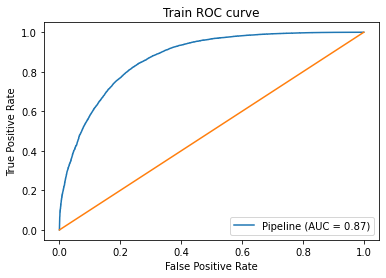

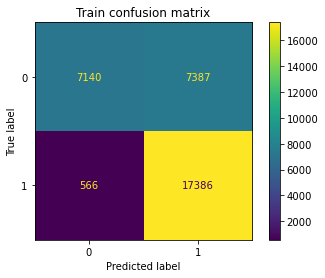




Validation score : 0.648194328992334


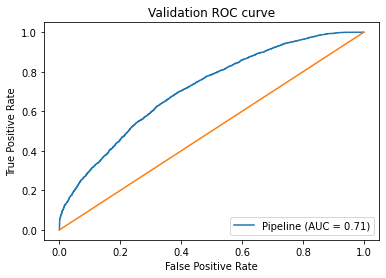

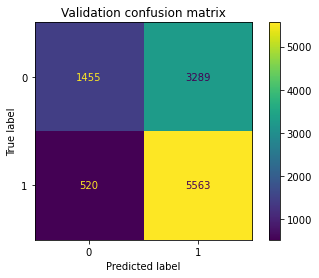




Test score : 0.638588713401681


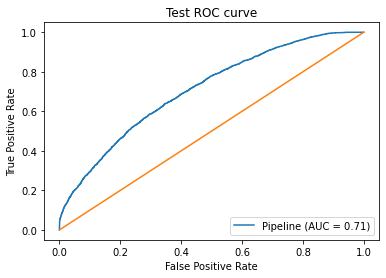

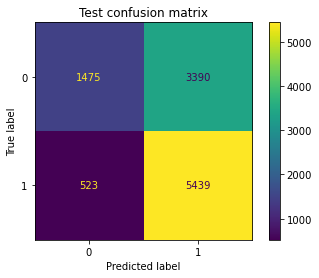

In [20]:
print("Train score : {}".format(train_score))
plot_roc_curve(text_clf, X_train, y_train)
plt.plot([0,1])
plt.title("Train ROC curve")
plt.show()

plot_confusion_matrix(text_clf, X_train, y_train)
plt.title("Train confusion matrix")
plt.show()

print("\n\n")


print("Validation score : {}".format(validation_score))
plot_roc_curve(text_clf, X_validation, y_validation)
plt.plot([0,1])
plt.title("Validation ROC curve")
plt.show()

plot_confusion_matrix(text_clf, X_validation, y_validation)
plt.title("Validation confusion matrix")
plt.show()

print("\n\n")

print("Test score : {}".format(test_score))
plot_roc_curve(text_clf, X_test, y_test)
plt.plot([0,1])
plt.title("Test ROC curve")
plt.show()

plot_confusion_matrix(text_clf, X_test, y_test)
plt.title("Test confusion matrix")
plt.show()

Train score : 0.7551340866405986


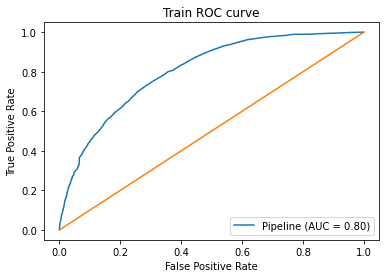

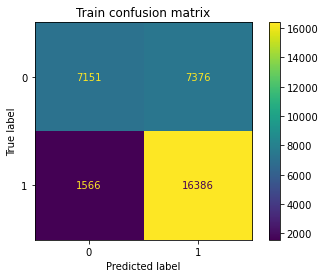




Validation score : 0.648194328992334


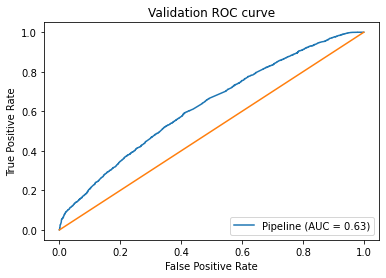

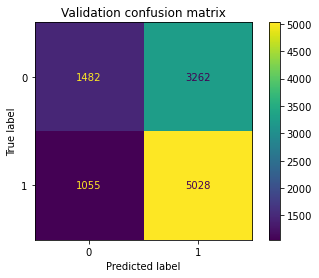




Test score : 0.638588713401681


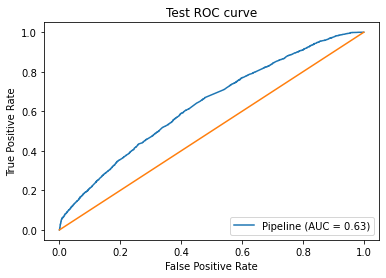

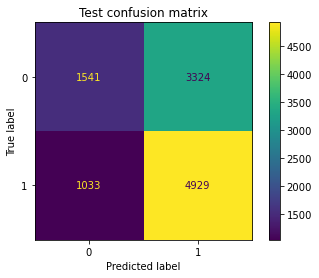

In [21]:
print("Train score : {}".format(train_score_t))
plot_roc_curve(text_clf_t, X_train_t, y_train)
plt.plot([0,1])
plt.title("Train ROC curve")
plt.show()

plot_confusion_matrix(text_clf_t, X_train_t, y_train)
plt.title("Train confusion matrix")
plt.show()

print("\n\n")


print("Validation score : {}".format(validation_score_t))
plot_roc_curve(text_clf_t, X_validation_t, y_validation)
plt.plot([0,1])
plt.title("Validation ROC curve")
plt.show()

plot_confusion_matrix(text_clf_t, X_validation_t, y_validation)
plt.title("Validation confusion matrix")
plt.show()

print("\n\n")

print("Test score : {}".format(test_score_t))
plot_roc_curve(text_clf_t, X_test_t, y_test)
plt.plot([0,1])
plt.title("Test ROC curve")
plt.show()

plot_confusion_matrix(text_clf_t, X_test_t, y_test)
plt.title("Test confusion matrix")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [23]:
data_train["text_clf"] = text_clf.predict(X_train)
data_validation["text_clf"] = text_clf.predict(X_validation)
data_test["text_clf"] = text_clf.predict(X_test)

<ipython-input-23-568c7bf3251e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validation["text_clf"] = text_clf.predict(X_validation)
<ipython-input-23-568c7bf3251e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["text_clf"] = text_clf.predict(X_test)


X_train_clf = StandardScaler().fit_transform(data_train.drop(["review_content", "review_title"],axis=1))
X_validation_clf = StandardScaler().fit_transform(data_validation.drop(["review_content", "review_title"],axis=1))
X_test_clf = StandardScaler().fit_transform(data_test.drop(["review_content", "review_title"],axis=1))

In [24]:
X_train_clf = data_train.drop(["review_content","review_title"],axis=1)
X_validation_clf = data_validation.drop(["review_content","review_title"],axis=1)
X_test_clf = data_test.drop(["review_content","review_title"],axis=1)

In [106]:
clf = MLPClassifier(hidden_layer_sizes = 10, activation = 'logistic', power_t = 2, random_state=42)
clf.fit(X_train_clf, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, power_t=2,
              random_state=42)

In [107]:
train_score_clf = clf.score(X_train_clf, y_train)
validation_score_clf = clf.score(X_validation_clf, y_validation)
test_score_clf = clf.score(X_test_clf, y_test)

Train score : 0.7565811755288032


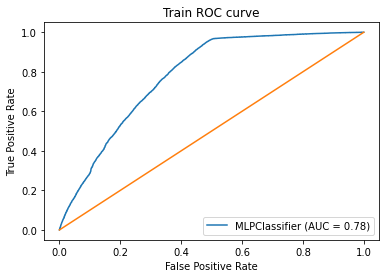

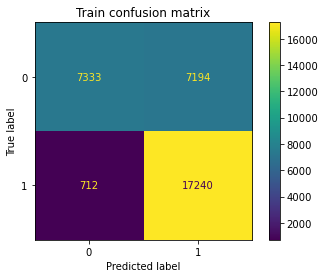




Validation score : 0.6499492010713955


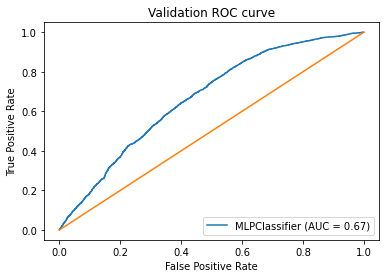

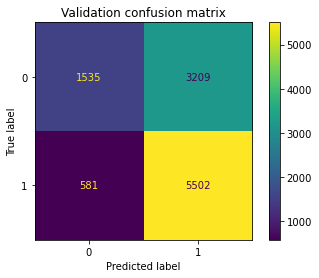




Test score : 0.6420060958714325


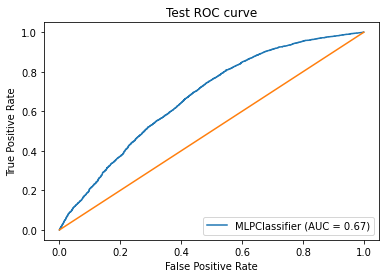

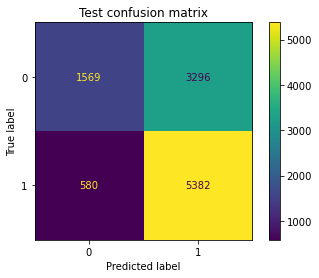

In [108]:
print("Train score : {}".format(train_score_clf))
plot_roc_curve(clf, X_train_clf, y_train)
plt.plot([0,1])
plt.title("Train ROC curve")
plt.show()

plot_confusion_matrix(clf, X_train_clf, y_train)
plt.title("Train confusion matrix")
plt.show()

print("\n\n")


print("Validation score : {}".format(validation_score_clf))
plot_roc_curve(clf, X_validation_clf, y_validation)
plt.plot([0,1])
plt.title("Validation ROC curve")
plt.show()

plot_confusion_matrix(clf, X_validation_clf, y_validation)
plt.title("Validation confusion matrix")
plt.show()

print("\n\n")

print("Test score : {}".format(test_score_clf))
plot_roc_curve(clf, X_test_clf, y_test)
plt.plot([0,1])
plt.title("Test ROC curve")
plt.show()

plot_confusion_matrix(clf, X_test_clf, y_test)
plt.title("Test confusion matrix")
plt.show()